<a href="https://colab.research.google.com/github/AnisH1427/Multilingual-OCR-FYP/blob/main/Model/Model_development.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



1.   Import Necessary library




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import numpy as np
import warnings
import pandas as pd
warnings.filterwarnings('ignore')

In [ ]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
X_train = X_train.reshape((X_train.shape[0],28,28))
X_test = X_test.reshape((X_test.shape[0],28,28))

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train = np.stack((X_train,)*3,axis=-1)
X_test = np.stack((X_test,)*3,axis=-1)

y_train = to_categorical(y_train)
y_test =  to_categorical(y_test)

In [ ]:
X_train.shape, X_test.shape

((60000, 28, 28, 3), (10000, 28, 28, 3))

In [ ]:
train_generator = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    shear_range = 0.2,
    zoom_range = 0.2,
    fill_mode = 'nearest'
)
val_generator = ImageDataGenerator(rescale = 1./255)

train_iterator = train_generator.flow(X_train, y_train, batch_size=512, shuffle=True)

val_iterator = val_generator.flow(X_test, y_test, batch_size=512, shuffle=False)

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()

model.add(ResNet50(include_top = False, pooling='avg', weights='imagenet'))

#adding fully connected layer with output
model.add(Dense(512, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

#set resnet layers not trainable as it is already trained
model.layers[0].trainable = False
model.summary()

94765736/94765736 [==============================] - 5s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 24641930 (94.00 MB)
Trainable params: 1054218 (4.02 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [ ]:
model.compile(optimizer = "Adam", loss = 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train_iterator, epochs = 10, validation_data = val_iterator)

Epoch 1/10
118/118 [==============================] - 50s 344ms/step - loss: 1.4374 - accuracy: 0.5440 - val_loss: 0.7886 - val_accuracy: 0.7750
Epoch 2/10
118/118 [==============================] - 45s 382ms/step - loss: 0.9255 - accuracy: 0.7145 - val_loss: 0.6384 - val_accuracy: 0.7976
Epoch 3/10
118/118 [==============================] - 39s 329ms/step - loss: 0.7684 - accuracy: 0.7601 - val_loss: 0.5369 - val_accuracy: 0.8320
Epoch 4/10
118/118 [==============================] - 38s 322ms/step - loss: 0.6869 - accuracy: 0.7838 - val_loss: 0.4963 - val_accuracy: 0.8440
Epoch 5/10
118/118 [==============================] - 37s 315ms/step - loss: 0.6291 - accuracy: 0.8019 - val_loss: 0.4711 - val_accuracy: 0.8479
Epoch 6/10
118/118 [==============================] - 39s 330ms/step - loss: 0.5912 - accuracy: 0.8142 - val_loss: 0.4359 - val_accuracy: 0.8623
Epoch 7/10
118/118 [==============================] - 38s 326ms/step - loss: 0.5601 - accuracy: 0.8218 - val_loss: 0.4202 - val_ac

In [ ]:
def get_predictions(model, data):
    return np.array([np.argmax(prediction) for prediction in model.predict(data)])

In [ ]:
predicted = get_predictions(model, X_test)
pd.Series(predicted).value_counts()

313/313 [==============================] - 3s 11ms/step


8    3234
2    2926
1    1750
5    1187
4     899
7       4
dtype: int64

In [ ]:
pd.Series([np.argmax(i) for i in y_test]).value_counts()

1    1135
2    1032
7    1028
3    1010
9    1009
4     982
0     980
8     974
6     958
5     892
dtype: int64

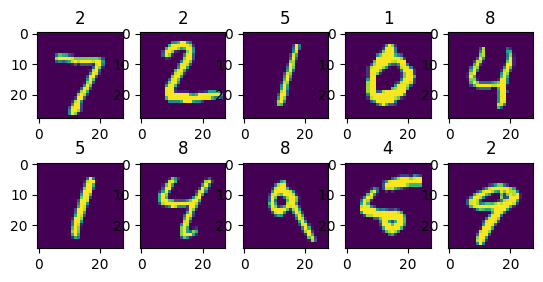

In [ ]:
import matplotlib.pyplot as plt
show_images = 10

for i in range(show_images):
    plt.subplot(show_images // 5 + 1, 5, i + 1)
    plt.title(str(predicted[i]))
    plt.imshow(X_test[i, :, :, 1].reshape(28, 28))

In [ ]:
!pwd

/content


In [ ]:
!cd drive/MyDrive/datasets

/bin/bash: line 1: cd: drive/MyDrive/datasets: No such file or directory


In [ ]:
!sudo add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!sudo apt-get update -qq 2>&1 > /dev/null
!sudo apt -y install -qq google-drive-ocamlfuse 2>&1 > /dev/null
!google-drive-ocamlfuse



debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
/usr/bin/xdg-open: 882: www-browser: not found
/usr/bin/xdg-open: 882: links2: not found
/usr/bin/xdg-open: 882: elinks: not found
/usr/bin/xdg-open: 882: links: not found
/usr/bin/xdg-open: 882: lynx: not found
/usr/bin/xdg-open: 882: w3m: not found
xdg-open: no method available for opening 'https://accounts.google.com/o/oauth2/auth?client_id=564921029129.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fgd-ocaml-auth.appspot.com%2Foauth2callback&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&

In [ ]:
!sudo apt-get install -qq w3m # to act as web browser
!xdg-settings set default-web-browser w3m.desktop # to set default browser
%cd /content
!mkdir drive
%cd drive
!mkdir MyDrive
%cd ..
%cd ..
!google-drive-ocamlfuse /content/drive/MyDrive

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package w3m.
(Reading database ... 121749 files and directories currently installed.)
Preparing to unpack .../w3m_0.5.3+git20210102-6ubuntu0.2_amd64.deb ...
Unpacking w3m (0.5.3+git20210102-6ubuntu0.2) ...
Setting up w3m (0.5.3+git20210102-6ubuntu0.2) ...
Processing triggers for man-db (2.10.2-1) ...
/content
/content/drive
/content
/
/bin/bash: line 1: google-drive-ocamlfuse: command not found


In [ ]:
!ls

bin	 cuda-keyring_1.0-1_all.deb  etc   lib32   media		     opt   run	 sys	usr
boot	 datalab		     home  lib64   mnt			     proc  sbin  tmp	var
content  dev			     lib   libx32  NGC-DL-CONTAINER-LICENSE  root  srv	 tools


In [ ]:
from google.colab import drive

# # Mount Google Drive
drive.mount('/content/drive')
# drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
import os
import tarfile
from zipfile import ZipFile

def extract_zip(zip_file, extract_folder):
  with tarfile.open(zip_file,'r:gz') as myzip:
    if not os.path.exists(extract_folder):
      os.makedirs(extract_folder)
    else:
      print("Already extracted")
      return
    myzip.extractall(extract_folder)
forms1 = 'drive/MyDrive/datasets/formsA-D.tgz'
forms1_extractTo = 'drive/MyDrive/datasets/formsA-D'

forms2 = 'drive/MyDrive/datasets/formsE-H.tgz'
forms2_extractTo = 'drive/MyDrive/datasets/formsE-H'

forms3 = 'drive/MyDrive/datasets/formsI-Z.tgz'
forms3_extractTo = 'drive/MyDrive/datasets/formsI-Z'

lines = 'drive/MyDrive/datasets/lines.tgz'
lines_extractTo = 'drive/MyDrive/datasets/lines'

extract_zip(forms1, forms1_extractTo)
extract_zip(forms2, forms2_extractTo)
extract_zip(forms3, forms3_extractTo)

FileNotFoundError: [Errno 2] No such file or directory: 'drive/MyDrive/datasets/formsA-D.tgz'

In [ ]:
os.path.exists('drive/MyDrive/datasets/lines')

NameError: name 'os' is not defined

In [ ]:
#for lines based segmentation
def extract_tgz(tgz_file, extract_folder):
    try:
        with tarfile.open(tgz_file, 'r:gz') as mytar:
            # Check if the extraction folder exists, if not, create it
            if not os.path.exists(extract_folder):
                os.makedirs(extract_folder)

            # Extract all contents of the tarball into the specified folder
            for member in mytar.getmembers():
                mytar.extract(member, extract_folder)
        print(f"Contents of {tgz_file} have been extracted to {extract_folder}.")
    except tarfile.ReadError:
        print(f"Error: Unable to read {tgz_file}. Please make sure it's a valid tarball.")
    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == "__main__":
    # Example usage:
    tgz_file_name = 'drive/MyDrive/datasets/lines.tgz'
    extract_folder_name = 'drive/MyDrive/datasets/lines'

    extract_tgz(tgz_file_name, extract_folder_name)


In [ ]:
!pwd

/


In [ ]:
pip install mltu

In [ ]:
import os
from datetime import datetime

from mltu.configs import BaseModelConfigs

class ModelConfigs(BaseModelConfigs):
    def __init__(self):
        super().__init__()
        self.model_path = os.path.join("drive","MyDrive","Model", datetime.strftime(datetime.now(), "%Y%m%d%H%M"))
        self.vocab = ""
        self.height = 96
        self.width = 1408
        self.max_text_length = 0
        self.batch_size = 32
        self.learning_rate = 0.0005
        self.train_epochs = 1000
        self.train_workers = 20

In [ ]:
from tqdm import tqdm
from PIL import Image
import os

lines_txt_path = os.path.join("drive","MyDrive","datasets","ascii","lines.txt")
lines_folder_path = os.path.join("drive","MyDrive","datasets","lines")

# Read the content of lines.txt
with open(lines_txt_path, "r") as lines_file:
    lines = lines_file.readlines()

dataset, vocab, max_len = [], set(), 0
for line in tqdm(lines):
  if line.startswith('#'):
    continue
  print("Original Line : ",line)
  line_split = line.split(' ')
  form_id = line_split[0] #Example: 'a01-000u-00'
  folder1 = form_id[:3] # Example: 'a01'
  file_name_lines = f'{form_id}.png' # Example:'a01-000u-00.png'
  form_id = form_id[0:-3] # from a01-000u-00 to a01-000u
  file_name_FullImage = f'{form_id}.png'
  label = line_split[-1].rstrip('\n')

  #replace '|' with ' ' in label
  label = label.replace('|',' ')

  #determining the folder structure
  if 'a'<= folder1[0] <= 'd':
    folder_structure = 'formsA-D'
  elif 'e' <= folder1[0] <= 'h':
    folder_structure = 'formsE-H'
  elif 'i' <=folder1[0] <= 'z':
    folder_structure = 'formsI-Z'
  else:
    print(f"Invalid folder for form: {form_id}")
    continue
  print(f"Segmented Text : {label}")
  print(f"filename of Full scale Image : {file_name_FullImage}")
  print(f"filename of sentence : {file_name_lines}")
  # Update relative path to point to full-scale images
  rel_path_full = os.path.join("drive","MyDrive","datasets",folder_structure, file_name_FullImage)

  if not os.path.exists(rel_path_full):
    print(f"File not found : {rel_path_full}")
    continue
  else:
    print(f"Full Scale image exist : {rel_path_full}")

  #path for line segmented image
  rel_path_line = os.path.join(lines_folder_path,folder1,form_id,file_name_lines)

  if not os.path.exists(rel_path_line):
    print(f"File not found : {rel_path_line}")
    continue
  else:
    print(f"Line Segmentation exist : {rel_path_line}")
  dataset.append([rel_path_line, label])
  vocab.update(list(label))
  max_len = max(max_len,len(label))

  0%|          | 0/13376 [00:00<?, ?it/s]

Original Line :  a01-000u-00 ok 154 19 408 746 1661 89 A|MOVE|to|stop|Mr.|Gaitskell|from

Segmented Text : A MOVE to stop Mr. Gaitskell from
filename of Full scale Image : a01-000u.png
filename of sentence : a01-000u-00.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/a01-000u.png


  0%|          | 24/13376 [00:06<55:44,  3.99it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/a01/a01-000u/a01-000u-00.png
Original Line :  a01-000u-01 ok 156 19 395 932 1850 105 nominating|any|more|Labour|life|Peers

Segmented Text : nominating any more Labour life Peers
filename of Full scale Image : a01-000u.png
filename of sentence : a01-000u-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/a01-000u.png
Line Segmentation exist : drive/MyDrive/datasets/lines/a01/a01-000u/a01-000u-01.png
Original Line :  a01-000u-02 ok 157 16 408 1106 1986 105 is|to|be|made|at|a|meeting|of|Labour

Segmented Text : is to be made at a meeting of Labour
filename of Full scale Image : a01-000u.png
filename of sentence : a01-000u-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/a01-000u.png
Line Segmentation exist : drive/MyDrive/datasets/lines/a01/a01-000u/a01-000u-02.png
Original Line :  a01-000u-03 err 156 23 430 1290 1883 70 M Ps|tomorrow|.|Mr.|Michael|Foot|has

Segmented Text : Ps tomorrow . Mr. Michael Foot 

  0%|          | 31/13376 [00:06<41:54,  5.31it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/a01/a01-000x/a01-000x-00.png
Original Line :  a01-000x-01 ok 181 23 382 924 1595 148 any|more|Labour|life|Peers|is|to|be|made|at|a

Segmented Text : any more Labour life Peers is to be made at a
filename of Full scale Image : a01-000x.png
filename of sentence : a01-000x-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/a01-000x.png
Line Segmentation exist : drive/MyDrive/datasets/lines/a01/a01-000x/a01-000x-01.png
Original Line :  a01-000x-02 ok 181 30 386 1110 1637 140 meeting|of|Labour|0M Ps|tomorrow|.|Mr.|Michael

Segmented Text : Ps tomorrow . Mr. Michael
filename of Full scale Image : a01-000x.png
filename of sentence : a01-000x-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/a01-000x.png
Line Segmentation exist : drive/MyDrive/datasets/lines/a01/a01-000x/a01-000x-02.png
Original Line :  a01-000x-03 ok 179 22 375 1276 1584 154 Foot|has|put|down|a|resolution|on|the|subject

Segmented Text : Foot ha

  0%|          | 37/13376 [00:06<34:46,  6.39it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/a01/a01-003/a01-003-00.png
Original Line :  a01-003-01 ok 176 29 319 1078 1787 126 large|majority|of|Labour|M Ps|are|likely|to

Segmented Text : Ps are likely to
filename of Full scale Image : a01-003.png
filename of sentence : a01-003-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/a01-003.png
Line Segmentation exist : drive/MyDrive/datasets/lines/a01/a01-003/a01-003-01.png
Original Line :  a01-003-02 ok 176 29 315 1259 1744 128 turn|down|the|Foot-Griffiths|resolution|.|Mr.

Segmented Text : turn down the Foot-Griffiths resolution . Mr.
filename of Full scale Image : a01-003.png
filename of sentence : a01-003-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/a01-003.png
Line Segmentation exist : drive/MyDrive/datasets/lines/a01/a01-003/a01-003-02.png
Original Line :  a01-003-03 ok 176 28 316 1441 1750 70 Foot's|line|will|be|that|as|Labour|M Ps

Segmented Text : Ps
filename of Full scale Image : a01-00

  0%|          | 48/13376 [00:07<23:40,  9.38it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/a01/a01-003u/a01-003u-00.png
Original Line :  a01-003u-01 ok 161 23 366 976 1837 103 support|,|a|large|majority|of|Labour

Segmented Text : support , a large majority of Labour
filename of Full scale Image : a01-003u.png
filename of sentence : a01-003u-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/a01-003u.png
Line Segmentation exist : drive/MyDrive/datasets/lines/a01/a01-003u/a01-003u-01.png
Original Line :  a01-003u-02 ok 161 21 356 1162 1908 96 M Ps|are|likely|to|turn|down|the|Foot-

Segmented Text : Ps are likely to turn down the Foot-
filename of Full scale Image : a01-003u.png
filename of sentence : a01-003u-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/a01-003u.png
Line Segmentation exist : drive/MyDrive/datasets/lines/a01/a01-003u/a01-003u-02.png
Original Line :  a01-003u-03 err 162 24 348 1324 1868 96 Griffiths|resolution|.|Mr.|Foot's|line|will

Segmented Text : Griffiths resolution . Mr

  0%|          | 59/13376 [00:07<17:41, 12.55it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/a01/a01-003x/a01-003x-00.png
Original Line :  a01-003x-01 ok 176 28 307 1046 1831 170 large|majority|of|Labour|0M Ps|are|likely|to|turn

Segmented Text : Ps are likely to turn
filename of Full scale Image : a01-003x.png
filename of sentence : a01-003x-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/a01-003x.png
Line Segmentation exist : drive/MyDrive/datasets/lines/a01/a01-003x/a01-003x-01.png
Original Line :  a01-003x-02 err 177 34 317 1243 1834 130 down|the|Foot-Griffiths|resolution|.|Mr.|Foot's|line

Segmented Text : down the Foot-Griffiths resolution . Mr. Foot's line
filename of Full scale Image : a01-003x.png
filename of sentence : a01-003x-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/a01-003x.png
Line Segmentation exist : drive/MyDrive/datasets/lines/a01/a01-003x/a01-003x-02.png
Original Line :  a01-003x-03 err 169 26 325 1423 1839 128 will|be|that|as|Labour|0M Ps|opposed|the|Govern-

Segme

  1%|          | 68/13376 [00:07<15:11, 14.59it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/a01/a01-007/a01-007-00.png
Original Line :  a01-007-01 ok 203 10 335 937 1526 85 Peeresses|have|been|created|.|Most|Labour

Segmented Text : Peeresses have been created . Most Labour
filename of Full scale Image : a01-007.png
filename of sentence : a01-007-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/a01-007.png
Line Segmentation exist : drive/MyDrive/datasets/lines/a01/a01-007/a01-007-01.png
Original Line :  a01-007-02 ok 203 17 355 1111 1697 106 sentiment|would|#|still|favour|the|abolition

Segmented Text : sentiment would # still favour the abolition
filename of Full scale Image : a01-007.png
filename of sentence : a01-007-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/a01-007.png
Line Segmentation exist : drive/MyDrive/datasets/lines/a01/a01-007/a01-007-02.png
Original Line :  a01-007-03 ok 203 18 363 1284 1711 111 of|the|House|of|Lords|,|but|while|it|remains

Segmented Text : of the House of

  1%|          | 77/13376 [00:08<13:32, 16.38it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/a01/a01-007u/a01-007u-00.png
Original Line :  a01-007u-01 ok 166 15 346 946 2005 65 Peeresses|have|been|created|.|Most|Labour

Segmented Text : Peeresses have been created . Most Labour
filename of Full scale Image : a01-007u.png
filename of sentence : a01-007u-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/a01-007u.png
Line Segmentation exist : drive/MyDrive/datasets/lines/a01/a01-007u/a01-007u-01.png
Original Line :  a01-007u-02 ok 167 21 366 1115 1932 78 sentiment|would|still|favour|the|abolition

Segmented Text : sentiment would still favour the abolition
filename of Full scale Image : a01-007u.png
filename of sentence : a01-007u-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/a01-007u.png
Line Segmentation exist : drive/MyDrive/datasets/lines/a01/a01-007u/a01-007u-02.png
Original Line :  a01-007u-03 ok 168 20 339 1286 2037 93 of|the|House|of|Lords|,|but|while|it|remains

Segmented Text : of the

  1%|          | 87/13376 [00:08<12:33, 17.65it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/a01/a01-007x/a01-007x-00.png
Original Line :  a01-007x-01 ok 175 26 346 1051 1922 102 Peeresses|have|been|created|.|Most|Labour|sentiment

Segmented Text : Peeresses have been created . Most Labour sentiment
filename of Full scale Image : a01-007x.png
filename of sentence : a01-007x-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/a01-007x.png
Line Segmentation exist : drive/MyDrive/datasets/lines/a01/a01-007x/a01-007x-01.png
Original Line :  a01-007x-02 ok 178 23 357 1226 1817 173 would|still|favour|the|abolition|of|the|House

Segmented Text : would still favour the abolition of the House
filename of Full scale Image : a01-007x.png
filename of sentence : a01-007x-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/a01-007x.png
Line Segmentation exist : drive/MyDrive/datasets/lines/a01/a01-007x/a01-007x-02.png
Original Line :  a01-007x-03 ok 171 27 368 1393 1823 147 of|Lords|,|but|while|it|remains|Labour|

  1%|          | 95/13376 [00:09<12:18, 17.98it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/a01/a01-011/a01-011-00.png
Original Line :  a01-011-01 err 182 20 323 896 1696 109 Party|(|280,000|members|)|and|Mr.|Harry|Nkumbula's|African

Segmented Text : Party ( 280,000 members ) and Mr. Harry Nkumbula's African
filename of Full scale Image : a01-011.png
filename of sentence : a01-011-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/a01-011.png
Line Segmentation exist : drive/MyDrive/datasets/lines/a01/a01-011/a01-011-01.png
Original Line :  a01-011-02 ok 182 19 300 1077 1800 104 National|Congress|(|400,000|)|will|meet|in|London|today

Segmented Text : National Congress ( 400,000 ) will meet in London today
filename of Full scale Image : a01-011.png
filename of sentence : a01-011-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/a01-011.png
Line Segmentation exist : drive/MyDrive/datasets/lines/a01/a01-011/a01-011-02.png
Original Line :  a01-011-03 ok 182 16 303 1253 1723 112 to|discuss|a|common|

  1%|          | 102/13376 [00:09<12:25, 17.80it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/a01/a01-011u/a01-011u-00.png
Original Line :  a01-011u-01 ok 168 18 340 923 1776 87 United|National|Independence|Party

Segmented Text : United National Independence Party
filename of Full scale Image : a01-011u.png
filename of sentence : a01-011u-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/a01-011u.png
Line Segmentation exist : drive/MyDrive/datasets/lines/a01/a01-011u/a01-011u-01.png
Original Line :  a01-011u-02 ok 168 23 308 1096 2087 114 (|280,000|members|)|and|Mr.|Harry|Nkumbula's

Segmented Text : ( 280,000 members ) and Mr. Harry Nkumbula's
filename of Full scale Image : a01-011u.png
filename of sentence : a01-011u-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/a01-011u.png
Line Segmentation exist : drive/MyDrive/datasets/lines/a01/a01-011u/a01-011u-02.png
Original Line :  a01-011u-03 ok 168 26 328 1284 2013 98 African|National|Congress|(|400,000|)|will

Segmented Text : African National 

  1%|          | 112/13376 [00:09<10:28, 21.10it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/a01/a01-011x/a01-011x-00.png
Original Line :  a01-011x-01 err 168 38 355 819 1839 131 National|Independence|Party|(|280,000|members|)

Segmented Text : National Independence Party ( 280,000 members )
filename of Full scale Image : a01-011x.png
filename of sentence : a01-011x-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/a01-011x.png
Line Segmentation exist : drive/MyDrive/datasets/lines/a01/a01-011x/a01-011x-01.png
Original Line :  a01-011x-02 err 165 37 344 928 1765 107 and|Mr.|Harry|Nkumbula's|African|National

Segmented Text : and Mr. Harry Nkumbula's African National
filename of Full scale Image : a01-011x.png
filename of sentence : a01-011x-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/a01-011x.png
Line Segmentation exist : drive/MyDrive/datasets/lines/a01/a01-011x/a01-011x-02.png
Original Line :  a01-011x-03 err 168 32 336 1015 1718 160 Congress|(|400,000|)|will|meet|in|London|today

Segmen

  1%|          | 121/13376 [00:10<10:13, 21.59it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/a01/a01-014/a01-014-00.png
Original Line :  a01-014-01 ok 182 18 365 888 1833 83 the|London|talks|on|the|Protectorate's

Segmented Text : the London talks on the Protectorate's
filename of Full scale Image : a01-014.png
filename of sentence : a01-014-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/a01-014.png
Line Segmentation exist : drive/MyDrive/datasets/lines/a01/a01-014/a01-014-01.png
Original Line :  a01-014-02 ok 182 14 380 1048 1840 120 future|.|Said|Mr.|Nkumbula|last|night|:

Segmented Text : future . Said Mr. Nkumbula last night :
filename of Full scale Image : a01-014.png
filename of sentence : a01-014-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/a01-014.png
Line Segmentation exist : drive/MyDrive/datasets/lines/a01/a01-014/a01-014-02.png
Original Line :  a01-014-03 ok 182 15 384 1224 1745 130 "|We|want|to|discuss|what|to|do|if|the

Segmented Text : " We want to discuss what to do if th

  1%|          | 131/13376 [00:10<09:44, 22.68it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/a01/a01-014u/a01-014u-00.png
Original Line :  a01-014u-01 ok 169 14 408 933 1681 112 boycotting|the|London|talks|on|the

Segmented Text : boycotting the London talks on the
filename of Full scale Image : a01-014u.png
filename of sentence : a01-014u-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/a01-014u.png
Line Segmentation exist : drive/MyDrive/datasets/lines/a01/a01-014u/a01-014u-01.png
Original Line :  a01-014u-02 err 167 24 356 1108 1979 78 Protectorate's|future|.|Said|Mr.|Nkumbula

Segmented Text : Protectorate's future . Said Mr. Nkumbula
filename of Full scale Image : a01-014u.png
filename of sentence : a01-014u-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/a01-014u.png
Line Segmentation exist : drive/MyDrive/datasets/lines/a01/a01-014u/a01-014u-02.png
Original Line :  a01-014u-03 ok 169 23 378 1292 1883 90 last|night|:|"|We|want|to|discuss|what|to

Segmented Text : last night : " We want 

  1%|          | 140/13376 [00:10<08:56, 24.65it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/a01/a01-014x/a01-014x-00.png
Original Line :  a01-014x-01 ok 193 27 347 1060 1715 97 the|London|talks|on|the|Protectorate's

Segmented Text : the London talks on the Protectorate's
filename of Full scale Image : a01-014x.png
filename of sentence : a01-014x-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/a01-014x.png
Line Segmentation exist : drive/MyDrive/datasets/lines/a01/a01-014x/a01-014x-01.png
Original Line :  a01-014x-02 ok 196 22 342 1230 1805 159 future|.|Said|Mr.|Nkumbula|last|night|:

Segmented Text : future . Said Mr. Nkumbula last night :
filename of Full scale Image : a01-014x.png
filename of sentence : a01-014x-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/a01-014x.png
Line Segmentation exist : drive/MyDrive/datasets/lines/a01/a01-014x/a01-014x-02.png
Original Line :  a01-014x-03 ok 189 23 367 1390 1646 162 "|We|want|to|discuss|what|to|do|if|the

Segmented Text : " We want to discuss 

  1%|          | 150/13376 [00:11<08:52, 24.86it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/a01/a01-020/a01-020-00.png
Original Line :  a01-020-01 ok 176 30 329 1082 1690 93 Lancaster|House|despite|the|crisis|which|had

Segmented Text : Lancaster House despite the crisis which had
filename of Full scale Image : a01-020.png
filename of sentence : a01-020-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/a01-020.png
Line Segmentation exist : drive/MyDrive/datasets/lines/a01/a01-020/a01-020-01.png
Original Line :  a01-020-02 ok 176 27 305 1273 1798 85 blown|up|.|He|has|now|revealed|his|full|plans

Segmented Text : blown up . He has now revealed his full plans
filename of Full scale Image : a01-020.png
filename of sentence : a01-020-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/a01-020.png
Line Segmentation exist : drive/MyDrive/datasets/lines/a01/a01-020/a01-020-02.png
Original Line :  a01-020-03 ok 176 27 342 1439 1753 128 to|the|Africans|and|Liberals|attending|.|These

Segmented Text : to th

  2%|▏         | 281/13376 [00:11<01:26, 151.88it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/a01/a01-020x/a01-020x-00.png
Original Line :  a01-020x-01 ok 153 35 338 1083 1697 98 Lancaster|House|despite|the|crisis|which|had

Segmented Text : Lancaster House despite the crisis which had
filename of Full scale Image : a01-020x.png
filename of sentence : a01-020x-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/a01-020x.png
Line Segmentation exist : drive/MyDrive/datasets/lines/a01/a01-020x/a01-020x-01.png
Original Line :  a01-020x-02 ok 157 34 333 1264 1680 93 blown|up|.|He|has|now|revealed|his|full|plans

Segmented Text : blown up . He has now revealed his full plans
filename of Full scale Image : a01-020x.png
filename of sentence : a01-020x-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/a01-020x.png
Line Segmentation exist : drive/MyDrive/datasets/lines/a01/a01-020x/a01-020x-02.png
Original Line :  a01-020x-03 ok 152 39 335 1439 1678 103 to|the|Africans|and|Liberals|attending|.|These

Segment

  4%|▍         | 545/13376 [00:11<00:27, 459.78it/s]

Full Scale image exist : drive/MyDrive/datasets/formsA-D/a01-058.png
Line Segmentation exist : drive/MyDrive/datasets/lines/a01/a01-058/a01-058-00.png
Original Line :  a01-058-01 ok 152 14 366 865 1761 200 over|West|Germany's|cash|offer|to|help

Segmented Text : over West Germany's cash offer to help
filename of Full scale Image : a01-058.png
filename of sentence : a01-058-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/a01-058.png
Line Segmentation exist : drive/MyDrive/datasets/lines/a01/a01-058/a01-058-01.png
Original Line :  a01-058-02 err 152 20 329 1051 1802 189 America's|balance|of|payments|position|.

Segmented Text : America's balance of payments position .
filename of Full scale Image : a01-058.png
filename of sentence : a01-058-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/a01-058.png
Line Segmentation exist : drive/MyDrive/datasets/lines/a01/a01-058/a01-058-02.png
Original Line :  a01-058-03 ok 152 17 355 1221 1826 194 He|said|bluntly|in|Wa

  5%|▍         | 649/13376 [00:12<00:21, 581.35it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/a01/a01-107u/a01-107u-03.png
Original Line :  a01-107u-04 ok 175 22 354 1426 1783 89 "|We|remain|for|it|.|But|the|Tories

Segmented Text : " We remain for it . But the Tories
filename of Full scale Image : a01-107u.png
filename of sentence : a01-107u-04.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/a01-107u.png
Line Segmentation exist : drive/MyDrive/datasets/lines/a01/a01-107u/a01-107u-04.png
Original Line :  a01-107u-05 ok 176 22 346 1605 1984 99 never|were|.|"|Interrupted|by|angry|Tories|,

Segmented Text : never were . " Interrupted by angry Tories ,
filename of Full scale Image : a01-107u.png
filename of sentence : a01-107u-05.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/a01-107u.png
Line Segmentation exist : drive/MyDrive/datasets/lines/a01/a01-107u/a01-107u-05.png
Original Line :  a01-107u-06 ok 175 21 377 1796 1778 83 Mr.|Brown|retorted|:|"|The|jackals|bay

Segmented Text : Mr. Brown retorted 

  6%|▋         | 849/13376 [00:15<01:40, 125.08it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/a02/a02-027/a02-027-00.png
Original Line :  a02-027-01 ok 189 16 359 1045 1841 116 that|has|paralysed|the|port|of|Takoradi|for|the|past

Segmented Text : that has paralysed the port of Takoradi for the past
filename of Full scale Image : a02-027.png
filename of sentence : a02-027-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/a02-027.png
Line Segmentation exist : drive/MyDrive/datasets/lines/a02/a02-027/a02-027-01.png
Original Line :  a02-027-02 ok 188 20 354 1233 1846 100 week|.|Root|of|the|discontent|:|The|austerity|Budget|,

Segmented Text : week . Root of the discontent : The austerity Budget ,
filename of Full scale Image : a02-027.png
filename of sentence : a02-027-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/a02-027.png
Line Segmentation exist : drive/MyDrive/datasets/lines/a02/a02-027/a02-027-02.png
Original Line :  a02-027-03 ok 186 14 354 1415 1758 112 including|a|compulsory|savings|sch

  7%|▋         | 925/13376 [00:15<01:37, 128.15it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/a03/a03-006/a03-006-00.png
Original Line :  a03-006-01 ok 176 21 374 1085 2003 102 nesia|arrived|in|Belgrade|as|the|guest|of|the|Yugoslav

Segmented Text : nesia arrived in Belgrade as the guest of the Yugoslav
filename of Full scale Image : a03-006.png
filename of sentence : a03-006-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/a03-006.png
Line Segmentation exist : drive/MyDrive/datasets/lines/a03/a03-006/a03-006-01.png
Original Line :  a03-006-02 ok 176 26 350 1252 1925 134 Foreign|Minister|.|In|fact|such|Yugoslav|activity|has

Segmented Text : Foreign Minister . In fact such Yugoslav activity has
filename of Full scale Image : a03-006.png
filename of sentence : a03-006-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/a03-006.png
Line Segmentation exist : drive/MyDrive/datasets/lines/a03/a03-006/a03-006-02.png
Original Line :  a03-006-03 ok 176 16 351 1433 1928 124 been|#|particularly|intensified|

  8%|▊         | 1060/13376 [00:17<01:34, 130.94it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/a03/a03-020/a03-020-00.png
Original Line :  a03-020-01 err 175 23 336 1052 2020 160 Information|,|Mr.|Quinim|Pholsena|,|who

Segmented Text : Information , Mr. Quinim Pholsena , who
filename of Full scale Image : a03-020.png
filename of sentence : a03-020-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/a03-020.png
Line Segmentation exist : drive/MyDrive/datasets/lines/a03/a03-020/a03-020-01.png
Original Line :  a03-020-02 err 175 20 318 1240 1859 123 claims|to|be|his|representative|in

Segmented Text : claims to be his representative in
filename of Full scale Image : a03-020.png
filename of sentence : a03-020-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/a03-020.png
Line Segmentation exist : drive/MyDrive/datasets/lines/a03/a03-020/a03-020-02.png
Original Line :  a03-020-03 ok 175 21 343 1399 1826 245 Laos|,|yesterday|addressed|all|officers

Segmented Text : Laos , yesterday addressed all officers


  8%|▊         | 1135/13376 [00:17<01:11, 172.17it/s]

Full Scale image exist : drive/MyDrive/datasets/formsA-D/a03-080.png
Line Segmentation exist : drive/MyDrive/datasets/lines/a03/a03-080/a03-080-05.png
Original Line :  a03-080-06 ok 167 24 344 1824 1849 65 to|German|participation|is|the|absence|of

Segmented Text : to German participation is the absence of
filename of Full scale Image : a03-080.png
filename of sentence : a03-080-06.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/a03-080.png
Line Segmentation exist : drive/MyDrive/datasets/lines/a03/a03-080/a03-080-06.png
Original Line :  a03-080-07 ok 170 24 362 2008 1891 79 any|Ministry|or|Minister|directly|responsible

Segmented Text : any Ministry or Minister directly responsible
filename of Full scale Image : a03-080.png
filename of sentence : a03-080-07.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/a03-080.png
Line Segmentation exist : drive/MyDrive/datasets/lines/a03/a03-080/a03-080-07.png
Original Line :  a03-080-08 ok 169 19 357 2176 1813 80 for|it|-

  9%|▉         | 1194/13376 [00:18<02:09, 94.11it/s] 

Line Segmentation exist : drive/MyDrive/datasets/lines/a04/a04-015/a04-015-00.png
Original Line :  a04-015-01 ok 172 43 380 1076 1771 116 third|talks|-|the|first|were|at|Key|West|,|Florida|,|the|second|in

Segmented Text : third talks - the first were at Key West , Florida , the second in
filename of Full scale Image : a04-015.png
filename of sentence : a04-015-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/a04-015.png
Line Segmentation exist : drive/MyDrive/datasets/lines/a04/a04-015/a04-015-01.png
Original Line :  a04-015-02 ok 172 50 377 1252 1745 129 Washington|-|said|:|"|Their|discussions|covered|the|major|problems|,

Segmented Text : Washington - said : " Their discussions covered the major problems ,
filename of Full scale Image : a04-015.png
filename of sentence : a04-015-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/a04-015.png
Line Segmentation exist : drive/MyDrive/datasets/lines/a04/a04-015/a04-015-02.png
Original Line :  a04-015-03 ok 172

 10%|▉         | 1297/13376 [00:18<01:28, 136.37it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/a04/a04-027/a04-027-00.png
Original Line :  a04-027-01 ok 172 53 358 1066 1841 114 and|informed|him|of|the|Vienna|outcome|.|Last|night|Mr.|Rusk|arrived

Segmented Text : and informed him of the Vienna outcome . Last night Mr. Rusk arrived
filename of Full scale Image : a04-027.png
filename of sentence : a04-027-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/a04-027.png
Line Segmentation exist : drive/MyDrive/datasets/lines/a04/a04-027/a04-027-01.png
Original Line :  a04-027-02 ok 172 47 361 1256 1806 116 in|London|in|time|to|join|the|Buckingham|Palace|dinner|and|to

Segmented Text : in London in time to join the Buckingham Palace dinner and to
filename of Full scale Image : a04-027.png
filename of sentence : a04-027-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/a04-027.png
Line Segmentation exist : drive/MyDrive/datasets/lines/a04/a04-027/a04-027-02.png
Original Line :  a04-027-03 ok 172 51 329 14

 10%|█         | 1339/13376 [00:19<01:15, 160.35it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/a04/a04-081/a04-081-01.png
Original Line :  a04-081-02 ok 182 36 355 1270 1768 122 matter|.|Consideration|should|also|be|given

Segmented Text : matter . Consideration should also be given
filename of Full scale Image : a04-081.png
filename of sentence : a04-081-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/a04-081.png
Line Segmentation exist : drive/MyDrive/datasets/lines/a04/a04-081/a04-081-02.png
Original Line :  a04-081-03 ok 172 31 339 1455 1629 121 to|the|regrouping|of|unions|and|the

Segmented Text : to the regrouping of unions and the
filename of Full scale Image : a04-081.png
filename of sentence : a04-081-03.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/a04-081.png
Line Segmentation exist : drive/MyDrive/datasets/lines/a04/a04-081/a04-081-03.png
Original Line :  a04-081-04 ok 182 34 341 1628 1612 88 modification|of|their|structures|to

Segmented Text : modification of their structures to
f

 10%|█         | 1381/13376 [00:19<01:31, 131.55it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/a05/a05-000/a05-000-00.png
Original Line :  a05-000-01 ok 171 22 376 936 1664 83 be|published|in|March|,|is|likely|to

Segmented Text : be published in March , is likely to
filename of Full scale Image : a05-000.png
filename of sentence : a05-000-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/a05-000.png
Line Segmentation exist : drive/MyDrive/datasets/lines/a05/a05-000/a05-000-01.png
Original Line :  a05-000-02 ok 170 19 376 1115 1880 67 contain|a|five-year|plan|for|the|three

Segmented Text : contain a five-year plan for the three
filename of Full scale Image : a05-000.png
filename of sentence : a05-000-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/a05-000.png
Line Segmentation exist : drive/MyDrive/datasets/lines/a05/a05-000/a05-000-02.png
Original Line :  a05-000-03 ok 171 27 403 1293 1906 69 Services|.|Its|aim|will|be|to|produce|superbly

Segmented Text : Services . Its aim will be to produce

 11%|█         | 1413/13376 [00:20<02:12, 90.04it/s] 

Line Segmentation exist : drive/MyDrive/datasets/lines/a05/a05-017/a05-017-00.png
Original Line :  a05-017-01 ok 176 25 366 910 1725 86 of|recruiting|figures|as|encouraging|.

Segmented Text : of recruiting figures as encouraging .
filename of Full scale Image : a05-017.png
filename of sentence : a05-017-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/a05-017.png
Line Segmentation exist : drive/MyDrive/datasets/lines/a05/a05-017/a05-017-01.png
Original Line :  a05-017-02 ok 179 22 371 1098 1916 61 He|is|confident|the|aim|can|be|achieved|.

Segmented Text : He is confident the aim can be achieved .
filename of Full scale Image : a05-017.png
filename of sentence : a05-017-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/a05-017.png
Line Segmentation exist : drive/MyDrive/datasets/lines/a05/a05-017/a05-017-02.png
Original Line :  a05-017-03 ok 175 24 388 1278 1906 68 While|the|possibility|of|an|eventual|return

Segmented Text : While the possibility of an ev

 11%|█         | 1455/13376 [00:21<02:26, 81.24it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/a05/a05-025/a05-025-00.png
Original Line :  a05-025-01 ok 176 19 388 947 1871 82 to|have|come|mainly|from|retired|officers

Segmented Text : to have come mainly from retired officers
filename of Full scale Image : a05-025.png
filename of sentence : a05-025-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/a05-025.png
Line Segmentation exist : drive/MyDrive/datasets/lines/a05/a05-025/a05-025-01.png
Original Line :  a05-025-02 err 173 25 377 1135 1827 63 who|have|held|high|positions|but

Segmented Text : who have held high positions but
filename of Full scale Image : a05-025.png
filename of sentence : a05-025-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/a05-025.png
Line Segmentation exist : drive/MyDrive/datasets/lines/a05/a05-025/a05-025-02.png
Original Line :  a05-025-03 ok 175 29 386 1305 1903 71 are|out|of|touch|with|the|existing|situation|.

Segmented Text : are out of touch with the existing sit

 12%|█▏        | 1539/13376 [00:21<01:17, 152.85it/s]


Original Line :  a05-039-08 ok 176 22 348 2276 1898 89 increased|majorities|.|In|the|Cape|,|the

Segmented Text : increased majorities . In the Cape , the
filename of Full scale Image : a05-039.png
filename of sentence : a05-039-08.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/a05-039.png
Line Segmentation exist : drive/MyDrive/datasets/lines/a05/a05-039/a05-039-08.png
Original Line :  a05-039-09 err 174 25 363 2461 1856 80 veteran|United|Party|politician|,|Mr.|Harry

Segmented Text : veteran United Party politician , Mr. Harry
filename of Full scale Image : a05-039.png
filename of sentence : a05-039-09.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/a05-039.png
Line Segmentation exist : drive/MyDrive/datasets/lines/a05/a05-039/a05-039-09.png
Original Line :  a05-039-10 ok 174 23 376 2637 1813 80 Lawrence|,|standing|as|a|Progressive|,|was

Segmented Text : Lawrence , standing as a Progressive , was
filename of Full scale Image : a05-039.png
filename of sent

 12%|█▏        | 1637/13376 [00:21<00:55, 211.18it/s]

Full Scale image exist : drive/MyDrive/datasets/formsA-D/a05-104.png
Line Segmentation exist : drive/MyDrive/datasets/lines/a05/a05-104/a05-104-07.png
Original Line :  a05-104-08 ok 181 19 360 2180 1687 81 the|temple|of|their|religion|is|the

Segmented Text : the temple of their religion is the
filename of Full scale Image : a05-104.png
filename of sentence : a05-104-08.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/a05-104.png
Line Segmentation exist : drive/MyDrive/datasets/lines/a05/a05-104/a05-104-08.png
Original Line :  a05-104-09 ok 179 11 369 2368 709 75 bingo-parlour|.|"

Segmented Text : bingo-parlour . "
filename of Full scale Image : a05-104.png
filename of sentence : a05-104-09.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/a05-104.png
Line Segmentation exist : drive/MyDrive/datasets/lines/a05/a05-104/a05-104-09.png
Original Line :  a05-108-00 ok 185 21 349 753 1805 79 This|puzzled|such|students|of|comparative

Segmented Text : This puzzled such 

 12%|█▏        | 1668/13376 [00:22<01:52, 104.26it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/a06/a06-008/a06-008-00.png
Original Line :  a06-008-01 ok 182 24 337 922 1782 130 offer|the|Government|an|easy|passage|for|such

Segmented Text : offer the Government an easy passage for such
filename of Full scale Image : a06-008.png
filename of sentence : a06-008-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/a06-008.png
Line Segmentation exist : drive/MyDrive/datasets/lines/a06/a06-008/a06-008-01.png
Original Line :  a06-008-02 ok 183 44 313 1102 1896 128 legislation|.|"|Why|don't|you|make|proposals|to|legislate

Segmented Text : legislation . " Why don't you make proposals to legislate
filename of Full scale Image : a06-008.png
filename of sentence : a06-008-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/a06-008.png
Line Segmentation exist : drive/MyDrive/datasets/lines/a06/a06-008/a06-008-02.png
Original Line :  a06-008-03 err 182 38 314 1281 1882 86 in|the|autumn|?|"|Mr.|Wilson|asked|.|"|We|w

 13%|█▎        | 1691/13376 [00:22<02:26, 79.57it/s] 

Line Segmentation exist : drive/MyDrive/datasets/lines/a06/a06-020/a06-020-00.png
Original Line :  a06-020-01 ok 182 48 385 942 1803 85 ETU.|In|reply|to|the|call|for|his|resignation|he|said|:|"|Our|rules

Segmented Text : ETU. In reply to the call for his resignation he said : " Our rules
filename of Full scale Image : a06-020.png
filename of sentence : a06-020-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/a06-020.png
Line Segmentation exist : drive/MyDrive/datasets/lines/a06/a06-020/a06-020-01.png
Original Line :  a06-020-02 ok 182 50 396 1122 1755 87 say|that|if|an|official|resigns|he|is|not|allowed|to|run|again

Segmented Text : say that if an official resigns he is not allowed to run again
filename of Full scale Image : a06-020.png
filename of sentence : a06-020-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/a06-020.png
Line Segmentation exist : drive/MyDrive/datasets/lines/a06/a06-020/a06-020-02.png
Original Line :  a06-020-03 ok 182 45 375 1291 

 13%|█▎        | 1738/13376 [00:23<01:54, 101.82it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/a06/a06-036/a06-036-00.png
Original Line :  a06-036-01 ok 154 30 358 844 1716 178 ships|,|are|controlled|automatically|,|even

Segmented Text : ships , are controlled automatically , even
filename of Full scale Image : a06-036.png
filename of sentence : a06-036-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/a06-036.png
Line Segmentation exist : drive/MyDrive/datasets/lines/a06/a06-036/a06-036-01.png
Original Line :  a06-036-02 ok 154 29 348 1009 1700 165 to|the|preparations|for|launching|their

Segmented Text : to the preparations for launching their
filename of Full scale Image : a06-036.png
filename of sentence : a06-036-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/a06-036.png
Line Segmentation exist : drive/MyDrive/datasets/lines/a06/a06-036/a06-036-02.png
Original Line :  a06-036-03 ok 154 33 343 1192 1873 176 rockets|.|Applauding|on|the|river|banks|at

Segmented Text : rockets . Applauding o

 14%|█▎        | 1825/13376 [00:23<01:05, 176.97it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/a06/a06-075/a06-075-00.png
Original Line :  a06-075-01 ok 157 13 336 834 1778 189 Majesty's|Government|have|come|to|the

Segmented Text : Majesty's Government have come to the
filename of Full scale Image : a06-075.png
filename of sentence : a06-075-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/a06-075.png
Line Segmentation exist : drive/MyDrive/datasets/lines/a06/a06-075/a06-075-01.png
Original Line :  a06-075-02 ok 157 18 345 959 1771 136 conclusion|that|it|would|be|right|for

Segmented Text : conclusion that it would be right for
filename of Full scale Image : a06-075.png
filename of sentence : a06-075-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/a06-075.png
Line Segmentation exist : drive/MyDrive/datasets/lines/a06/a06-075/a06-075-02.png
Original Line :  a06-075-03 ok 157 18 349 1102 1789 171 Britain|to|make|a|formal|application|.|.

Segmented Text : Britain to make a formal application . .


 14%|█▍        | 1874/13376 [00:24<01:26, 132.25it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/b01/b01-000/b01-000-00.png
Original Line :  b01-000-01 ok 190 26 377 938 1388 83 in|revulsion|against|the|South|African

Segmented Text : in revulsion against the South African
filename of Full scale Image : b01-000.png
filename of sentence : b01-000-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b01-000.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b01/b01-000/b01-000-01.png
Original Line :  b01-000-02 ok 190 27 364 1121 1697 85 Government's|policy|of|apartheid|as|we|wait

Segmented Text : Government's policy of apartheid as we wait
filename of Full scale Image : b01-000.png
filename of sentence : b01-000-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b01-000.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b01/b01-000/b01-000-02.png
Original Line :  b01-000-03 ok 190 21 383 1302 1722 89 for|the|curtain|to|rise|on|the|Commonwealth

Segmented Text : for the curtain to rise on

 14%|█▍        | 1895/13376 [00:24<01:47, 106.60it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/b01/b01-009/b01-009-00.png
Original Line :  b01-009-01 ok 191 32 383 946 1615 89 fighter|against|apartheid|.|He|must|be|heard

Segmented Text : fighter against apartheid . He must be heard
filename of Full scale Image : b01-009.png
filename of sentence : b01-009-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b01-009.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b01/b01-009/b01-009-01.png
Original Line :  b01-009-02 ok 191 36 370 1125 1725 88 with|attention|.|On|purely|practical|grounds|he

Segmented Text : with attention . On purely practical grounds he
filename of Full scale Image : b01-009.png
filename of sentence : b01-009-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b01-009.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b01/b01-009/b01-009-02.png
Original Line :  b01-009-03 ok 191 33 373 1310 1702 71 holds|that|it|would|be|a|mistake|to|expel

Segmented Text : holds th

 14%|█▍        | 1925/13376 [00:25<02:23, 79.98it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/b01/b01-018/b01-018-00.png
Original Line :  b01-018-01 ok 182 43 334 893 1757 159 policy|of|racial|discrimination|in|any|of|its|countries

Segmented Text : policy of racial discrimination in any of its countries
filename of Full scale Image : b01-018.png
filename of sentence : b01-018-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b01-018.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b01/b01-018/b01-018-01.png
Original Line :  b01-018-02 err 182 29 340 1077 1613 170 is|surely|the|one|thing|that|it|could|not|survive|.

Segmented Text : is surely the one thing that it could not survive .
filename of Full scale Image : b01-018.png
filename of sentence : b01-018-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b01-018.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b01/b01-018/b01-018-02.png
Original Line :  b01-018-03 ok 182 19 327 1240 1591 169 Whatever|statesmen|say|at|the|conf

 15%|█▌        | 2048/13376 [00:25<00:48, 235.29it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/b01/b01-038/b01-038-00.png
Original Line :  b01-038-01 err 182 22 318 935 1751 110 in|the|direction|of|live-and-let-live|.|Hopes

Segmented Text : in the direction of live-and-let-live . Hopes
filename of Full scale Image : b01-038.png
filename of sentence : b01-038-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b01-038.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b01/b01-038/b01-038-01.png
Original Line :  b01-038-02 ok 189 21 299 1109 1717 138 will|now|grow|brighter|of|further|international

Segmented Text : will now grow brighter of further international
filename of Full scale Image : b01-038.png
filename of sentence : b01-038-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b01-038.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b01/b01-038/b01-038-02.png
Original Line :  b01-038-03 ok 189 22 310 1288 1692 130 co-operation|,|which|is|the|only|way|to|solve|the

Segmented T

 16%|█▌        | 2084/13376 [00:25<00:57, 197.06it/s]

Full Scale image exist : drive/MyDrive/datasets/formsA-D/b01-122.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b01/b01-122/b01-122-02.png
Original Line :  b01-122-03 ok 162 10 316 1269 1684 130 fluenced|to|change|course|.|The|Archbishop|of

Segmented Text : fluenced to change course . The Archbishop of
filename of Full scale Image : b01-122.png
filename of sentence : b01-122-03.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b01-122.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b01/b01-122/b01-122-03.png
Original Line :  b01-122-04 ok 162 16 322 1446 1850 135 Capetown|,|Dr.|Joost|de|Blank|,|has|pleaded|that

Segmented Text : Capetown , Dr. Joost de Blank , has pleaded that
filename of Full scale Image : b01-122.png
filename of sentence : b01-122-04.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b01-122.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b01/b01-122/b01-122-04.png
Original Line :  b01-122-05 ok 162 13 339 1615 

 16%|█▌        | 2113/13376 [00:25<01:24, 133.17it/s]

Full Scale image exist : drive/MyDrive/datasets/formsA-D/b02-035.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b02/b02-035/b02-035-07.png
Original Line :  b02-035-08 err 173 31 356 2150 1702 120 open|to|revision|.|This|is|news|,|however

Segmented Text : open to revision . This is news , however
filename of Full scale Image : b02-035.png
filename of sentence : b02-035-08.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b02-035.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b02/b02-035/b02-035-08.png
Original Line :  b02-035-09 ok 176 27 320 2338 1875 113 much|the|Government|tries|to|disguise

Segmented Text : much the Government tries to disguise
filename of Full scale Image : b02-035.png
filename of sentence : b02-035-09.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b02-035.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b02/b02-035/b02-035-09.png
Original Line :  b02-035-10 ok 183 29 338 2513 1940 117 it|by|saying|that|th

 16%|█▌        | 2136/13376 [00:26<01:58, 94.97it/s] 

Line Segmentation exist : drive/MyDrive/datasets/lines/b02/b02-097/b02-097-00.png
Original Line :  b02-097-01 ok 153 24 345 914 1888 87 important|advance|.|We|must|not|be|overconfident

Segmented Text : important advance . We must not be overconfident
filename of Full scale Image : b02-097.png
filename of sentence : b02-097-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b02-097.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b02/b02-097/b02-097-01.png
Original Line :  b02-097-02 ok 157 25 339 1091 1729 89 that|this|#|meeting|will|lead|on|to|further

Segmented Text : that this # meeting will lead on to further
filename of Full scale Image : b02-097.png
filename of sentence : b02-097-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b02-097.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b02/b02-097/b02-097-02.png
Original Line :  b02-097-03 ok 162 24 362 1269 1907 98 and|decisive|ones|;|but|without|it|,|we|could|not

Segmented Text : 

 16%|█▌        | 2153/13376 [00:26<02:21, 79.42it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/b03/b03-025/b03-025-02.png
Original Line :  b03-025-03 ok 175 34 402 1284 2027 115 cannot|be|followed|together|.|What|the|council|has|done|-

Segmented Text : cannot be followed together . What the council has done -
filename of Full scale Image : b03-025.png
filename of sentence : b03-025-03.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b03-025.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b03/b03-025/b03-025-03.png
Original Line :  b03-025-04 ok 175 33 381 1464 1905 108 and|it|is|an|achievement|-|is|to|make|religious|con-

Segmented Text : and it is an achievement - is to make religious con-
filename of Full scale Image : b03-025.png
filename of sentence : b03-025-04.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b03-025.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b03/b03-025/b03-025-04.png
Original Line :  b03-025-05 ok 162 41 387 1634 1787 115 tact|across|the|greatest|pol

 16%|█▌        | 2167/13376 [00:27<03:13, 57.87it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/b03/b03-098/b03-098-00.png
Original Line :  b03-098-01 ok 182 20 376 913 1767 111 asked|to|help|.|To|begin|with|,|both|tempe-

Segmented Text : asked to help . To begin with , both tempe-
filename of Full scale Image : b03-098.png
filename of sentence : b03-098-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b03-098.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b03/b03-098/b03-098-01.png
Original Line :  b03-098-02 ok 182 15 378 1092 1704 121 ratures|will|be|put|in|the|ring|together|.

Segmented Text : ratures will be put in the ring together .
filename of Full scale Image : b03-098.png
filename of sentence : b03-098-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b03-098.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b03/b03-098/b03-098-02.png
Original Line :  b03-098-03 ok 184 23 378 1269 1758 101 SIR|GRAHAM|SUTTON|,|however|,|made|no|bones

Segmented Text : SIR GRAHAM SUTT

 16%|█▋        | 2177/13376 [00:27<03:19, 56.01it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/b03/b03-104/b03-104-00.png
Original Line :  b03-104-01 ok 182 25 352 883 1838 130 at|the|moment|"|an|awful|mess|up|"|in

Segmented Text : at the moment " an awful mess up " in
filename of Full scale Image : b03-104.png
filename of sentence : b03-104-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b03-104.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b03/b03-104/b03-104-01.png
Original Line :  b03-104-02 ok 182 28 333 1056 1891 142 the|measurement|of|temperatures|.|This|,

Segmented Text : the measurement of temperatures . This ,
filename of Full scale Image : b03-104.png
filename of sentence : b03-104-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b03-104.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b03/b03-104/b03-104-02.png
Original Line :  b03-104-03 ok 182 27 351 1222 1984 124 however|,|seems|a|matter|of|the|convenience

Segmented Text : however , seems a matter of the

 16%|█▋        | 2196/13376 [00:28<03:31, 52.86it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/b03/b03-109/b03-109-00.png
Original Line :  b03-109-01 err 191 28 344 887 1720 177 strably|better|than|the|other|?|The|centigraders|may

Segmented Text : strably better than the other ? The centigraders may
filename of Full scale Image : b03-109.png
filename of sentence : b03-109-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b03-109.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b03/b03-109/b03-109-01.png
Original Line :  b03-109-02 err 191 27 326 1064 1740 205 be|in|for|a|stiffer|fight|than|they|think|.|They|may

Segmented Text : be in for a stiffer fight than they think . They may
filename of Full scale Image : b03-109.png
filename of sentence : b03-109-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b03-109.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b03/b03-109/b03-109-02.png
Original Line :  b03-109-03 err 191 29 306 1236 1830 199 have|to|call|up|the|reinforcement|of

 16%|█▋        | 2205/13376 [00:28<03:26, 54.10it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/b03/b03-114/b03-114-03.png
Original Line :  b03-114-04 ok 182 12 294 1395 1999 164 the|adoption|of|the|twenty-four|hour

Segmented Text : the adoption of the twenty-four hour
filename of Full scale Image : b03-114.png
filename of sentence : b03-114-04.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b03-114.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b03/b03-114/b03-114-04.png
Original Line :  b03-114-05 ok 182 23 303 1564 1747 141 clock|.|Then|,|also|,|the|B.B.C.|were

Segmented Text : clock . Then , also , the B.B.C. were
filename of Full scale Image : b03-114.png
filename of sentence : b03-114-05.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b03-114.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b03/b03-114/b03-114-05.png
Original Line :  b03-114-06 ok 182 13 315 1754 1779 153 roped|in|.|The|only|result|was

Segmented Text : roped in . The only result was
filename of Full sca

 17%|█▋        | 2223/13376 [00:28<03:45, 49.50it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/b04/b04-004/b04-004-00.png
Original Line :  b04-004-01 ok 172 21 337 935 1589 102 has|done|more|than|most|to|stir|up

Segmented Text : has done more than most to stir up
filename of Full scale Image : b04-004.png
filename of sentence : b04-004-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b04-004.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b04/b04-004/b04-004-01.png
Original Line :  b04-004-02 ok 172 24 330 1117 1767 105 trouble|in|the|Congo|,|orders|every|Belgian

Segmented Text : trouble in the Congo , orders every Belgian
filename of Full scale Image : b04-004.png
filename of sentence : b04-004-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b04-004.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b04/b04-004/b04-004-02.png
Original Line :  b04-004-03 ok 172 29 323 1298 1651 84 citizen|to|quit|his|country|.|HOUNDING

Segmented Text : citizen to quit his country . HOUNDIN

 17%|█▋        | 2233/13376 [00:28<03:34, 52.03it/s]

Full Scale image exist : drive/MyDrive/datasets/formsA-D/b04-010.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b04/b04-010/b04-010-01.png
Original Line :  b04-010-02 ok 172 28 345 1125 1666 51 in|two|world|wars|.|We|are|allies|still|.

Segmented Text : in two world wars . We are allies still .
filename of Full scale Image : b04-010.png
filename of sentence : b04-010-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b04-010.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b04/b04-010/b04-010-02.png
Original Line :  b04-010-03 ok 182 30 338 1293 1665 98 Britain|should|champion|Belgium|.|Not

Segmented Text : Britain should champion Belgium . Not
filename of Full scale Image : b04-010.png
filename of sentence : b04-010-03.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b04-010.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b04/b04-010/b04-010-03.png
Original Line :  b04-010-04 ok 172 25 336 1468 1928 117 with|the|careful|,|hood

 17%|█▋        | 2249/13376 [00:29<03:42, 50.07it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/b04/b04-026/b04-026-00.png
Original Line :  b04-026-01 ok 162 29 379 911 1716 132 Britain|today|!|"|THIS|is|colour|day|,|"|proclaimed|the|American

Segmented Text : Britain today ! " THIS is colour day , " proclaimed the American
filename of Full scale Image : b04-026.png
filename of sentence : b04-026-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b04-026.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b04/b04-026/b04-026-01.png
Original Line :  b04-026-02 err 162 26 374 1073 1713 114 television|network|,|N.B.C.|And|hour|after|hour|it|poured|out|its

Segmented Text : television network , N.B.C. And hour after hour it poured out its
filename of Full scale Image : b04-026.png
filename of sentence : b04-026-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b04-026.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b04/b04-026/b04-026-02.png
Original Line :  b04-026-03 err 162 23 369 1

 17%|█▋        | 2261/13376 [00:29<04:25, 41.84it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/b04/b04-040/b04-040-00.png
Original Line :  b04-040-01 ok 162 21 331 920 1772 123 sisters|had|to|quit|as|their|home|was|falling|down|.|And|Mr.|Crabb

Segmented Text : sisters had to quit as their home was falling down . And Mr. Crabb
filename of Full scale Image : b04-040.png
filename of sentence : b04-040-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b04-040.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b04/b04-040/b04-040-01.png
Original Line :  b04-040-02 ok 162 21 340 1091 1724 128 did|his|best|for|them|,|even|driving|them|to|a|new|house|.|John

Segmented Text : did his best for them , even driving them to a new house . John
filename of Full scale Image : b04-040.png
filename of sentence : b04-040-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b04-040.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b04/b04-040/b04-040-02.png
Original Line :  b04-040-03 ok 162 18 339 126

 17%|█▋        | 2267/13376 [00:29<04:50, 38.27it/s]

Full Scale image exist : drive/MyDrive/datasets/formsA-D/b04-047.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b04/b04-047/b04-047-03.png
Original Line :  b04-047-04 ok 162 19 364 1460 1695 130 Let|Mr.|Newton|beware|.|By|protesting|against|Scotland|he

Segmented Text : Let Mr. Newton beware . By protesting against Scotland he
filename of Full scale Image : b04-047.png
filename of sentence : b04-047-04.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b04-047.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b04/b04-047/b04-047-04.png
Original Line :  b04-047-05 ok 162 10 359 1623 816 136 may|be|guilty|of|rebellion|!

Segmented Text : may be guilty of rebellion !
filename of Full scale Image : b04-047.png
filename of sentence : b04-047-05.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b04-047.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b04/b04-047/b04-047-05.png
Original Line :  b04-054-00 ok 186 41 335 729 1753 107 ARCHBISHO

 17%|█▋        | 2281/13376 [00:30<05:53, 31.40it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/b04/b04-060/b04-060-00.png
Original Line :  b04-060-01 ok 182 45 325 887 1752 132 will|welcome|them|.|How|splendid|it|would|be|if|,|just

Segmented Text : will welcome them . How splendid it would be if , just
filename of Full scale Image : b04-060.png
filename of sentence : b04-060-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b04-060.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b04/b04-060/b04-060-01.png
Original Line :  b04-060-02 ok 186 36 323 1065 1809 131 for|once|,|the|Government|were|to|voice|the|real|feelings|of

Segmented Text : for once , the Government were to voice the real feelings of
filename of Full scale Image : b04-060.png
filename of sentence : b04-060-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b04-060.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b04/b04-060/b04-060-02.png
Original Line :  b04-060-03 ok 182 40 324 1251 1678 119 the|British|people|

 17%|█▋        | 2294/13376 [00:30<05:20, 34.57it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/b04/b04-075/b04-075-00.png
Original Line :  b04-075-01 ok 186 44 344 891 1665 123 their|protest|against|the|H-bomb|.|They|ought|to|have|a

Segmented Text : their protest against the H-bomb . They ought to have a
filename of Full scale Image : b04-075.png
filename of sentence : b04-075-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b04-075.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b04/b04-075/b04-075-01.png
Original Line :  b04-075-02 ok 186 47 330 1088 1786 106 pleasant|time|.|The|weather|forecast|is|good|;|except|for|them|,

Segmented Text : pleasant time . The weather forecast is good ; except for them ,
filename of Full scale Image : b04-075.png
filename of sentence : b04-075-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b04-075.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b04/b04-075/b04-075-02.png
Original Line :  b04-075-03 ok 186 51 310 1261 1837 104 Whitehall

 17%|█▋        | 2309/13376 [00:30<04:39, 39.61it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/b04/b04-089/b04-089-00.png
Original Line :  b04-089-01 err 186 37 312 825 1759 254 Men|who|earn|only|a|fraction|of|what|their

Segmented Text : Men who earn only a fraction of what their
filename of Full scale Image : b04-089.png
filename of sentence : b04-089-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b04-089.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b04/b04-089/b04-089-01.png
Original Line :  b04-089-02 ok 186 46 320 1025 1875 226 talents|and|responsibilities|could|bring|in|the|open

Segmented Text : talents and responsibilities could bring in the open
filename of Full scale Image : b04-089.png
filename of sentence : b04-089-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b04-089.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b04/b04-089/b04-089-02.png
Original Line :  b04-089-03 ok 182 39 266 1223 1858 187 labour|market|.|The|unions|are|fortunate|indeed|to

Segmen

 17%|█▋        | 2324/13376 [00:31<04:20, 42.36it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/b04/b04-103/b04-103-00.png
Original Line :  b04-103-01 err 188 38 343 855 1843 214 they|would|never|behave|like|that|.|But|do|they|ever

Segmented Text : they would never behave like that . But do they ever
filename of Full scale Image : b04-103.png
filename of sentence : b04-103-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b04-103.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b04/b04-103/b04-103-01.png
Original Line :  b04-103-02 ok 186 40 343 1056 1758 195 ponder|how|their|gardening|tools|are|mysteriously

Segmented Text : ponder how their gardening tools are mysteriously
filename of Full scale Image : b04-103.png
filename of sentence : b04-103-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b04-103.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b04/b04-103/b04-103-02.png
Original Line :  b04-103-03 ok 186 45 340 1231 1895 187 returned|to|the|shed|;|their|books|tidied|;|

 18%|█▊        | 2341/13376 [00:31<04:05, 44.99it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/b04/b04-116/b04-116-00.png
Original Line :  b04-116-01 ok 162 26 320 919 1895 93 of|change|,|so|the|Africans|stepped|up|their|demands|.

Segmented Text : of change , so the Africans stepped up their demands .
filename of Full scale Image : b04-116.png
filename of sentence : b04-116-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b04-116.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b04/b04-116/b04-116-01.png
Original Line :  b04-116-02 ok 162 34 320 1087 1854 96 TODAY|,|in|London|,|that|rash|and|thoughtless|policy|has

Segmented Text : TODAY , in London , that rash and thoughtless policy has
filename of Full scale Image : b04-116.png
filename of sentence : b04-116-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b04-116.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b04/b04-116/b04-116-02.png
Original Line :  b04-116-03 ok 162 39 327 1279 1903 83 caused|a|crisis|-|a|crisis|tha

 18%|█▊        | 2355/13376 [00:31<04:00, 45.90it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/b04/b04-128/b04-128-00.png
Original Line :  b04-128-01 ok 162 29 338 917 1854 88 Then|comes|engineering|,|followed|by|iron|and|steel|.

Segmented Text : Then comes engineering , followed by iron and steel .
filename of Full scale Image : b04-128.png
filename of sentence : b04-128-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b04-128.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b04/b04-128/b04-128-01.png
Original Line :  b04-128-02 ok 162 33 343 1092 1880 92 Even|the|staid|and|timid|Treasury|is|cheered|by|the

Segmented Text : Even the staid and timid Treasury is cheered by the
filename of Full scale Image : b04-128.png
filename of sentence : b04-128-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b04-128.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b04/b04-128/b04-128-02.png
Original Line :  b04-128-03 ok 162 43 338 1279 1917 76 tremendous|upsurge|in|investment|.|It|repo

 18%|█▊        | 2374/13376 [00:32<03:47, 48.28it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/b04/b04-140/b04-140-00.png
Original Line :  b04-140-01 ok 182 12 344 902 1603 131 to|welcome|Hitler's|troops|as|tourists|.

Segmented Text : to welcome Hitler's troops as tourists .
filename of Full scale Image : b04-140.png
filename of sentence : b04-140-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b04-140.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b04/b04-140/b04-140-01.png
Original Line :  b04-140-02 ok 182 14 328 1053 1919 227 After|the|war|he|favoured|a|preventive|war|against

Segmented Text : After the war he favoured a preventive war against
filename of Full scale Image : b04-140.png
filename of sentence : b04-140-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b04-140.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b04/b04-140/b04-140-02.png
Original Line :  b04-140-03 ok 182 17 305 1230 1997 126 Russia|.|Now|he|wants|Britain|to|demolish|her

Segmented Text : Rus

 18%|█▊        | 2382/13376 [00:32<03:54, 46.82it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/b04/b04-147/b04-147-04.png
Original Line :  b04-147-05 ok 182 18 314 1597 1935 172 front|gates|.|Splendid|.|By|showing|concern

Segmented Text : front gates . Splendid . By showing concern
filename of Full scale Image : b04-147.png
filename of sentence : b04-147-05.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b04-147.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b04/b04-147/b04-147-05.png
Original Line :  b04-147-06 ok 182 20 308 1799 2021 144 for|the|people|the|board|will|earn|their|good|will|.

Segmented Text : for the people the board will earn their good will .
filename of Full scale Image : b04-147.png
filename of sentence : b04-147-06.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b04-147.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b04/b04-147/b04-147-06.png
Original Line :  b04-147-07 ok 182 13 330 1978 1237 165 Happy|patrolling|,|Mr.|Finlay|!

Segmented Text : Happy 

 18%|█▊        | 2399/13376 [00:32<03:46, 48.55it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/b04/b04-162/b04-162-00.png
Original Line :  b04-162-01 ok 172 33 365 910 1638 140 with|what|has|happened|in|the|Congo|.|There

Segmented Text : with what has happened in the Congo . There
filename of Full scale Image : b04-162.png
filename of sentence : b04-162-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b04-162.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b04/b04-162/b04-162-01.png
Original Line :  b04-162-02 ok 182 29 375 1093 1712 129 Welensky's|opponents|have|carried|their|theories

Segmented Text : Welensky's opponents have carried their theories
filename of Full scale Image : b04-162.png
filename of sentence : b04-162-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b04-162.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b04/b04-162/b04-162-02.png
Original Line :  b04-162-03 ok 172 34 366 1280 1761 126 into|practice|.|There|a|UNO|army|of|Africans|,

Segmented Text : 

 18%|█▊        | 2416/13376 [00:33<03:41, 49.59it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/b04/b04-175/b04-175-00.png
Original Line :  b04-175-01 ok 182 26 399 911 1743 147 Certainly|they|spend|more|.|But|how|splendid

Segmented Text : Certainly they spend more . But how splendid
filename of Full scale Image : b04-175.png
filename of sentence : b04-175-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b04-175.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b04/b04-175/b04-175-01.png
Original Line :  b04-175-02 ok 182 21 415 1072 1533 162 that|in|the|most|prosperous|days|in|this

Segmented Text : that in the most prosperous days in this
filename of Full scale Image : b04-175.png
filename of sentence : b04-175-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b04-175.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b04/b04-175/b04-175-02.png
Original Line :  b04-175-03 ok 182 32 366 1260 1833 157 country's|history|the|old-fashioned|virtue|of|thrift

Segmented Text : country'

 18%|█▊        | 2432/13376 [00:33<03:49, 47.69it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/b04/b04-187/b04-187-00.png
Original Line :  b04-187-01 ok 182 25 329 897 1634 154 reopened|next|week|by|Barry|Flanagan|and|Eric

Segmented Text : reopened next week by Barry Flanagan and Eric
filename of Full scale Image : b04-187.png
filename of sentence : b04-187-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b04-187.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b04/b04-187/b04-187-01.png
Original Line :  b04-187-02 ok 182 34 343 1070 1675 161 Platt|,|both|aged|19|.|Eric|says|:|"|We|believe|in|the

Segmented Text : Platt , both aged 19 . Eric says : " We believe in the
filename of Full scale Image : b04-187.png
filename of sentence : b04-187-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b04-187.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b04/b04-187/b04-187-02.png
Original Line :  b04-187-03 ok 182 30 340 1250 1541 142 cinema|.|And|we|know|what|people|want|.|"|The

Se

 18%|█▊        | 2447/13376 [00:33<03:38, 50.09it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/b04/b04-202/b04-202-00.png
Original Line :  b04-202-01 ok 182 35 335 874 1775 163 interested|only|in|dead|subjects|.|Now|Cambridge|has

Segmented Text : interested only in dead subjects . Now Cambridge has
filename of Full scale Image : b04-202.png
filename of sentence : b04-202-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b04-202.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b04/b04-202/b04-202-01.png
Original Line :  b04-202-02 ok 182 37 331 1053 1708 162 the|opportunity|to|show|is|just|as|interested|in|the

Segmented Text : the opportunity to show is just as interested in the
filename of Full scale Image : b04-202.png
filename of sentence : b04-202-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b04-202.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b04/b04-202/b04-202-02.png
Original Line :  b04-202-03 ok 182 39 332 1226 1765 169 living|.|Particularly|as|its|rival|,|Ox

 18%|█▊        | 2458/13376 [00:34<04:24, 41.31it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/b05/b05-017/b05-017-00.png
Original Line :  b05-017-01 ok 168 25 349 943 1718 78 took|out|a|piece|of|paper|,|wrote|his|address|on|it|and|added|:

Segmented Text : took out a piece of paper , wrote his address on it and added :
filename of Full scale Image : b05-017.png
filename of sentence : b05-017-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b05-017.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b05/b05-017/b05-017-01.png
Original Line :  b05-017-02 ok 172 19 351 1122 1738 95 "|Anybody|mucking|the|Yanks|about|had|better|call|on|me

Segmented Text : " Anybody mucking the Yanks about had better call on me
filename of Full scale Image : b05-017.png
filename of sentence : b05-017-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b05-017.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b05/b05-017/b05-017-02.png
Original Line :  b05-017-03 ok 170 29 330 1302 1539 89 first|.|I|won'

 18%|█▊        | 2467/13376 [00:34<03:56, 46.14it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/b05/b05-038/b05-038-00.png
Original Line :  b05-038-01 ok 151 15 329 879 1681 134 the|stop-watch|manufacturing|methods|that

Segmented Text : the stop-watch manufacturing methods that
filename of Full scale Image : b05-038.png
filename of sentence : b05-038-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b05-038.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b05/b05-038/b05-038-01.png
Original Line :  b05-038-02 err 151 24 323 1050 1791 120 have|#|led|to|restrictive|practices|.|Now|a|new

Segmented Text : have # led to restrictive practices . Now a new
filename of Full scale Image : b05-038.png
filename of sentence : b05-038-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b05-038.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b05/b05-038/b05-038-02.png
Original Line :  b05-038-03 ok 150 17 312 1230 1655 101 threat|to|those|who|toil|and|spin|has|been

Segmented Text : threat to

 19%|█▊        | 2487/13376 [00:34<04:00, 45.28it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/b05/b05-042/b05-042-00.png
Original Line :  b05-042-01 ok 162 22 368 1063 1855 130 is|processed|,|by|high-speed|listening|to|recorded

Segmented Text : is processed , by high-speed listening to recorded
filename of Full scale Image : b05-042.png
filename of sentence : b05-042-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b05-042.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b05/b05-042/b05-042-01.png
Original Line :  b05-042-02 ok 162 26 362 1244 1837 112 instructions|on|how|to|do|the|job|coupled|with

Segmented Text : instructions on how to do the job coupled with
filename of Full scale Image : b05-042.png
filename of sentence : b05-042-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b05-042.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b05/b05-042/b05-042-02.png
Original Line :  b05-042-03 ok 152 22 374 1433 1903 127 explanatory|TV|pictures|,|into|becoming|a|highly

Segm

 19%|█▊        | 2497/13376 [00:34<03:48, 47.56it/s]

Original Line :  b05-045-01 ok 162 21 361 860 1705 158 factory|to|becoming|a|paint|sprayer|in

Segmented Text : factory to becoming a paint sprayer in
filename of Full scale Image : b05-045.png
filename of sentence : b05-045-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b05-045.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b05/b05-045/b05-045-01.png
Original Line :  b05-045-02 ok 162 16 355 1048 1641 128 a|ceramic|factory|,|he|can|be|qualified

Segmented Text : a ceramic factory , he can be qualified
filename of Full scale Image : b05-045.png
filename of sentence : b05-045-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b05-045.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b05/b05-045/b05-045-02.png
Original Line :  b05-045-03 ok 162 16 342 1228 1706 135 for|a|completely|new|job|in|less|time

Segmented Text : for a completely new job in less time
filename of Full scale Image : b05-045.png
filename of sentence : b05-045-03.png


 19%|█▊        | 2506/13376 [00:35<03:36, 50.31it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/b05/b05-055/b05-055-00.png
Original Line :  b05-055-01 ok 186 21 355 916 1810 86 on|a|pitch|have|no|terrors|for|a|good|batsman|with|a|stout

Segmented Text : on a pitch have no terrors for a good batsman with a stout
filename of Full scale Image : b05-055.png
filename of sentence : b05-055-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b05-055.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b05/b05-055/b05-055-01.png
Original Line :  b05-055-02 ok 186 22 347 1091 1775 96 heart|,|a|firm|grip|on|the|willow|and|a|hefty|contempt|for

Segmented Text : heart , a firm grip on the willow and a hefty contempt for
filename of Full scale Image : b05-055.png
filename of sentence : b05-055-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b05-055.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b05/b05-055/b05-055-02.png
Original Line :  b05-055-03 ok 186 22 355 1276 1781 90 batting|averages|a

 19%|█▉        | 2512/13376 [00:35<04:13, 42.92it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/b05/b05-058/b05-058-00.png
Original Line :  b05-058-01 ok 182 27 355 913 1829 105 EICHMANN|continues|#|to|reveal|the|extraordinary|divisions|of|the

Segmented Text : EICHMANN continues # to reveal the extraordinary divisions of the
filename of Full scale Image : b05-058.png
filename of sentence : b05-058-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b05-058.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b05/b05-058/b05-058-01.png
Original Line :  b05-058-02 ok 186 15 352 1106 1742 97 German|mind|.|Not|content|with|arguing|that|he|was|only|an

Segmented Text : German mind . Not content with arguing that he was only an
filename of Full scale Image : b05-058.png
filename of sentence : b05-058-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b05-058.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b05/b05-058/b05-058-02.png
Original Line :  b05-058-03 ok 186 22 365 1278 1716 94 eff

 19%|█▉        | 2523/13376 [00:35<04:50, 37.40it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/b05/b05-062/b05-062-00.png
Original Line :  b05-062-01 ok 186 18 355 909 1687 99 tested|and|weighed|and|not|found|wanting|.|"|He|feels|like

Segmented Text : tested and weighed and not found wanting . " He feels like
filename of Full scale Image : b05-062.png
filename of sentence : b05-062-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b05-062.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b05/b05-062/b05-062-01.png
Original Line :  b05-062-02 ok 182 18 356 1088 1709 76 Pontius|Pilate|who|washed|his|hands|before|the|multitude

Segmented Text : Pontius Pilate who washed his hands before the multitude
filename of Full scale Image : b05-062.png
filename of sentence : b05-062-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b05-062.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b05/b05-062/b05-062-02.png
Original Line :  b05-062-03 ok 186 24 373 1263 1676 93 saying|:|"|I|am|innoce

 19%|█▉        | 2536/13376 [00:35<04:40, 38.64it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/b05/b05-071/b05-071-00.png
Original Line :  b05-071-01 err 186 21 364 915 1835 86 meticulous|comprehension|that|could|only|have|come|from|a|man

Segmented Text : meticulous comprehension that could only have come from a man
filename of Full scale Image : b05-071.png
filename of sentence : b05-071-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b05-071.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b05/b05-071/b05-071-01.png
Original Line :  b05-071-02 ok 186 23 371 1090 1774 92 who|used|the|system|-|and|used|it|with|power|and|authority|.

Segmented Text : who used the system - and used it with power and authority .
filename of Full scale Image : b05-071.png
filename of sentence : b05-071-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b05-071.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b05/b05-071/b05-071-02.png
Original Line :  b05-071-03 ok 186 21 375 1276 1772 105 The|ap

 19%|█▉        | 2557/13376 [00:36<03:40, 49.13it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/b05/b05-079/b05-079-00.png
Original Line :  b05-079-01 ok 172 31 310 877 1856 152 General|Brauchitsch|signed|a|directive

Segmented Text : General Brauchitsch signed a directive
filename of Full scale Image : b05-079.png
filename of sentence : b05-079-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b05-079.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b05/b05-079/b05-079-01.png
Original Line :  b05-079-02 ok 172 23 350 1049 1617 173 ordering|that|after|the|successful

Segmented Text : ordering that after the successful
filename of Full scale Image : b05-079.png
filename of sentence : b05-079-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b05-079.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b05/b05-079/b05-079-02.png
Original Line :  b05-079-03 ok 172 40 344 1227 1795 158 invasion|of|our|islands|all|the|"|able-bodied

Segmented Text : invasion of our islands all the " able-

 19%|█▉        | 2574/13376 [00:36<03:38, 49.37it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/b05/b05-088/b05-088-00.png
Original Line :  b05-088-01 ok 172 31 331 871 1808 138 hectoring|,|out-of-date|language|,|but|in|spite|of|all

Segmented Text : hectoring , out-of-date language , but in spite of all
filename of Full scale Image : b05-088.png
filename of sentence : b05-088-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b05-088.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b05/b05-088/b05-088-01.png
Original Line :  b05-088-02 ok 172 23 326 1042 1796 156 their|bluster|,|they|let|many|a|big|fish|through|the

Segmented Text : their bluster , they let many a big fish through the
filename of Full scale Image : b05-088.png
filename of sentence : b05-088-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b05-088.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b05/b05-088/b05-088-02.png
Original Line :  b05-088-03 ok 172 31 336 1220 1835 155 net|while|they|are|bullying|the|min

 19%|█▉        | 2584/13376 [00:36<03:25, 52.64it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/b06/b06-000/b06-000-00.png
Original Line :  b06-000-01 ok 172 16 315 921 1799 88 the|German|ambassador|in|London|was|dictating

Segmented Text : the German ambassador in London was dictating
filename of Full scale Image : b06-000.png
filename of sentence : b06-000-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b06-000.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b06/b06-000/b06-000-01.png
Original Line :  b06-000-02 ok 172 21 323 1100 1725 78 a|secret|report|to|his|chief|von|Papen|,|in|Berlin|.

Segmented Text : a secret report to his chief von Papen , in Berlin .
filename of Full scale Image : b06-000.png
filename of sentence : b06-000-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b06-000.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b06/b06-000/b06-000-02.png
Original Line :  b06-000-03 ok 172 25 311 1259 1794 101 "|Britain|is|uncomfortable|in|her|role|of|champion

Seg

 19%|█▉        | 2600/13376 [00:37<03:59, 44.99it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/b06/b06-004/b06-004-00.png
Original Line :  b06-004-01 ok 190 33 368 896 1809 122 ment|in|the|air|would|be|jeopardised|.|"|When

Segmented Text : ment in the air would be jeopardised . " When
filename of Full scale Image : b06-004.png
filename of sentence : b06-004-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b06-004.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b06/b06-004/b06-004-01.png
Original Line :  b06-004-02 ok 189 35 361 1071 1991 140 Hoesch's|reports|,|along|with|other|nazi|documents|,

Segmented Text : Hoesch's reports , along with other nazi documents ,
filename of Full scale Image : b06-004.png
filename of sentence : b06-004-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b06-004.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b06/b06-004/b06-004-02.png
Original Line :  b06-004-03 ok 190 35 331 1254 1871 114 were|captured|and|published|after|the|war|the

Segmen

 20%|█▉        | 2610/13376 [00:37<03:38, 49.33it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/b06/b06-012/b06-012-00.png
Original Line :  b06-012-01 ok 177 37 362 886 1733 133 will|back|West|Germany's|economic|domination|of|Western

Segmented Text : will back West Germany's economic domination of Western
filename of Full scale Image : b06-012.png
filename of sentence : b06-012-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b06-012.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b06/b06-012/b06-012-01.png
Original Line :  b06-012-02 ok 176 33 346 1071 1765 121 Europe|through|the|Common|Market|.|He|continued|this|week

Segmented Text : Europe through the Common Market . He continued this week
filename of Full scale Image : b06-012.png
filename of sentence : b06-012-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b06-012.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b06/b06-012/b06-012-02.png
Original Line :  b06-012-03 ok 173 46 338 1241 1802 123 the|argument|with|Mr.|W

 20%|█▉        | 2616/13376 [00:37<04:19, 41.47it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/b06/b06-015/b06-015-00.png
Original Line :  b06-015-01 ok 176 12 330 905 1849 113 view|,|provides|the|pretext|for|huge

Segmented Text : view , provides the pretext for huge
filename of Full scale Image : b06-015.png
filename of sentence : b06-015-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b06-015.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b06/b06-015/b06-015-01.png
Original Line :  b06-015-02 ok 177 13 331 1066 1806 118 German|armed|forces|(|within|Nato

Segmented Text : German armed forces ( within Nato
filename of Full scale Image : b06-015.png
filename of sentence : b06-015-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b06-015.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b06/b06-015/b06-015-02.png
Original Line :  b06-015-03 err 180 13 332 1260 1802 103 of|course|)|and|for|those|to|have

Segmented Text : of course ) and for those to have
filename of Full scale

 20%|█▉        | 2637/13376 [00:38<03:40, 48.60it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/b06/b06-019/b06-019-00.png
Original Line :  b06-019-01 ok 186 20 313 886 1634 101 Strauss|and|last|month|he|attacked

Segmented Text : Strauss and last month he attacked
filename of Full scale Image : b06-019.png
filename of sentence : b06-019-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b06-019.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b06/b06-019/b06-019-01.png
Original Line :  b06-019-02 err 187 29 303 1062 2068 152 Britain|for|being|an|obstacle|for|West|Germany's

Segmented Text : Britain for being an obstacle for West Germany's
filename of Full scale Image : b06-019.png
filename of sentence : b06-019-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b06-019.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b06/b06-019/b06-019-02.png
Original Line :  b06-019-03 ok 186 29 319 1239 1796 163 plans|for|a|"|unified|supply|apparatus|"

Segmented Text : plans for a " unified s

 20%|█▉        | 2655/13376 [00:38<03:33, 50.16it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/b06/b06-027/b06-027-00.png
Original Line :  b06-027-01 ok 184 16 344 1020 1815 191 reported|to|be|halfway|toward

Segmented Text : reported to be halfway toward
filename of Full scale Image : b06-027.png
filename of sentence : b06-027-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b06-027.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b06/b06-027/b06-027-01.png
Original Line :  b06-027-02 err 184 26 347 1185 1970 236 this|target|.|Her|position|as|"|America's

Segmented Text : this target . Her position as " America's
filename of Full scale Image : b06-027.png
filename of sentence : b06-027-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b06-027.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b06/b06-027/b06-027-02.png
Original Line :  b06-027-03 err 181 26 359 1365 1850 319 principal|Nato|ally|"|grows|stronger

Segmented Text : principal Nato ally " grows stronger
filename of 

 20%|█▉        | 2670/13376 [00:38<03:51, 46.31it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/b06/b06-036/b06-036-00.png
Original Line :  b06-036-01 ok 174 32 359 880 1729 138 and|Britain|must|stay|in|it|to|keep|the|Germans|in

Segmented Text : and Britain must stay in it to keep the Germans in
filename of Full scale Image : b06-036.png
filename of sentence : b06-036-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b06-036.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b06/b06-036/b06-036-01.png
Original Line :  b06-036-02 ok 175 34 367 1054 1733 148 control|.|Nato|,|far|from|being|a|means|of|controlling

Segmented Text : control . Nato , far from being a means of controlling
filename of Full scale Image : b06-036.png
filename of sentence : b06-036-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b06-036.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b06/b06-036/b06-036-02.png
Original Line :  b06-036-03 ok 177 42 364 1215 1628 150 the|German|militarists|,|is|,|in|fact|,

 20%|██        | 2681/13376 [00:38<03:50, 46.35it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/b06/b06-045/b06-045-00.png
Original Line :  b06-045-01 ok 175 13 358 861 1812 175 to|the|two|major|conferences|of|the|movement|and

Segmented Text : to the two major conferences of the movement and
filename of Full scale Image : b06-045.png
filename of sentence : b06-045-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b06-045.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b06/b06-045/b06-045-01.png
Original Line :  b06-045-02 ok 174 26 357 1044 1682 186 take|a|licking|.|For|us|,|unity|meant|accepting

Segmented Text : take a licking . For us , unity meant accepting
filename of Full scale Image : b06-045.png
filename of sentence : b06-045-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b06-045.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b06/b06-045/b06-045-02.png
Original Line :  b06-045-03 ok 175 25 346 1224 1805 196 unpalatable|majority|decisions|as|binding|on|the

Segment

 20%|██        | 2690/13376 [00:39<03:54, 45.67it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/b06/b06-049/b06-049-00.png
Original Line :  b06-049-01 ok 189 33 336 1074 1877 122 we|were|naturally|delighted|,|more|so|because

Segmented Text : we were naturally delighted , more so because
filename of Full scale Image : b06-049.png
filename of sentence : b06-049-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b06-049.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b06/b06-049/b06-049-01.png
Original Line :  b06-049-02 ok 189 30 322 1242 1810 127 the|alternatives|had|been|put|clearly|to|the

Segmented Text : the alternatives had been put clearly to the
filename of Full scale Image : b06-049.png
filename of sentence : b06-049-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b06-049.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b06/b06-049/b06-049-02.png
Original Line :  b06-049-03 ok 188 26 335 1433 1824 122 movement|,|which|had|then|chosen|a|vigorous

Segmented Text : moveme

 20%|██        | 2711/13376 [00:39<03:35, 49.44it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/b06/b06-053/b06-053-00.png
Original Line :  b06-053-01 ok 184 16 347 909 1739 101 if|we|have|then|by|our|practice

Segmented Text : if we have then by our practice
filename of Full scale Image : b06-053.png
filename of sentence : b06-053-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b06-053.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b06/b06-053/b06-053-01.png
Original Line :  b06-053-02 ok 184 16 334 1081 1575 115 ignored|it|,|the|inconsistency

Segmented Text : ignored it , the inconsistency
filename of Full scale Image : b06-053.png
filename of sentence : b06-053-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b06-053.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b06/b06-053/b06-053-02.png
Original Line :  b06-053-03 ok 185 9 332 1269 1580 94 between|support|for|the|war

Segmented Text : between support for the war
filename of Full scale Image : b06-053.png
filename o

 20%|██        | 2722/13376 [00:39<03:24, 52.21it/s]

Full Scale image exist : drive/MyDrive/datasets/formsA-D/b06-056.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b06/b06-056/b06-056-06.png
Original Line :  b06-056-07 ok 182 9 339 1939 1691 125 a|demand|that|the|movement|unite

Segmented Text : a demand that the movement unite
filename of Full scale Image : b06-056.png
filename of sentence : b06-056-07.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b06-056.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b06/b06-056/b06-056-07.png
Original Line :  b06-056-08 ok 182 19 337 2112 1743 206 with|the|Gaitskellites|on|their|policy

Segmented Text : with the Gaitskellites on their policy
filename of Full scale Image : b06-056.png
filename of sentence : b06-056-08.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b06-056.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b06/b06-056/b06-056-08.png
Original Line :  b06-056-09 ok 182 10 346 2296 1743 124 and|no|other|seems|to|have|done|the

S

 21%|██        | 2744/13376 [00:40<03:04, 57.56it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/b06/b06-064/b06-064-00.png
Original Line :  b06-064-01 ok 175 21 364 902 1806 83 In|unions|where|the|central|issues

Segmented Text : In unions where the central issues
filename of Full scale Image : b06-064.png
filename of sentence : b06-064-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b06-064.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b06/b06-064/b06-064-01.png
Original Line :  b06-064-02 ok 174 22 363 1088 1778 87 were|confused|,|clear|policy|details|-

Segmented Text : were confused , clear policy details -
filename of Full scale Image : b06-064.png
filename of sentence : b06-064-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b06-064.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b06/b06-064/b06-064-02.png
Original Line :  b06-064-03 ok 176 19 349 1271 1905 93 as|on|bases|-|were|decisively|carried|.

Segmented Text : as on bases - were decisively carried .
filename

 21%|██        | 2765/13376 [00:40<02:54, 60.90it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/b06/b06-071/b06-071-00.png
Original Line :  b06-071-01 ok 191 21 356 1080 1646 150 rally|to|defend|a|policy|founded|on

Segmented Text : rally to defend a policy founded on
filename of Full scale Image : b06-071.png
filename of sentence : b06-071-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b06-071.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b06/b06-071/b06-071-01.png
Original Line :  b06-071-02 ok 190 21 356 1257 1743 139 political|chicanery|or|elect|a|Labour

Segmented Text : political chicanery or elect a Labour
filename of Full scale Image : b06-071.png
filename of sentence : b06-071-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b06-071.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b06/b06-071/b06-071-02.png
Original Line :  b06-071-03 ok 191 27 363 1442 1837 173 Government|to|carry|through|Tory|policy|-

Segmented Text : Government to carry through Tory policy -


 21%|██        | 2786/13376 [00:40<03:08, 56.20it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/b06/b06-079/b06-079-00.png
Original Line :  b06-079-01 ok 182 9 342 864 1781 126 ment|to|unite|the|movement|as|the|Labour

Segmented Text : ment to unite the movement as the Labour
filename of Full scale Image : b06-079.png
filename of sentence : b06-079-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b06-079.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b06/b06-079/b06-079-01.png
Original Line :  b06-079-02 ok 182 12 336 1051 1793 147 leaders|are|not|only|in|favour|of|American

Segmented Text : leaders are not only in favour of American
filename of Full scale Image : b06-079.png
filename of sentence : b06-079-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b06-079.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b06/b06-079/b06-079-02.png
Original Line :  b06-079-03 ok 182 13 341 1236 1797 123 bases|,|but|are|in|favour|of|German|bases|and

Segmented Text : bases , but are in f

 21%|██        | 2796/13376 [00:41<03:05, 56.98it/s]

Original Line :  b06-082-01 ok 174 20 337 854 1845 159 different|in|principle|to|the|new|defence|statement|.

Segmented Text : different in principle to the new defence statement .
filename of Full scale Image : b06-082.png
filename of sentence : b06-082-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b06-082.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b06/b06-082/b06-082-01.png
Original Line :  b06-082-02 ok 177 18 345 1050 1770 173 They|accept|American|nuclear|bases|,|and|also

Segmented Text : They accept American nuclear bases , and also
filename of Full scale Image : b06-082.png
filename of sentence : b06-082-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b06-082.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b06/b06-082/b06-082-02.png
Original Line :  b06-082-03 ok 176 13 361 1234 1743 154 the|use|of|nuclear|weapons|and|nuclear|strategy

Segmented Text : the use of nuclear weapons and nuclear strategy
filename of Full sc

 21%|██        | 2813/13376 [00:41<03:24, 51.74it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/b06/b06-090/b06-090-00.png
Original Line :  b06-090-01 ok 189 24 357 924 1607 113 and|lay|the|basis|for|the|defeat|of|the

Segmented Text : and lay the basis for the defeat of the
filename of Full scale Image : b06-090.png
filename of sentence : b06-090-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b06-090.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b06/b06-090/b06-090-01.png
Original Line :  b06-090-02 ok 190 31 367 1091 1749 135 present|Tory|Government|,|which|has|become|a

Segmented Text : present Tory Government , which has become a
filename of Full scale Image : b06-090.png
filename of sentence : b06-090-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b06-090.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b06/b06-090/b06-090-02.png
Original Line :  b06-090-03 ok 189 30 364 1272 1601 97 real|menace|to|the|British|people|both|in

Segmented Text : real menace to the Bri

 21%|██        | 2824/13376 [00:41<03:21, 52.33it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/b06/b06-097/b06-097-00.png
Original Line :  b06-097-01 ok 172 29 347 922 1680 86 most|of|the|hopeful|15-year-olds|leaving|school

Segmented Text : most of the hopeful 15-year-olds leaving school
filename of Full scale Image : b06-097.png
filename of sentence : b06-097-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b06-097.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b06/b06-097/b06-097-01.png
Original Line :  b06-097-02 ok 172 19 340 1098 1769 92 in|six|weeks|time|from|ending|up|in|blind|alley

Segmented Text : in six weeks time from ending up in blind alley
filename of Full scale Image : b06-097.png
filename of sentence : b06-097-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b06-097.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b06/b06-097/b06-097-02.png
Original Line :  b06-097-03 ok 172 21 312 1274 1675 82 jobs|.|It|needs|more|than|10,000|church|parades

Segmented Tex

 21%|██        | 2842/13376 [00:42<03:43, 47.13it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/b06/b06-100/b06-100-00.png
Original Line :  b06-100-01 ok 173 34 346 1091 2038 110 opening|a|few|technical|college|extensions|,

Segmented Text : opening a few technical college extensions ,
filename of Full scale Image : b06-100.png
filename of sentence : b06-100-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b06-100.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b06/b06-100/b06-100-01.png
Original Line :  b06-100-02 ok 176 29 358 1268 1683 104 will|not|keep|us|abreast|of|the

Segmented Text : will not keep us abreast of the
filename of Full scale Image : b06-100.png
filename of sentence : b06-100-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/b06-100.png
Line Segmentation exist : drive/MyDrive/datasets/lines/b06/b06-100/b06-100-02.png
Original Line :  b06-100-03 ok 175 27 340 1437 1939 110 scientific|revolution|.|Out|of|the|550,000

Segmented Text : scientific revolution . Out of the 

 21%|██▏       | 2861/13376 [00:42<03:39, 47.87it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/c01/c01-009/c01-009-00.png
Original Line :  c01-009-01 ok 189 45 326 1084 1798 163 compressed|a|long|and|sometimes|rambling

Segmented Text : compressed a long and sometimes rambling
filename of Full scale Image : c01-009.png
filename of sentence : c01-009-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c01-009.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c01/c01-009/c01-009-01.png
Original Line :  c01-009-02 ok 189 39 307 1258 1727 158 story|into|a|concentrated|comprehensive

Segmented Text : story into a concentrated comprehensive
filename of Full scale Image : c01-009.png
filename of sentence : c01-009-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c01-009.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c01/c01-009/c01-009-02.png
Original Line :  c01-009-03 err 189 35 310 1438 1947 141 survey|of|a|life|work|.|P.|J.|K.|HANS|WERNER

Segmented Text : survey of a life work . 

 21%|██▏       | 2872/13376 [00:42<03:53, 45.06it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/c01/c01-066/c01-066-00.png
Original Line :  c01-066-01 ok 190 19 353 935 1588 113 him|,|and|was|even|outmatched|by|the

Segmented Text : him , and was even outmatched by the
filename of Full scale Image : c01-066.png
filename of sentence : c01-066-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c01-066.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c01/c01-066/c01-066-01.png
Original Line :  c01-066-02 ok 190 34 356 1126 1750 100 mischief|perpetrated|by|almost|every|person

Segmented Text : mischief perpetrated by almost every person
filename of Full scale Image : c01-066.png
filename of sentence : c01-066-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c01-066.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c01/c01-066/c01-066-02.png
Original Line :  c01-066-03 ok 190 27 364 1294 1800 99 who|had|been|close|to|him|.|In|turning|over

Segmented Text : who had been close to him . 

 22%|██▏       | 2892/13376 [00:43<03:39, 47.85it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/c02/c02-000/c02-000-00.png
Original Line :  c02-000-01 ok 162 11 337 1082 1796 95 ennui|,|the|eleventh|Berlin|International

Segmented Text : ennui , the eleventh Berlin International
filename of Full scale Image : c02-000.png
filename of sentence : c02-000-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c02-000.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c02/c02-000/c02-000-01.png
Original Line :  c02-000-02 ok 166 11 350 1267 1826 98 Film|Festival|was|suddenly|jolted|back|to

Segmented Text : Film Festival was suddenly jolted back to
filename of Full scale Image : c02-000.png
filename of sentence : c02-000-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c02-000.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c02/c02-000/c02-000-02.png
Original Line :  c02-000-03 ok 166 11 343 1442 1722 104 life|by|two|extraordinary|films|,|Bernhard

Segmented Text : life by two extraordina

 22%|██▏       | 2910/13376 [00:43<04:01, 43.33it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/c02/c02-007/c02-007-00.png
Original Line :  c02-007-01 ok 191 29 354 938 1610 134 only|in|Germany|but|also|in|Africa|and

Segmented Text : only in Germany but also in Africa and
filename of Full scale Image : c02-007.png
filename of sentence : c02-007-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c02-007.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c02/c02-007/c02-007-01.png
Original Line :  c02-007-02 ok 189 32 362 1112 1760 82 America|.|An|exhibition|of|these|works|which

Segmented Text : America . An exhibition of these works which
filename of Full scale Image : c02-007.png
filename of sentence : c02-007-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c02-007.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c02/c02-007/c02-007-02.png
Original Line :  c02-007-03 ok 192 36 361 1297 1767 114 is|now|on|view|in|a|Berlin|gallery|is|most|im-

Segmented Text : is now on view in a

 22%|██▏       | 2930/13376 [00:43<03:47, 45.94it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/c02/c02-017/c02-017-00.png
Original Line :  c02-017-01 ok 193 33 349 1105 1753 133 considerable|fidelity|,|the|film|tells|the|story

Segmented Text : considerable fidelity , the film tells the story
filename of Full scale Image : c02-017.png
filename of sentence : c02-017-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c02-017.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c02/c02-017/c02-017-01.png
Original Line :  c02-017-02 ok 192 30 347 1278 1758 127 of|a|little|monk|who|prays|that|a|disrepu-

Segmented Text : of a little monk who prays that a disrepu-
filename of Full scale Image : c02-017.png
filename of sentence : c02-017-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c02-017.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c02/c02-017/c02-017-02.png
Original Line :  c02-017-03 ok 188 27 342 1453 1755 111 table|night|club|near|his|church|be|re-

Segmented Text : table ni

 22%|██▏       | 2939/13376 [00:44<03:47, 45.91it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/c02/c02-026/c02-026-00.png
Original Line :  c02-026-01 err 195 33 383 947 1611 134 indication|of|the|scope|of|Wicki's|artistry|.|He

Segmented Text : indication of the scope of Wicki's artistry . He
filename of Full scale Image : c02-026.png
filename of sentence : c02-026-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c02-026.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c02/c02-026/c02-026-01.png
Original Line :  c02-026-02 ok 196 27 347 1110 1735 138 tells|his|story|best|in|the|faces|of|his|crowds|,

Segmented Text : tells his story best in the faces of his crowds ,
filename of Full scale Image : c02-026.png
filename of sentence : c02-026-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c02-026.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c02/c02-026/c02-026-02.png
Original Line :  c02-026-03 ok 198 31 363 1292 1658 125 recording|every|wrinkle|and|drop|of|sweat

Segmented

 22%|██▏       | 2957/13376 [00:44<03:47, 45.77it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/c02/c02-030/c02-030-00.png
Original Line :  c02-030-01 ok 159 22 363 928 1808 116 marvellous|joke|;|no|one|has|learned|anything|.|Wicki

Segmented Text : marvellous joke ; no one has learned anything . Wicki
filename of Full scale Image : c02-030.png
filename of sentence : c02-030-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c02-030.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c02/c02-030/c02-030-01.png
Original Line :  c02-030-02 ok 160 21 360 1103 1787 141 suddenly|returns|to|the|city|for|a|final|epilogue|.|In

Segmented Text : suddenly returns to the city for a final epilogue . In
filename of Full scale Image : c02-030.png
filename of sentence : c02-030-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c02-030.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c02/c02-030/c02-030-02.png
Original Line :  c02-030-03 ok 160 17 376 1280 1786 117 complete|silence|he|shows|the|fac

 22%|██▏       | 2963/13376 [00:44<04:09, 41.80it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/c02/c02-049/c02-049-00.png
Original Line :  c02-049-01 ok 172 33 364 971 1935 138 the|film|with|extreme|coolness|,|much|preferring

Segmented Text : the film with extreme coolness , much preferring
filename of Full scale Image : c02-049.png
filename of sentence : c02-049-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c02-049.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c02/c02-049/c02-049-01.png
Original Line :  c02-049-02 ok 173 33 351 1146 1868 140 Jean-Luc|Godard's|disappointing|"|Une|Femme

Segmented Text : Jean-Luc Godard's disappointing " Une Femme
filename of Full scale Image : c02-049.png
filename of sentence : c02-049-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c02-049.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c02/c02-049/c02-049-02.png
Original Line :  c02-049-03 err 173 28 362 1324 1855 146 est|une|Femme|,|"|a|ninety-one|minute|hymn

Segmented Text : est

 22%|██▏       | 2974/13376 [00:44<03:50, 45.21it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/c02/c02-056/c02-056-00.png
Original Line :  c02-056-01 ok 181 19 372 884 1716 127 given|his|proper|place|in|the|history|of|the

Segmented Text : given his proper place in the history of the
filename of Full scale Image : c02-056.png
filename of sentence : c02-056-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c02-056.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c02/c02-056/c02-056-01.png
Original Line :  c02-056-02 ok 182 22 360 1068 1899 131 German|film|.|Most|charming|was|his|tongue-in-cheek

Segmented Text : German film . Most charming was his tongue-in-cheek
filename of Full scale Image : c02-056.png
filename of sentence : c02-056-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c02-056.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c02/c02-056/c02-056-02.png
Original Line :  c02-056-03 ok 183 26 362 1234 1763 137 "|Unheimliche|Geschichten|"|(|1920|)|,|five|ghost|stories

 22%|██▏       | 2983/13376 [00:45<04:06, 42.24it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/c02/c02-059/c02-059-00.png
Original Line :  c02-059-01 ok 181 31 331 996 1791 119 Prizes|being|what|they|are|,|Berlin|is|unusually

Segmented Text : Prizes being what they are , Berlin is unusually
filename of Full scale Image : c02-059.png
filename of sentence : c02-059-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c02-059.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c02/c02-059/c02-059-01.png
Original Line :  c02-059-02 ok 178 36 339 1180 1767 93 generous|in|giving|everyone|something|,|and|silver

Segmented Text : generous in giving everyone something , and silver
filename of Full scale Image : c02-059.png
filename of sentence : c02-059-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c02-059.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c02/c02-059/c02-059-02.png
Original Line :  c02-059-03 ok 176 27 343 1360 1779 101 bears|are|awarded|in|every|direction|.|Both|the

Seg

 22%|██▏       | 2994/13376 [00:45<03:48, 45.53it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/c02/c02-078/c02-078-00.png
Original Line :  c02-078-01 ok 174 40 316 1084 1739 106 about|it|,|of|enormous|cinematic|enjoyment|,|and

Segmented Text : about it , of enormous cinematic enjoyment , and
filename of Full scale Image : c02-078.png
filename of sentence : c02-078-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c02-078.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c02/c02-078/c02-078-01.png
Original Line :  c02-078-02 ok 172 38 316 1268 1635 87 above|all|of|cinematic|sense|.|Much|of|it|has

Segmented Text : above all of cinematic sense . Much of it has
filename of Full scale Image : c02-078.png
filename of sentence : c02-078-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c02-078.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c02/c02-078/c02-078-02.png
Original Line :  c02-078-03 ok 166 37 319 1443 1730 101 that|air|of|improvisation|,|as|of|off-the-cuff

Segmented Tex

 22%|██▏       | 3004/13376 [00:45<03:45, 46.04it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/c02/c02-082/c02-082-00.png
Original Line :  c02-082-01 ok 184 21 325 1071 1813 108 in|Moderato|Cantabile|(|curiously|trans-

Segmented Text : in Moderato Cantabile ( curiously trans-
filename of Full scale Image : c02-082.png
filename of sentence : c02-082-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c02-082.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c02/c02-082/c02-082-01.png
Original Line :  c02-082-02 err 182 26 340 1253 1773 109 lated|into|Seven|Days|...|Seven|Nights|...

Segmented Text : lated into Seven Days ... Seven Nights ...
filename of Full scale Image : c02-082.png
filename of sentence : c02-082-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c02-082.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c02/c02-082/c02-082-02.png
Original Line :  c02-082-03 ok 181 21 333 1418 1750 117 A|certificate|)|,|Peter|Brook's|film|made

Segmented Text : A certificate ) , Pet

 23%|██▎       | 3021/13376 [00:46<03:59, 43.23it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/c02/c02-089/c02-089-00.png
Original Line :  c02-089-01 ok 167 33 372 891 1629 116 dazzling|dumbness|called|Troy

Segmented Text : dazzling dumbness called Troy
filename of Full scale Image : c02-089.png
filename of sentence : c02-089-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c02-089.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c02/c02-089/c02-089-01.png
Original Line :  c02-089-02 err 168 35 313 1081 1772 85 Donahue|;|and|Claudette|Colbert|,|still

Segmented Text : Donahue ; and Claudette Colbert , still
filename of Full scale Image : c02-089.png
filename of sentence : c02-089-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c02-089.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c02/c02-089/c02-089-02.png
Original Line :  c02-089-03 err 168 37 351 1249 1867 117 charming|amid|the|nonsense|,|and|Karl

Segmented Text : charming amid the nonsense , and Karl
filename of Full

 23%|██▎       | 3036/13376 [00:46<03:59, 43.17it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-000b/c03-000b-00.png
Original Line :  c03-000b-01 ok 152 10 320 938 1662 129 Taste|of|Honey|opens|at|the|Leicester|Square|Theatre

Segmented Text : Taste of Honey opens at the Leicester Square Theatre
filename of Full scale Image : c03-000b.png
filename of sentence : c03-000b-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c03-000b.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-000b/c03-000b-01.png
Original Line :  c03-000b-02 ok 153 11 319 1123 1690 125 tomorrow|.|It|has|been|produced|and|directed|by

Segmented Text : tomorrow . It has been produced and directed by
filename of Full scale Image : c03-000b.png
filename of sentence : c03-000b-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c03-000b.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-000b/c03-000b-02.png
Original Line :  c03-000b-03 ok 153 15 320 1305 1668 111 Mr.|Tony|Richardson|,|who|is|also|

 23%|██▎       | 3044/13376 [00:46<04:03, 42.35it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-000c/c03-000c-02.png
Original Line :  c03-000c-03 ok 183 37 256 1279 2186 165 directed|by|Mr.|Tony|Richardson|,|who|is|also|part-

Segmented Text : directed by Mr. Tony Richardson , who is also part-
filename of Full scale Image : c03-000c.png
filename of sentence : c03-000c-03.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c03-000c.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-000c/c03-000c-03.png
Original Line :  c03-000c-04 ok 182 28 255 1464 2045 161 author|with|Miss|Delaney|of|the|script|,|and

Segmented Text : author with Miss Delaney of the script , and
filename of Full scale Image : c03-000c.png
filename of sentence : c03-000c-04.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c03-000c.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-000c/c03-000c-04.png
Original Line :  c03-000c-05 ok 182 19 257 1645 1982 156 the|great|advantages|to|be|derived|from|t

 23%|██▎       | 3052/13376 [00:46<04:15, 40.36it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-000e/c03-000e-00.png
Original Line :  c03-000e-01 ok 179 23 299 924 2053 149 play|A|Taste|of|Honey|opens|at|the|Leicester

Segmented Text : play A Taste of Honey opens at the Leicester
filename of Full scale Image : c03-000e.png
filename of sentence : c03-000e-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c03-000e.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-000e/c03-000e-01.png
Original Line :  c03-000e-02 err 178 18 264 1110 2214 148 Square|Theatre|tomorrow|.|It|has|been|produced

Segmented Text : Square Theatre tomorrow . It has been produced
filename of Full scale Image : c03-000e.png
filename of sentence : c03-000e-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c03-000e.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-000e/c03-000e-02.png
Original Line :  c03-000e-03 ok 176 23 274 1289 2042 163 and|directed|by|Mr.|Tony|Richardson|,|who|is

Segme

 23%|██▎       | 3060/13376 [00:47<04:17, 40.05it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-000f/c03-000f-00.png
Original Line :  c03-000f-01 ok 173 20 327 1059 1636 115 play|A|Taste|of|Honey|opens|at|the

Segmented Text : play A Taste of Honey opens at the
filename of Full scale Image : c03-000f.png
filename of sentence : c03-000f-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c03-000f.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-000f/c03-000f-01.png
Original Line :  c03-000f-02 ok 173 22 342 1245 1849 101 Leicester|Square|Theatre|tomorrow|.|It|has

Segmented Text : Leicester Square Theatre tomorrow . It has
filename of Full scale Image : c03-000f.png
filename of sentence : c03-000f-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c03-000f.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-000f/c03-000f-02.png
Original Line :  c03-000f-03 ok 169 22 339 1419 1821 120 been|produced|and|directed|by|Mr.|Tony

Segmented Text : been produced and dire

 23%|██▎       | 3078/13376 [00:47<03:53, 44.16it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-003a/c03-003a-00.png
Original Line :  c03-003a-01 ok 186 37 356 928 1799 133 conceived|throughout|in|terms|of|the|cinema|,

Segmented Text : conceived throughout in terms of the cinema ,
filename of Full scale Image : c03-003a.png
filename of sentence : c03-003a-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c03-003a.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-003a/c03-003a-01.png
Original Line :  c03-003a-02 ok 184 44 354 1118 1757 128 and|again|and|again|it|is|the|visual|qualities

Segmented Text : and again and again it is the visual qualities
filename of Full scale Image : c03-003a.png
filename of sentence : c03-003a-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c03-003a.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-003a/c03-003a-02.png
Original Line :  c03-003a-03 ok 185 31 349 1292 1688 135 of|the|story|,|and|the|marriage|of|the|central

Se

 23%|██▎       | 3086/13376 [00:47<03:55, 43.77it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-007/c03-007-00.png
Original Line :  c03-007-01 ok 141 31 371 955 1793 121 a|town|in|the|industrial|North|of|England

Segmented Text : a town in the industrial North of England
filename of Full scale Image : c03-007.png
filename of sentence : c03-007-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c03-007.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-007/c03-007-01.png
Original Line :  c03-007-02 ok 141 28 360 1142 1767 109 and|has|made|it|live|.|The|shabby|streets

Segmented Text : and has made it live . The shabby streets
filename of Full scale Image : c03-007.png
filename of sentence : c03-007-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c03-007.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-007/c03-007-02.png
Original Line :  c03-007-03 ok 140 29 370 1323 1912 111 and|wet|pavements|,|the|school|play-grounds|,

Segmented Text : and wet pavements ,

 23%|██▎       | 3103/13376 [00:48<05:54, 29.00it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-003c/c03-003c-00.png
Original Line :  c03-003c-01 ok 186 23 298 926 1926 152 ceived|throughout|in|terms|of|the|cinema|,|and

Segmented Text : ceived throughout in terms of the cinema , and
filename of Full scale Image : c03-003c.png
filename of sentence : c03-003c-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c03-003c.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-003c/c03-003c-01.png
Original Line :  c03-003c-02 ok 186 30 284 1114 1986 141 again|and|again|it|is|the|visual|qualities|of

Segmented Text : again and again it is the visual qualities of
filename of Full scale Image : c03-003c.png
filename of sentence : c03-003c-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c03-003c.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-003c/c03-003c-02.png
Original Line :  c03-003c-03 ok 183 19 273 1284 1888 152 the|story|,|and|the|marriage|of|the|central

Segme

 23%|██▎       | 3112/13376 [00:48<05:02, 33.96it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-003d/c03-003d-02.png
Original Line :  c03-003d-03 ok 163 10 355 1307 1826 115 story|,|and|the|marriage|of|the|central|charac-

Segmented Text : story , and the marriage of the central charac-
filename of Full scale Image : c03-003d.png
filename of sentence : c03-003d-03.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c03-003d.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-003d/c03-003d-03.png
Original Line :  c03-003d-04 ok 159 11 345 1488 1650 115 ters|to|their|background|,|which|bring|the

Segmented Text : ters to their background , which bring the
filename of Full scale Image : c03-003d.png
filename of sentence : c03-003d-04.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c03-003d.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-003d/c03-003d-04.png
Original Line :  c03-003d-05 ok 161 16 342 1668 1736 105 film|so|vividly|to|life|.|In|Fanny|,|which

Segmented

 23%|██▎       | 3131/13376 [00:48<03:58, 43.04it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-003f/c03-003f-00.png
Original Line :  c03-003f-01 ok 172 20 356 1050 1732 128 ved|throughout|in|terms|of|the|cinema|,

Segmented Text : ved throughout in terms of the cinema ,
filename of Full scale Image : c03-003f.png
filename of sentence : c03-003f-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c03-003f.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-003f/c03-003f-01.png
Original Line :  c03-003f-02 ok 173 38 346 1241 1919 113 and|again|and|again|it|is|the|visual|qualities

Segmented Text : and again and again it is the visual qualities
filename of Full scale Image : c03-003f.png
filename of sentence : c03-003f-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c03-003f.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-003f/c03-003f-02.png
Original Line :  c03-003f-03 ok 171 14 336 1407 1674 125 of|the|story|,|and|the|marriage|of|the

Segmented Text : of t

 24%|██▎       | 3147/13376 [00:49<03:56, 43.34it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-007b/c03-007b-00.png
Original Line :  c03-007b-01 err 153 12 346 932 1750 131 town|in|the|industrial|North|of|England|and

Segmented Text : town in the industrial North of England and
filename of Full scale Image : c03-007b.png
filename of sentence : c03-007b-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c03-007b.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-007b/c03-007b-01.png
Original Line :  c03-007b-02 ok 153 14 346 1126 1796 130 has|made|it|live|.|The|shabby|streets|and|wet|pavements|,

Segmented Text : has made it live . The shabby streets and wet pavements ,
filename of Full scale Image : c03-007b.png
filename of sentence : c03-007b-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c03-007b.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-007b/c03-007b-02.png
Original Line :  c03-007b-03 ok 153 11 348 1308 1751 111 the|school|play-grounds|,|the|p

 24%|██▎       | 3165/13376 [00:49<03:33, 47.86it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-007d/c03-007d-00.png
Original Line :  c03-007d-01 ok 152 13 354 949 1686 82 taken|a|town|in|the|industrial|North|of

Segmented Text : taken a town in the industrial North of
filename of Full scale Image : c03-007d.png
filename of sentence : c03-007d-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c03-007d.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-007d/c03-007d-01.png
Original Line :  c03-007d-02 ok 155 14 353 1122 1785 119 England|and|has|made|it|live|.|The|shabby

Segmented Text : England and has made it live . The shabby
filename of Full scale Image : c03-007d.png
filename of sentence : c03-007d-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c03-007d.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-007d/c03-007d-02.png
Original Line :  c03-007d-03 ok 153 8 353 1300 1608 102 streets|and|wet|pavements|,|the|school

Segmented Text : streets and wet p

 24%|██▍       | 3183/13376 [00:50<03:25, 49.56it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-007f/c03-007f-00.png
Original Line :  c03-007f-01 ok 172 25 336 1049 1683 93 taken|a|town|in|the|industrial|North|of

Segmented Text : taken a town in the industrial North of
filename of Full scale Image : c03-007f.png
filename of sentence : c03-007f-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c03-007f.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-007f/c03-007f-01.png
Original Line :  c03-007f-02 ok 172 21 325 1229 1835 129 England|and|has|made|it|live|.|The|shabby

Segmented Text : England and has made it live . The shabby
filename of Full scale Image : c03-007f.png
filename of sentence : c03-007f-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c03-007f.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-007f/c03-007f-02.png
Original Line :  c03-007f-03 ok 170 16 321 1415 1759 106 streets|and|wet|pavements|,|the|school

Segmented Text : streets and wet

 24%|██▍       | 3193/13376 [00:50<03:09, 53.80it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-016b/c03-016b-00.png
Original Line :  c03-016b-01 ok 154 18 336 1122 1838 131 realism|in|the|situation|.|A|young|girl|lives|in

Segmented Text : realism in the situation . A young girl lives in
filename of Full scale Image : c03-016b.png
filename of sentence : c03-016b-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c03-016b.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-016b/c03-016b-01.png
Original Line :  c03-016b-02 err 153 12 336 1291 1986 140 a|single|dingy|room|with|her|slatternly|,

Segmented Text : a single dingy room with her slatternly ,
filename of Full scale Image : c03-016b.png
filename of sentence : c03-016b-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c03-016b.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-016b/c03-016b-02.png
Original Line :  c03-016b-03 ok 151 9 321 1488 1797 127 promiscuous|mother|.|In|such|surroundings|she

Segmen

 24%|██▍       | 3213/13376 [00:50<03:26, 49.12it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-016c/c03-016c-00.png
Original Line :  c03-016c-01 ok 187 24 258 1120 1877 144 intense|realism|in|the|situation|.|A|young

Segmented Text : intense realism in the situation . A young
filename of Full scale Image : c03-016c.png
filename of sentence : c03-016c-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c03-016c.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-016c/c03-016c-01.png
Original Line :  c03-016c-02 ok 187 28 253 1293 1913 138 girl|lives|in|a|single|dingy|room|with|her

Segmented Text : girl lives in a single dingy room with her
filename of Full scale Image : c03-016c.png
filename of sentence : c03-016c-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c03-016c.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-016c/c03-016c-02.png
Original Line :  c03-016c-03 err 184 21 244 1474 1808 134 slatternly|,|promiscuous|mother|.|In|such

Segmented Text : sl

 24%|██▍       | 3235/13376 [00:51<03:15, 51.99it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-016e/c03-016e-00.png
Original Line :  c03-016e-01 ok 179 23 340 934 1897 150 intense|realism|in|the|situation|.|A|young

Segmented Text : intense realism in the situation . A young
filename of Full scale Image : c03-016e.png
filename of sentence : c03-016e-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c03-016e.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-016e/c03-016e-01.png
Original Line :  c03-016e-02 ok 179 24 341 1110 1948 160 girl|lives|in|a|single|dingy|room|with|her

Segmented Text : girl lives in a single dingy room with her
filename of Full scale Image : c03-016e.png
filename of sentence : c03-016e-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c03-016e.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-016e/c03-016e-02.png
Original Line :  c03-016e-03 err 178 15 313 1283 1826 133 slatternly|,|promiscuous|mother|.|In|such

Segmented Text : sla

 24%|██▍       | 3254/13376 [00:51<03:21, 50.23it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-021b/c03-021b-00.png
Original Line :  c03-021b-01 err 154 14 336 1090 1715 155 man|.|Here|it|is|a|young|homosexual|,|estranged|from

Segmented Text : man . Here it is a young homosexual , estranged from
filename of Full scale Image : c03-021b.png
filename of sentence : c03-021b-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c03-021b.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-021b/c03-021b-01.png
Original Line :  c03-021b-02 ok 152 12 332 1298 1857 128 women|but|yet|moved|by|a|strong|maternal|instinct|to

Segmented Text : women but yet moved by a strong maternal instinct to
filename of Full scale Image : c03-021b.png
filename of sentence : c03-021b-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c03-021b.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-021b/c03-021b-02.png
Original Line :  c03-021b-03 err 148 13 327 1479 1841 114 the|unborn|child|as|m

 24%|██▍       | 3274/13376 [00:51<03:22, 49.89it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-021d/c03-021d-00.png
Original Line :  c03-021d-01 ok 163 14 330 947 1815 113 an|old|man|.|Here|it|is|a|young|homosexual|,

Segmented Text : an old man . Here it is a young homosexual ,
filename of Full scale Image : c03-021d.png
filename of sentence : c03-021d-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c03-021d.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-021d/c03-021d-01.png
Original Line :  c03-021d-02 ok 163 9 349 1129 1727 120 estranged|from|women|but|yet|moved|by|a

Segmented Text : estranged from women but yet moved by a
filename of Full scale Image : c03-021d.png
filename of sentence : c03-021d-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c03-021d.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-021d/c03-021d-02.png
Original Line :  c03-021d-03 ok 164 11 353 1305 1796 116 strong|maternal|instinct|to|the|unborn|child

Segmented Text : stro

 25%|██▍       | 3285/13376 [00:52<03:16, 51.41it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-021f/c03-021f-00.png
Original Line :  c03-021f-01 err 173 21 335 1063 1766 105 by|an|old|man|.|Here|it|is|a|young|homo-

Segmented Text : by an old man . Here it is a young homo-
filename of Full scale Image : c03-021f.png
filename of sentence : c03-021f-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c03-021f.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-021f/c03-021f-01.png
Original Line :  c03-021f-02 ok 173 18 336 1235 1648 115 sexual|,|estranged|from|women|but|yet

Segmented Text : sexual , estranged from women but yet
filename of Full scale Image : c03-021f.png
filename of sentence : c03-021f-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c03-021f.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-021f/c03-021f-02.png
Original Line :  c03-021f-03 ok 170 18 340 1415 1745 121 moved|by|a|strong|maternal|instinct|to

Segmented Text : moved by a strong m

 25%|██▍       | 3295/13376 [00:52<03:20, 50.39it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-081a/c03-081a-00.png
Original Line :  c03-081a-01 ok 184 41 359 979 1741 114 technical|error|in|allowing|Irene|to|speak

Segmented Text : technical error in allowing Irene to speak
filename of Full scale Image : c03-081a.png
filename of sentence : c03-081a-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c03-081a.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-081a/c03-081a-01.png
Original Line :  c03-081a-02 ok 186 36 366 1156 1728 120 for|herself|;|we|would|be|altogether|clearer

Segmented Text : for herself ; we would be altogether clearer
filename of Full scale Image : c03-081a.png
filename of sentence : c03-081a-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c03-081a.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-081a/c03-081a-02.png
Original Line :  c03-081a-03 ok 184 34 349 1335 1698 89 in|our|minds|about|her|if|she|remained

Segmented Text : in o

 25%|██▍       | 3315/13376 [00:52<03:42, 45.19it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-081b/c03-081b-00.png
Original Line :  c03-081b-01 ok 155 11 323 934 1726 130 technical|error|in|allowing|Irene|to|speak|for

Segmented Text : technical error in allowing Irene to speak for
filename of Full scale Image : c03-081b.png
filename of sentence : c03-081b-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c03-081b.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-081b/c03-081b-01.png
Original Line :  c03-081b-02 ok 154 11 337 1117 1723 114 herself|;|we|would|be|altogether|clearer|in|our

Segmented Text : herself ; we would be altogether clearer in our
filename of Full scale Image : c03-081b.png
filename of sentence : c03-081b-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c03-081b.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-081b/c03-081b-02.png
Original Line :  c03-081b-03 ok 153 12 329 1287 1852 114 minds|about|her|if|she|remained|a|flawed|but



 25%|██▍       | 3324/13376 [00:52<03:36, 46.33it/s]

Original Line :  c03-081c-01 ok 189 22 298 928 2006 157 error|in|allowing|Irene|to|speak|for|herself|;

Segmented Text : error in allowing Irene to speak for herself ;
filename of Full scale Image : c03-081c.png
filename of sentence : c03-081c-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c03-081c.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-081c/c03-081c-01.png
Original Line :  c03-081c-02 ok 187 25 295 1114 2047 129 we|would|be|altogether|clearer|in|our|minds

Segmented Text : we would be altogether clearer in our minds
filename of Full scale Image : c03-081c.png
filename of sentence : c03-081c-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c03-081c.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-081c/c03-081c-02.png
Original Line :  c03-081c-03 ok 187 23 308 1283 2163 117 about|her|if|she|remained|a|flawed|but|beautiful

Segmented Text : about her if she remained a flawed but beautiful
filename of Full scale

 25%|██▌       | 3346/13376 [00:53<03:11, 52.32it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-081e/c03-081e-00.png
Original Line :  c03-081e-01 ok 184 22 334 935 1788 146 technical|error|in|allowing|Irene|to|speak

Segmented Text : technical error in allowing Irene to speak
filename of Full scale Image : c03-081e.png
filename of sentence : c03-081e-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c03-081e.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-081e/c03-081e-01.png
Original Line :  c03-081e-02 ok 183 22 343 1108 1961 159 for|herself|;|we|would|be|altogether|clearer

Segmented Text : for herself ; we would be altogether clearer
filename of Full scale Image : c03-081e.png
filename of sentence : c03-081e-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c03-081e.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-081e/c03-081e-02.png
Original Line :  c03-081e-03 ok 180 19 347 1288 1945 120 in|our|minds|about|her|if|she|remained

Segmented Text : in 

 25%|██▌       | 3364/13376 [00:53<03:05, 53.89it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-084a/c03-084a-00.png
Original Line :  c03-084a-01 ok 185 39 353 942 1866 113 effective|,|giving|full|value|to|the|formal|elements

Segmented Text : effective , giving full value to the formal elements
filename of Full scale Image : c03-084a.png
filename of sentence : c03-084a-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c03-084a.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-084a/c03-084a-01.png
Original Line :  c03-084a-02 ok 187 42 364 1116 1776 122 of|Betti's|writing|without|over-emphasizing

Segmented Text : of Betti's writing without over-emphasizing
filename of Full scale Image : c03-084a.png
filename of sentence : c03-084a-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c03-084a.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-084a/c03-084a-02.png
Original Line :  c03-084a-03 ok 183 32 359 1301 1755 121 them|.|Last|night's|play|in|the|"|Play|of|

 25%|██▌       | 3379/13376 [00:53<03:25, 48.65it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-084c/c03-084c-00.png
Original Line :  c03-084c-01 err 187 24 274 935 2047 130 giving|full|value|to|the|formal|elements|of|Betti's

Segmented Text : giving full value to the formal elements of Betti's
filename of Full scale Image : c03-084c.png
filename of sentence : c03-084c-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c03-084c.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-084c/c03-084c-01.png
Original Line :  c03-084c-02 err 186 35 264 1108 2120 158 writing|without|over-emphasizing|them|.|Last|night's

Segmented Text : writing without over-emphasizing them . Last night's
filename of Full scale Image : c03-084c.png
filename of sentence : c03-084c-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c03-084c.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-084c/c03-084c-02.png
Original Line :  c03-084c-03 err 185 27 287 1279 2154 159 play|in|the|"|Play|of|t

 25%|██▌       | 3396/13376 [00:54<03:39, 45.56it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-084e/c03-084e-00.png
Original Line :  c03-084e-01 ok 180 21 339 929 2031 177 effective|,|giving|full|value|to|the|formal|elements

Segmented Text : effective , giving full value to the formal elements
filename of Full scale Image : c03-084e.png
filename of sentence : c03-084e-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c03-084e.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-084e/c03-084e-01.png
Original Line :  c03-084e-02 ok 179 32 335 1110 1917 178 of|Betti's|writing|without|over-emphasizing

Segmented Text : of Betti's writing without over-emphasizing
filename of Full scale Image : c03-084e.png
filename of sentence : c03-084e-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c03-084e.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-084e/c03-084e-02.png
Original Line :  c03-084e-03 ok 179 20 313 1282 1919 167 them|.|Last|night's|play|in|the|"|Play|of|

 25%|██▌       | 3405/13376 [00:54<03:23, 48.89it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-087a/c03-087a-00.png
Original Line :  c03-087a-01 ok 185 32 338 939 1728 119 treatments|of|its|subject|by|attempting|to

Segmented Text : treatments of its subject by attempting to
filename of Full scale Image : c03-087a.png
filename of sentence : c03-087a-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c03-087a.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-087a/c03-087a-01.png
Original Line :  c03-087a-02 ok 186 41 344 1117 1780 128 generate|a|melodramatic|inevitability|which

Segmented Text : generate a melodramatic inevitability which
filename of Full scale Image : c03-087a.png
filename of sentence : c03-087a-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c03-087a.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-087a/c03-087a-02.png
Original Line :  c03-087a-03 ok 186 26 350 1297 1590 92 left|its|central|character|and|the|world

Segmented Text : left

 26%|██▌       | 3423/13376 [00:54<03:29, 47.49it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-087b/c03-087b-00.png
Original Line :  c03-087b-01 ok 154 10 327 926 1784 135 treatments|of|its|subject|by|attempting|to

Segmented Text : treatments of its subject by attempting to
filename of Full scale Image : c03-087b.png
filename of sentence : c03-087b-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c03-087b.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-087b/c03-087b-01.png
Original Line :  c03-087b-02 ok 152 11 330 1120 1715 121 generate|a|melodramatic|inevitability|which

Segmented Text : generate a melodramatic inevitability which
filename of Full scale Image : c03-087b.png
filename of sentence : c03-087b-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c03-087b.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-087b/c03-087b-02.png
Original Line :  c03-087b-03 ok 153 8 327 1303 1590 97 left|its|central|character|and|the|world

Segmented Text : left 

 26%|██▌       | 3441/13376 [00:55<03:34, 46.37it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-087d/c03-087d-00.png
Original Line :  c03-087d-01 ok 153 8 332 947 1465 118 most|treatments|of|its|subject|by

Segmented Text : most treatments of its subject by
filename of Full scale Image : c03-087d.png
filename of sentence : c03-087d-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c03-087d.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-087d/c03-087d-01.png
Original Line :  c03-087d-02 ok 153 7 350 1123 1598 123 attempting|to|generate|a|melodramatic

Segmented Text : attempting to generate a melodramatic
filename of Full scale Image : c03-087d.png
filename of sentence : c03-087d-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c03-087d.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-087d/c03-087d-02.png
Original Line :  c03-087d-03 ok 155 14 341 1301 1828 126 inevitability|which|left|its|central|character

Segmented Text : inevitability which left its 

 26%|██▌       | 3450/13376 [00:55<03:37, 45.70it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-087f/c03-087f-00.png
Original Line :  c03-087f-01 ok 172 23 345 1054 1879 139 most|treatments|of|its|subject|by|attempting

Segmented Text : most treatments of its subject by attempting
filename of Full scale Image : c03-087f.png
filename of sentence : c03-087f-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c03-087f.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-087f/c03-087f-01.png
Original Line :  c03-087f-02 ok 173 27 342 1231 1698 135 to|generate|a|melodramatic|inevitability

Segmented Text : to generate a melodramatic inevitability
filename of Full scale Image : c03-087f.png
filename of sentence : c03-087f-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c03-087f.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-087f/c03-087f-02.png
Original Line :  c03-087f-03 ok 170 22 353 1408 1730 95 which|left|its|central|character|and|the

Segmented Text : which

 26%|██▌       | 3469/13376 [00:55<03:31, 46.82it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-094a/c03-094a-00.png
Original Line :  c03-094a-01 ok 188 40 359 930 1672 149 tively|pushing|,|Miss|Sheila|Allen|his|wife|,

Segmented Text : tively pushing , Miss Sheila Allen his wife ,
filename of Full scale Image : c03-094a.png
filename of sentence : c03-094a-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c03-094a.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-094a/c03-094a-01.png
Original Line :  c03-094a-02 ok 187 38 351 1112 1839 146 always|palely|appealing|,|Mr.|James|Maxwell|,

Segmented Text : always palely appealing , Mr. James Maxwell ,
filename of Full scale Image : c03-094a.png
filename of sentence : c03-094a-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c03-094a.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-094a/c03-094a-02.png
Original Line :  c03-094a-03 ok 186 32 331 1296 1807 142 the|editor|,|always|comically|abashed|by|the

Segmen

 26%|██▌       | 3479/13376 [00:56<03:11, 51.57it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-094b/c03-094b-07.png
Original Line :  c03-094b-08 ok 150 11 337 2199 1696 133 Richards|,|with|lavish|and|suitably|gaudy

Segmented Text : Richards , with lavish and suitably gaudy
filename of Full scale Image : c03-094b.png
filename of sentence : c03-094b-08.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c03-094b.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-094b/c03-094b-08.png
Original Line :  c03-094b-09 ok 148 2 340 2404 187 66 colour|.

Segmented Text : colour .
filename of Full scale Image : c03-094b.png
filename of sentence : c03-094b-09.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c03-094b.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-094b/c03-094b-09.png
Original Line :  c03-094c-00 err 187 31 320 729 2038 171 Mr.|William|Lucas|(|Morris|)|is|always|insensitively

Segmented Text : Mr. William Lucas ( Morris ) is always insensitively
filename of 

 26%|██▌       | 3499/13376 [00:56<03:05, 53.28it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-094d/c03-094d-00.png
Original Line :  c03-094d-01 ok 156 13 321 950 1747 120 insensitively|pushing|,|Miss|Sheila|Allen

Segmented Text : insensitively pushing , Miss Sheila Allen
filename of Full scale Image : c03-094d.png
filename of sentence : c03-094d-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c03-094d.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-094d/c03-094d-01.png
Original Line :  c03-094d-02 ok 157 12 342 1132 1716 116 his|wife|,|always|palely|appealing|,|Mr.

Segmented Text : his wife , always palely appealing , Mr.
filename of Full scale Image : c03-094d.png
filename of sentence : c03-094d-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c03-094d.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-094d/c03-094d-02.png
Original Line :  c03-094d-03 ok 158 11 326 1308 1818 116 James|Maxwell|,|the|editor|,|always|comi-

Segmented Text : James Maxw

 26%|██▋       | 3519/13376 [00:56<02:56, 55.79it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-094f/c03-094f-00.png
Original Line :  c03-094f-01 ok 173 33 347 1055 1707 133 tively|pushing|,|Miss|Sheila|Allen|his|wife|,

Segmented Text : tively pushing , Miss Sheila Allen his wife ,
filename of Full scale Image : c03-094f.png
filename of sentence : c03-094f-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c03-094f.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-094f/c03-094f-01.png
Original Line :  c03-094f-02 ok 171 21 344 1244 1840 111 always|palely|appealing|,|Mr.|James|Maxwell|,

Segmented Text : always palely appealing , Mr. James Maxwell ,
filename of Full scale Image : c03-094f.png
filename of sentence : c03-094f-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c03-094f.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-094f/c03-094f-02.png
Original Line :  c03-094f-03 ok 170 25 356 1424 1741 111 the|editor|,|always|comically|abashed|by

Segmented

 26%|██▋       | 3536/13376 [00:57<03:04, 53.30it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-096b/c03-096b-00.png
Original Line :  c03-096b-01 err 154 11 343 935 1642 126 explicably|from|appreciable|motives|.|The

Segmented Text : explicably from appreciable motives . The
filename of Full scale Image : c03-096b.png
filename of sentence : c03-096b-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c03-096b.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-096b/c03-096b-01.png
Original Line :  c03-096b-02 ok 155 14 338 1117 1796 114 rest|,|one|feels|,|were|driven|to|effective|action

Segmented Text : rest , one feels , were driven to effective action
filename of Full scale Image : c03-096b.png
filename of sentence : c03-096b-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c03-096b.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-096b/c03-096b-02.png
Original Line :  c03-096b-03 ok 153 12 350 1297 1647 138 by|the|author|in|spite|of|the|ineffectuality

Seg

 27%|██▋       | 3553/13376 [00:57<03:19, 49.26it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-096d/c03-096d-00.png
Original Line :  c03-096d-01 ok 164 11 365 951 1676 109 explicably|from|appreciable|motives|.|The

Segmented Text : explicably from appreciable motives . The
filename of Full scale Image : c03-096d.png
filename of sentence : c03-096d-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c03-096d.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-096d/c03-096d-01.png
Original Line :  c03-096d-02 ok 165 12 360 1132 1641 93 rest|,|one|feels|,|were|driven|to|effective

Segmented Text : rest , one feels , were driven to effective
filename of Full scale Image : c03-096d.png
filename of sentence : c03-096d-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c03-096d.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-096d/c03-096d-02.png
Original Line :  c03-096d-03 ok 165 13 353 1306 1592 122 action|by|the|author|in|spite|of|the

Segmented Text : action by 

 27%|██▋       | 3561/13376 [00:57<03:30, 46.74it/s]

Original Line :  c03-096e-01 ok 179 20 330 921 1940 151 explicably|from|appreciable|motives|.|The

Segmented Text : explicably from appreciable motives . The
filename of Full scale Image : c03-096e.png
filename of sentence : c03-096e-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c03-096e.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-096e/c03-096e-01.png
Original Line :  c03-096e-02 ok 179 26 331 1110 2054 150 rest|,|one|feels|,|were|driven|to|effective|action|by

Segmented Text : rest , one feels , were driven to effective action by
filename of Full scale Image : c03-096e.png
filename of sentence : c03-096e-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c03-096e.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c03/c03-096e/c03-096e-02.png
Original Line :  c03-096e-03 ok 179 20 324 1279 2004 162 the|author|in|spite|of|the|ineffectuality|with

Segmented Text : the author in spite of the ineffectuality with
filename of Full

 27%|██▋       | 3576/13376 [00:58<03:30, 46.45it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/c04/c04-000/c04-000-00.png
Original Line :  c04-000-01 ok 182 40 341 910 1780 109 Vaughan|will|burst|on|to|the|London|Palladium|stage

Segmented Text : Vaughan will burst on to the London Palladium stage
filename of Full scale Image : c04-000.png
filename of sentence : c04-000-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c04-000.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c04/c04-000/c04-000-01.png
Original Line :  c04-000-02 ok 183 42 365 1096 1659 97 in|a|new|show|.|To|paraphrase|his|well-known|ditty|:

Segmented Text : in a new show . To paraphrase his well-known ditty :
filename of Full scale Image : c04-000.png
filename of sentence : c04-000-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c04-000.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c04/c04-000/c04-000-02.png
Original Line :  c04-000-03 ok 183 41 341 1275 1712 104 "|He|'ll|have|the|limelight|,|they|'ll|giv

 27%|██▋       | 3592/13376 [00:58<03:25, 47.55it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/c04/c04-008/c04-008-00.png
Original Line :  c04-008-01 ok 188 38 361 1123 1790 102 was|swamped|by|the|know-how|of|Marilyn|Monroe

Segmented Text : was swamped by the know-how of Marilyn Monroe
filename of Full scale Image : c04-008.png
filename of sentence : c04-008-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c04-008.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c04/c04-008/c04-008-01.png
Original Line :  c04-008-02 ok 186 44 347 1295 1780 102 and|Yves|Montand|.|Against|this|couple|Frankie|,|in

Segmented Text : and Yves Montand . Against this couple Frankie , in
filename of Full scale Image : c04-008.png
filename of sentence : c04-008-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c04-008.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c04/c04-008/c04-008-02.png
Original Line :  c04-008-03 ok 185 38 348 1472 1770 86 a|cardboard|role|,|didn't|stand|a|chance|.|Now|comes

S

 27%|██▋       | 3599/13376 [00:58<03:38, 44.78it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/c04/c04-017/c04-017-00.png
Original Line :  c04-017-01 ok 178 23 344 907 1692 155 for|a|new|hit|song|.|He|might|be|well|advised|to

Segmented Text : for a new hit song . He might be well advised to
filename of Full scale Image : c04-017.png
filename of sentence : c04-017-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c04-017.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c04/c04-017/c04-017-01.png
Original Line :  c04-017-02 ok 179 33 339 1089 1783 157 think|hard|and|long|before|his|next|jump|into|the

Segmented Text : think hard and long before his next jump into the
filename of Full scale Image : c04-017.png
filename of sentence : c04-017-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c04-017.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c04/c04-017/c04-017-02.png
Original Line :  c04-017-03 ok 177 10 349 1272 472 159 Hollywood|arena|.

Segmented Text : Hollywood arena .


 27%|██▋       | 3613/13376 [00:58<04:08, 39.24it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/c04/c04-023/c04-023-00.png
Original Line :  c04-023-01 ok 173 47 347 940 1775 112 variation|on|that|sinister|yarn|in|which|half|the|cast

Segmented Text : variation on that sinister yarn in which half the cast
filename of Full scale Image : c04-023.png
filename of sentence : c04-023-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c04-023.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c04/c04-023/c04-023-01.png
Original Line :  c04-023-02 ok 172 43 347 1105 1838 108 try|to|persuade|the|heroine|that|she|is|out|of|her|mind|.

Segmented Text : try to persuade the heroine that she is out of her mind .
filename of Full scale Image : c04-023.png
filename of sentence : c04-023-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c04-023.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c04/c04-023/c04-023-02.png
Original Line :  c04-023-03 ok 170 40 309 1277 1733 140 Despite|flagrant|cheating

 27%|██▋       | 3629/13376 [00:59<03:49, 42.44it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/c04/c04-035/c04-035-00.png
Original Line :  c04-035-01 ok 175 26 364 911 1711 137 newly-weds|Ian|Carmichael|and|Janette|Scott|let

Segmented Text : newly-weds Ian Carmichael and Janette Scott let
filename of Full scale Image : c04-035.png
filename of sentence : c04-035-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c04-035.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c04/c04-035/c04-035-01.png
Original Line :  c04-035-02 ok 177 28 354 1066 1857 159 loose|their|ancient|houseboat|on|a|honeymoon|trip|down

Segmented Text : loose their ancient houseboat on a honeymoon trip down
filename of Full scale Image : c04-035.png
filename of sentence : c04-035-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c04-035.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c04/c04-035/c04-035-02.png
Original Line :  c04-035-03 ok 177 29 336 1259 1755 171 the|river|.|The|film|starts|off|brightly|enou

 27%|██▋       | 3647/13376 [00:59<03:38, 44.52it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/c04/c04-044/c04-044-00.png
Original Line :  c04-044-01 err 191 31 272 885 1980 218 worth|of|jewellery|struck|me|as|ingenious|.|The|play

Segmented Text : worth of jewellery struck me as ingenious . The play
filename of Full scale Image : c04-044.png
filename of sentence : c04-044-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c04-044.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c04/c04-044/c04-044-01.png
Original Line :  c04-044-02 err 190 29 282 996 2078 262 had|style|,|moved|at|a|quick|pace|and|everyone|did

Segmented Text : had style , moved at a quick pace and everyone did
filename of Full scale Image : c04-044.png
filename of sentence : c04-044-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c04-044.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c04/c04-044/c04-044-02.png
Original Line :  c04-044-03 err 189 34 297 1155 1792 136 well|.|But|it|was|Mr.|Houston's|evening|.

 27%|██▋       | 3656/13376 [00:59<03:33, 45.58it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/c04/c04-056/c04-056-00.png
Original Line :  c04-056-01 ok 167 31 333 933 1873 113 comics|bolted|in|and|out|of|holes|so|often|.

Segmented Text : comics bolted in and out of holes so often .
filename of Full scale Image : c04-056.png
filename of sentence : c04-056-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c04-056.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c04/c04-056/c04-056-01.png
Original Line :  c04-056-02 ok 169 33 361 1081 1806 150 The|jokes|were|a|reshuffle|of|the|same|old

Segmented Text : The jokes were a reshuffle of the same old
filename of Full scale Image : c04-056.png
filename of sentence : c04-056-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c04-056.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c04/c04-056/c04-056-02.png
Original Line :  c04-056-03 ok 167 52 354 1274 1980 108 lot|-|this|time|Brian|Rix|lost|his|skirt|instead

Segmented Text : lot - th

 27%|██▋       | 3672/13376 [01:00<03:38, 44.48it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/c04/c04-061/c04-061-00.png
Original Line :  c04-061-01 ok 174 40 334 949 1789 122 as|Smiler|Perkins|were|the|most|laughable|.|They

Segmented Text : as Smiler Perkins were the most laughable . They
filename of Full scale Image : c04-061.png
filename of sentence : c04-061-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c04-061.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c04/c04-061/c04-061-01.png
Original Line :  c04-061-02 ok 174 39 329 1123 1816 115 alone|used|a|sharp|edge|to|their|humour|and|cut

Segmented Text : alone used a sharp edge to their humour and cut
filename of Full scale Image : c04-061.png
filename of sentence : c04-061-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c04-061.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c04/c04-061/c04-061-02.png
Original Line :  c04-061-03 err 170 45 340 1305 1883 117 through|the|gormless|standing|corn|around|them|.|Perhaps

 28%|██▊       | 3681/13376 [01:00<03:27, 46.79it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/c04/c04-075/c04-075-00.png
Original Line :  c04-075-01 ok 175 44 327 1122 1787 113 disc|solo|pianist|were|greatly|enhanced|when|he|dug|out

Segmented Text : disc solo pianist were greatly enhanced when he dug out
filename of Full scale Image : c04-075.png
filename of sentence : c04-075-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c04-075.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c04/c04-075/c04-075-01.png
Original Line :  c04-075-02 err 173 48 330 1295 1894 121 A|PACKET|OF|DRAWING-PINS|.|"|Why|not|,|"|thought|ex-soldier

Segmented Text : A PACKET OF DRAWING-PINS . " Why not , " thought ex-soldier
filename of Full scale Image : c04-075.png
filename of sentence : c04-075-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c04-075.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c04/c04-075/c04-075-02.png
Original Line :  c04-075-03 err 175 48 330 1485 1917 105 Mr.|Lisbon|,|who

 28%|██▊       | 3695/13376 [01:00<03:52, 41.62it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/c04/c04-080/c04-080-00.png
Original Line :  c04-080-01 ok 180 37 329 899 1815 174 um-chink|...|it|went|.|Slightly|flat|and|jangly|in

Segmented Text : um-chink ... it went . Slightly flat and jangly in
filename of Full scale Image : c04-080.png
filename of sentence : c04-080-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c04-080.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c04/c04-080/c04-080-01.png
Original Line :  c04-080-02 ok 178 33 331 1084 1879 152 part|.|DELIGHTFUL|!|He|put|the|sound|on|tape|.|The

Segmented Text : part . DELIGHTFUL ! He put the sound on tape . The
filename of Full scale Image : c04-080.png
filename of sentence : c04-080-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c04-080.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c04/c04-080/c04-080-02.png
Original Line :  c04-080-03 ok 178 29 328 1263 1822 157 tape|went|to|the|Philips|company|.|Within|two



 28%|██▊       | 3710/13376 [01:01<03:24, 47.33it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/c04/c04-098/c04-098-00.png
Original Line :  c04-098-01 ok 160 44 339 956 1675 79 Conway|is|a|pianist|who|calls|himself|CRAZY|OTTO|.|But

Segmented Text : Conway is a pianist who calls himself CRAZY OTTO . But
filename of Full scale Image : c04-098.png
filename of sentence : c04-098-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c04-098.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c04/c04-098/c04-098-01.png
Original Line :  c04-098-02 ok 160 54 354 1135 1719 81 nothing|crazy|about|his|pianistics|.|He|pounds|merrily|away

Segmented Text : nothing crazy about his pianistics . He pounds merrily away
filename of Full scale Image : c04-098.png
filename of sentence : c04-098-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c04-098.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c04/c04-098/c04-098-02.png
Original Line :  c04-098-03 ok 161 53 346 1300 1616 100 at|a|piece|called|"|Pic

 28%|██▊       | 3724/13376 [01:01<03:32, 45.41it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/c04/c04-110/c04-110-00.png
Original Line :  c04-110-01 ok 167 71 334 947 1815 88 assuredness|"|Bella|Bella|Marie|"|(|Parlophone|)|,|a|lively|song|that|changes|tempo|mid-way|.

Segmented Text : assuredness " Bella Bella Marie " ( Parlophone ) , a lively song that changes tempo mid-way .
filename of Full scale Image : c04-110.png
filename of sentence : c04-110-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c04-110.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c04/c04-110/c04-110-01.png
Original Line :  c04-110-02 err 167 58 341 1135 1501 79 I|don't|think|he|will|storm|the|charts|with|this|one|,|but|it|'s|a|good|start|.

Segmented Text : I don't think he will storm the charts with this one , but it 's a good start .
filename of Full scale Image : c04-110.png
filename of sentence : c04-110-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c04-110.png
Line Segmentation exist : drive/MyDrive/da

 28%|██▊       | 3734/13376 [01:01<04:22, 36.78it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/c04/c04-122/c04-122-00.png
Original Line :  c04-122-01 err 177 50 320 1109 1848 113 Charles|obliged|with|"|April|Serenade|.|"|This|week|it|appears|,|a

Segmented Text : Charles obliged with " April Serenade . " This week it appears , a
filename of Full scale Image : c04-122.png
filename of sentence : c04-122-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c04-122.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c04/c04-122/c04-122-01.png
Original Line :  c04-122-02 ok 175 54 319 1286 1987 111 tuneful|melody|sung|impeccably|by|Robert|Earl|(|Philips|)|.|PRODUCER

Segmented Text : tuneful melody sung impeccably by Robert Earl ( Philips ) . PRODUCER
filename of Full scale Image : c04-122.png
filename of sentence : c04-122-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c04-122.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c04/c04-122/c04-122-02.png
Original Line :  c04-122-03 err 1

 28%|██▊       | 3749/13376 [01:02<03:58, 40.31it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/c04/c04-134/c04-134-00.png
Original Line :  c04-134-01 err 188 50 336 929 1633 149 "|McNamara's|Band|,|"|"|Greensleeves|"|and|"|English|Rose|.|"

Segmented Text : " McNamara's Band , " " Greensleeves " and " English Rose . "
filename of Full scale Image : c04-134.png
filename of sentence : c04-134-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c04-134.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c04/c04-134/c04-134-01.png
Original Line :  c04-134-02 err 189 44 319 1100 1665 125 Fay|Compton|stars|in|"|No|Hiding|Place|"|(|I T V|,|9.35|p.m.|)|.

Segmented Text : V , 9.35 p.m. ) .
filename of Full scale Image : c04-134.png
filename of sentence : c04-134-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c04-134.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c04/c04-134/c04-134-02.png
Original Line :  c04-134-03 ok 189 37 307 1272 1867 153 She|plays|the|possessive|mother|of|a|man|w

 28%|██▊       | 3756/13376 [01:02<03:52, 41.37it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/c04/c04-144/c04-144-00.png
Original Line :  c04-144-01 ok 184 32 269 870 2015 159 the|switch|because|of|the|topicality|of|African

Segmented Text : the switch because of the topicality of African
filename of Full scale Image : c04-144.png
filename of sentence : c04-144-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c04-144.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c04/c04-144/c04-144-01.png
Original Line :  c04-144-02 ok 181 35 249 1072 2180 101 affairs|.|The|Wesker|interview|will|be|seen|at|a|later

Segmented Text : affairs . The Wesker interview will be seen at a later
filename of Full scale Image : c04-144.png
filename of sentence : c04-144-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c04-144.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c04/c04-144/c04-144-02.png
Original Line :  c04-144-03 ok 185 27 257 1222 2051 182 date|.|"|ACTOR|Tom|Courtenay|was|an|outstandi

 28%|██▊       | 3772/13376 [01:02<03:50, 41.60it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/c04/c04-150/c04-150-00.png
Original Line :  c04-150-01 ok 185 42 293 888 2032 105 claimed|he|had|seen|a|vision|of|God|-|only|the|padre|and|his

Segmented Text : claimed he had seen a vision of God - only the padre and his
filename of Full scale Image : c04-150.png
filename of sentence : c04-150-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c04-150.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c04/c04-150/c04-150-01.png
Original Line :  c04-150-02 ok 182 32 292 1063 2117 135 C O|believed|him|.|Courtenay|played|the|part|with|a|gawky|,

Segmented Text : O believed him . Courtenay played the part with a gawky ,
filename of Full scale Image : c04-150.png
filename of sentence : c04-150-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c04-150.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c04/c04-150/c04-150-02.png
Original Line :  c04-150-03 ok 182 33 304 1241 2079 120 Northern|de

 28%|██▊       | 3789/13376 [01:02<03:29, 45.83it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/c04/c04-160/c04-160-00.png
Original Line :  c04-160-01 ok 173 27 327 909 1646 167 the|imagination|which|asked|the|viewer|to

Segmented Text : the imagination which asked the viewer to
filename of Full scale Image : c04-160.png
filename of sentence : c04-160-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c04-160.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c04/c04-160/c04-160-01.png
Original Line :  c04-160-02 ok 174 23 347 1091 1825 155 believe|in|a|beautiful|ghost|.|It|would|have|been

Segmented Text : believe in a beautiful ghost . It would have been
filename of Full scale Image : c04-160.png
filename of sentence : c04-160-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c04-160.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c04/c04-160/c04-160-02.png
Original Line :  c04-160-03 err 174 25 182 1268 1873 157 an|impossible|piece|of|television|but|for|clever

Segmented Text :

 28%|██▊       | 3804/13376 [01:03<03:35, 44.37it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/c04/c04-170/c04-170-00.png
Original Line :  c04-170-01 ok 184 28 358 827 1702 118 education|.|It|was|left|to|reporter|Sevareid

Segmented Text : education . It was left to reporter Sevareid
filename of Full scale Image : c04-170.png
filename of sentence : c04-170-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c04-170.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c04/c04-170/c04-170-01.png
Original Line :  c04-170-02 ok 184 40 367 1008 1619 129 to|make|the|strongest|criticisms|.|He|said

Segmented Text : to make the strongest criticisms . He said
filename of Full scale Image : c04-170.png
filename of sentence : c04-170-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c04-170.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c04/c04-170/c04-170-02.png
Original Line :  c04-170-03 ok 184 29 348 1197 1613 99 that|in|the|race|of|the|modern|nations|,

Segmented Text : that in the race 

 29%|██▊       | 3819/13376 [01:03<03:30, 45.48it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/c06/c06-005/c06-005-00.png
Original Line :  c06-005-01 ok 186 11 328 851 1808 196 the|empties|;|through|the|door|hearts|are

Segmented Text : the empties ; through the door hearts are
filename of Full scale Image : c06-005.png
filename of sentence : c06-005-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c06-005.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c06/c06-005/c06-005-01.png
Original Line :  c06-005-02 ok 186 14 325 1020 1790 208 full|,|hopes|are|high|.|There|are|still|a|few

Segmented Text : full , hopes are high . There are still a few
filename of Full scale Image : c06-005.png
filename of sentence : c06-005-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c06-005.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c06/c06-005/c06-005-02.png
Original Line :  c06-005-03 ok 186 19 322 1223 1873 116 amber|inches|in|the|bottle|.|Present|are|some

Segmented Text : amber inche

 29%|██▊       | 3838/13376 [01:03<03:17, 48.37it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/c06/c06-014/c06-014-00.png
Original Line :  c06-014-01 ok 181 17 364 1025 1738 175 relief|-|turns|his|attention|to

Segmented Text : relief - turns his attention to
filename of Full scale Image : c06-014.png
filename of sentence : c06-014-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c06-014.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c06/c06-014/c06-014-01.png
Original Line :  c06-014-02 err 181 23 300 1216 1827 191 the|writing|scene|.|He|proceeds|to

Segmented Text : the writing scene . He proceeds to
filename of Full scale Image : c06-014.png
filename of sentence : c06-014-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c06-014.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c06/c06-014/c06-014-02.png
Original Line :  c06-014-03 err 182 23 296 1360 2060 244 place|himself|in|the|literary|hierarchy|.

Segmented Text : place himself in the literary hierarchy .
filename of 

 29%|██▉       | 3854/13376 [01:04<03:11, 49.70it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/c06/c06-027/c06-027-00.png
Original Line :  c06-027-01 ok 198 21 357 903 1744 170 the|advantage|that|no|one|knows|what

Segmented Text : the advantage that no one knows what
filename of Full scale Image : c06-027.png
filename of sentence : c06-027-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c06-027.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c06/c06-027/c06-027-01.png
Original Line :  c06-027-02 err 195 34 363 1073 1874 168 you|'re|writing|about|anyway|.|"|Not|that|I|did

Segmented Text : you 're writing about anyway . " Not that I did
filename of Full scale Image : c06-027.png
filename of sentence : c06-027-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c06-027.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c06/c06-027/c06-027-02.png
Original Line :  c06-027-03 ok 196 22 357 1253 1916 139 much|when|I|was|over|this|past|two|times|,

Segmented Text : much when I was ove

 29%|██▉       | 3862/13376 [01:04<03:11, 49.69it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/c06/c06-039/c06-039-00.png
Original Line :  c06-039-01 ok 172 24 353 917 1701 83 York's|St.|Patrick's|Day|parade|as|a|"|disorderly

Segmented Text : York's St. Patrick's Day parade as a " disorderly
filename of Full scale Image : c06-039.png
filename of sentence : c06-039-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c06-039.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c06/c06-039/c06-039-01.png
Original Line :  c06-039-02 ok 172 17 323 1096 1481 85 person|.|"|He|was|in|a|fight|after|telling|a

Segmented Text : person . " He was in a fight after telling a
filename of Full scale Image : c06-039.png
filename of sentence : c06-039-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c06-039.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c06/c06-039/c06-039-02.png
Original Line :  c06-039-03 ok 172 22 349 1270 1724 90 Canadian|,|during|a|chat|about|space-flight|:

Segmented Text : 

 29%|██▉       | 3880/13376 [01:04<03:07, 50.68it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/c06/c06-043/c06-043-00.png
Original Line :  c06-043-01 ok 176 23 355 915 1717 101 seizure|and|was|gravely|ill|in

Segmented Text : seizure and was gravely ill in
filename of Full scale Image : c06-043.png
filename of sentence : c06-043-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c06-043.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c06/c06-043/c06-043-01.png
Original Line :  c06-043-02 ok 176 27 341 1087 1786 97 hospital|with|a|diabetic|and|heart

Segmented Text : hospital with a diabetic and heart
filename of Full scale Image : c06-043.png
filename of sentence : c06-043-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c06-043.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c06/c06-043/c06-043-02.png
Original Line :  c06-043-03 ok 178 26 325 1266 1781 99 condition|.|His|return|to|Dublin|was

Segmented Text : condition . His return to Dublin was
filename of Full scale Image 

 29%|██▉       | 3894/13376 [01:05<03:25, 46.12it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/c06/c06-052/c06-052-00.png
Original Line :  c06-052-01 ok 174 42 322 880 1824 122 by|his|publishers|in|March|of|last|year|?|Still|a|skeleton|.|Yet

Segmented Text : by his publishers in March of last year ? Still a skeleton . Yet
filename of Full scale Image : c06-052.png
filename of sentence : c06-052-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c06-052.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c06/c06-052/c06-052-01.png
Original Line :  c06-052-02 err 178 32 314 1055 1833 125 I|have|before|me|now|a|12,000-word|manuscript|of

Segmented Text : I have before me now a 12,000-word manuscript of
filename of Full scale Image : c06-052.png
filename of sentence : c06-052-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c06-052.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c06/c06-052/c06-052-02.png
Original Line :  c06-052-03 ok 175 27 302 1235 1714 133 a|book|planned|to|be|c

 29%|██▉       | 3911/13376 [01:05<03:23, 46.62it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/c06/c06-076/c06-076-00.png
Original Line :  c06-076-01 ok 196 25 340 1078 1969 136 thing|this|week|I|have|never|before|witnessed|,

Segmented Text : thing this week I have never before witnessed ,
filename of Full scale Image : c06-076.png
filename of sentence : c06-076-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c06-076.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c06/c06-076/c06-076-01.png
Original Line :  c06-076-02 ok 195 30 332 1253 1950 191 either|in|pictures|or|outside|-|a|budgerigar

Segmented Text : either in pictures or outside - a budgerigar
filename of Full scale Image : c06-076.png
filename of sentence : c06-076-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c06-076.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c06/c06-076/c06-076-02.png
Original Line :  c06-076-03 ok 195 30 349 1440 1865 183 playing|a|drunk|scene|,|and|playing|it|with

Segmented Text : pl

 29%|██▉       | 3921/13376 [01:05<03:31, 44.73it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/c06/c06-083/c06-083-00.png
Original Line :  c06-083-01 ok 186 32 355 1072 1964 141 2e-and-nightie|ensembles|not|too|well|designed|for|sleeping|in|,

Segmented Text : 2e-and-nightie ensembles not too well designed for sleeping in ,
filename of Full scale Image : c06-083.png
filename of sentence : c06-083-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c06-083.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c06/c06-083/c06-083-01.png
Original Line :  c06-083-02 ok 185 35 356 1248 1976 144 and|Rock|Hudson|at|the|wheel|of|a|shining|silver|Rolls-Royce|.

Segmented Text : and Rock Hudson at the wheel of a shining silver Rolls-Royce .
filename of Full scale Image : c06-083.png
filename of sentence : c06-083-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c06-083.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c06/c06-083/c06-083-02.png
Original Line :  c06-083-03 ok 184 32 353 1430 181

 29%|██▉       | 3938/13376 [01:06<03:39, 42.98it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/c06/c06-087/c06-087-00.png
Original Line :  c06-087-01 err 175 31 341 886 1745 120 Inevitably|there|comes|the|time|when|Mr.|Hudson|suddenly|breaks

Segmented Text : Inevitably there comes the time when Mr. Hudson suddenly breaks
filename of Full scale Image : c06-087.png
filename of sentence : c06-087-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c06-087.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c06/c06-087/c06-087-01.png
Original Line :  c06-087-02 ok 174 39 332 1053 1692 135 with|tradition|and|arrives|there|in|July|,|when|,|just|as

Segmented Text : with tradition and arrives there in July , when , just as
filename of Full scale Image : c06-087.png
filename of sentence : c06-087-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c06-087.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c06/c06-087/c06-087-02.png
Original Line :  c06-087-03 ok 178 34 322 1238 1656 128 inevit

 30%|██▉       | 3952/13376 [01:06<03:54, 40.16it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/c06/c06-095/c06-095-00.png
Original Line :  c06-095-01 ok 203 28 340 914 1688 127 "|He|'s|got|to|be|35|,|"|says|Bobby|Darin|,

Segmented Text : " He 's got to be 35 , " says Bobby Darin ,
filename of Full scale Image : c06-095.png
filename of sentence : c06-095-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c06-095.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c06/c06-095/c06-095-01.png
Original Line :  c06-095-02 ok 203 31 360 1099 1772 118 the|chief|spokesman|of|the|jeans-and-

Segmented Text : the chief spokesman of the jeans-and-
filename of Full scale Image : c06-095.png
filename of sentence : c06-095-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c06-095.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c06/c06-095/c06-095-02.png
Original Line :  c06-095-03 ok 203 34 324 1290 1736 115 Jeep|brigadiers|as|they|'re|scheming|to

Segmented Text : Jeep brigadiers as they 're s

 30%|██▉       | 3960/13376 [01:06<03:57, 39.69it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/c06/c06-103/c06-103-00.png
Original Line :  c06-103-01 err 181 19 362 1017 1721 305 is|also|a|comedy|of|manners|,

Segmented Text : is also a comedy of manners ,
filename of Full scale Image : c06-103.png
filename of sentence : c06-103-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c06-103.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c06/c06-103/c06-103-01.png
Original Line :  c06-103-02 err 180 17 328 1182 1562 214 but|fun-films|toting|an|X

Segmented Text : but fun-films toting an X
filename of Full scale Image : c06-103.png
filename of sentence : c06-103-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c06-103.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c06/c06-103/c06-103-02.png
Original Line :  c06-103-03 ok 180 18 347 1375 1786 192 certificate|have|to|keep|a|sharp

Segmented Text : certificate have to keep a sharp
filename of Full scale Image : c06-103.png
filename 

 30%|██▉       | 3981/13376 [01:07<03:27, 45.34it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/c06/c06-106/c06-106-00.png
Original Line :  c06-106-01 ok 186 13 347 907 1699 95 ture|of|Julie|Newmar|for|con-

Segmented Text : ture of Julie Newmar for con-
filename of Full scale Image : c06-106.png
filename of sentence : c06-106-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c06-106.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c06/c06-106/c06-106-01.png
Original Line :  c06-106-02 err 187 20 332 1080 1771 114 firmation|)|.|She|also|has|quite|a

Segmented Text : firmation ) . She also has quite a
filename of Full scale Image : c06-106.png
filename of sentence : c06-106-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c06-106.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c06/c06-106/c06-106-02.png
Original Line :  c06-106-03 ok 188 21 356 1271 1714 102 mission|in|mind|.|She|,|"|younger|,

Segmented Text : mission in mind . She , " younger ,
filename of Full scale Image : 

 30%|██▉       | 4000/13376 [01:07<03:17, 47.57it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/c06/c06-116/c06-116-00.png
Original Line :  c06-116-01 err 178 28 354 912 1970 104 and|sweetly|.|Mason|is|always|good|for

Segmented Text : and sweetly . Mason is always good for
filename of Full scale Image : c06-116.png
filename of sentence : c06-116-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c06-116.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c06/c06-116/c06-116-01.png
Original Line :  c06-116-02 ok 176 22 376 1089 1762 106 a|glower|.|And|Miss|Newmar|is|a

Segmented Text : a glower . And Miss Newmar is a
filename of Full scale Image : c06-116.png
filename of sentence : c06-116-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c06-116.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c06/c06-116/c06-116-02.png
Original Line :  c06-116-03 ok 175 24 353 1256 1970 103 stunner|in|every|sense|of|the|word|.

Segmented Text : stunner in every sense of the word .
filename of Full

 30%|███       | 4020/13376 [01:07<03:05, 50.31it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/c06/c06-138/c06-138-00.png
Original Line :  c06-138-01 err 184 18 388 846 1675 225 style|all|the|more|tellingly

Segmented Text : style all the more tellingly
filename of Full scale Image : c06-138.png
filename of sentence : c06-138-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c06-138.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c06/c06-138/c06-138-01.png
Original Line :  c06-138-02 err 184 20 384 997 1832 247 points|up|not|only|the|horror

Segmented Text : points up not only the horror
filename of Full scale Image : c06-138.png
filename of sentence : c06-138-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/c06-138.png
Line Segmentation exist : drive/MyDrive/datasets/lines/c06/c06-138/c06-138-02.png
Original Line :  c06-138-03 ok 183 16 384 1208 1537 195 of|the|case|itself|,|which

Segmented Text : of the case itself , which
filename of Full scale Image : c06-138.png
filename of sente

 30%|███       | 4031/13376 [01:08<03:54, 39.83it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/d01/d01-019/d01-019-00.png
Original Line :  d01-019-01 ok 189 49 350 942 1800 90 Fourth|Gospel|by|explanations|based|on|assumed|textual|dislocations|.|The

Segmented Text : Fourth Gospel by explanations based on assumed textual dislocations . The
filename of Full scale Image : d01-019.png
filename of sentence : d01-019-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d01-019.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d01/d01-019/d01-019-01.png
Original Line :  d01-019-02 ok 189 40 334 1104 1746 120 present|state|of|the|Gospel|is|the|result|of|an|accident-prone|history|.|The

Segmented Text : present state of the Gospel is the result of an accident-prone history . The
filename of Full scale Image : d01-019.png
filename of sentence : d01-019-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d01-019.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d01/d01-019/d01-019-02.png
Origin

 30%|███       | 4039/13376 [01:08<04:01, 38.69it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/d01/d01-049/d01-049-00.png
Original Line :  d01-049-01 ok 172 38 353 1075 1639 110 case|is|that|,|in|common|with|all|his|colleagues|,

Segmented Text : case is that , in common with all his colleagues ,
filename of Full scale Image : d01-049.png
filename of sentence : d01-049-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d01-049.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d01/d01-049/d01-049-01.png
Original Line :  d01-049-02 ok 172 36 357 1248 1696 110 he|has|not|,|until|now|,|been|able|to|exhibit|exactly

Segmented Text : he has not , until now , been able to exhibit exactly
filename of Full scale Image : d01-049.png
filename of sentence : d01-049-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d01-049.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d01/d01-049/d01-049-02.png
Original Line :  d01-049-03 ok 172 24 347 1422 1633 125 how|this|enlargement|was|effected|nor|ha

 30%|███       | 4048/13376 [01:08<03:52, 40.20it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/d01/d01-052/d01-052-00.png
Original Line :  d01-052-01 ok 182 25 334 892 1452 110 written|in|Greek|.|A|modern|text|of|the

Segmented Text : written in Greek . A modern text of the
filename of Full scale Image : d01-052.png
filename of sentence : d01-052-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d01-052.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d01/d01-052/d01-052-01.png
Original Line :  d01-052-02 ok 182 28 321 1059 1739 134 Gospel|represents|the|work|of|generations|of

Segmented Text : Gospel represents the work of generations of
filename of Full scale Image : d01-052.png
filename of sentence : d01-052-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d01-052.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d01/d01-052/d01-052-02.png
Original Line :  d01-052-03 ok 182 25 321 1245 1776 121 scholars|who|have|compared|the|many|manu-

Segmented Text : scholars who have com

 30%|███       | 4056/13376 [01:09<03:58, 39.06it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/d01/d01-056/d01-056-00.png
Original Line :  d01-056-01 ok 187 25 415 880 1686 87 has|been|the|text|of|A.|Souter|.|In|this

Segmented Text : has been the text of A. Souter . In this
filename of Full scale Image : d01-056.png
filename of sentence : d01-056-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d01-056.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d01/d01-056/d01-056-01.png
Original Line :  d01-056-02 ok 188 26 408 1049 1745 125 version|of|the|text|the|Fourth|Gospel|is

Segmented Text : version of the text the Fourth Gospel is
filename of Full scale Image : d01-056.png
filename of sentence : d01-056-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d01-056.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d01/d01-056/d01-056-02.png
Original Line :  d01-056-03 ok 189 29 414 1237 1752 117 printed|as|just|over|1,000|different|nouns|,

Segmented Text : printed as just over 1,00

 30%|███       | 4076/13376 [01:09<03:24, 45.39it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/d01/d01-060/d01-060-00.png
Original Line :  d01-060-01 ok 191 22 467 1054 1783 89 Souter|and|the|other|texts|is|rather

Segmented Text : Souter and the other texts is rather
filename of Full scale Image : d01-060.png
filename of sentence : d01-060-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d01-060.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d01/d01-060/d01-060-01.png
Original Line :  d01-060-02 ok 190 31 474 1234 1708 99 large|.|But|the|British|text|includes

Segmented Text : large . But the British text includes
filename of Full scale Image : d01-060.png
filename of sentence : d01-060-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d01-060.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d01/d01-060/d01-060-02.png
Original Line :  d01-060-03 ok 188 29 468 1414 1856 120 the|paragraph|7.53-8.11|,|the|Woman

Segmented Text : the paragraph 7.53-8.11 , the Woman
filename of 

 31%|███       | 4091/13376 [01:09<03:34, 43.38it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/d01/d01-085/d01-085-00.png
Original Line :  d01-085-01 ok 154 23 391 1077 1638 116 the|original|of|the|Gospel|would|be|unmarked|.|The

Segmented Text : the original of the Gospel would be unmarked . The
filename of Full scale Image : d01-085.png
filename of sentence : d01-085-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d01-085.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d01/d01-085/d01-085-01.png
Original Line :  d01-085-02 ok 155 28 392 1249 1832 120 original|of|the|Gospel|,|whether|written|on|a|roll|or|codex|,

Segmented Text : original of the Gospel , whether written on a roll or codex ,
filename of Full scale Image : d01-085.png
filename of sentence : d01-085-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d01-085.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d01/d01-085/d01-085-02.png
Original Line :  d01-085-03 ok 152 22 392 1437 1732 103 whether|paragraphed|or|n

 31%|███       | 4108/13376 [01:10<03:31, 43.72it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/d01/d01-104/d01-104-00.png
Original Line :  d01-104-01 ok 180 42 406 901 1669 93 ecclesiastical|circles|.|In|his|Natural|History|,|13|.|11-12|,

Segmented Text : ecclesiastical circles . In his Natural History , 13 . 11-12 ,
filename of Full scale Image : d01-104.png
filename of sentence : d01-104-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d01-104.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d01/d01-104/d01-104-01.png
Original Line :  d01-104-02 ok 179 37 398 1072 1740 112 the|elder|Pliny|tells|of|the|use|of|papyrus|in|roll-making|.

Segmented Text : the elder Pliny tells of the use of papyrus in roll-making .
filename of Full scale Image : d01-104.png
filename of sentence : d01-104-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d01-104.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d01/d01-104/d01-104-02.png
Original Line :  d01-104-03 ok 179 37 379 1247 1776 101 As|P

 31%|███       | 4115/13376 [01:10<03:34, 43.09it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/d01/d01-118/d01-118-02.png
Original Line :  d01-118-03 ok 157 15 417 1240 1641 118 a|roll|or|a|codex|.|Rolls|were|prepared|for

Segmented Text : a roll or a codex . Rolls were prepared for
filename of Full scale Image : d01-118.png
filename of sentence : d01-118-03.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d01-118.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d01/d01-118/d01-118-03.png
Original Line :  d01-118-04 ok 154 18 397 1406 1802 151 writing|,|but|any|papyrus|left|unused|at|the

Segmented Text : writing , but any papyrus left unused at the
filename of Full scale Image : d01-118.png
filename of sentence : d01-118-04.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d01-118.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d01/d01-118/d01-118-04.png
Original Line :  d01-118-05 ok 154 17 411 1588 1869 125 end|could|be|cut|off|.|If|the|text|was|longer|than

Segmented Text : end

 31%|███       | 4123/13376 [01:10<03:32, 43.49it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/d03/d03-112/d03-112-00.png
Original Line :  d03-112-01 ok 191 39 390 923 1512 120 VINEYARDS|(|1|Kings|4.25|;|S.|of|Sol.|8.11|)|.

Segmented Text : VINEYARDS ( 1 Kings 4.25 ; S. of Sol. 8.11 ) .
filename of Full scale Image : d03-112.png
filename of sentence : d03-112-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d03-112.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d03/d03-112/d03-112-01.png
Original Line :  d03-112-02 ok 198 31 389 1107 1479 96 The|word|is|a|Persian|loan-word|,

Segmented Text : The word is a Persian loan-word ,
filename of Full scale Image : d03-112.png
filename of sentence : d03-112-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d03-112.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d03/d03-112/d03-112-02.png
Original Line :  d03-112-03 ok 197 31 372 1289 1868 119 pairi-deaza|,|from|which|our|word|paradise

Segmented Text : pairi-deaza , from which our 

 31%|███       | 4141/13376 [01:10<03:18, 46.54it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/d03/d03-117/d03-117-00.png
Original Line :  d03-117-01 ok 199 37 373 899 1573 143 orchards|to|the|vital|question|of|water

Segmented Text : orchards to the vital question of water
filename of Full scale Image : d03-117.png
filename of sentence : d03-117-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d03-117.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d03/d03-117/d03-117-01.png
Original Line :  d03-117-02 ok 196 39 368 1080 1796 146 supply|.|The|pools|are|probably|natural|springs

Segmented Text : supply . The pools are probably natural springs
filename of Full scale Image : d03-117.png
filename of sentence : d03-117-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d03-117.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d03/d03-117/d03-117-02.png
Original Line :  d03-117-03 ok 200 33 379 1263 1706 139 enlarged|to|become|reservoirs|or|cisterns|in

Segmented Text : enlarged to 

 31%|███       | 4149/13376 [01:11<03:08, 49.05it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/d04/d04-008/d04-008-00.png
Original Line :  d04-008-01 ok 201 33 337 947 1725 92 a|sanctuary|,|and|only|some|rare|birds|know

Segmented Text : a sanctuary , and only some rare birds know
filename of Full scale Image : d04-008.png
filename of sentence : d04-008-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d04-008.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d04/d04-008/d04-008-01.png
Original Line :  d04-008-02 ok 197 49 328 1119 1779 80 the|existence|of|it|.|These|birds|are|,|the|Cherubim

Segmented Text : the existence of it . These birds are , the Cherubim
filename of Full scale Image : d04-008.png
filename of sentence : d04-008-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d04-008.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d04/d04-008/d04-008-02.png
Original Line :  d04-008-03 ok 199 39 334 1293 1794 95 and|the|Seraphim|.|We|are|also|told|that|the|Shamir

Segment

 31%|███       | 4166/13376 [01:11<03:25, 44.86it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/d04/d04-012/d04-012-00.png
Original Line :  d04-012-01 ok 184 34 372 909 1726 132 personal|name|(|Git.|68a|)|.|The|Hebrew

Segmented Text : personal name ( Git. 68a ) . The Hebrew
filename of Full scale Image : d04-012.png
filename of sentence : d04-012-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d04-012.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d04/d04-012/d04-012-01.png
Original Line :  d04-012-02 ok 187 34 377 1084 1731 179 word|"|SHAMIR|"|means|guarded|or|preser-

Segmented Text : word " SHAMIR " means guarded or preser-
filename of Full scale Image : d04-012.png
filename of sentence : d04-012-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d04-012.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d04/d04-012/d04-012-02.png
Original Line :  d04-012-03 ok 186 29 369 1288 1523 121 ved|.|Therefore|,|the|real|man|,|who

Segmented Text : ved . Therefore , the real man , w

 31%|███▏      | 4183/13376 [01:11<03:32, 43.29it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/d04/d04-021/d04-021-00.png
Original Line :  d04-021-01 ok 182 41 322 946 1729 68 books|are|readable|.|This|Shamir|is|indeed|a|rare

Segmented Text : books are readable . This Shamir is indeed a rare
filename of Full scale Image : d04-021.png
filename of sentence : d04-021-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d04-021.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d04/d04-021/d04-021-01.png
Original Line :  d04-021-02 ok 185 45 327 1129 1843 85 diamond|that|incises|the|hardest|rock|,|the|hardest

Segmented Text : diamond that incises the hardest rock , the hardest
filename of Full scale Image : d04-021.png
filename of sentence : d04-021-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d04-021.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d04/d04-021/d04-021-02.png
Original Line :  d04-021-03 ok 184 37 321 1302 1673 73 facts|.|And|these|creatures|existed|from|the

Segm

 31%|███▏      | 4201/13376 [01:12<03:03, 50.09it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/d04/d04-032/d04-032-00.png
Original Line :  d04-032-01 ok 185 39 350 884 1794 160 which|is|written|on|two|plates|,|the|hard|facts

Segmented Text : which is written on two plates , the hard facts
filename of Full scale Image : d04-032.png
filename of sentence : d04-032-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d04-032.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d04/d04-032/d04-032-01.png
Original Line :  d04-032-02 err 183 39 354 1075 1703 136 of|life|,|and|all|facts|are|"|one|"|.|We|have|all

Segmented Text : of life , and all facts are " one " . We have all
filename of Full scale Image : d04-032.png
filename of sentence : d04-032-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d04-032.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d04/d04-032/d04-032-02.png
Original Line :  d04-032-03 err 183 31 371 1246 1682 186 come|across|human|Shamirs|and|they|leave

Segmented T

 32%|███▏      | 4217/13376 [01:12<03:07, 48.91it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/d04/d04-047/d04-047-00.png
Original Line :  d04-047-01 ok 170 32 361 906 1592 73 mind|together|we|cannot|solve|the|further

Segmented Text : mind together we cannot solve the further
filename of Full scale Image : d04-047.png
filename of sentence : d04-047-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d04-047.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d04/d04-047/d04-047-01.png
Original Line :  d04-047-02 ok 170 34 364 1090 1595 71 summons|of|destiny|,|to|solve|the|economic

Segmented Text : summons of destiny , to solve the economic
filename of Full scale Image : d04-047.png
filename of sentence : d04-047-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d04-047.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d04/d04-047/d04-047-02.png
Original Line :  d04-047-03 ok 170 31 379 1264 1522 78 problems|.|Hence|says|Rabbi|Simeon|ben

Segmented Text : problems . Hence says Rabbi

 32%|███▏      | 4234/13376 [01:12<03:08, 48.40it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/d04/d04-053/d04-053-00.png
Original Line :  d04-053-01 err 169 30 358 908 1661 69 freedom|from|fear|,|fear|of|starvation|in|the

Segmented Text : freedom from fear , fear of starvation in the
filename of Full scale Image : d04-053.png
filename of sentence : d04-053-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d04-053.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d04/d04-053/d04-053-01.png
Original Line :  d04-053-02 ok 167 42 289 1087 1795 84 midst|of|plenty|.|Help|will|not|be|easily|forth-

Segmented Text : midst of plenty . Help will not be easily forth-
filename of Full scale Image : d04-053.png
filename of sentence : d04-053-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d04-053.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d04/d04-053/d04-053-02.png
Original Line :  d04-053-03 ok 168 34 337 1271 1594 78 coming|for|the|people|in|need|.|They|will

Segmented Text : com

 32%|███▏      | 4246/13376 [01:13<03:36, 42.15it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/d04/d04-062/d04-062-00.png
Original Line :  d04-062-01 ok 192 40 374 913 1807 103 your|heart|and|with|all|your|soul|and|with|all|your|might

Segmented Text : your heart and with all your soul and with all your might
filename of Full scale Image : d04-062.png
filename of sentence : d04-062-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d04-062.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d04/d04-062/d04-062-01.png
Original Line :  d04-062-02 ok 192 47 373 1096 1827 87 the|problem|of|life|cannot|be|solved|.|"|Therefore|shall|1ye|lay

Segmented Text : the problem of life cannot be solved . " Therefore shall 1ye lay
filename of Full scale Image : d04-062.png
filename of sentence : d04-062-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d04-062.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d04/d04-062/d04-062-02.png
Original Line :  d04-062-03 err 195 42 375 1267 1799 102 up|th

 32%|███▏      | 4264/13376 [01:13<03:23, 44.67it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/d04/d04-071/d04-071-00.png
Original Line :  d04-071-01 ok 187 26 351 859 1844 169 door|posts|of|the|house|and|upon|the|gates|.

Segmented Text : door posts of the house and upon the gates .
filename of Full scale Image : d04-071.png
filename of sentence : d04-071-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d04-071.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d04/d04-071/d04-071-01.png
Original Line :  d04-071-02 ok 189 27 337 1042 1760 144 "|That|your|days|may|be|multiplied|and|the

Segmented Text : " That your days may be multiplied and the
filename of Full scale Image : d04-071.png
filename of sentence : d04-071-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d04-071.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d04/d04-071/d04-071-02.png
Original Line :  d04-071-03 ok 191 31 349 1224 1783 158 days|of|your|children|in|the|land|,|which

Segmented Text : days of your ch

 32%|███▏      | 4274/13376 [01:13<03:08, 48.38it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/d04/d04-081/d04-081-00.png
Original Line :  d04-081-01 ok 168 16 394 929 1575 121 means|in|the|day-time|;|all|the|days|of

Segmented Text : means in the day-time ; all the days of
filename of Full scale Image : d04-081.png
filename of sentence : d04-081-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d04-081.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d04/d04-081/d04-081-01.png
Original Line :  d04-081-02 ok 176 16 386 1093 1634 127 1thy|life|means|even|at|night-time|.|"

Segmented Text : 1thy life means even at night-time . "
filename of Full scale Image : d04-081.png
filename of sentence : d04-081-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d04-081.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d04/d04-081/d04-081-02.png
Original Line :  d04-081-03 ok 173 8 413 1274 1562 132 (|Berochoth|.|)|And|the|Rabbis|thought

Segmented Text : ( Berochoth . ) And the Rabbis though

 32%|███▏      | 4290/13376 [01:14<03:37, 41.75it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/d04/d04-086/d04-086-00.png
Original Line :  d04-086-01 ok 178 41 339 909 1981 100 just|as|there|is|a|message|sealed|in|the|four|emblems|which

Segmented Text : just as there is a message sealed in the four emblems which
filename of Full scale Image : d04-086.png
filename of sentence : d04-086-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d04-086.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d04/d04-086/d04-086-01.png
Original Line :  d04-086-02 ok 182 46 345 1088 1916 75 are|used|on|Passover|,|to|depict|the|"|time|of|our|freedom|"|.

Segmented Text : are used on Passover , to depict the " time of our freedom " .
filename of Full scale Image : d04-086.png
filename of sentence : d04-086-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d04-086.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d04/d04-086/d04-086-02.png
Original Line :  d04-086-03 err 179 51 363 1261 1990 91 And|th

 32%|███▏      | 4298/13376 [01:14<03:30, 43.19it/s]

Full Scale image exist : drive/MyDrive/datasets/formsA-D/d04-089.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d04/d04-089/d04-089-01.png
Original Line :  d04-089-02 ok 183 37 350 1098 1763 91 cure|our|mental|incapacity|we|should|be|willing

Segmented Text : cure our mental incapacity we should be willing
filename of Full scale Image : d04-089.png
filename of sentence : d04-089-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d04-089.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d04/d04-089/d04-089-02.png
Original Line :  d04-089-03 ok 182 41 360 1272 1822 79 to|learn|.|Education|is|always|the|most|important|task|.

Segmented Text : to learn . Education is always the most important task .
filename of Full scale Image : d04-089.png
filename of sentence : d04-089-03.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d04-089.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d04/d04-089/d04-089-03.png
Original Line :  d04-089-04 e

 32%|███▏      | 4312/13376 [01:14<03:52, 38.99it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/d04/d04-101/d04-101-00.png
Original Line :  d04-101-01 ok 181 44 324 883 1660 94 more|of|the|Torah|and|the|Oral|Tradition|,|our|inheritance|.

Segmented Text : more of the Torah and the Oral Tradition , our inheritance .
filename of Full scale Image : d04-101.png
filename of sentence : d04-101-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d04-101.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d04/d04-101/d04-101-01.png
Original Line :  d04-101-02 ok 181 46 320 1053 1661 100 Living|the|life|of|the|Torah|(|"|dipping-in|"|)|makes|us

Segmented Text : Living the life of the Torah ( " dipping-in " ) makes us
filename of Full scale Image : d04-101.png
filename of sentence : d04-101-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d04-101.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d04/d04-101/d04-101-02.png
Original Line :  d04-101-03 ok 178 42 328 1240 1711 86 meek|:|"|But|the|

 32%|███▏      | 4324/13376 [01:14<03:17, 45.84it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/d04/d04-111/d04-111-03.png
Original Line :  d04-111-04 ok 162 32 304 1579 1886 111 the|literal|meaning|of|Pesach|which

Segmented Text : the literal meaning of Pesach which
filename of Full scale Image : d04-111.png
filename of sentence : d04-111-04.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d04-111.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d04/d04-111/d04-111-04.png
Original Line :  d04-111-05 ok 164 31 356 1737 1823 84 is|called|:|The|Feast|of|Matzos|.|The

Segmented Text : is called : The Feast of Matzos . The
filename of Full scale Image : d04-111.png
filename of sentence : d04-111-05.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d04-111.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d04/d04-111/d04-111-05.png
Original Line :  d04-111-06 ok 170 35 375 1904 1930 105 Bitter-Herbs|represent|the|spiritual

Segmented Text : Bitter-Herbs represent the spiritual
filename of

 32%|███▏      | 4339/13376 [01:15<03:24, 44.29it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/d04/d04-121/d04-121-00.png
Original Line :  d04-121-01 err 179 65 331 914 1771 69 four|ways|of|Israel's|redemption|.|Hence|"|four|questions|"|,|which|are

Segmented Text : four ways of Israel's redemption . Hence " four questions " , which are
filename of Full scale Image : d04-121.png
filename of sentence : d04-121-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d04-121.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d04/d04-121/d04-121-01.png
Original Line :  d04-121-02 ok 180 58 331 1097 1827 74 really|interrogations|to|examine|into|the|principles|of|the|four|re-

Segmented Text : really interrogations to examine into the principles of the four re-
filename of Full scale Image : d04-121.png
filename of sentence : d04-121-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d04-121.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d04/d04-121/d04-121-02.png
Original Line :  d04-121-0

 33%|███▎      | 4352/13376 [01:15<03:35, 41.81it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/d04/d04-131/d04-131-00.png
Original Line :  d04-131-01 ok 167 33 339 897 1757 125 people|.|(|1|)|I|will|bring|you|out|from|under|the

Segmented Text : people . ( 1 ) I will bring you out from under the
filename of Full scale Image : d04-131.png
filename of sentence : d04-131-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d04-131.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d04/d04-131/d04-131-01.png
Original Line :  d04-131-02 ok 165 35 350 1075 1629 122 burdens|of|Egypt|:|How|was|it|that|Israel|was

Segmented Text : burdens of Egypt : How was it that Israel was
filename of Full scale Image : d04-131.png
filename of sentence : d04-131-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d04-131.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d04/d04-131/d04-131-02.png
Original Line :  d04-131-03 ok 165 38 346 1259 1711 124 brought|out|from|under|the|burdens|of|Egypt|?

Segmented 

 33%|███▎      | 4360/13376 [01:15<03:54, 38.46it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/d05/d05-013/d05-013-00.png
Original Line :  d05-013-01 err 172 39 404 1025 1679 181 the|remission|of|sins|'|was|added|.|But|Absolution|remained|.

Segmented Text : the remission of sins ' was added . But Absolution remained .
filename of Full scale Image : d05-013.png
filename of sentence : d05-013-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d05-013.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d05/d05-013/d05-013-01.png
Original Line :  d05-013-02 ok 172 29 397 1203 1705 185 They|objected|to|the|word|Confirmation|.|So|the|phrase

Segmented Text : They objected to the word Confirmation . So the phrase
filename of Full scale Image : d05-013.png
filename of sentence : d05-013-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d05-013.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d05/d05-013/d05-013-02.png
Original Line :  d05-013-03 ok 172 33 389 1416 1686 179 '|or|the|laying

 33%|███▎      | 4378/13376 [01:16<03:37, 41.42it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/d05/d05-021/d05-021-00.png
Original Line :  d05-021-01 ok 165 18 316 931 1794 99 been|the|mood|which|produced|the|Black|Rubric|,|for

Segmented Text : been the mood which produced the Black Rubric , for
filename of Full scale Image : d05-021.png
filename of sentence : d05-021-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d05-021.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d05/d05-021/d05-021-01.png
Original Line :  d05-021-02 ok 168 23 325 1121 1864 99 it|says|that|'|the|Body|and|Blood|of|Christ|,|which|are

Segmented Text : it says that ' the Body and Blood of Christ , which are
filename of Full scale Image : d05-021.png
filename of sentence : d05-021-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d05-021.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d05/d05-021/d05-021-02.png
Original Line :  d05-021-03 err 166 16 309 1303 1818 104 verily|and|indeed|taken|and|received

 33%|███▎      | 4388/13376 [01:16<03:22, 44.39it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/d05/d05-025/d05-025-01.png
Original Line :  d05-025-02 ok 167 12 306 1092 1701 112 before|.|Bacon|was|at|work|and|Milton|was

Segmented Text : before . Bacon was at work and Milton was
filename of Full scale Image : d05-025.png
filename of sentence : d05-025-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d05-025.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d05/d05-025/d05-025-02.png
Original Line :  d05-025-03 ok 167 16 331 1285 1710 124 just|learning|to|read|.|James|was|followed|by

Segmented Text : just learning to read . James was followed by
filename of Full scale Image : d05-025.png
filename of sentence : d05-025-03.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d05-025.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d05/d05-025/d05-025-03.png
Original Line :  d05-025-04 ok 167 15 332 1434 1725 146 Charles|,|in|whose|reign|came|the|Scottish

Segmented Text : Charles , in 

 33%|███▎      | 4403/13376 [01:16<03:46, 39.58it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/d05/d05-040/d05-040-00.png
Original Line :  d05-040-01 ok 185 22 373 904 1803 121 Laud|made|a|positive|approach|.|He|set|out|to|increase

Segmented Text : Laud made a positive approach . He set out to increase
filename of Full scale Image : d05-040.png
filename of sentence : d05-040-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d05-040.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d05/d05-040/d05-040-01.png
Original Line :  d05-040-02 ok 185 20 372 1085 1834 118 a|sense|of|reverence|.|The|Prayer|Book|was|to|be|respected

Segmented Text : a sense of reverence . The Prayer Book was to be respected
filename of Full scale Image : d05-040.png
filename of sentence : d05-040-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d05-040.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d05/d05-040/d05-040-02.png
Original Line :  d05-040-03 ok 188 20 372 1263 1764 116 and|so|was|the|office|o

 33%|███▎      | 4420/13376 [01:17<03:26, 43.31it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/d06/d06-003/d06-003-00.png
Original Line :  d06-003-01 ok 156 39 328 906 1701 165 by|laughing|at|what|are|very|real|fears|.|As|adults|,|we|know

Segmented Text : by laughing at what are very real fears . As adults , we know
filename of Full scale Image : d06-003.png
filename of sentence : d06-003-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d06-003.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d06/d06-003/d06-003-01.png
Original Line :  d06-003-02 ok 155 39 310 1081 1823 145 that|their|fears|are|groundless|,|indeed|to|us|they|appear|laughable|,

Segmented Text : that their fears are groundless , indeed to us they appear laughable ,
filename of Full scale Image : d06-003.png
filename of sentence : d06-003-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d06-003.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d06/d06-003/d06-003-02.png
Original Line :  d06-003-03 ok 155 35 321

 33%|███▎      | 4440/13376 [01:17<03:02, 48.84it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/d06/d06-011/d06-011-00.png
Original Line :  d06-011-01 ok 182 11 336 1069 1914 148 all|the|elements|of|fear|can|arise|suddenly|,

Segmented Text : all the elements of fear can arise suddenly ,
filename of Full scale Image : d06-011.png
filename of sentence : d06-011-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d06-011.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d06/d06-011/d06-011-01.png
Original Line :  d06-011-02 ok 180 18 322 1236 1848 190 it|is|a|good|idea|to|condition|a|child

Segmented Text : it is a good idea to condition a child
filename of Full scale Image : d06-011.png
filename of sentence : d06-011-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d06-011.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d06/d06-011/d06-011-02.png
Original Line :  d06-011-03 ok 179 16 336 1426 1892 175 to|some|extent|against|it|.|To|keep|a|child

Segmented Text : to some extent aga

 33%|███▎      | 4456/13376 [01:17<03:01, 49.25it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/d06/d06-020/d06-020-00.png
Original Line :  d06-020-01 ok 149 20 372 957 1713 94 should|pass|from|Him|.|Jesus|shows|us

Segmented Text : should pass from Him . Jesus shows us
filename of Full scale Image : d06-020.png
filename of sentence : d06-020-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d06-020.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d06/d06-020/d06-020-01.png
Original Line :  d06-020-02 ok 150 23 363 1137 1841 117 the|way|to|face|life|.|To|see|all|the|latent

Segmented Text : the way to face life . To see all the latent
filename of Full scale Image : d06-020.png
filename of sentence : d06-020-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d06-020.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d06/d06-020/d06-020-02.png
Original Line :  d06-020-03 ok 149 30 329 1309 1823 124 frightening|possibilities|and|yet|by|facing

Segmented Text : frightening possibilitie

 33%|███▎      | 4472/13376 [01:18<03:07, 47.45it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/d06/d06-027/d06-027-00.png
Original Line :  d06-027-01 ok 193 25 373 925 1780 86 all|human|emotion|,|and|whose|sensitive

Segmented Text : all human emotion , and whose sensitive
filename of Full scale Image : d06-027.png
filename of sentence : d06-027-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d06-027.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d06/d06-027/d06-027-01.png
Original Line :  d06-027-02 ok 190 26 338 1095 1896 102 nature|knows|better|than|we|do|,|what|it|is|to

Segmented Text : nature knows better than we do , what it is to
filename of Full scale Image : d06-027.png
filename of sentence : d06-027-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d06-027.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d06/d06-027/d06-027-02.png
Original Line :  d06-027-03 ok 191 20 323 1256 1915 130 be|really|afraid|,|help|us|to|know|that|when

Segmented Text : be really afrai

 34%|███▎      | 4486/13376 [01:18<03:27, 42.78it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/d06/d06-037/d06-037-00.png
Original Line :  d06-037-01 ok 181 22 350 912 1602 135 only|a|disturbed|tossing|and|turning

Segmented Text : only a disturbed tossing and turning
filename of Full scale Image : d06-037.png
filename of sentence : d06-037-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d06-037.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d06/d06-037/d06-037-01.png
Original Line :  d06-037-02 ok 180 20 343 1071 1825 169 which|causes|them|to|wake|feeling|worse

Segmented Text : which causes them to wake feeling worse
filename of Full scale Image : d06-037.png
filename of sentence : d06-037-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d06-037.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d06/d06-037/d06-037-02.png
Original Line :  d06-037-03 ok 179 17 333 1261 1911 158 than|when|they|went|to|bed|.|We|may|begin

Segmented Text : than when they went to bed . We may b

 34%|███▎      | 4494/13376 [01:18<03:21, 44.00it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/d06/d06-046/d06-046-00.png
Original Line :  d06-046-01 ok 146 29 344 1005 1900 95 to|different|situations|.|There|are|some|which

Segmented Text : to different situations . There are some which
filename of Full scale Image : d06-046.png
filename of sentence : d06-046-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d06-046.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d06/d06-046/d06-046-01.png
Original Line :  d06-046-02 ok 146 22 334 1185 1800 110 bring|on|an|almost|immediate|feeling|of

Segmented Text : bring on an almost immediate feeling of
filename of Full scale Image : d06-046.png
filename of sentence : d06-046-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d06-046.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d06/d06-046/d06-046-02.png
Original Line :  d06-046-03 ok 147 24 342 1365 1870 103 tiredness|-|such|as|when|your|wife|mentions

Segmented Text : tiredness - suc

 34%|███▎      | 4511/13376 [01:19<03:42, 39.88it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/d06/d06-050/d06-050-00.png
Original Line :  d06-050-01 ok 186 29 338 901 1832 147 until|the|mind|got|the|necessary|injection|of|a|fresh|-|and|an

Segmented Text : until the mind got the necessary injection of a fresh - and an
filename of Full scale Image : d06-050.png
filename of sentence : d06-050-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d06-050.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d06/d06-050/d06-050-01.png
Original Line :  d06-050-02 ok 185 27 349 1078 1781 106 attractive|-|interest|!|Tiredness|has|,|therefore|,|as|much|to|do

Segmented Text : attractive - interest ! Tiredness has , therefore , as much to do
filename of Full scale Image : d06-050.png
filename of sentence : d06-050-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d06-050.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d06/d06-050/d06-050-02.png
Original Line :  d06-050-03 ok 186 32 362 1257 18

 34%|███▍      | 4530/13376 [01:19<03:39, 40.29it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/d06/d06-060/d06-060-00.png
Original Line :  d06-060-01 ok 161 46 354 916 1770 134 made|this|century|is|the|way|in|which|illness

Segmented Text : made this century is the way in which illness
filename of Full scale Image : d06-060.png
filename of sentence : d06-060-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d06-060.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d06/d06-060/d06-060-01.png
Original Line :  d06-060-02 ok 164 42 367 1100 1747 151 of|the|mind|is|no|longer|feared|or|shunned|,

Segmented Text : of the mind is no longer feared or shunned ,
filename of Full scale Image : d06-060.png
filename of sentence : d06-060-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d06-060.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d06/d06-060/d06-060-02.png
Original Line :  d06-060-03 ok 163 43 361 1279 1848 148 and|is|in|fact|no|differently|regarded|than

Segmented Text : and is 

 34%|███▍      | 4551/13376 [01:20<03:11, 46.14it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/d06/d06-067/d06-067-00.png
Original Line :  d06-067-01 ok 174 21 393 902 1770 136 individual|has|become|so|complex

Segmented Text : individual has become so complex
filename of Full scale Image : d06-067.png
filename of sentence : d06-067-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d06-067.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d06/d06-067/d06-067-01.png
Original Line :  d06-067-02 ok 174 18 391 1068 1999 117 that|it|taxes|the|mind|.|Two|hundred

Segmented Text : that it taxes the mind . Two hundred
filename of Full scale Image : d06-067.png
filename of sentence : d06-067-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d06-067.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d06/d06-067/d06-067-02.png
Original Line :  d06-067-03 err 175 18 371 1269 1847 169 years|ago|,|men|lived|and|worked

Segmented Text : years ago , men lived and worked
filename of Full scale Ima

 34%|███▍      | 4568/13376 [01:20<03:05, 47.52it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/d06/d06-076/d06-076-00.png
Original Line :  d06-076-01 ok 155 42 319 900 1777 157 as|fully|as|possible|,|without|having|our|energy|sapped|by|un-

Segmented Text : as fully as possible , without having our energy sapped by un-
filename of Full scale Image : d06-076.png
filename of sentence : d06-076-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d06-076.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d06/d06-076/d06-076-01.png
Original Line :  d06-076-02 err 154 40 317 1089 1750 128 necessary|weariness|.|(|a|)|Order|makes|for|a|decrease|in|tiredness|.

Segmented Text : necessary weariness . ( a ) Order makes for a decrease in tiredness .
filename of Full scale Image : d06-076.png
filename of sentence : d06-076-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d06-076.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d06/d06-076/d06-076-02.png
Original Line :  d06-076-03 ok 156 37 32

 34%|███▍      | 4574/13376 [01:20<03:25, 42.92it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/d06/d06-086/d06-086-00.png
Original Line :  d06-086-01 ok 166 41 351 1017 1844 150 if|she|made|a|list|,|followed|a|routine|of|work

Segmented Text : if she made a list , followed a routine of work
filename of Full scale Image : d06-086.png
filename of sentence : d06-086-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d06-086.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d06/d06-086/d06-086-01.png
Original Line :  d06-086-02 ok 163 39 340 1194 1874 153 rather|than|getting|from|one|thing|to|the|next|.

Segmented Text : rather than getting from one thing to the next .
filename of Full scale Image : d06-086.png
filename of sentence : d06-086-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d06-086.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d06/d06-086/d06-086-02.png
Original Line :  d06-086-03 ok 163 38 350 1375 1844 140 The|business|man|would|find|that|he|reached

Segmented T

 34%|███▍      | 4585/13376 [01:20<03:08, 46.54it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/d06/d06-091/d06-091-00.png
Original Line :  d06-091-01 ok 181 31 359 1004 1827 77 routine|destroys|the|soul|.|It|is|so|easy|,

Segmented Text : routine destroys the soul . It is so easy ,
filename of Full scale Image : d06-091.png
filename of sentence : d06-091-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d06-091.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d06/d06-091/d06-091-01.png
Original Line :  d06-091-02 ok 182 29 352 1186 1776 91 they|say|,|to|get|into|a|rut|.|Save|us

Segmented Text : they say , to get into a rut . Save us
filename of Full scale Image : d06-091.png
filename of sentence : d06-091-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d06-091.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d06/d06-091/d06-091-02.png
Original Line :  d06-091-03 ok 179 29 359 1362 1766 75 from|the|school|curriculum|and|even

Segmented Text : from the school curriculum and ev

 34%|███▍      | 4605/13376 [01:21<03:01, 48.22it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/d06/d06-096/d06-096-00.png
Original Line :  d06-096-01 ok 191 23 348 820 1778 123 can|go|through|the|same|routine|day|in|and|day

Segmented Text : can go through the same routine day in and day
filename of Full scale Image : d06-096.png
filename of sentence : d06-096-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d06-096.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d06/d06-096/d06-096-01.png
Original Line :  d06-096-02 ok 190 30 343 916 1955 140 out|for|forty|years|I|find|difficult|to|understand|.

Segmented Text : out for forty years I find difficult to understand .
filename of Full scale Image : d06-096.png
filename of sentence : d06-096-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d06-096.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d06/d06-096/d06-096-02.png
Original Line :  d06-096-03 ok 190 27 363 1060 1953 126 A|lot|of|it|is|inevitable|so|that|industry|and

Segm

 34%|███▍      | 4613/13376 [01:21<03:06, 46.88it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/d06/d06-104/d06-104-00.png
Original Line :  d06-104-01 ok 173 19 360 897 1752 185 day|week|so|that|in|the|first|week

Segmented Text : day week so that in the first week
filename of Full scale Image : d06-104.png
filename of sentence : d06-104-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d06-104.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d06/d06-104/d06-104-01.png
Original Line :  d06-104-02 ok 175 20 365 1079 1767 190 Monday|to|Friday|were|days|one

Segmented Text : Monday to Friday were days one
filename of Full scale Image : d06-104.png
filename of sentence : d06-104-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d06-104.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d06/d06-104/d06-104-02.png
Original Line :  d06-104-03 ok 174 25 352 1242 1867 205 to|five|of|the|timetable|,|the|following

Segmented Text : to five of the timetable , the following
filename of Full sc

 35%|███▍      | 4624/13376 [01:21<03:12, 45.42it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/d06/d06-107/d06-107-00.png
Original Line :  d06-107-01 err 178 10 374 874 1634 175 of|course|,|and|there|had|to|be|a|big

Segmented Text : of course , and there had to be a big
filename of Full scale Image : d06-107.png
filename of sentence : d06-107-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d06-107.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d06/d06-107/d06-107-01.png
Original Line :  d06-107-02 ok 177 15 345 1060 1851 178 notice|in|the|entrance|saying|which

Segmented Text : notice in the entrance saying which
filename of Full scale Image : d06-107.png
filename of sentence : d06-107-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d06-107.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d06/d06-107/d06-107-02.png
Original Line :  d06-107-03 ok 178 12 350 1232 1949 183 day|of|the|timetable|it|was|-|but

Segmented Text : day of the timetable it was - but
filename of Full

 35%|███▍      | 4642/13376 [01:22<03:06, 46.75it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/d06/d06-111/d06-111-00.png
Original Line :  d06-111-01 err 155 40 335 904 1702 145 the|day|without|becoming|exhausted|,|she|will|be|well|advised|to

Segmented Text : the day without becoming exhausted , she will be well advised to
filename of Full scale Image : d06-111.png
filename of sentence : d06-111-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d06-111.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d06/d06-111/d06-111-01.png
Original Line :  d06-111-02 ok 155 42 331 1079 1807 154 sit|down|quietly|and|make|a|list|of|everything|she|has|got|to

Segmented Text : sit down quietly and make a list of everything she has got to
filename of Full scale Image : d06-111.png
filename of sentence : d06-111-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d06-111.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d06/d06-111/d06-111-02.png
Original Line :  d06-111-03 ok 155 31 318 1268 1751 

 35%|███▍      | 4656/13376 [01:22<03:31, 41.22it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/d07/d07-082/d07-082-00.png
Original Line :  d07-082-01 ok 174 21 355 894 1782 153 texts|and|the|Gemara|explains|why|these|,

Segmented Text : texts and the Gemara explains why these ,
filename of Full scale Image : d07-082.png
filename of sentence : d07-082-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d07-082.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d07/d07-082/d07-082-01.png
Original Line :  d07-082-02 ok 173 26 353 1076 1907 119 too|,|are|necessary|,|but|a|careful|examination

Segmented Text : too , are necessary , but a careful examination
filename of Full scale Image : d07-082.png
filename of sentence : d07-082-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d07-082.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d07/d07-082/d07-082-02.png
Original Line :  d07-082-03 ok 174 19 337 1249 1837 156 of|that|passage|makes|it|clear|that|these|are

Segmented Text : of that

 35%|███▍      | 4675/13376 [01:22<03:13, 45.02it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/d07/d07-089/d07-089-00.png
Original Line :  d07-089-01 ok 173 13 311 891 1767 138 known|comment|on|the|verse|;|quoted|by

Segmented Text : known comment on the verse ; quoted by
filename of Full scale Image : d07-089.png
filename of sentence : d07-089-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d07-089.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d07/d07-089/d07-089-01.png
Original Line :  d07-089-02 ok 173 19 314 1062 1751 147 Samuel|in|support|of|his|thesis|and|quoted

Segmented Text : Samuel in support of his thesis and quoted
filename of Full scale Image : d07-089.png
filename of sentence : d07-089-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d07-089.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d07/d07-089/d07-089-02.png
Original Line :  d07-089-03 ok 173 15 328 1239 1694 153 by|the|Gemara|in|support|of|R.|Joshua|b.

Segmented Text : by the Gemara in support of 

 35%|███▌      | 4694/13376 [01:23<02:49, 51.22it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/d07/d07-096/d07-096-00.png
Original Line :  d07-096-01 ok 176 23 322 895 1800 138 original|question|and|answer|and|this|is|quoted

Segmented Text : original question and answer and this is quoted
filename of Full scale Image : d07-096.png
filename of sentence : d07-096-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d07-096.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d07/d07-096/d07-096-01.png
Original Line :  d07-096-02 ok 173 23 323 1081 1817 137 in|the|other|sugya|.|(|This|can|be|supported|by|the

Segmented Text : in the other sugya . ( This can be supported by the
filename of Full scale Image : d07-096.png
filename of sentence : d07-096-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d07-096.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d07/d07-096/d07-096-02.png
Original Line :  d07-096-03 err 176 24 331 1243 1808 133 use|of|the|expression|:|'|Boaz|did|it|of|his|own



 35%|███▌      | 4704/13376 [01:23<02:50, 50.89it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/d07/d07-102/d07-102-00.png
Original Line :  d07-102-01 ok 173 24 314 891 1781 131 Palestinian|teacher|,|R.|Eleazar|(|3rd|Cent.|)|:

Segmented Text : Palestinian teacher , R. Eleazar ( 3rd Cent. ) :
filename of Full scale Image : d07-102.png
filename of sentence : d07-102-01.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d07-102.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d07/d07-102/d07-102-01.png
Original Line :  d07-102-02 ok 171 25 339 1070 1869 132 '|The|Holy|Spirit|manifested|itself|in|three|places|:

Segmented Text : ' The Holy Spirit manifested itself in three places :
filename of Full scale Image : d07-102.png
filename of sentence : d07-102-02.png
Full Scale image exist : drive/MyDrive/datasets/formsA-D/d07-102.png
Line Segmentation exist : drive/MyDrive/datasets/lines/d07/d07-102/d07-102-02.png
Original Line :  d07-102-03 ok 172 16 333 1254 1915 128 the|court|of|Shem|,|the|court|of|Samuel|of|Ra

 35%|███▌      | 4712/13376 [01:26<17:08,  8.42it/s]

Full Scale image exist : drive/MyDrive/datasets/formsE-H/e01-014.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e01/e01-014/e01-014-00.png
Original Line :  e01-014-01 ok 190 26 343 884 1604 128 that|he|was|a|great|man|for|lace|-|paying

Segmented Text : that he was a great man for lace - paying
filename of Full scale Image : e01-014.png
filename of sentence : e01-014-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e01-014.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e01/e01-014/e01-014-01.png
Original Line :  e01-014-02 ok 192 29 336 1061 1539 88 as|much|as|3|for|a|lace|collar|.|But|this

Segmented Text : as much as 3 for a lace collar . But this
filename of Full scale Image : e01-014.png
filename of sentence : e01-014-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e01-014.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e01/e01-014/e01-014-02.png
Original Line :  e01-014-03 ok 192 24 347 1235 1735 125 didn't|mean|he|

 35%|███▌      | 4719/13376 [01:26<13:45, 10.49it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/e01/e01-018/e01-018-00.png
Original Line :  e01-018-01 ok 191 36 352 896 1785 115 reign|of|Charles|2|stating|:|'|Lost|:|a|lawn|1hand-

Segmented Text : reign of Charles 2 stating : ' Lost : a lawn 1hand-
filename of Full scale Image : e01-018.png
filename of sentence : e01-018-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e01-018.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e01/e01-018/e01-018-01.png
Original Line :  e01-018-02 ok 191 29 351 1080 1651 74 kercher|with|a|broad|hem|laced|round|with

Segmented Text : kercher with a broad hem laced round with
filename of Full scale Image : e01-018.png
filename of sentence : e01-018-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e01-018.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e01/e01-018/e01-018-02.png
Original Line :  e01-018-03 ok 192 35 345 1247 1691 123 fine|Point|lace|about|four|fingers|broad|'|and

Segmented Text :

 35%|███▌      | 4735/13376 [01:27<08:33, 16.81it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/e01/e01-022/e01-022-00.png
Original Line :  e01-022-01 ok 151 18 327 880 1541 151 possess|a|heritage|of|lace|.|A|lace

Segmented Text : possess a heritage of lace . A lace
filename of Full scale Image : e01-022.png
filename of sentence : e01-022-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e01-022.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e01/e01-022/e01-022-01.png
Original Line :  e01-022-02 ok 151 14 333 1051 1693 143 bridal|veil|handed|down|from|mother

Segmented Text : bridal veil handed down from mother
filename of Full scale Image : e01-022.png
filename of sentence : e01-022-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e01-022.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e01/e01-022/e01-022-02.png
Original Line :  e01-022-03 ok 151 18 350 1235 1744 157 to|daughters|,|a|lace-trimmed|Christening

Segmented Text : to daughters , a lace-trimmed Christening
filen

 36%|███▌      | 4755/13376 [01:27<05:18, 27.07it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/e01/e01-029/e01-029-00.png
Original Line :  e01-029-01 ok 169 21 368 906 1667 105 and|rich|colour|,|knitting|,|crochet|and

Segmented Text : and rich colour , knitting , crochet and
filename of Full scale Image : e01-029.png
filename of sentence : e01-029-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e01-029.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e01/e01-029/e01-029-01.png
Original Line :  e01-029-02 ok 169 24 385 1079 1753 115 tatting|in|fine|and|medium-weight|cottons

Segmented Text : tatting in fine and medium-weight cottons
filename of Full scale Image : e01-029.png
filename of sentence : e01-029-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e01-029.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e01/e01-029/e01-029-02.png
Original Line :  e01-029-03 ok 165 30 376 1258 1799 107 can|give|striking|individuality|to|many|things

Segmented Text : can give striking in

 36%|███▌      | 4766/13376 [01:27<04:21, 32.89it/s]


Original Line :  e01-032-05 ok 166 24 373 1652 1675 108 to|a|collar|;|these|add|a|charming|,|feminine

Segmented Text : to a collar ; these add a charming , feminine
filename of Full scale Image : e01-032.png
filename of sentence : e01-032-05.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e01-032.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e01/e01-032/e01-032-05.png
Original Line :  e01-032-06 ok 166 20 361 1834 1562 107 distinction|that|nothing|else|can|give|.

Segmented Text : distinction that nothing else can give .
filename of Full scale Image : e01-032.png
filename of sentence : e01-032-06.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e01-032.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e01/e01-032/e01-032-06.png
Original Line :  e01-032-07 ok 169 18 398 2012 1731 115 Although|we|assess|lace-making|as|one|of

Segmented Text : Although we assess lace-making as one of
filename of Full scale Image : e01-032.png
filename of se

 36%|███▌      | 4774/13376 [01:27<04:03, 35.37it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/e01/e01-050/e01-050-00.png
Original Line :  e01-050-01 ok 180 28 353 946 1520 105 amount|of|crochet|was|produced|in|the

Segmented Text : amount of crochet was produced in the
filename of Full scale Image : e01-050.png
filename of sentence : e01-050-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e01-050.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e01/e01-050/e01-050-01.png
Original Line :  e01-050-02 ok 179 35 366 1127 1672 104 convents|of|Europe|.|Without|doubt|it|was|the

Segmented Text : convents of Europe . Without doubt it was the
filename of Full scale Image : e01-050.png
filename of sentence : e01-050-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e01-050.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e01/e01-050/e01-050-02.png
Original Line :  e01-050-03 ok 180 34 361 1291 1743 119 nuns|who|carried|the|craft|to|Ireland|.|There|it

Segmented Text : nuns who carried

 36%|███▌      | 4792/13376 [01:28<03:39, 39.11it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/e01/e01-055/e01-055-00.png
Original Line :  e01-055-01 ok 157 18 511 912 1769 130 overcrowded|and|over-embellished|drawing-rooms

Segmented Text : overcrowded and over-embellished drawing-rooms
filename of Full scale Image : e01-055.png
filename of sentence : e01-055-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e01-055.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e01/e01-055/e01-055-01.png
Original Line :  e01-055-02 ok 157 19 526 1087 1822 145 complete|with|heavy|crochet|antimacassars|,|mantel-

Segmented Text : complete with heavy crochet antimacassars , mantel-
filename of Full scale Image : e01-055.png
filename of sentence : e01-055-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e01-055.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e01/e01-055/e01-055-02.png
Original Line :  e01-055-03 ok 158 19 508 1268 1861 145 piece|covers|with|a|fringing|of|clumsy|bobbles|and

S

 36%|███▌      | 4807/13376 [01:28<03:41, 38.61it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/e01/e01-062/e01-062-00.png
Original Line :  e01-062-01 ok 181 38 344 941 1669 114 tablecloths|,|traycloths|and|runners|,|and|edgings

Segmented Text : tablecloths , traycloths and runners , and edgings
filename of Full scale Image : e01-062.png
filename of sentence : e01-062-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e01-062.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e01/e01-062/e01-062-01.png
Original Line :  e01-062-02 ok 179 25 346 1115 1596 115 from|heavy|to|fine|can|fulfil|a|variety|of

Segmented Text : from heavy to fine can fulfil a variety of
filename of Full scale Image : e01-062.png
filename of sentence : e01-062-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e01-062.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e01/e01-062/e01-062-02.png
Original Line :  e01-062-03 ok 179 42 345 1282 1813 106 functions|.|The|art|of|crochet|is|not|difficult|and

Segmented 

 36%|███▌      | 4820/13376 [01:29<03:47, 37.68it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/e01/e01-086/e01-086-00.png
Original Line :  e01-086-01 err 160 39 385 879 1635 124 (|a|)|Button|Stitch|round|the|outline|of|basting|stitches|,

Segmented Text : ( a ) Button Stitch round the outline of basting stitches ,
filename of Full scale Image : e01-086.png
filename of sentence : e01-086-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e01-086.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e01/e01-086/e01-086-01.png
Original Line :  e01-086-02 ok 159 30 465 1067 1595 127 the|knotted|part|of|the|button|stitch|lying|on|the

Segmented Text : the knotted part of the button stitch lying on the
filename of Full scale Image : e01-086.png
filename of sentence : e01-086-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e01-086.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e01/e01-086/e01-086-02.png
Original Line :  e01-086-03 ok 160 30 455 1243 1593 105 outside|edge|.|Oversew|croch

 36%|███▌      | 4828/13376 [01:29<03:28, 40.92it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/e01/e01-102/e01-102-00.png
Original Line :  e01-102-01 ok 181 27 355 937 1775 97 the|beauty|of|crochet|.|The|finer|mercerised|threads

Segmented Text : the beauty of crochet . The finer mercerised threads
filename of Full scale Image : e01-102.png
filename of sentence : e01-102-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e01-102.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e01/e01-102/e01-102-01.png
Original Line :  e01-102-02 ok 181 34 353 1119 1718 91 are|more|effective|for|the|delicate|designs|used|for

Segmented Text : are more effective for the delicate designs used for
filename of Full scale Image : e01-102.png
filename of sentence : e01-102-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e01-102.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e01/e01-102/e01-102-02.png
Original Line :  e01-102-03 ok 180 37 357 1305 1748 99 tablecloths|,|doilies|,|edgings|and|access

 36%|███▌      | 4847/13376 [01:29<03:07, 45.46it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/e01/e01-107/e01-107-00.png
Original Line :  e01-107-01 ok 165 24 388 884 1675 86 size|of|thread|.|To|ensure|the|correct|results|,

Segmented Text : size of thread . To ensure the correct results ,
filename of Full scale Image : e01-107.png
filename of sentence : e01-107-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e01-107.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e01/e01-107/e01-107-01.png
Original Line :  e01-107-02 ok 165 26 396 1057 1713 97 it|is|important|that|you|use|the|size|of|hook

Segmented Text : it is important that you use the size of hook
filename of Full scale Image : e01-107.png
filename of sentence : e01-107-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e01-107.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e01/e01-107/e01-107-02.png
Original Line :  e01-107-03 ok 168 20 389 1224 1640 105 specified|in|the|directions|.|These|are|the

Segmented Text : s

 36%|███▋      | 4863/13376 [01:30<03:08, 45.06it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/e01/e01-119/e01-119-00.png
Original Line :  e01-119-01 ok 162 21 380 1080 1675 129 thread|.|Catch|long|end|of|thread|(|Fig.|2|)|.

Segmented Text : thread . Catch long end of thread ( Fig. 2 ) .
filename of Full scale Image : e01-119.png
filename of sentence : e01-119-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e01-119.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e01/e01-119/e01-119-01.png
Original Line :  e01-119-02 ok 161 22 371 1259 1610 127 Draw|loop|through|.|3|.|Do|not|remove|hook

Segmented Text : Draw loop through . 3 . Do not remove hook
filename of Full scale Image : e01-119.png
filename of sentence : e01-119-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e01-119.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e01/e01-119/e01-119-02.png
Original Line :  e01-119-03 ok 158 20 353 1445 1695 103 from|thread|.|Pull|short|end|and|ball|thread

Segmented Text : from th

 36%|███▋      | 4878/13376 [01:30<03:02, 46.64it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/e02/e02-014/e02-014-00.png
Original Line :  e02-014-01 ok 195 29 302 903 1857 106 The|gauge|can|now|be|used|to|nick|in|the|tapers

Segmented Text : The gauge can now be used to nick in the tapers
filename of Full scale Image : e02-014.png
filename of sentence : e02-014-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e02-014.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e02/e02-014/e02-014-01.png
Original Line :  e02-014-02 ok 195 26 316 1072 1820 121 on|the|newly|planed|surfaces|,|and|these|treated

Segmented Text : on the newly planed surfaces , and these treated
filename of Full scale Image : e02-014.png
filename of sentence : e02-014-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e02-014.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e02/e02-014/e02-014-02.png
Original Line :  e02-014-03 ok 196 26 305 1255 1873 105 as|before|.|It|is|unnecessary|to|mark|the|taper|with

Seg

 37%|███▋      | 4894/13376 [01:30<03:02, 46.38it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/e02/e02-021/e02-021-00.png
Original Line :  e02-021-01 err 193 28 358 859 1934 240 complete|any|mortising|that|may|be

Segmented Text : complete any mortising that may be
filename of Full scale Image : e02-021.png
filename of sentence : e02-021-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e02-021.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e02/e02-021/e02-021-01.png
Original Line :  e02-021-02 err 194 27 331 982 1992 261 needed|at|the|top|before|the|tapering|is

Segmented Text : needed at the top before the tapering is
filename of Full scale Image : e02-021.png
filename of sentence : e02-021-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e02-021.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e02/e02-021/e02-021-02.png
Original Line :  e02-021-03 err 196 27 311 1217 1946 205 begun|.|Some|plain|tapered|legs|have

Segmented Text : begun . Some plain tapered legs have
filen

 37%|███▋      | 4905/13376 [01:30<02:58, 47.43it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/e02/e02-025/e02-025-07.png
Original Line :  e02-025-08 ok 171 13 303 2147 1749 145 made|at|the|upper|toe|line

Segmented Text : made at the upper toe line
filename of Full scale Image : e02-025.png
filename of sentence : e02-025-08.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e02-025.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e02/e02-025/e02-025-08.png
Original Line :  e02-025-09 ok 174 20 294 2328 1970 167 exactly|down|to|the|taper|line|,

Segmented Text : exactly down to the taper line ,
filename of Full scale Image : e02-025.png
filename of sentence : e02-025-09.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e02-025.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e02/e02-025/e02-025-09.png
Original Line :  e02-025-10 ok 179 5 315 2478 724 159 no|farther|.

Segmented Text : no farther .
filename of Full scale Image : e02-025.png
filename of sentence : e02-025-10.png
Full Sc

 37%|███▋      | 4916/13376 [01:31<02:49, 49.93it/s]

Full Scale image exist : drive/MyDrive/datasets/formsE-H/e02-074.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e02/e02-074/e02-074-01.png
Original Line :  e02-074-02 ok 190 30 345 1103 1751 103 common|supply|;|it|lends|itself|to|making

Segmented Text : common supply ; it lends itself to making
filename of Full scale Image : e02-074.png
filename of sentence : e02-074-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e02-074.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e02/e02-074/e02-074-02.png
Original Line :  e02-074-03 ok 191 22 344 1264 1620 101 innumerable|useful|household|items|-

Segmented Text : innumerable useful household items -
filename of Full scale Image : e02-074.png
filename of sentence : e02-074-03.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e02-074.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e02/e02-074/e02-074-03.png
Original Line :  e02-074-04 ok 184 29 345 1454 1830 109 furniture|,|fitments|,|

 37%|███▋      | 4925/13376 [01:31<02:51, 49.32it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/e02/e02-082/e02-082-05.png
Original Line :  e02-082-06 ok 172 12 308 1765 1799 210 ripping|out|parts|from|hardwood|.|Most|men

Segmented Text : ripping out parts from hardwood . Most men
filename of Full scale Image : e02-082.png
filename of sentence : e02-082-06.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e02-082.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e02/e02-082/e02-082-06.png
Original Line :  e02-082-07 ok 171 24 413 1935 1764 221 would|unhesitatingly|use|a|machine|if|it

Segmented Text : would unhesitatingly use a machine if it
filename of Full scale Image : e02-082.png
filename of sentence : e02-082-07.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e02-082.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e02/e02-082/e02-082-07.png
Original Line :  e02-082-08 err 163 6 439 2127 596 102 were|available|.

Segmented Text : were available .
filename of Full scale Image : 

 37%|███▋      | 4944/13376 [01:31<02:50, 49.50it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/e02/e02-091/e02-091-00.png
Original Line :  e02-091-01 ok 152 22 291 889 1908 122 with|a|good|basic|kit|,|which|includes

Segmented Text : with a good basic kit , which includes
filename of Full scale Image : e02-091.png
filename of sentence : e02-091-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e02-091.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e02/e02-091/e02-091-01.png
Original Line :  e02-091-02 err 152 19 295 1044 1914 149 the|fuller|kit|(|which|in|its|turn|,|of|course|,

Segmented Text : the fuller kit ( which in its turn , of course ,
filename of Full scale Image : e02-091.png
filename of sentence : e02-091-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e02-091.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e02/e02-091/e02-091-02.png
Original Line :  e02-091-03 err 149 16 305 1270 1718 88 includes|the|bare|minimum|kit|)|.

Segmented Text : includes the bare mini

 37%|███▋      | 4961/13376 [01:32<03:10, 44.15it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/e02/e02-100/e02-100-00.png
Original Line :  e02-100-01 ok 179 43 375 748 1725 90 in|design|or|quality|soon|become|apparent|.|It|is|far

Segmented Text : in design or quality soon become apparent . It is far
filename of Full scale Image : e02-100.png
filename of sentence : e02-100-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e02-100.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e02/e02-100/e02-100-01.png
Original Line :  e02-100-02 ok 177 28 351 930 1591 89 better|to|pay|the|fair|price|for|a|tool|of|good

Segmented Text : better to pay the fair price for a tool of good
filename of Full scale Image : e02-100.png
filename of sentence : e02-100-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e02-100.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e02/e02-100/e02-100-02.png
Original Line :  e02-100-03 err 174 38 349 1106 1719 83 quality|,|and|not|handicap|yourself|from|the|start

 37%|███▋      | 4970/13376 [01:32<03:00, 46.52it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/e04/e04-000/e04-000-00.png
Original Line :  e04-000-01 ok 185 39 359 946 1590 105 family|man|or|father-to-be|.|Unlike|many

Segmented Text : family man or father-to-be . Unlike many
filename of Full scale Image : e04-000.png
filename of sentence : e04-000-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e04-000.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e04/e04-000/e04-000-01.png
Original Line :  e04-000-02 ok 183 47 349 1117 1731 105 commercial|articles|,|this|chair|is|solidly|built|and

Segmented Text : commercial articles , this chair is solidly built and
filename of Full scale Image : e04-000.png
filename of sentence : e04-000-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e04-000.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e04/e04-000/e04-000-02.png
Original Line :  e04-000-03 ok 182 47 363 1289 1752 134 capable|of|withstanding|the|heavy|handling|of|the

Segmented 

 37%|███▋      | 4985/13376 [01:32<03:02, 45.88it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/e04/e04-004/e04-004-00.png
Original Line :  e04-004-01 ok 157 46 369 886 1918 120 timber|as|shown|in|Fig.|1|.|Although|the|timber|will|have|already

Segmented Text : timber as shown in Fig. 1 . Although the timber will have already
filename of Full scale Image : e04-004.png
filename of sentence : e04-004-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e04-004.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e04/e04-004/e04-004-01.png
Original Line :  e04-004-02 ok 157 34 379 1064 1837 131 been|machine|planed|,|remember|to|go|over|each|piece|with

Segmented Text : been machine planed , remember to go over each piece with
filename of Full scale Image : e04-004.png
filename of sentence : e04-004-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e04-004.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e04/e04-004/e04-004-02.png
Original Line :  e04-004-03 ok 159 32 385 1236 1823 134 a|s

 37%|███▋      | 4999/13376 [01:32<03:07, 44.61it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/e04/e04-011/e04-011-00.png
Original Line :  e04-011-01 ok 167 42 361 904 1841 125 pinned|into|place|.|A|similar|piece|of|1|in.

Segmented Text : pinned into place . A similar piece of 1 in.
filename of Full scale Image : e04-011.png
filename of sentence : e04-011-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e04-011.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e04/e04-011/e04-011-01.png
Original Line :  e04-011-02 ok 165 40 355 1081 1822 129 by|1|1/4|in.|by|14|in.|timber|is|fixed|across

Segmented Text : by 1 1/4 in. by 14 in. timber is fixed across
filename of Full scale Image : e04-011.png
filename of sentence : e04-011-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e04-011.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e04/e04-011/e04-011-02.png
Original Line :  e04-011-03 ok 165 31 349 1249 1764 167 the|end|of|the|feeding|tray|as|seen|in

Segmented Text : the end of t

 37%|███▋      | 5007/13376 [01:33<03:01, 46.08it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/e04/e04-019/e04-019-00.png
Original Line :  e04-019-01 ok 173 30 308 920 1854 145 also|the|height|is|left|to|personal|choice

Segmented Text : also the height is left to personal choice
filename of Full scale Image : e04-019.png
filename of sentence : e04-019-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e04-019.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e04/e04-019/e04-019-01.png
Original Line :  e04-019-02 ok 174 25 325 1103 1795 161 and|the|width|is|best|taken|directly

Segmented Text : and the width is best taken directly
filename of Full scale Image : e04-019.png
filename of sentence : e04-019-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e04-019.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e04/e04-019/e04-019-02.png
Original Line :  e04-019-03 ok 175 22 339 1248 1803 196 from|the|work|to|ensure|a|good|fit|.

Segmented Text : from the work to ensure a good fit .

 38%|███▊      | 5024/13376 [01:33<03:30, 39.66it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/e04/e04-022/e04-022-00.png
Original Line :  e04-022-01 ok 174 28 356 927 1803 173 keeping|B|flat|on|the|chair|seat|,|and|mark

Segmented Text : keeping B flat on the chair seat , and mark
filename of Full scale Image : e04-022.png
filename of sentence : e04-022-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e04-022.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e04/e04-022/e04-022-01.png
Original Line :  e04-022-02 ok 173 36 341 1096 1750 144 off|the|exact|position|of|B|on|the|side

Segmented Text : off the exact position of B on the side
filename of Full scale Image : e04-022.png
filename of sentence : e04-022-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e04-022.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e04/e04-022/e04-022-02.png
Original Line :  e04-022-03 ok 173 29 348 1283 1781 111 pieces|.|These|can|then|be|cut|at|the|correct

Segmented Text : pieces . These can 

 38%|███▊      | 5038/13376 [01:33<03:17, 42.29it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/e04/e04-030/e04-030-00.png
Original Line :  e04-030-01 ok 170 37 348 893 1747 123 inside|of|the|chair|arms|about|2|1/2|in.|from|the

Segmented Text : inside of the chair arms about 2 1/2 in. from the
filename of Full scale Image : e04-030.png
filename of sentence : e04-030-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e04-030.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e04/e04-030/e04-030-01.png
Original Line :  e04-030-02 err 172 35 344 1090 1735 133 back|to|hold|the|baby's|safety|harness|.|These|can|be

Segmented Text : back to hold the baby's safety harness . These can be
filename of Full scale Image : e04-030.png
filename of sentence : e04-030-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e04-030.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e04/e04-030/e04-030-02.png
Original Line :  e04-030-03 ok 173 34 344 1256 1763 166 made|by|shaping|and|soldering|two|pieces|o

 38%|███▊      | 5053/13376 [01:34<03:10, 43.63it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/e04/e04-038/e04-038-00.png
Original Line :  e04-038-01 ok 192 47 346 899 1873 131 if|junior|decides|to|bite|the|chair|.|Finally|,|it|is|as|well

Segmented Text : if junior decides to bite the chair . Finally , it is as well
filename of Full scale Image : e04-038.png
filename of sentence : e04-038-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e04-038.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e04/e04-038/e04-038-01.png
Original Line :  e04-038-02 ok 192 38 342 1078 1830 120 to|cover|the|footrest|with|rubber|or|any|such|protective

Segmented Text : to cover the footrest with rubber or any such protective
filename of Full scale Image : e04-038.png
filename of sentence : e04-038-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e04-038.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e04/e04-038/e04-038-02.png
Original Line :  e04-038-03 ok 189 38 353 1265 1801 107 material|that

 38%|███▊      | 5069/13376 [01:34<03:15, 42.54it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/e04/e04-052/e04-052-00.png
Original Line :  e04-052-01 ok 162 34 355 890 1879 115 in|place|of|screws|.|We|just|bend|them|over|and|clamp

Segmented Text : in place of screws . We just bend them over and clamp
filename of Full scale Image : e04-052.png
filename of sentence : e04-052-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e04-052.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e04/e04-052/e04-052-01.png
Original Line :  e04-052-02 err 163 39 329 1056 1845 132 firmly|by|using|a|hammer|on|each|side|.|Over|here|I|'ve

Segmented Text : firmly by using a hammer on each side . Over here I 've
filename of Full scale Image : e04-052.png
filename of sentence : e04-052-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e04-052.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e04/e04-052/e04-052-02.png
Original Line :  e04-052-03 ok 163 37 320 1249 1884 124 always|used|brass|screws|,|whi

 38%|███▊      | 5085/13376 [01:35<02:59, 46.10it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/e04/e04-062/e04-062-00.png
Original Line :  e04-062-01 ok 168 39 296 947 1898 108 a|permanently|water|proof|glue|line|.|Be|sure|to

Segmented Text : a permanently water proof glue line . Be sure to
filename of Full scale Image : e04-062.png
filename of sentence : e04-062-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e04-062.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e04/e04-062/e04-062-01.png
Original Line :  e04-062-02 err 167 45 305 1124 2056 101 see|that|the|edge|bears|the|mark|,|P.M.B.C.|Exterior|.

Segmented Text : see that the edge bears the mark , P.M.B.C. Exterior .
filename of Full scale Image : e04-062.png
filename of sentence : e04-062-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e04-062.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e04/e04-062/e04-062-02.png
Original Line :  e04-062-03 err 165 41 291 1304 2089 100 This|may|be|bought|at|any|good|timber|mer

 38%|███▊      | 5102/13376 [01:35<02:44, 50.32it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/e04/e04-079/e04-079-00.png
Original Line :  e04-079-01 ok 149 13 392 854 1619 127 transoms|to|shape|as|in|the

Segmented Text : transoms to shape as in the
filename of Full scale Image : e04-079.png
filename of sentence : e04-079-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e04-079.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e04/e04-079/e04-079-01.png
Original Line :  e04-079-02 ok 148 11 402 1029 1655 182 detailed|drawings|.|If|you|have

Segmented Text : detailed drawings . If you have
filename of Full scale Image : e04-079.png
filename of sentence : e04-079-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e04-079.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e04/e04-079/e04-079-02.png
Original Line :  e04-079-03 ok 148 12 389 1227 1556 144 a|wooden|floor|you|can|use

Segmented Text : a wooden floor you can use
filename of Full scale Image : e04-079.png
filename of sent

 38%|███▊      | 5116/13376 [01:35<02:50, 48.40it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/e04/e04-086/e04-086-00.png
Original Line :  e04-086-01 err 165 36 344 889 1766 113 is|joined|to|both|transoms|and|lies|in|the|grooves

Segmented Text : is joined to both transoms and lies in the grooves
filename of Full scale Image : e04-086.png
filename of sentence : e04-086-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e04-086.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e04/e04-086/e04-086-01.png
Original Line :  e04-086-02 err 167 27 343 1071 1800 122 cut|in|the|moulds|.|Each|chine|is|made|of|oak|,

Segmented Text : cut in the moulds . Each chine is made of oak ,
filename of Full scale Image : e04-086.png
filename of sentence : e04-086-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e04-086.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e04/e04-086/e04-086-02.png
Original Line :  e04-086-03 ok 166 29 337 1261 1772 111 ash|,|spruce|or|any|long|grained|flexible|wood|.|I


 38%|███▊      | 5129/13376 [01:35<03:15, 42.27it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/e04/e04-095/e04-095-00.png
Original Line :  e04-095-01 ok 174 29 379 906 1751 123 and|this|is|the|time|to|check|before|making|fast

Segmented Text : and this is the time to check before making fast
filename of Full scale Image : e04-095.png
filename of sentence : e04-095-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e04-095.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e04/e04-095/e04-095-01.png
Original Line :  e04-095-02 ok 174 27 390 1085 1681 113 to|see|that|nothing|is|distorted|.|Ensure|that

Segmented Text : to see that nothing is distorted . Ensure that
filename of Full scale Image : e04-095.png
filename of sentence : e04-095-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e04-095.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e04/e04-095/e04-095-02.png
Original Line :  e04-095-03 ok 174 28 394 1262 1749 109 the|outside|measurements|from|transom|to|transom

Segmented

 38%|███▊      | 5143/13376 [01:36<03:31, 38.90it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/e04/e04-103/e04-103-00.png
Original Line :  e04-103-01 ok 174 29 342 900 1715 151 to|plank|the|sides|.|Start|again|at|the|bows|,

Segmented Text : to plank the sides . Start again at the bows ,
filename of Full scale Image : e04-103.png
filename of sentence : e04-103-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e04-103.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e04/e04-103/e04-103-01.png
Original Line :  e04-103-02 err 173 33 345 1079 1760 146 clamping|into|position|with|a|'|D|'|clamp|.|Bend

Segmented Text : clamping into position with a ' D ' clamp . Bend
filename of Full scale Image : e04-103.png
filename of sentence : e04-103-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e04-103.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e04/e04-103/e04-103-02.png
Original Line :  e04-103-03 ok 175 35 343 1244 1812 153 round|the|frame|to|the|stern|and|clamp|there|.|If

Segment

 39%|███▊      | 5158/13376 [01:36<03:16, 41.76it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/e04/e04-114/e04-114-00.png
Original Line :  e04-114-01 err 177 45 352 907 1750 203 which|is|cut|in|one|piece|.|It|should|overlap|just|a

Segmented Text : which is cut in one piece . It should overlap just a
filename of Full scale Image : e04-114.png
filename of sentence : e04-114-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e04-114.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e04/e04-114/e04-114-01.png
Original Line :  e04-114-02 ok 180 55 336 1115 1722 179 trifle|;|this|can|be|cleaned|up|later|.|As|you|are

Segmented Text : trifle ; this can be cleaned up later . As you are
filename of Full scale Image : e04-114.png
filename of sentence : e04-114-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e04-114.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e04/e04-114/e04-114-02.png
Original Line :  e04-114-03 ok 181 61 321 1295 1776 166 screwing|and|gluing|this|piece|to|the|chin

 39%|███▊      | 5171/13376 [01:37<03:23, 40.37it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/e04/e04-124/e04-124-00.png
Original Line :  e04-124-01 ok 182 38 339 920 1758 138 taking|care|to|reinforce|the|sides|of|the|dinghy|at|the|seats

Segmented Text : taking care to reinforce the sides of the dinghy at the seats
filename of Full scale Image : e04-124.png
filename of sentence : e04-124-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e04-124.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e04/e04-124/e04-124-01.png
Original Line :  e04-124-02 ok 181 38 310 1089 1689 111 with|vertical|members|as|shown|in|the|plans|.|Make|the

Segmented Text : with vertical members as shown in the plans . Make the
filename of Full scale Image : e04-124.png
filename of sentence : e04-124-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e04-124.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e04/e04-124/e04-124-02.png
Original Line :  e04-124-03 err 181 33 280 1242 1719 173 four|blocks|for|

 39%|███▊      | 5183/13376 [01:37<03:33, 38.44it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/e04/e04-132/e04-132-00.png
Original Line :  e04-132-01 ok 174 27 358 898 1708 139 for|framing|and|hanging|on|a|wall|,|they|may

Segmented Text : for framing and hanging on a wall , they may
filename of Full scale Image : e04-132.png
filename of sentence : e04-132-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e04-132.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e04/e04-132/e04-132-01.png
Original Line :  e04-132-02 ok 174 23 379 1094 1636 103 also|be|arranged|into|a|design|,|and|the

Segmented Text : also be arranged into a design , and the
filename of Full scale Image : e04-132.png
filename of sentence : e04-132-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e04-132.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e04/e04-132/e04-132-02.png
Original Line :  e04-132-03 ok 174 31 328 1259 1693 137 resulting|panel|utilized|for|decorating|a|useful

Segmented Text : resulting pa

 39%|███▉      | 5191/13376 [01:37<03:30, 38.90it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/e06/e06-003/e06-003-00.png
Original Line :  e06-003-01 ok 179 11 364 875 1499 173 movements|,|although|primarily

Segmented Text : movements , although primarily
filename of Full scale Image : e06-003.png
filename of sentence : e06-003-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e06-003.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e06/e06-003/e06-003-01.png
Original Line :  e06-003-02 err 177 14 335 1059 1682 177 instinctive|perhaps|,|and|certainly

Segmented Text : instinctive perhaps , and certainly
filename of Full scale Image : e06-003.png
filename of sentence : e06-003-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e06-003.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e06/e06-003/e06-003-02.png
Original Line :  e06-003-03 err 178 10 341 1240 1868 186 helped|and|hindered|by|water|flow|,

Segmented Text : helped and hindered by water flow ,
filename of Full scale Im

 39%|███▉      | 5202/13376 [01:37<03:30, 38.75it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/e06/e06-006/e06-006-00.png
Original Line :  e06-006-01 ok 180 36 350 939 1764 95 the|light|pressure|is|inevitably|mixed

Segmented Text : the light pressure is inevitably mixed
filename of Full scale Image : e06-006.png
filename of sentence : e06-006-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e06-006.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e06/e06-006/e06-006-01.png
Original Line :  e06-006-02 ok 180 35 359 1119 1710 94 with|that|of|the|suitability|of|ground

Segmented Text : with that of the suitability of ground
filename of Full scale Image : e06-006.png
filename of sentence : e06-006-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e06-006.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e06/e06-006/e06-006-02.png
Original Line :  e06-006-03 ok 179 36 348 1298 1748 101 for|spawning|.|Both|result|in|crowding|,

Segmented Text : for spawning . Both result in crowding

 39%|███▉      | 5221/13376 [01:38<03:11, 42.58it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/e06/e06-010/e06-010-00.png
Original Line :  e06-010-01 ok 155 38 323 912 1718 137 Their|descent|stops|at|the|end|of|the|light|pressure|.|But

Segmented Text : Their descent stops at the end of the light pressure . But
filename of Full scale Image : e06-010.png
filename of sentence : e06-010-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e06-010.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e06/e06-010/e06-010-01.png
Original Line :  e06-010-02 ok 155 41 329 1091 1742 151 they|migrate|easterly|to|the|Norwegian|side|,|or|westerly|,|until

Segmented Text : they migrate easterly to the Norwegian side , or westerly , until
filename of Full scale Image : e06-010.png
filename of sentence : e06-010-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e06-010.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e06/e06-010/e06-010-02.png
Original Line :  e06-010-03 ok 154 40 319 1266 1787 154 i

 39%|███▉      | 5231/13376 [01:38<03:02, 44.70it/s]

Full Scale image exist : drive/MyDrive/datasets/formsE-H/e06-015.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e06/e06-015/e06-015-02.png
Original Line :  e06-015-03 ok 176 13 353 1422 1720 114 The|details|are|harder|still|to|see|.

Segmented Text : The details are harder still to see .
filename of Full scale Image : e06-015.png
filename of sentence : e06-015-03.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e06-015.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e06/e06-015/e06-015-03.png
Original Line :  e06-015-04 err 177 17 330 1595 1973 189 Drift|Effects|.|At|East|Anglia|,|for|instance|,

Segmented Text : Drift Effects . At East Anglia , for instance ,
filename of Full scale Image : e06-015.png
filename of sentence : e06-015-04.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e06-015.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e06/e06-015/e06-015-04.png
Original Line :  e06-015-05 ok 177 10 309 1781 1775 189 shoals|t

 39%|███▉      | 5252/13376 [01:38<02:45, 49.03it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/e06/e06-026/e06-026-00.png
Original Line :  e06-026-01 ok 175 26 356 892 1812 193 explains|how|these|migrating|herring

Segmented Text : explains how these migrating herring
filename of Full scale Image : e06-026.png
filename of sentence : e06-026-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e06-026.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e06/e06-026/e06-026-01.png
Original Line :  e06-026-02 ok 174 18 348 1079 1637 159 are|biased|to|east|or|west|by|the

Segmented Text : are biased to east or west by the
filename of Full scale Image : e06-026.png
filename of sentence : e06-026-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e06-026.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e06/e06-026/e06-026-02.png
Original Line :  e06-026-03 ok 174 22 345 1245 1707 194 different|winds|.|Strong|westerlies

Segmented Text : different winds . Strong westerlies
filename of Full sc

 39%|███▉      | 5263/13376 [01:39<02:49, 48.00it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/e06/e06-033/e06-033-00.png
Original Line :  e06-033-01 ok 178 26 344 897 1829 144 is|strongest|at|spring|tides|,|when|without

Segmented Text : is strongest at spring tides , when without
filename of Full scale Image : e06-033.png
filename of sentence : e06-033-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e06-033.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e06/e06-033/e06-033-01.png
Original Line :  e06-033-02 ok 179 29 333 1073 1867 135 wind|you|will|"|set|"|out|-|or|drift|to|the|east-

Segmented Text : wind you will " set " out - or drift to the east-
filename of Full scale Image : e06-033.png
filename of sentence : e06-033-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e06-033.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e06/e06-033/e06-033-02.png
Original Line :  e06-033-03 ok 179 21 326 1242 1769 157 ward|,|the|length|of|half|a|fleet|of|nets|-

Segmented Text : w

 40%|███▉      | 5284/13376 [01:39<02:34, 52.44it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/e06/e06-037/e06-037-00.png
Original Line :  e06-037-01 ok 179 29 336 929 1699 77 has|always|differed|from|that|of|the

Segmented Text : has always differed from that of the
filename of Full scale Image : e06-037.png
filename of sentence : e06-037-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e06-037.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e06/e06-037/e06-037-01.png
Original Line :  e06-037-02 ok 179 34 336 1101 1730 76 summer|fisheries|.|There|is|the|"|swim|"

Segmented Text : summer fisheries . There is the " swim "
filename of Full scale Image : e06-037.png
filename of sentence : e06-037-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e06-037.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e06/e06-037/e06-037-02.png
Original Line :  e06-037-03 ok 180 27 333 1287 1546 96 at|slack|waters|,|even|in|daylight

Segmented Text : at slack waters , even in daylight
filename o

 40%|███▉      | 5300/13376 [01:39<02:58, 45.14it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/e06/e06-046/e06-046-00.png
Original Line :  e06-046-01 err 156 37 329 907 1689 146 be|by|actual|contact|,|or|by|sight|reaction|to|the|disturbed

Segmented Text : be by actual contact , or by sight reaction to the disturbed
filename of Full scale Image : e06-046.png
filename of sentence : e06-046-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e06-046.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e06/e06-046/e06-046-01.png
Original Line :  e06-046-02 ok 156 36 327 1086 1629 142 sand|;|or|even|in|the|case|of|flat|fish|,|by|vibrations

Segmented Text : sand ; or even in the case of flat fish , by vibrations
filename of Full scale Image : e06-046.png
filename of sentence : e06-046-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e06-046.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e06/e06-046/e06-046-02.png
Original Line :  e06-046-03 ok 157 33 319 1268 1630 139 through|or|along

 40%|███▉      | 5310/13376 [01:40<02:45, 48.73it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/e06/e06-053/e06-053-00.png
Original Line :  e06-053-01 ok 162 42 351 881 1639 143 the|seine-net|film|this|usually|seemed|to

Segmented Text : the seine-net film this usually seemed to
filename of Full scale Image : e06-053.png
filename of sentence : e06-053-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e06-053.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e06/e06-053/e06-053-01.png
Original Line :  e06-053-02 ok 162 43 342 1055 1747 149 happen|just|after|the|fish|had|risen|above

Segmented Text : happen just after the fish had risen above
filename of Full scale Image : e06-053.png
filename of sentence : e06-053-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e06-053.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e06/e06-053/e06-053-02.png
Original Line :  e06-053-03 ok 162 36 338 1237 1692 142 the|footrope|,|and|presumably|out|of|its

Segmented Text : the footrope , and pre

 40%|███▉      | 5329/13376 [01:40<02:38, 50.64it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/e06/e06-070/e06-070-00.png
Original Line :  e06-070-01 ok 182 23 364 894 1793 124 And|in|this|film|the|rise|of|the|fish|was

Segmented Text : And in this film the rise of the fish was
filename of Full scale Image : e06-070.png
filename of sentence : e06-070-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e06-070.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e06/e06-070/e06-070-01.png
Original Line :  e06-070-02 ok 180 25 342 1078 1947 124 small|,|a|matter|of|a|foot|or|two|.|With|round

Segmented Text : small , a matter of a foot or two . With round
filename of Full scale Image : e06-070.png
filename of sentence : e06-070-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e06-070.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e06/e06-070/e06-070-02.png
Original Line :  e06-070-03 ok 180 22 353 1234 1902 183 fish|like|haddock|,|which|would|hardly

Segmented Text : fish like haddoc

 40%|███▉      | 5346/13376 [01:40<02:32, 52.69it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/e07/e07-003/e07-003-00.png
Original Line :  e07-003-01 ok 194 25 343 933 1779 102 does|the|balance|of|nature|by|killing|both|pests

Segmented Text : does the balance of nature by killing both pests
filename of Full scale Image : e07-003.png
filename of sentence : e07-003-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e07-003.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e07/e07-003/e07-003-01.png
Original Line :  e07-003-02 ok 194 29 345 1122 1643 98 and|predators|,|is|viewed|with|concern|by|a

Segmented Text : and predators , is viewed with concern by a
filename of Full scale Image : e07-003.png
filename of sentence : e07-003-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e07-003.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e07/e07-003/e07-003-02.png
Original Line :  e07-003-03 ok 191 29 344 1294 1777 91 number|of|American|State|Research|Stations|.|Not

Segmented Text : 

 40%|████      | 5354/13376 [01:40<02:39, 50.41it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/e07/e07-012/e07-012-00.png
Original Line :  e07-012-01 ok 156 33 370 905 1669 89 until|it|dies|in|the|late|autumn|,|the

Segmented Text : until it dies in the late autumn , the
filename of Full scale Image : e07-012.png
filename of sentence : e07-012-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e07-012.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e07/e07-012/e07-012-01.png
Original Line :  e07-012-02 ok 159 40 375 1088 1720 119 praying|mantis|satisfies|its|voracity|by

Segmented Text : praying mantis satisfies its voracity by
filename of Full scale Image : e07-012.png
filename of sentence : e07-012-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e07-012.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e07/e07-012/e07-012-02.png
Original Line :  e07-012-03 ok 159 38 375 1265 1632 114 eating|other|insects|.|Nine|blowflies

Segmented Text : eating other insects . Nine blowflie

 40%|████      | 5366/13376 [01:41<02:51, 46.82it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/e07/e07-061/e07-061-00.png
Original Line :  e07-061-01 ok 162 36 372 913 1569 106 egg-case|of|the|Chinese|mantis|.|The

Segmented Text : egg-case of the Chinese mantis . The
filename of Full scale Image : e07-061.png
filename of sentence : e07-061-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e07-061.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e07/e07-061/e07-061-01.png
Original Line :  e07-061-02 ok 159 34 371 1092 1811 104 first|mantis|had|hatched|from|the|very|large

Segmented Text : first mantis had hatched from the very large
filename of Full scale Image : e07-061.png
filename of sentence : e07-061-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e07-061.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e07/e07-061/e07-061-02.png
Original Line :  e07-061-03 ok 160 37 383 1270 1698 109 egg-case|on|June|6|.|Both|the|Chinese

Segmented Text : egg-case on June 6 . Both the C

 40%|████      | 5377/13376 [01:41<02:53, 46.02it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/e07/e07-066/e07-066-00.png
Original Line :  e07-066-01 ok 161 27 365 910 1545 108 Grantham|,|Lincs|,|kindly|offered|to

Segmented Text : Grantham , Lincs , kindly offered to
filename of Full scale Image : e07-066.png
filename of sentence : e07-066-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e07-066.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e07/e07-066/e07-066-01.png
Original Line :  e07-066-02 ok 160 37 365 1084 1758 119 cooperate|with|me|in|studying|praying

Segmented Text : cooperate with me in studying praying
filename of Full scale Image : e07-066.png
filename of sentence : e07-066-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e07-066.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e07/e07-066/e07-066-02.png
Original Line :  e07-066-03 ok 160 28 366 1267 1654 116 mantis|as|a|pest|control|in|the|cold

Segmented Text : mantis as a pest control in the cold
filename 

 40%|████      | 5398/13376 [01:41<02:36, 50.82it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/e07/e07-072/e07-072-00.png
Original Line :  e07-072-01 ok 160 28 370 907 1681 100 since|the|end|of|the|war|,|clay|pots|are

Segmented Text : since the end of the war , clay pots are
filename of Full scale Image : e07-072.png
filename of sentence : e07-072-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e07-072.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e07/e07-072/e07-072-01.png
Original Line :  e07-072-02 ok 158 32 365 1101 1693 94 still|in|greatest|demand|.|It|is|mostly

Segmented Text : still in greatest demand . It is mostly
filename of Full scale Image : e07-072.png
filename of sentence : e07-072-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e07-072.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e07/e07-072/e07-072-02.png
Original Line :  e07-072-03 ok 158 37 379 1273 1677 76 in|the|smaller|sizes|that|the|substitutes

Segmented Text : in the smaller sizes that the s

 40%|████      | 5408/13376 [01:42<02:29, 53.16it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/e07/e07-079/e07-079-00.png
Original Line :  e07-079-01 ok 142 13 360 912 1733 120 definite|disadvantage|.|They|are|fairly|heavy

Segmented Text : definite disadvantage . They are fairly heavy
filename of Full scale Image : e07-079.png
filename of sentence : e07-079-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e07-079.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e07/e07-079/e07-079-01.png
Original Line :  e07-079-02 ok 141 10 356 1095 1728 118 and|difficult|things|to|accommodate|and

Segmented Text : and difficult things to accommodate and
filename of Full scale Image : e07-079.png
filename of sentence : e07-079-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e07-079.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e07/e07-079/e07-079-02.png
Original Line :  e07-079-03 ok 142 13 344 1269 1764 127 they|must|have|some|protection|from|severe

Segmented Text : they must have som

 41%|████      | 5419/13376 [01:42<02:36, 50.74it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/e07/e07-083/e07-083-00.png
Original Line :  e07-083-01 ok 140 13 379 913 1574 125 wash|clay|pots|is|a|definite|factor|in

Segmented Text : wash clay pots is a definite factor in
filename of Full scale Image : e07-083.png
filename of sentence : e07-083-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e07-083.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e07/e07-083/e07-083-01.png
Original Line :  e07-083-02 ok 139 14 380 1095 1607 97 favour|of|their|abolition|;|in|fact|one

Segmented Text : favour of their abolition ; in fact one
filename of Full scale Image : e07-083.png
filename of sentence : e07-083-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e07-083.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e07/e07-083/e07-083-02.png
Original Line :  e07-083-03 ok 141 9 372 1272 1683 130 young|man|was|so|wholehearted|about|this

Segmented Text : young man was so wholehearted about 

 41%|████      | 5440/13376 [01:42<02:30, 52.75it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/e07/e07-086/e07-086-00.png
Original Line :  e07-086-01 ok 140 11 343 923 1761 108 comparison|between|clay|pots|and|the|various

Segmented Text : comparison between clay pots and the various
filename of Full scale Image : e07-086.png
filename of sentence : e07-086-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e07-086.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e07/e07-086/e07-086-01.png
Original Line :  e07-086-02 ok 140 15 338 1084 1750 134 substitutes|;|the|former|may|last|indefinitely

Segmented Text : substitutes ; the former may last indefinitely
filename of Full scale Image : e07-086.png
filename of sentence : e07-086-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e07-086.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e07/e07-086/e07-086-02.png
Original Line :  e07-086-03 ok 141 10 340 1277 1471 94 with|luck|,|while|the|latter|are|often

Segmented Text : with luck ,

 41%|████      | 5450/13376 [01:42<02:32, 51.81it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/e07/e07-094/e07-094-00.png
Original Line :  e07-094-01 ok 152 49 370 911 1736 91 pots|for|plant|raising|.|These|are|compressed|blocks|of

Segmented Text : pots for plant raising . These are compressed blocks of
filename of Full scale Image : e07-094.png
filename of sentence : e07-094-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e07-094.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e07/e07-094/e07-094-01.png
Original Line :  e07-094-02 ok 151 41 374 1091 1518 83 compost|,|made|in|a|specially|devised|press|to

Segmented Text : compost , made in a specially devised press to
filename of Full scale Image : e07-094.png
filename of sentence : e07-094-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e07-094.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e07/e07-094/e07-094-02.png
Original Line :  e07-094-03 ok 153 39 376 1264 1577 85 simulate|roughly|the|shape|and|size|of|a|pot|.



 41%|████      | 5469/13376 [01:43<02:33, 51.41it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/e07/e07-098/e07-098-00.png
Original Line :  e07-098-01 ok 152 36 381 905 1540 72 in|the|normal|way|,|the|only|real|difference

Segmented Text : in the normal way , the only real difference
filename of Full scale Image : e07-098.png
filename of sentence : e07-098-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e07-098.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e07/e07-098/e07-098-01.png
Original Line :  e07-098-02 ok 153 40 385 1075 1755 97 being|that|more|of|the|watering|is|done|through|a

Segmented Text : being that more of the watering is done through a
filename of Full scale Image : e07-098.png
filename of sentence : e07-098-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e07-098.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e07/e07-098/e07-098-02.png
Original Line :  e07-098-03 ok 152 43 393 1257 1694 87 rose|to|avoid|breaking|the|blocks|with|a|spout

Segmented Text :

 41%|████      | 5480/13376 [01:43<02:22, 55.26it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/e07/e07-105/e07-105-00.png
Original Line :  e07-105-01 ok 152 43 372 921 1682 89 results|by|buying|a|small|hand-operated|soil

Segmented Text : results by buying a small hand-operated soil
filename of Full scale Image : e07-105.png
filename of sentence : e07-105-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e07-105.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e07/e07-105/e07-105-01.png
Original Line :  e07-105-02 ok 153 36 407 1106 1551 78 block|maker|and|use|the|money|saved|on

Segmented Text : block maker and use the money saved on
filename of Full scale Image : e07-105.png
filename of sentence : e07-105-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e07-105.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e07/e07-105/e07-105-02.png
Original Line :  e07-105-03 ok 153 45 414 1286 1639 83 buying|small|pots|to|improve|their|composts|.

Segmented Text : buying small pots to i

 41%|████      | 5499/13376 [01:43<02:24, 54.34it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/e07/e07-108/e07-108-00.png
Original Line :  e07-108-01 ok 154 43 392 927 1648 78 despatched|to|market|or|direct|to|customers|,

Segmented Text : despatched to market or direct to customers ,
filename of Full scale Image : e07-108.png
filename of sentence : e07-108-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e07-108.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e07/e07-108/e07-108-01.png
Original Line :  e07-108-02 ok 153 39 394 1096 1697 95 their|cheapness|making|them|attractive|to|the

Segmented Text : their cheapness making them attractive to the
filename of Full scale Image : e07-108.png
filename of sentence : e07-108-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/e07-108.png
Line Segmentation exist : drive/MyDrive/datasets/lines/e07/e07-108/e07-108-02.png
Original Line :  e07-108-03 err 153 42 408 1278 1686 85 nurseryman|;|there|is|also|considerable|saving

Segmented Text : nurs

 41%|████      | 5514/13376 [01:44<02:35, 50.67it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/f01/f01-053/f01-053-00.png
Original Line :  f01-053-01 ok 161 25 441 893 1693 125 vocabulary|to|work|on|the|existing|store

Segmented Text : vocabulary to work on the existing store
filename of Full scale Image : f01-053.png
filename of sentence : f01-053-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f01-053.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f01/f01-053/f01-053-01.png
Original Line :  f01-053-02 ok 161 18 430 1072 1623 124 so|as|to|make|it|grow|.|He|does|not

Segmented Text : so as to make it grow . He does not
filename of Full scale Image : f01-053.png
filename of sentence : f01-053-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f01-053.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f01/f01-053/f01-053-02.png
Original Line :  f01-053-03 err 161 20 431 1245 1649 136 simply|pack|new|things|into|the|store|.

Segmented Text : simply pack new things into the store 

 41%|████▏     | 5524/13376 [01:44<02:31, 51.80it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/f01/f01-066/f01-066-00.png
Original Line :  f01-066-01 err 143 35 422 1080 1881 154 "|mind|"|vanishes|,|at|any|rate|for|some|time|.|It|seems|very|difficult

Segmented Text : " mind " vanishes , at any rate for some time . It seems very difficult
filename of Full scale Image : f01-066.png
filename of sentence : f01-066-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f01-066.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f01/f01-066/f01-066-01.png
Original Line :  f01-066-02 ok 142 30 396 1260 1764 153 to|detach|the|mind|from|the|brain|,|and|all|the|biological|,

Segmented Text : to detach the mind from the brain , and all the biological ,
filename of Full scale Image : f01-066.png
filename of sentence : f01-066-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f01-066.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f01/f01-066/f01-066-02.png
Original Line :  f01-066-03 err 139 28 

 41%|████▏     | 5543/13376 [01:44<02:38, 49.44it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/f01/f01-070/f01-070-00.png
Original Line :  f01-070-01 err 162 20 357 917 1940 140 picture|of|this|"|basis|"|of|mental|phenomena|?

Segmented Text : picture of this " basis " of mental phenomena ?
filename of Full scale Image : f01-070.png
filename of sentence : f01-070-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f01-070.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f01/f01-070/f01-070-01.png
Original Line :  f01-070-02 err 161 14 377 1100 1909 136 The|physicists|have|succeeded|remarkably|well|,

Segmented Text : The physicists have succeeded remarkably well ,
filename of Full scale Image : f01-070.png
filename of sentence : f01-070-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f01-070.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f01/f01-070/f01-070-02.png
Original Line :  f01-070-03 ok 162 20 366 1284 2043 128 with|the|atomic|theory|,|in|giving|a|clear|and|detailed



 42%|████▏     | 5561/13376 [01:45<02:36, 49.94it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/f01/f01-081/f01-081-00.png
Original Line :  f01-081-01 err 159 25 456 792 1633 222 close|analogy|between|the|units|of|quite|different

Segmented Text : close analogy between the units of quite different
filename of Full scale Image : f01-081.png
filename of sentence : f01-081-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f01-081.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f01/f01-081/f01-081-01.png
Original Line :  f01-081-02 ok 158 29 458 981 1635 190 sciences|.|For|example|the|success|of|the|atomic|theory

Segmented Text : sciences . For example the success of the atomic theory
filename of Full scale Image : f01-081.png
filename of sentence : f01-081-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f01-081.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f01/f01-081/f01-081-02.png
Original Line :  f01-081-03 ok 157 33 453 1170 1683 158 in|physics|might|lead|us|to|suppose|t

 42%|████▏     | 5579/13376 [01:45<02:26, 53.24it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/f01/f01-135/f01-135-00.png
Original Line :  f01-135-01 ok 160 11 354 879 1699 189 the|wrong|way|round|.|As|a

Segmented Text : the wrong way round . As a
filename of Full scale Image : f01-135.png
filename of sentence : f01-135-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f01-135.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f01/f01-135/f01-135-01.png
Original Line :  f01-135-02 ok 160 13 324 1082 1765 177 psychologist|I|am|constantly

Segmented Text : psychologist I am constantly
filename of Full scale Image : f01-135.png
filename of sentence : f01-135-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f01-135.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f01/f01-135/f01-135-02.png
Original Line :  f01-135-03 ok 160 10 318 1258 1747 196 encountering|this|tendency

Segmented Text : encountering this tendency
filename of Full scale Image : f01-135.png
filename of sentence : f

 42%|████▏     | 5587/13376 [01:45<02:43, 47.57it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/f01/f01-143/f01-143-00.png
Original Line :  f01-143-01 ok 173 28 375 869 1702 117 directly|look|into|the|mental|processes|of|another

Segmented Text : directly look into the mental processes of another
filename of Full scale Image : f01-143.png
filename of sentence : f01-143-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f01-143.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f01/f01-143/f01-143-01.png
Original Line :  f01-143-02 ok 173 29 385 1052 1728 113 person|they|observe|his|visible|behaviour|and|then|try

Segmented Text : person they observe his visible behaviour and then try
filename of Full scale Image : f01-143.png
filename of sentence : f01-143-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f01-143.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f01/f01-143/f01-143-02.png
Original Line :  f01-143-03 ok 175 27 377 1231 1680 121 to|give|theoretical|interpretations|of|

 42%|████▏     | 5594/13376 [01:45<03:15, 39.81it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/f01/f01-147/f01-147-00.png
Original Line :  f01-147-01 ok 165 29 376 955 1745 129 can|nevertheless|identify|it|.|Similarly|the|psychologist|has

Segmented Text : can nevertheless identify it . Similarly the psychologist has
filename of Full scale Image : f01-147.png
filename of sentence : f01-147-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f01-147.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f01/f01-147/f01-147-01.png
Original Line :  f01-147-02 ok 167 22 365 1137 1785 108 to|be|prepared|to|observe|and|make|inferences|about

Segmented Text : to be prepared to observe and make inferences about
filename of Full scale Image : f01-147.png
filename of sentence : f01-147-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f01-147.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f01/f01-147/f01-147-02.png
Original Line :  f01-147-03 ok 165 25 376 1309 1790 127 all|kinds|of|processes|

 42%|████▏     | 5612/13376 [01:46<02:55, 44.14it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/f02/f02-000/f02-000-00.png
Original Line :  f02-000-01 err 191 31 332 899 1732 99 weekly|wage-earners|up|to|chargehand|level

Segmented Text : weekly wage-earners up to chargehand level
filename of Full scale Image : f02-000.png
filename of sentence : f02-000-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f02-000.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f02/f02-000/f02-000-01.png
Original Line :  f02-000-02 ok 195 39 345 1083 1852 97 and|in|the|works|only|,|excluding|the|offices|,|was

Segmented Text : and in the works only , excluding the offices , was
filename of Full scale Image : f02-000.png
filename of sentence : f02-000-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f02-000.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f02/f02-000/f02-000-02.png
Original Line :  f02-000-03 ok 192 34 343 1259 1843 92 therefore|selected|.|A|detailed|age-structure|was

Segmented Te

 42%|████▏     | 5627/13376 [01:46<02:50, 45.36it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/f02/f02-017/f02-017-00.png
Original Line :  f02-017-01 ok 174 15 303 857 1800 162 fourth|year|,|and|opportunity|has|been|taken

Segmented Text : fourth year , and opportunity has been taken
filename of Full scale Image : f02-017.png
filename of sentence : f02-017-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f02-017.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f02/f02-017/f02-017-01.png
Original Line :  f02-017-02 ok 174 21 305 1058 1627 120 to|revise|the|course|in|the|light|of

Segmented Text : to revise the course in the light of
filename of Full scale Image : f02-017.png
filename of sentence : f02-017-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f02-017.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f02/f02-017/f02-017-02.png
Original Line :  f02-017-03 ok 162 20 293 1228 1881 145 experience|.|Topics|for|the|six|weekly|meetings

Segmented Text : experience . Topics f

 42%|████▏     | 5635/13376 [01:46<02:43, 47.27it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/f02/f02-030/f02-030-00.png
Original Line :  f02-030-01 ok 182 29 367 917 1692 108 fresher|courses|at|the|ages|of|fifty-five|and|sixty|:

Segmented Text : fresher courses at the ages of fifty-five and sixty :
filename of Full scale Image : f02-030.png
filename of sentence : f02-030-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f02-030.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f02/f02-030/f02-030-01.png
Original Line :  f02-030-02 err 182 33 369 1084 1672 95 the|first|of|these|is|due|in|1963|.|Meanwhile|,|each

Segmented Text : the first of these is due in 1963 . Meanwhile , each
filename of Full scale Image : f02-030.png
filename of sentence : f02-030-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f02-030.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f02/f02-030/f02-030-02.png
Original Line :  f02-030-03 err 189 31 346 1275 1785 102 '|graduate|'|is|encouraged|to|seek|h

 42%|████▏     | 5642/13376 [01:46<02:59, 43.00it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/f02/f02-033/f02-033-00.png
Original Line :  f02-033-01 ok 203 26 354 913 1715 141 advisers|,|but|are|prepared|to|seek|out|the

Segmented Text : advisers , but are prepared to seek out the
filename of Full scale Image : f02-033.png
filename of sentence : f02-033-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f02-033.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f02/f02-033/f02-033-01.png
Original Line :  f02-033-02 ok 190 28 365 1077 1684 134 appropriate|sources|of|information|or|advice|.

Segmented Text : appropriate sources of information or advice .
filename of Full scale Image : f02-033.png
filename of sentence : f02-033-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f02-033.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f02/f02-033/f02-033-02.png
Original Line :  f02-033-03 ok 175 30 358 1224 1904 214 Towards|the|end|of|1956|,|Mr.|Daniel|Grant|,

Segmented Text : Toward

 42%|████▏     | 5663/13376 [01:47<02:33, 50.24it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/f02/f02-036/f02-036-00.png
Original Line :  f02-036-01 err 189 41 358 893 1850 166 Health|of|Retired|Workers|'|,|and|being|satisfied|that|the|matters

Segmented Text : Health of Retired Workers ' , and being satisfied that the matters
filename of Full scale Image : f02-036.png
filename of sentence : f02-036-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f02-036.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f02/f02-036/f02-036-01.png
Original Line :  f02-036-02 ok 189 29 348 1074 1781 152 raised|were|of|considerable|importance|to|the|citizens|of

Segmented Text : raised were of considerable importance to the citizens of
filename of Full scale Image : f02-036.png
filename of sentence : f02-036-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f02-036.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f02/f02-036/f02-036-02.png
Original Line :  f02-036-03 ok 189 30 364 1250 1685 165 

 42%|████▏     | 5674/13376 [01:47<02:25, 52.91it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/f02/f02-040/f02-040-00.png
Original Line :  f02-040-01 ok 224 37 406 1046 1680 149 into|being|in|April|,|1958|,|with|Dr.|Andrew|Hood|as

Segmented Text : into being in April , 1958 , with Dr. Andrew Hood as
filename of Full scale Image : f02-040.png
filename of sentence : f02-040-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f02-040.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f02/f02-040/f02-040-01.png
Original Line :  f02-040-02 err 224 35 400 1231 1758 143 chairman|and|Mr.|Andrew|Atkinson|as|secretary|.|The

Segmented Text : chairman and Mr. Andrew Atkinson as secretary . The
filename of Full scale Image : f02-040.png
filename of sentence : f02-040-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f02-040.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f02/f02-040/f02-040-02.png
Original Line :  f02-040-03 ok 203 25 414 1411 1649 101 Council|has|active|committees|on|Educat

 43%|████▎     | 5695/13376 [01:47<02:20, 54.82it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/f02/f02-044/f02-044-00.png
Original Line :  f02-044-01 ok 224 34 381 1027 1759 150 of|Education|for|Glasgow|,|that|industrial|firms|might|be|ready

Segmented Text : of Education for Glasgow , that industrial firms might be ready
filename of Full scale Image : f02-044.png
filename of sentence : f02-044-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f02-044.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f02/f02-044/f02-044-01.png
Original Line :  f02-044-02 err 224 28 370 1206 1795 137 to|let|older|employees|attend|day-release|courses|on|preparation

Segmented Text : to let older employees attend day-release courses on preparation
filename of Full scale Image : f02-044.png
filename of sentence : f02-044-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f02-044.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f02/f02-044/f02-044-02.png
Original Line :  f02-044-03 ok 224 26 365 1383 

 43%|████▎     | 5712/13376 [01:48<02:21, 54.35it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/f03/f03-169/f03-169-00.png
Original Line :  f03-169-01 ok 161 24 386 863 1683 158 things|in|a|different|way|.|All|the|better|!|-|it|will

Segmented Text : things in a different way . All the better ! - it will
filename of Full scale Image : f03-169.png
filename of sentence : f03-169-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f03-169.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f03/f03-169/f03-169-01.png
Original Line :  f03-169-02 ok 161 17 382 1054 1650 136 sound|much|more|spontaneous|on|the|occasion

Segmented Text : sound much more spontaneous on the occasion
filename of Full scale Image : f03-169.png
filename of sentence : f03-169-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f03-169.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f03/f03-169/f03-169-02.png
Original Line :  f03-169-03 ok 161 19 387 1219 1633 148 itself|.|Remember|your|four|names|-|have|the|list

Se

 43%|████▎     | 5726/13376 [01:48<02:33, 49.71it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/f03/f03-182/f03-182-00.png
Original Line :  f03-182-01 ok 203 50 426 904 1695 97 are|a|novice|?|It|'s|their|interest|you|want|-|not|their

Segmented Text : are a novice ? It 's their interest you want - not their
filename of Full scale Image : f03-182.png
filename of sentence : f03-182-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f03-182.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f03/f03-182/f03-182-01.png
Original Line :  f03-182-02 ok 203 37 436 1091 1600 106 sympathy|.|And|you|want|to|get|it|from|the|word

Segmented Text : sympathy . And you want to get it from the word
filename of Full scale Image : f03-182.png
filename of sentence : f03-182-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f03-182.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f03/f03-182/f03-182-02.png
Original Line :  f03-182-03 err 203 55 445 1265 1722 114 GO|!|Try|something|like|this|:|It|is|said

 43%|████▎     | 5741/13376 [01:48<02:36, 48.73it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/f04/f04-004/f04-004-00.png
Original Line :  f04-004-01 ok 149 32 337 870 1797 156 became|greatly|alarmed|,|and|after|the|body|had|been

Segmented Text : became greatly alarmed , and after the body had been
filename of Full scale Image : f04-004.png
filename of sentence : f04-004-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f04-004.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f04/f04-004/f04-004-01.png
Original Line :  f04-004-02 ok 150 30 334 1036 1638 175 taken|to|St|Thomas's|Hospital|it|was|his

Segmented Text : taken to St Thomas's Hospital it was his
filename of Full scale Image : f04-004.png
filename of sentence : f04-004-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f04-004.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f04/f04-004/f04-004-02.png
Original Line :  f04-004-03 ok 149 40 340 1197 1722 208 grief-stricken|duty|formally|to|identify|Elizabeth

Segmented T

 43%|████▎     | 5759/13376 [01:49<02:22, 53.37it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/f04/f04-011/f04-011-00.png
Original Line :  f04-011-01 ok 148 36 354 848 1850 195 established|that|no|sexual|assault|had|taken|place|.

Segmented Text : established that no sexual assault had taken place .
filename of Full scale Image : f04-011.png
filename of sentence : f04-011-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f04-011.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f04/f04-011/f04-011-01.png
Original Line :  f04-011-02 ok 147 28 348 1032 1653 175 It|seemed|probable|that|the|motive|had|been

Segmented Text : It seemed probable that the motive had been
filename of Full scale Image : f04-011.png
filename of sentence : f04-011-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f04-011.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f04/f04-011/f04-011-02.png
Original Line :  f04-011-03 ok 147 30 347 1204 1792 176 robbery|,|and|this|was|further|confirmed|when|a

Segmente

 43%|████▎     | 5773/13376 [01:49<02:33, 49.59it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/f04/f04-020/f04-020-00.png
Original Line :  f04-020-01 ok 173 32 350 880 1730 135 was|found|at|Waterloo|.|Neither|the|sisters|nor|Mr|Berry|thought|it

Segmented Text : was found at Waterloo . Neither the sisters nor Mr Berry thought it
filename of Full scale Image : f04-020.png
filename of sentence : f04-020-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f04-020.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f04/f04-020/f04-020-01.png
Original Line :  f04-020-02 ok 173 27 351 1050 1817 143 likely|that|she|had|been|carrying|much|money|.|A|porter|at|Hounslow

Segmented Text : likely that she had been carrying much money . A porter at Hounslow
filename of Full scale Image : f04-020.png
filename of sentence : f04-020-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f04-020.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f04/f04-020/f04-020-02.png
Original Line :  f04-020-03 ok 171 

 43%|████▎     | 5792/13376 [01:49<02:20, 53.80it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/f04/f04-028/f04-028-00.png
Original Line :  f04-028-01 ok 185 43 309 1103 1834 153 no|experts|to|check|and|photograph|any|'|dabs|'|it

Segmented Text : no experts to check and photograph any ' dabs ' it
filename of Full scale Image : f04-028.png
filename of sentence : f04-028-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f04-028.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f04/f04-028/f04-028-01.png
Original Line :  f04-028-02 err 184 38 319 1259 1797 186 might|have|yielded|.|It|was|a|tough|case|to

Segmented Text : might have yielded . It was a tough case to
filename of Full scale Image : f04-028.png
filename of sentence : f04-028-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f04-028.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f04/f04-028/f04-028-02.png
Original Line :  f04-028-03 ok 183 49 318 1440 1940 143 tackle|,|and|Superintendent|Robinson|,|of|the|L.S.W.R.

Seg

 43%|████▎     | 5808/13376 [01:50<02:32, 49.60it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/f04/f04-035/f04-035-00.png
Original Line :  f04-035-01 ok 187 50 352 1081 1840 74 trails|.|It|was|learned|that|Elizabeth|Camp|had|been|lending

Segmented Text : trails . It was learned that Elizabeth Camp had been lending
filename of Full scale Image : f04-035.png
filename of sentence : f04-035-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f04-035.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f04/f04-035/f04-035-01.png
Original Line :  f04-035-02 ok 187 50 357 1255 1856 78 money|to|her|relatives|,|and|her|brother-in-law|was|asked|for

Segmented Text : money to her relatives , and her brother-in-law was asked for
filename of Full scale Image : f04-035.png
filename of sentence : f04-035-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f04-035.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f04/f04-035/f04-035-02.png
Original Line :  f04-035-03 err 187 45 350 1429 1854 70 a|deta

 44%|████▎     | 5825/13376 [01:50<02:25, 51.80it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/f04/f04-043/f04-043-00.png
Original Line :  f04-043-01 err 179 37 377 1049 1763 84 description|,|but|the|man|was|not|traced|.

Segmented Text : description , but the man was not traced .
filename of Full scale Image : f04-043.png
filename of sentence : f04-043-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f04-043.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f04/f04-043/f04-043-01.png
Original Line :  f04-043-02 ok 179 35 355 1213 1843 124 Perhaps|the|news|of|their|search|got|around|,

Segmented Text : Perhaps the news of their search got around ,
filename of Full scale Image : f04-043.png
filename of sentence : f04-043-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f04-043.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f04/f04-043/f04-043-02.png
Original Line :  f04-043-03 ok 177 39 342 1406 1820 106 for|a|man|did|obligingly|present|himself

Segmented Text : for a man did

 44%|████▎     | 5838/13376 [01:50<03:26, 36.47it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/f04/f04-049/f04-049-00.png
Original Line :  f04-049-01 ok 156 51 341 950 1799 93 to|have|been|away|for|four|days|.|Not|in|itself|a|crime|,|but|,|added|to

Segmented Text : to have been away for four days . Not in itself a crime , but , added to
filename of Full scale Image : f04-049.png
filename of sentence : f04-049-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f04-049.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f04/f04-049/f04-049-01.png
Original Line :  f04-049-02 ok 156 49 352 1116 1833 101 the|knowledge|that|he|had|gone|shopping|in|the|town|of|Guil-

Segmented Text : the knowledge that he had gone shopping in the town of Guil-
filename of Full scale Image : f04-049.png
filename of sentence : f04-049-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f04-049.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f04/f04-049/f04-049-02.png
Original Line :  f04-049-03 ok 155 44 35

 44%|████▎     | 5845/13376 [01:51<03:15, 38.47it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/f04/f04-057/f04-057-00.png
Original Line :  f04-057-01 ok 166 43 370 873 1757 130 yet|so|strange|were|the|circumstances|that|it|was

Segmented Text : yet so strange were the circumstances that it was
filename of Full scale Image : f04-057.png
filename of sentence : f04-057-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f04-057.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f04/f04-057/f04-057-01.png
Original Line :  f04-057-02 ok 167 35 362 1052 1755 141 a|further|seven|years|before|even|a|ghost|of|a

Segmented Text : a further seven years before even a ghost of a
filename of Full scale Image : f04-057.png
filename of sentence : f04-057-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f04-057.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f04/f04-057/f04-057-02.png
Original Line :  f04-057-03 ok 165 47 360 1232 1760 146 solution|emerged|.|There|has|always|been|something

Segme

 44%|████▍     | 5863/13376 [01:51<03:05, 40.45it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/f04/f04-061/f04-061-00.png
Original Line :  f04-061-01 ok 170 37 334 912 1774 90 sorts|of|horrible|illnesses|brought|on|by|the

Segmented Text : sorts of horrible illnesses brought on by the
filename of Full scale Image : f04-061.png
filename of sentence : f04-061-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f04-061.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f04/f04-061/f04-061-01.png
Original Line :  f04-061-02 ok 168 43 337 1076 1806 87 confined|atmosphere|.|"|The|shareholders|who|travel

Segmented Text : confined atmosphere . " The shareholders who travel
filename of Full scale Image : f04-061.png
filename of sentence : f04-061-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f04-061.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f04/f04-061/f04-061-02.png
Original Line :  f04-061-03 ok 169 39 357 1267 1743 89 by|it|will|be|so|heartily|sick|,|what|with|the

Segmented 

 44%|████▍     | 5872/13376 [01:51<02:54, 42.98it/s]

Full Scale image exist : drive/MyDrive/datasets/formsE-H/f04-064.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f04/f04-064/f04-064-07.png
Original Line :  f04-064-08 ok 169 8 336 2149 323 85 darkness|.

Segmented Text : darkness .
filename of Full scale Image : f04-064.png
filename of sentence : f04-064-08.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f04-064.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f04/f04-064/f04-064-08.png
Original Line :  f04-068-00 ok 184 26 357 688 1876 103 For|all|that|,|as|far|as|England|is|concerned|,

Segmented Text : For all that , as far as England is concerned ,
filename of Full scale Image : f04-068.png
filename of sentence : f04-068-00.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f04-068.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f04/f04-068/f04-068-00.png
Original Line :  f04-068-01 ok 184 20 365 885 1708 70 there|have|been|only|two|occasions|on

Segmented Text : there have be

 44%|████▍     | 5890/13376 [01:52<02:36, 47.84it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/f04/f04-071/f04-071-00.png
Original Line :  f04-071-01 ok 156 27 357 1039 1724 97 no|doubt|that|the|woman|had|been|the|victim

Segmented Text : no doubt that the woman had been the victim
filename of Full scale Image : f04-071.png
filename of sentence : f04-071-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f04-071.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f04/f04-071/f04-071-01.png
Original Line :  f04-071-02 err 158 34 331 1240 1968 89 of|foul|play|,|the|verdict|brought|in|was|that|there

Segmented Text : of foul play , the verdict brought in was that there
filename of Full scale Image : f04-071.png
filename of sentence : f04-071-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f04-071.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f04/f04-071/f04-071-02.png
Original Line :  f04-071-03 ok 158 32 351 1425 1872 69 was|not|sufficient|evidence|to|show|whether

Segmented Tex

 44%|████▍     | 5913/13376 [01:52<02:20, 53.21it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/f04/f04-079/f04-079-00.png
Original Line :  f04-079-01 ok 167 32 336 869 1732 129 and|there|were|other|injuries|on|her|body|which|had

Segmented Text : and there were other injuries on her body which had
filename of Full scale Image : f04-079.png
filename of sentence : f04-079-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f04-079.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f04/f04-079/f04-079-01.png
Original Line :  f04-079-02 ok 167 29 335 1053 1708 114 occurred|before|her|death|was|ensured|by|some

Segmented Text : occurred before her death was ensured by some
filename of Full scale Image : f04-079.png
filename of sentence : f04-079-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f04-079.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f04/f04-079/f04-079-02.png
Original Line :  f04-079-03 ok 168 36 335 1231 1866 143 train|which|had|roared|through|the|tunnel|.|There|were


 44%|████▍     | 5923/13376 [01:52<02:14, 55.48it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/f04/f04-083/f04-083-07.png
Original Line :  f04-083-08 err 161 46 307 2196 1709 85 Clapham|,|on|the|premises|of|a|dairyman|,|Bridger|,|for

Segmented Text : Clapham , on the premises of a dairyman , Bridger , for
filename of Full scale Image : f04-083.png
filename of sentence : f04-083-08.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f04-083.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f04/f04-083/f04-083-08.png
Original Line :  f04-083-09 err 161 26 320 2391 1243 59 whom|she|worked|as|a|book-keeper|.

Segmented Text : whom she worked as a book-keeper .
filename of Full scale Image : f04-083.png
filename of sentence : f04-083-09.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f04-083.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f04/f04-083/f04-083-09.png
Original Line :  f04-087-00 ok 165 45 357 737 1719 59 On|the|Sunday|,|the|day|of|her|death|,|she|had|gone|out|in|the

Segmen

 44%|████▍     | 5939/13376 [01:53<02:43, 45.58it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/f04/f04-093/f04-093-00.png
Original Line :  f04-093-01 ok 177 11 358 930 1725 120 was|able|to|identify|a|photograph|of|the

Segmented Text : was able to identify a photograph of the
filename of Full scale Image : f04-093.png
filename of sentence : f04-093-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f04-093.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f04/f04-093/f04-093-01.png
Original Line :  f04-093-02 ok 178 12 361 1112 1709 128 girl|,|and|he|said|he|had|last|seen|her

Segmented Text : girl , and he said he had last seen her
filename of Full scale Image : f04-093.png
filename of sentence : f04-093-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f04-093.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f04/f04-093/f04-093-02.png
Original Line :  f04-093-03 err 174 9 367 1296 1555 118 on|platform|six|waiting|to|board

Segmented Text : on platform six waiting to board
filen

 44%|████▍     | 5950/13376 [01:53<02:27, 50.42it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/f04/f04-100/f04-100-00.png
Original Line :  f04-100-01 ok 173 9 391 938 1574 97 Money|had|been|dead|for|about|an

Segmented Text : Money had been dead for about an
filename of Full scale Image : f04-100.png
filename of sentence : f04-100-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f04-100.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f04/f04-100/f04-100-01.png
Original Line :  f04-100-02 ok 174 11 388 1110 1656 113 hour|before|her|body|was|discovered|,

Segmented Text : hour before her body was discovered ,
filename of Full scale Image : f04-100.png
filename of sentence : f04-100-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f04-100.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f04/f04-100/f04-100-02.png
Original Line :  f04-100-03 ok 176 9 385 1273 1750 128 and|this|matched|reasonably|well|with

Segmented Text : and this matched reasonably well with
filename of Full s

 45%|████▍     | 5970/13376 [01:53<02:19, 52.94it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/f07/f07-000/f07-000-00.png
Original Line :  f07-000-01 ok 193 23 347 825 1909 120 told|us|that|there|was|nothing|an|En-

Segmented Text : told us that there was nothing an En-
filename of Full scale Image : f07-000.png
filename of sentence : f07-000-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f07-000.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f07/f07-000/f07-000-01.png
Original Line :  f07-000-02 err 191 26 359 1004 1942 170 glishman|would|not|do|;|nothing|an|Ame-

Segmented Text : glishman would not do ; nothing an Ame-
filename of Full scale Image : f07-000.png
filename of sentence : f07-000-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f07-000.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f07/f07-000/f07-000-02.png
Original Line :  f07-000-03 ok 191 20 372 1197 1701 132 rican|would|not|say|;|nothing|an

Segmented Text : rican would not say ; nothing an
filename o

 45%|████▍     | 5977/13376 [01:53<02:29, 49.50it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/f07/f07-002/f07-002-00.png
Original Line :  f07-002-01 ok 147 31 361 883 1906 186 Suffice|to|say|that|few|of|us|stop|to|marvel|at

Segmented Text : Suffice to say that few of us stop to marvel at
filename of Full scale Image : f07-002.png
filename of sentence : f07-002-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f07-002.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f07/f07-002/f07-002-01.png
Original Line :  f07-002-02 ok 147 31 356 1070 1883 153 the|progress|of|civilisation|which|allows|a|dish

Segmented Text : the progress of civilisation which allows a dish
filename of Full scale Image : f07-002.png
filename of sentence : f07-002-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f07-002.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f07/f07-002/f07-002-02.png
Original Line :  f07-002-03 ok 147 25 356 1233 1802 210 borrowed|straight|from|the|prehistoric|.|How

Segmented T

 45%|████▍     | 5986/13376 [01:54<02:43, 45.15it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/f07/f07-006/f07-006-00.png
Original Line :  f07-006-01 ok 148 32 346 891 1920 158 the|Roman|wars|thus|impale|on|pike|or|lance|his

Segmented Text : the Roman wars thus impale on pike or lance his
filename of Full scale Image : f07-006.png
filename of sentence : f07-006-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f07-006.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f07/f07-006/f07-006-01.png
Original Line :  f07-006-02 ok 146 32 327 1064 1983 166 evening|meal|.|Later|came|the|thrifty|peasant|,

Segmented Text : evening meal . Later came the thrifty peasant ,
filename of Full scale Image : f07-006.png
filename of sentence : f07-006-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f07-006.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f07/f07-006/f07-006-02.png
Original Line :  f07-006-03 ok 146 30 338 1255 1945 178 later|still|the|young|Victorian|buck|adventuring

Segmented

 45%|████▍     | 6003/13376 [01:54<02:45, 44.56it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/f07/f07-009/f07-009-00.png
Original Line :  f07-009-01 ok 147 35 356 896 1920 145 persisted|down|the|ages|,|the|motive|that|preserved

Segmented Text : persisted down the ages , the motive that preserved
filename of Full scale Image : f07-009.png
filename of sentence : f07-009-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f07-009.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f07/f07-009/f07-009-01.png
Original Line :  f07-009-02 err 148 29 370 1060 1924 166 them|has|always|been|the|same|.|Apart|from|the|need

Segmented Text : them has always been the same . Apart from the need
filename of Full scale Image : f07-009.png
filename of sentence : f07-009-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f07-009.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f07/f07-009/f07-009-02.png
Original Line :  f07-009-03 err 150 36 343 1218 1822 168 for|nourishment|,|the|instinct|of|hospita

 45%|████▌     | 6025/13376 [01:54<02:27, 49.73it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/f07/f07-016/f07-016-00.png
Original Line :  f07-016-01 ok 157 50 341 880 1825 142 in|those|Roman|feasts|,|for|instance|,|with

Segmented Text : in those Roman feasts , for instance , with
filename of Full scale Image : f07-016.png
filename of sentence : f07-016-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f07-016.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f07/f07-016/f07-016-01.png
Original Line :  f07-016-02 ok 157 44 317 1066 1738 132 all|their|peacocks|and|nightingales'

Segmented Text : all their peacocks and nightingales'
filename of Full scale Image : f07-016.png
filename of sentence : f07-016-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f07-016.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f07/f07-016/f07-016-02.png
Original Line :  f07-016-03 err 156 49 326 1256 1882 125 tongues|;|unreasonable|surfeit|,|too|,|in|the

Segmented Text : tongues ; unreasonable s

 45%|████▌     | 6045/13376 [01:55<02:20, 52.08it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/f07/f07-019b/f07-019b-00.png
Original Line :  f07-019b-01 ok 160 61 319 887 1894 148 unending|procession|of|dishes|from|those

Segmented Text : unending procession of dishes from those
filename of Full scale Image : f07-019b.png
filename of sentence : f07-019b-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f07-019b.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f07/f07-019b/f07-019b-01.png
Original Line :  f07-019b-02 ok 160 53 340 1066 1844 140 mammoth|kitchens|of|the|18th|century|-

Segmented Text : mammoth kitchens of the 18th century -
filename of Full scale Image : f07-019b.png
filename of sentence : f07-019b-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f07-019b.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f07/f07-019b/f07-019b-02.png
Original Line :  f07-019b-03 ok 162 63 316 1245 1862 139 that|amazing|epoch|of|grossness|and

Segmented Text : that amazing epoch of 

 45%|████▌     | 6063/13376 [01:55<02:24, 50.45it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/f07/f07-021b/f07-021b-00.png
Original Line :  f07-021b-01 ok 160 55 327 876 1874 149 of|boiling|water|and|food|?|The|ancient

Segmented Text : of boiling water and food ? The ancient
filename of Full scale Image : f07-021b.png
filename of sentence : f07-021b-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f07-021b.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f07/f07-021b/f07-021b-01.png
Original Line :  f07-021b-02 ok 159 49 292 1064 1929 128 Britons|,|I|believe|,|used|to|make|water|hot

Segmented Text : Britons , I believe , used to make water hot
filename of Full scale Image : f07-021b.png
filename of sentence : f07-021b-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f07-021b.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f07/f07-021b/f07-021b-02.png
Original Line :  f07-021b-03 ok 163 59 293 1246 1711 150 by|dropping|a|red-hot|poker|into|it|,

Segmented Text : by droppin

 45%|████▌     | 6072/13376 [01:55<02:23, 50.73it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/f07/f07-024b/f07-024b-00.png
Original Line :  f07-024b-01 ok 161 48 308 883 1605 144 known|any|way|of|cooking|meat

Segmented Text : known any way of cooking meat
filename of Full scale Image : f07-024b.png
filename of sentence : f07-024b-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f07-024b.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f07/f07-024b/f07-024b-01.png
Original Line :  f07-024b-02 ok 161 58 307 1063 1848 141 except|by|roasting|and|boiling|.|When

Segmented Text : except by roasting and boiling . When
filename of Full scale Image : f07-024b.png
filename of sentence : f07-024b-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f07-024b.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f07/f07-024b/f07-024b-02.png
Original Line :  f07-024b-03 ok 164 59 300 1231 1957 156 Achilles|gave|a|royal|feast|the|principal

Segmented Text : Achilles gave a royal feast the principa

 45%|████▌     | 6083/13376 [01:55<02:28, 48.99it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/f07/f07-028a/f07-028a-00.png
Original Line :  f07-028a-01 ok 175 43 371 874 1783 78 fireproof|earthenware|from|the|Egyptians|,|their|cookery

Segmented Text : fireproof earthenware from the Egyptians , their cookery
filename of Full scale Image : f07-028a.png
filename of sentence : f07-028a-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f07-028a.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f07/f07-028a/f07-028a-01.png
Original Line :  f07-028a-02 ok 176 37 373 1044 1673 85 made|rapid|progress|,|because|they|were|men|of|taste

Segmented Text : made rapid progress , because they were men of taste
filename of Full scale Image : f07-028a.png
filename of sentence : f07-028a-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f07-028a.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f07/f07-028a/f07-028a-02.png
Original Line :  f07-028a-03 ok 173 50 374 1222 1695 98 and|intellect|.|A|r

 46%|████▌     | 6105/13376 [01:56<02:09, 56.05it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/f07/f07-028b/f07-028b-00.png
Original Line :  f07-028b-01 ok 151 23 371 887 1856 105 art|of|making|fireproof|earthenware|from

Segmented Text : art of making fireproof earthenware from
filename of Full scale Image : f07-028b.png
filename of sentence : f07-028b-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f07-028b.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f07/f07-028b/f07-028b-01.png
Original Line :  f07-028b-02 ok 150 28 368 1092 1761 110 the|Egyptians|,|their|cookery|made|rapid

Segmented Text : the Egyptians , their cookery made rapid
filename of Full scale Image : f07-028b.png
filename of sentence : f07-028b-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f07-028b.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f07/f07-028b/f07-028b-02.png
Original Line :  f07-028b-03 ok 153 20 370 1269 1825 105 progress|,|because|they|were|men|of|taste

Segmented Text : progress , b

 46%|████▌     | 6128/13376 [01:56<02:03, 58.71it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/f07/f07-032b/f07-032b-00.png
Original Line :  f07-032b-01 ok 149 31 344 905 1967 110 distilled|perfumes|,|these|refined|voluptuaries

Segmented Text : distilled perfumes , these refined voluptuaries
filename of Full scale Image : f07-032b.png
filename of sentence : f07-032b-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f07-032b.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f07/f07-032b/f07-032b-01.png
Original Line :  f07-032b-02 ok 150 27 332 1060 2010 128 aroused|the|fainting|appetite|and|added|a

Segmented Text : aroused the fainting appetite and added a
filename of Full scale Image : f07-032b.png
filename of sentence : f07-032b-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f07-032b.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f07/f07-032b/f07-032b-02.png
Original Line :  f07-032b-03 ok 149 32 329 1258 2003 110 more|exquisite|and|ethereal|enjoyment|to

Segmented Text

 46%|████▌     | 6137/13376 [01:56<02:06, 57.34it/s]

Full Scale image exist : drive/MyDrive/datasets/formsE-H/f07-036.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f07/f07-036/f07-036-04.png
Original Line :  f07-036-05 ok 144 32 376 1623 1976 112 it|entirely|as|an|object|of|luxury|that|the

Segmented Text : it entirely as an object of luxury that the
filename of Full scale Image : f07-036.png
filename of sentence : f07-036-05.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f07-036.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f07/f07-036/f07-036-05.png
Original Line :  f07-036-06 ok 148 22 371 1802 1915 111 ancients|made|use|of|flowers|;|they|were

Segmented Text : ancients made use of flowers ; they were
filename of Full scale Image : f07-036.png
filename of sentence : f07-036-06.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f07-036.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f07/f07-036/f07-036-06.png
Original Line :  f07-036-07 ok 148 20 362 1979 1640 111 considered|

 46%|████▌     | 6144/13376 [01:57<02:18, 52.33it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/f07/f07-039b/f07-039b-00.png
Original Line :  f07-039b-01 ok 150 24 378 906 1773 106 herbs|and|flowers|proved|of|sovereign

Segmented Text : herbs and flowers proved of sovereign
filename of Full scale Image : f07-039b.png
filename of sentence : f07-039b-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f07-039b.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f07/f07-039b/f07-039b-01.png
Original Line :  f07-039b-02 ok 149 19 388 1072 1683 124 power|in|preventing|the|approaches|of

Segmented Text : power in preventing the approaches of
filename of Full scale Image : f07-039b.png
filename of sentence : f07-039b-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f07-039b.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f07/f07-039b/f07-039b-02.png
Original Line :  f07-039b-03 ok 152 20 384 1262 1666 109 ebriety|,|or|,|as|Bassius|less|clearly

Segmented Text : ebriety , or , as Bassius l

 46%|████▌     | 6161/13376 [01:57<02:22, 50.47it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/f07/f07-042a/f07-042a-00.png
Original Line :  f07-042a-01 ok 188 20 348 835 1742 146 a|delicacy|.|The|visitor|is|told|that

Segmented Text : a delicacy . The visitor is told that
filename of Full scale Image : f07-042a.png
filename of sentence : f07-042a-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f07-042a.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f07/f07-042a/f07-042a-01.png
Original Line :  f07-042a-02 ok 189 19 277 1010 1976 188 they|restore|the|hair|of|the|bald|and|that

Segmented Text : they restore the hair of the bald and that
filename of Full scale Image : f07-042a.png
filename of sentence : f07-042a-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f07-042a.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f07/f07-042a/f07-042a-02.png
Original Line :  f07-042a-03 ok 190 27 303 1196 1991 131 a|stewed|black|rat|will|ward|off|a|fever|.

Segmented Text : a stewed blac

 46%|████▌     | 6179/13376 [01:57<02:18, 52.04it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/f07/f07-046a/f07-046a-00.png
Original Line :  f07-046a-01 ok 189 17 321 826 1677 117 roasted|on|the|point|of|a|spear|are

Segmented Text : roasted on the point of a spear are
filename of Full scale Image : f07-046a.png
filename of sentence : f07-046a-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f07-046a.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f07/f07-046a/f07-046a-01.png
Original Line :  f07-046a-02 ok 188 26 320 1018 1986 149 definitely|a|delicacy|while|Mediterranean

Segmented Text : definitely a delicacy while Mediterranean
filename of Full scale Image : f07-046a.png
filename of sentence : f07-046a-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f07-046a.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f07/f07-046a/f07-046a-02.png
Original Line :  f07-046a-03 ok 188 25 333 1205 1990 131 peoples|have|a|high|opinion|of|the|octopus

Segmented Text : peoples have a high

 46%|████▋     | 6198/13376 [01:58<02:12, 54.19it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/f07/f07-069/f07-069-00.png
Original Line :  f07-069-01 ok 170 31 351 1094 1857 109 than|is|customarily|imagined|as|well|as|entering|human

Segmented Text : than is customarily imagined as well as entering human
filename of Full scale Image : f07-069.png
filename of sentence : f07-069-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f07-069.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f07/f07-069/f07-069-01.png
Original Line :  f07-069-02 ok 170 31 356 1278 1825 94 activities|to|a|greater|extent|than|is|usually|assumed|.

Segmented Text : activities to a greater extent than is usually assumed .
filename of Full scale Image : f07-069.png
filename of sentence : f07-069-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f07-069.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f07/f07-069/f07-069-02.png
Original Line :  f07-069-03 ok 166 28 354 1454 1799 99 We|naturally|cannot|overlook

 46%|████▋     | 6219/13376 [01:58<02:10, 55.04it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/f07/f07-076a/f07-076a-00.png
Original Line :  f07-076a-01 ok 171 26 328 1038 1724 89 so|languorous|,|so|passionate|,|and

Segmented Text : so languorous , so passionate , and
filename of Full scale Image : f07-076a.png
filename of sentence : f07-076a-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f07-076a.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f07/f07-076a/f07-076a-01.png
Original Line :  f07-076a-02 ok 171 30 321 1217 2003 81 possibly|comparable|alone|to|a|gypsy

Segmented Text : possibly comparable alone to a gypsy
filename of Full scale Image : f07-076a.png
filename of sentence : f07-076a-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f07-076a.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f07/f07-076a/f07-076a-02.png
Original Line :  f07-076a-03 ok 169 30 329 1398 2085 92 melody|.|The|paprika|and|caraway|perfume

Segmented Text : melody . The paprika and caraway 

 47%|████▋     | 6230/13376 [01:58<02:08, 55.63it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/f07/f07-081a/f07-081a-08.png
Original Line :  f07-081a-09 ok 163 23 335 2288 1601 98 exponents|of|things|that|are

Segmented Text : exponents of things that are
filename of Full scale Image : f07-081a.png
filename of sentence : f07-081a-09.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f07-081a.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f07/f07-081a/f07-081a-09.png
Original Line :  f07-081a-10 ok 165 16 332 2464 876 99 typically|French|.

Segmented Text : typically French .
filename of Full scale Image : f07-081a.png
filename of sentence : f07-081a-10.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f07-081a.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f07/f07-081a/f07-081a-10.png
Original Line :  f07-096-00 ok 175 31 384 694 1682 183 Wagner|was|a|highly|practical|feeder|.|He|ate|very|fast|,

Segmented Text : Wagner was a highly practical feeder . He ate very fast ,
filename o

 47%|████▋     | 6244/13376 [01:59<02:24, 49.19it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/f07/f07-081b/f07-081b-00.png
Original Line :  f07-081b-01 ok 168 38 342 918 1819 97 the|gusto|which|they|derive|from|gastronomy|is|intellectual

Segmented Text : the gusto which they derive from gastronomy is intellectual
filename of Full scale Image : f07-081b.png
filename of sentence : f07-081b-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f07-081b.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f07/f07-081b/f07-081b-01.png
Original Line :  f07-081b-02 ok 168 39 343 1097 1803 92 and|aesthetic|as|well|as|physical|.|There|is|the|same|finesse

Segmented Text : and aesthetic as well as physical . There is the same finesse
filename of Full scale Image : f07-081b.png
filename of sentence : f07-081b-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f07-081b.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f07/f07-081b/f07-081b-02.png
Original Line :  f07-081b-03 ok 168 29 344 1275 182

 47%|████▋     | 6255/13376 [01:59<02:22, 49.94it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/f07/f07-084b/f07-084b-00.png
Original Line :  f07-084b-01 ok 169 34 362 1100 1774 87 in|France|as|is|tea|drinking|among|ourselves|and|it|is

Segmented Text : in France as is tea drinking among ourselves and it is
filename of Full scale Image : f07-084b.png
filename of sentence : f07-084b-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f07-084b.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f07/f07-084b/f07-084b-01.png
Original Line :  f07-084b-02 ok 169 26 367 1287 1583 88 prepared|at|least|once|a|week|in|every|bourgeois

Segmented Text : prepared at least once a week in every bourgeois
filename of Full scale Image : f07-084b.png
filename of sentence : f07-084b-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f07-084b.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f07/f07-084b/f07-084b-02.png
Original Line :  f07-084b-03 ok 165 25 358 1466 1679 76 household|.|Thackeray|,|of|cou

 47%|████▋     | 6274/13376 [01:59<02:30, 47.24it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/f07/f07-088a/f07-088a-00.png
Original Line :  f07-088a-01 ok 171 33 326 821 2066 82 the|dietary|welcomed|by|men|of|genius

Segmented Text : the dietary welcomed by men of genius
filename of Full scale Image : f07-088a.png
filename of sentence : f07-088a-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f07-088a.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f07/f07-088a/f07-088a-01.png
Original Line :  f07-088a-02 ok 170 27 324 1015 2077 98 as|well|as|the|foods|for|which|they|have

Segmented Text : as well as the foods for which they have
filename of Full scale Image : f07-088a.png
filename of sentence : f07-088a-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f07-088a.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f07/f07-088a/f07-088a-02.png
Original Line :  f07-088a-03 ok 172 39 331 1203 2029 92 had|an|aversion|.|Shelley|,|for|example|,

Segmented Text : had an aversion . She

 47%|████▋     | 6290/13376 [01:59<02:20, 50.36it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/f07/f07-092a/f07-092a-00.png
Original Line :  f07-092a-01 ok 172 32 333 829 1979 77 in|food|.|At|one|dinner|he|is|said|to|have

Segmented Text : in food . At one dinner he is said to have
filename of Full scale Image : f07-092a.png
filename of sentence : f07-092a-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f07-092a.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f07/f07-092a/f07-092a-01.png
Original Line :  f07-092a-02 ok 169 29 344 1007 1950 75 been|blind|to|the|charms|of|turbot|and

Segmented Text : been blind to the charms of turbot and
filename of Full scale Image : f07-092a.png
filename of sentence : f07-092a-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f07-092a.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f07/f07-092a/f07-092a-02.png
Original Line :  f07-092a-03 ok 169 29 330 1189 1981 75 to|have|been|much|more|interested

Segmented Text : to have been much more 

 47%|████▋     | 6297/13376 [02:00<02:28, 47.51it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/f07/f07-101a/f07-101a-00.png
Original Line :  f07-101a-01 ok 150 33 360 857 1717 72 AFTER|MENTIONING|THAT|HE|HAD|DINED|WITH

Segmented Text : AFTER MENTIONING THAT HE HAD DINED WITH
filename of Full scale Image : f07-101a.png
filename of sentence : f07-101a-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f07-101a.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f07/f07-101a/f07-101a-01.png
Original Line :  f07-101a-02 ok 149 20 369 1068 1553 55 LONGFELLOW|TOLD|THE|SAGE|A|VERY

Segmented Text : LONGFELLOW TOLD THE SAGE A VERY
filename of Full scale Image : f07-101a.png
filename of sentence : f07-101a-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f07-101a.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f07/f07-101a/f07-101a-02.png
Original Line :  f07-101a-03 ok 150 25 365 1235 1493 70 FUNNY|STORY|WHICH|MADE|CARLYLE

Segmented Text : FUNNY STORY WHICH MADE CARLYLE
filename of Ful

 47%|████▋     | 6305/13376 [02:00<02:37, 44.82it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/f07/f07-101b/f07-101b-00.png
Original Line :  f07-101b-01 ok 173 28 389 873 1674 153 that|he|had|dined|with|Longfellow|told|the|sage|a

Segmented Text : that he had dined with Longfellow told the sage a
filename of Full scale Image : f07-101b.png
filename of sentence : f07-101b-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f07-101b.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f07/f07-101b/f07-101b-01.png
Original Line :  f07-101b-02 ok 174 22 403 1051 1621 202 very|funny|story|which|made|Carlyle|absolutely|laugh|;

Segmented Text : very funny story which made Carlyle absolutely laugh ;
filename of Full scale Image : f07-101b.png
filename of sentence : f07-101b-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/f07-101b.png
Line Segmentation exist : drive/MyDrive/datasets/lines/f07/f07-101b/f07-101b-02.png
Original Line :  f07-101b-03 ok 177 29 386 1226 1631 177 but|all|the|Chelsea|philos

 47%|████▋     | 6310/13376 [02:00<03:12, 36.79it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g01/g01-000/g01-000-00.png
Original Line :  g01-000-01 ok 162 30 373 1074 1650 140 imprisoned|in|England|.|His|son|,|in|revenge|,|was

Segmented Text : imprisoned in England . His son , in revenge , was
filename of Full scale Image : g01-000.png
filename of sentence : g01-000-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g01-000.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g01/g01-000/g01-000-01.png
Original Line :  g01-000-02 ok 162 33 373 1257 1703 133 harrying|English|shipping|as|far|away|as|Cherbourg|,

Segmented Text : harrying English shipping as far away as Cherbourg ,
filename of Full scale Image : g01-000.png
filename of sentence : g01-000-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g01-000.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g01/g01-000/g01-000-02.png
Original Line :  g01-000-03 ok 161 25 385 1446 1624 126 and|doing|it|to|some|purpose|.|John|Philpo

 47%|████▋     | 6319/13376 [02:00<03:13, 36.56it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g01/g01-004/g01-004-00.png
Original Line :  g01-004-01 ok 150 18 351 911 1718 96 Londoners|,|but|it|brought|heavy|censure|from|nobles

Segmented Text : Londoners , but it brought heavy censure from nobles
filename of Full scale Image : g01-004.png
filename of sentence : g01-004-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g01-004.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g01/g01-004/g01-004-01.png
Original Line :  g01-004-02 ok 149 21 362 1092 1713 98 who|still|believed|that|they|had|a|monopoly|of

Segmented Text : who still believed that they had a monopoly of
filename of Full scale Image : g01-004.png
filename of sentence : g01-004-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g01-004.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g01/g01-004/g01-004-02.png
Original Line :  g01-004-03 ok 149 28 375 1276 1654 94 leadership|.|But|,|at|last|,|Gaunt|sailed|.|Opposing



 47%|████▋     | 6325/13376 [02:01<03:24, 34.52it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g01/g01-008/g01-008-00.png
Original Line :  g01-008-01 ok 146 35 339 1102 1729 87 trouble|at|sea|as|cleverly|as|Du|Guesclin|avoided|it

Segmented Text : trouble at sea as cleverly as Du Guesclin avoided it
filename of Full scale Image : g01-008.png
filename of sentence : g01-008-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g01-008.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g01/g01-008/g01-008-01.png
Original Line :  g01-008-02 ok 144 34 350 1275 1784 100 on|land|.|Gaunt|was|compelled|to|give|up|his|search|for

Segmented Text : on land . Gaunt was compelled to give up his search for
filename of Full scale Image : g01-008.png
filename of sentence : g01-008-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g01-008.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g01/g01-008/g01-008-02.png
Original Line :  g01-008-03 ok 140 35 354 1455 1754 74 an|elusive|foe|,|and|,|afraid|to|r

 47%|████▋     | 6341/13376 [02:01<03:01, 38.80it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g01/g01-012/g01-012-00.png
Original Line :  g01-012-01 ok 153 22 359 1043 1975 153 moment|had|charge|of|the|mine|;|the|mine|collapsed

Segmented Text : moment had charge of the mine ; the mine collapsed
filename of Full scale Image : g01-012.png
filename of sentence : g01-012-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g01-012.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g01/g01-012/g01-012-01.png
Original Line :  g01-012-02 ok 153 22 352 1220 1894 161 fame|and|glory|.|Gaunt|was|compelled|to|return

Segmented Text : fame and glory . Gaunt was compelled to return
filename of Full scale Image : g01-012.png
filename of sentence : g01-012-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g01-012.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g01/g01-012/g01-012-02.png
Original Line :  g01-012-03 ok 151 33 357 1390 1854 146 even|despised|failure|.|The|'|ribald|'|Londoners|,|who

 48%|████▊     | 6359/13376 [02:01<02:36, 44.80it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g01/g01-019/g01-019-00.png
Original Line :  g01-019-01 ok 154 20 362 976 2008 197 Brittany|was|compelled|to|attack|via|Calais|,

Segmented Text : Brittany was compelled to attack via Calais ,
filename of Full scale Image : g01-019.png
filename of sentence : g01-019-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g01-019.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g01/g01-019/g01-019-01.png
Original Line :  g01-019-02 ok 155 19 377 1152 1994 167 then|the|primary|essential|to|the|success

Segmented Text : then the primary essential to the success
filename of Full scale Image : g01-019.png
filename of sentence : g01-019-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g01-019.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g01/g01-019/g01-019-02.png
Original Line :  g01-019-03 err 151 17 366 1324 2094 198 of|the|French|war|was|a|navy|in|unquestioned

Segmented Text : of the Fren

 48%|████▊     | 6379/13376 [02:02<02:29, 46.69it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g01/g01-025/g01-025-00.png
Original Line :  g01-025-01 ok 147 35 348 937 1719 103 hammering|out|nations|on|the|anvils|of

Segmented Text : hammering out nations on the anvils of
filename of Full scale Image : g01-025.png
filename of sentence : g01-025-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g01-025.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g01/g01-025/g01-025-01.png
Original Line :  g01-025-02 ok 147 31 335 1124 1697 92 war|,|there|was|a|constant|stirring|of

Segmented Text : war , there was a constant stirring of
filename of Full scale Image : g01-025.png
filename of sentence : g01-025-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g01-025.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g01/g01-025/g01-025-02.png
Original Line :  g01-025-03 ok 147 33 332 1296 1805 88 those|in|authority|to|find|some|simple

Segmented Text : those in authority to find some simple
f

 48%|████▊     | 6389/13376 [02:02<02:24, 48.50it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g01/g01-027/g01-027-04.png
Original Line :  g01-027-05 ok 151 38 344 1793 1764 107 social|services|.|A|mediaeval|oligarchy

Segmented Text : social services . A mediaeval oligarchy
filename of Full scale Image : g01-027.png
filename of sentence : g01-027-05.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g01-027.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g01/g01-027/g01-027-05.png
Original Line :  g01-027-06 ok 151 34 340 1978 1781 88 needed|taxation|in|order|to|supplement

Segmented Text : needed taxation in order to supplement
filename of Full scale Image : g01-027.png
filename of sentence : g01-027-06.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g01-027.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g01/g01-027/g01-027-06.png
Original Line :  g01-027-07 ok 145 30 329 2156 1703 99 the|private|wealth|of|the|monarchy

Segmented Text : the private wealth of the monarchy
filena

 48%|████▊     | 6400/13376 [02:02<02:18, 50.19it/s]

Full Scale image exist : drive/MyDrive/datasets/formsE-H/g01-031.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g01/g01-031/g01-031-09.png
Original Line :  g01-031-10 ok 153 38 341 2566 1841 73 and|coupled|with|the|vain|hope|that|,|in|the

Segmented Text : and coupled with the vain hope that , in the
filename of Full scale Image : g01-031.png
filename of sentence : g01-031-10.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g01-031.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g01/g01-031/g01-031-10.png
Original Line :  g01-034-00 ok 153 37 363 774 1638 79 When|'|his|'|war|did|not|bring|victory|and

Segmented Text : When ' his ' war did not bring victory and
filename of Full scale Image : g01-034.png
filename of sentence : g01-034-00.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g01-034.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g01/g01-034/g01-034-00.png
Original Line :  g01-034-01 ok 153 32 360 952 1662 87 booty|,|a|

 48%|████▊     | 6419/13376 [02:02<02:18, 50.20it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g01/g01-037/g01-037-00.png
Original Line :  g01-037-01 ok 149 39 367 945 1608 62 '|knaves|'|-|were|villeins|still|tied|to|the

Segmented Text : ' knaves ' - were villeins still tied to the
filename of Full scale Image : g01-037.png
filename of sentence : g01-037-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g01-037.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g01/g01-037/g01-037-01.png
Original Line :  g01-037-02 ok 149 40 379 1124 1733 82 feudal|obligations|of|work|or|villeins|who

Segmented Text : feudal obligations of work or villeins who
filename of Full scale Image : g01-037.png
filename of sentence : g01-037-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g01-037.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g01/g01-037/g01-037-02.png
Original Line :  g01-037-03 ok 148 35 378 1304 1679 82 had|bought|their|release|,|free|labourers

Segmented Text : had bought their r

 48%|████▊     | 6439/13376 [02:03<02:06, 54.74it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g01/g01-043/g01-043-00.png
Original Line :  g01-043-01 ok 147 22 342 1071 1833 138 first|,|the|Church|,|which|wisely|followed|the|lead

Segmented Text : first , the Church , which wisely followed the lead
filename of Full scale Image : g01-043.png
filename of sentence : g01-043-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g01-043.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g01/g01-043/g01-043-01.png
Original Line :  g01-043-02 ok 147 23 327 1244 1772 114 of|the|Commons|and|in|its|own|Convocations

Segmented Text : of the Commons and in its own Convocations
filename of Full scale Image : g01-043.png
filename of sentence : g01-043-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g01-043.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g01/g01-043/g01-043-02.png
Original Line :  g01-043-03 err 141 21 307 1420 1865 172 granted|equivalent|contributions|,|and|second|,

Segmented 

 48%|████▊     | 6449/13376 [02:03<02:19, 49.79it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g01/g01-067/g01-067-00.png
Original Line :  g01-067-01 ok 154 21 313 948 1770 120 attempt|to|apply|a|sliding|scale|to|the

Segmented Text : attempt to apply a sliding scale to the
filename of Full scale Image : g01-067.png
filename of sentence : g01-067-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g01-067.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g01/g01-067/g01-067-01.png
Original Line :  g01-067-02 ok 153 22 312 1132 1832 116 payments|demanded|.|The|definition|of|an

Segmented Text : payments demanded . The definition of an
filename of Full scale Image : g01-067.png
filename of sentence : g01-067-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g01-067.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g01/g01-067/g01-067-02.png
Original Line :  g01-067-03 ok 152 21 298 1304 1799 116 adult|was|altered|to|read|'|over|sixteen|'|,

Segmented Text : adult was altered to read 

 48%|████▊     | 6469/13376 [02:04<02:32, 45.36it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g01/g01-070/g01-070-00.png
Original Line :  g01-070-01 ok 153 32 327 956 1745 101 the|results|disappointing|-|a|tax|estimated

Segmented Text : the results disappointing - a tax estimated
filename of Full scale Image : g01-070.png
filename of sentence : g01-070-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g01-070.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g01/g01-070/g01-070-01.png
Original Line :  g01-070-02 ok 156 31 331 1129 1748 102 to|yield|50,000|in|fact|raised|only|27,000|.

Segmented Text : to yield 50,000 in fact raised only 27,000 .
filename of Full scale Image : g01-070.png
filename of sentence : g01-070-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g01-070.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g01/g01-070/g01-070-02.png
Original Line :  g01-070-03 ok 150 28 307 1313 1674 104 In|the|following|year|,|1380|,|the|last|and

Segmented Text : In the foll

 49%|████▊     | 6490/13376 [02:04<02:18, 49.89it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g01/g01-083/g01-083-00.png
Original Line :  g01-083-01 ok 144 27 332 1105 1841 90 to|mediaeval|eyes|.|It|was|determined|that|100,000

Segmented Text : to mediaeval eyes . It was determined that 100,000
filename of Full scale Image : g01-083.png
filename of sentence : g01-083-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g01-083.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g01/g01-083/g01-083-01.png
Original Line :  g01-083-02 ok 144 25 331 1265 1888 118 was|a|fairer|target|,|and|the|Parliament|agreed|to|find

Segmented Text : was a fairer target , and the Parliament agreed to find
filename of Full scale Image : g01-083.png
filename of sentence : g01-083-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g01-083.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g01/g01-083/g01-083-02.png
Original Line :  g01-083-03 ok 138 36 321 1459 1941 126 two-thirds|of|this|sum|providing|the|

 49%|████▊     | 6500/13376 [02:04<02:17, 50.18it/s]

Original Line :  g01-088-01 err 147 14 333 1113 1642 132 arithmetic|which|argued|that|,|as|the|first

Segmented Text : arithmetic which argued that , as the first
filename of Full scale Image : g01-088.png
filename of sentence : g01-088-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g01-088.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g01/g01-088/g01-088-01.png
Original Line :  g01-088-02 err 147 17 360 1298 1638 113 poll-tax|had|supplied|22,000|,|a|tax|of

Segmented Text : poll-tax had supplied 22,000 , a tax of
filename of Full scale Image : g01-088.png
filename of sentence : g01-088-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g01-088.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g01/g01-088/g01-088-02.png
Original Line :  g01-088-03 err 143 17 346 1455 1674 120 three|times|the|rate|would|produce|66,000|.

Segmented Text : three times the rate would produce 66,000 .
filename of Full scale Image : g01-088.png
filename of 

 49%|████▊     | 6518/13376 [02:04<02:08, 53.31it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g02/g02-062/g02-062-00.png
Original Line :  g02-062-01 ok 160 41 366 1118 1812 125 of|the|apex|,|the|thickening|of|the|heart|walls|,|and

Segmented Text : of the apex , the thickening of the heart walls , and
filename of Full scale Image : g02-062.png
filename of sentence : g02-062-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g02-062.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g02/g02-062/g02-062-01.png
Original Line :  g02-062-02 ok 160 48 359 1304 1850 89 the|forcible|expulsion|of|their|contained|blood|by|the

Segmented Text : the forcible expulsion of their contained blood by the
filename of Full scale Image : g02-062.png
filename of sentence : g02-062-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g02-062.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g02/g02-062/g02-062-02.png
Original Line :  g02-062-03 ok 152 51 344 1480 1888 104 contraction|of|the|ventricles|.|G

 49%|████▉     | 6528/13376 [02:05<02:10, 52.53it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g02/g02-073/g02-073-00.png
Original Line :  g02-073-01 err 191 35 375 907 1760 116 one|can|sometimes|see|it|-|so|to|speak

Segmented Text : one can sometimes see it - so to speak
filename of Full scale Image : g02-073.png
filename of sentence : g02-073-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g02-073.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g02/g02-073/g02-073-01.png
Original Line :  g02-073-02 err 182 36 366 1095 1800 134 -|rouse|itself|and|,|in|reply|to|two|or

Segmented Text : - rouse itself and , in reply to two or
filename of Full scale Image : g02-073.png
filename of sentence : g02-073-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g02-073.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g02/g02-073/g02-073-02.png
Original Line :  g02-073-03 ok 182 37 368 1276 1738 132 three|auricular|beats|,|produce|a|single

Segmented Text : three auricular beats , produce 

 49%|████▉     | 6544/13376 [02:05<02:14, 50.82it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g03/g03-000/g03-000-00.png
Original Line :  g03-000-01 ok 152 37 358 898 1838 127 Yet|in|spite|of|the|fact|that|his|ideas|did|his

Segmented Text : Yet in spite of the fact that his ideas did his
filename of Full scale Image : g03-000.png
filename of sentence : g03-000-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g03-000.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g03/g03-000/g03-000-01.png
Original Line :  g03-000-02 ok 152 33 367 1076 1844 120 business|no|good|George|would|never|conceal|them|.

Segmented Text : business no good George would never conceal them .
filename of Full scale Image : g03-000.png
filename of sentence : g03-000-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g03-000.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g03/g03-000/g03-000-02.png
Original Line :  g03-000-03 err 151 32 365 1259 1867 107 He|was|a|socialist|and|believed|in|the|right

Segmen

 49%|████▉     | 6559/13376 [02:05<02:22, 47.84it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g03/g03-016/g03-016-00.png
Original Line :  g03-016-01 ok 145 18 310 870 1718 188 Guardian|in|March|of|that|year|,|1,000,000

Segmented Text : Guardian in March of that year , 1,000,000
filename of Full scale Image : g03-016.png
filename of sentence : g03-016-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g03-016.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g03/g03-016/g03-016-01.png
Original Line :  g03-016-02 ok 145 21 316 1052 1836 165 men|were|out|a|fortnight|,|disciplined|and|solid|,

Segmented Text : men were out a fortnight , disciplined and solid ,
filename of Full scale Image : g03-016.png
filename of sentence : g03-016-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g03-016.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g03/g03-016/g03-016-02.png
Original Line :  g03-016-03 ok 148 14 321 1226 1907 185 when|only|20|per|cent|of|them|stood|to|gain

Segmented Text : w

 49%|████▉     | 6575/13376 [02:06<02:27, 46.11it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g03/g03-040/g03-040-00.png
Original Line :  g03-040-01 err 169 15 316 944 1926 201 men's|clubs|,|to|Conisborough|on|cheap|trips|to

Segmented Text : men's clubs , to Conisborough on cheap trips to
filename of Full scale Image : g03-040.png
filename of sentence : g03-040-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g03-040.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g03/g03-040/g03-040-01.png
Original Line :  g03-040-02 err 167 14 354 1125 1839 173 sing|to|the|miners|,|and|sang|for|other|organisations|such

Segmented Text : sing to the miners , and sang for other organisations such
filename of Full scale Image : g03-040.png
filename of sentence : g03-040-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g03-040.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g03/g03-040/g03-040-02.png
Original Line :  g03-040-03 err 169 15 364 1296 1895 144 as|the|Bakers'|Union|,|for|whom|th

 49%|████▉     | 6594/13376 [02:06<02:30, 45.09it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g03/g03-049/g03-049-00.png
Original Line :  g03-049-01 ok 182 26 381 878 1840 170 to|those|of|parsons|he|got|on|wonderfully|well

Segmented Text : to those of parsons he got on wonderfully well
filename of Full scale Image : g03-049.png
filename of sentence : g03-049-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g03-049.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g03/g03-049/g03-049-01.png
Original Line :  g03-049-02 ok 182 36 351 1059 1849 144 with|them|,|particularly|those|who|,|like|the|Rev.

Segmented Text : with them , particularly those who , like the Rev.
filename of Full scale Image : g03-049.png
filename of sentence : g03-049-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g03-049.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g03/g03-049/g03-049-02.png
Original Line :  g03-049-03 err 182 26 364 1236 1801 156 Conrad|Noel|,|the|eloquent|leader|of

Segmented Text :

 49%|████▉     | 6605/13376 [02:06<02:17, 49.26it/s]

g03-052-01 ok 197 26 346 968 1700 156 work|.|The|British|Socialist|Party|endea-

Segmented Text : work . The British Socialist Party endea-
filename of Full scale Image : g03-052.png
filename of sentence : g03-052-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g03-052.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g03/g03-052/g03-052-01.png
Original Line :  g03-052-02 err 196 21 354 1163 1748 133 voured|to|get|more|socialist|members|sent|to|the

Segmented Text : voured to get more socialist members sent to the
filename of Full scale Image : g03-052.png
filename of sentence : g03-052-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g03-052.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g03/g03-052/g03-052-02.png
Original Line :  g03-052-03 ok 195 31 349 1321 1850 156 Council|,|and|to|Parliament|,|being|deter-

Segmented Text : Council , and to Parliament , being deter-
filename of Full scale Image : g03-052.png
filename of sentence

 49%|████▉     | 6613/13376 [02:07<02:28, 45.58it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g03/g03-058/g03-058-07.png
Original Line :  g03-064-00 ok 191 22 408 659 1680 136 Alf|Barton|,|who|in|1911|was|presented

Segmented Text : Alf Barton , who in 1911 was presented
filename of Full scale Image : g03-064.png
filename of sentence : g03-064-00.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g03-064.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g03/g03-064/g03-064-00.png
Original Line :  g03-064-01 ok 191 18 403 839 1812 145 with|a|book|on|the|life|of|Marx|,

Segmented Text : with a book on the life of Marx ,
filename of Full scale Image : g03-064.png
filename of sentence : g03-064-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g03-064.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g03/g03-064/g03-064-01.png
Original Line :  g03-064-02 ok 191 23 396 1027 1797 147 and|a|gold|purse|in|recognition|of|his

Segmented Text : and a gold purse in recognition of his
filename o

 49%|████▉     | 6621/13376 [02:07<02:27, 45.88it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g04/g04-003/g04-003-00.png
Original Line :  g04-003-01 ok 182 16 351 896 1814 155 a|walk|over|the|fields|while|we|attended

Segmented Text : a walk over the fields while we attended
filename of Full scale Image : g04-003.png
filename of sentence : g04-003-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g04-003.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g04/g04-003/g04-003-01.png
Original Line :  g04-003-02 ok 183 12 366 1066 1636 157 to|our|business|.|To|my|amusement|,

Segmented Text : to our business . To my amusement ,
filename of Full scale Image : g04-003.png
filename of sentence : g04-003-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g04-003.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g04/g04-003/g04-003-02.png
Original Line :  g04-003-03 ok 184 14 387 1249 1663 152 when|we|met|at|tea|at|the|rectory

Segmented Text : when we met at tea at the rectory
filename of

 50%|████▉     | 6638/13376 [02:07<02:26, 46.00it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g04/g04-007/g04-007-00.png
Original Line :  g04-007-01 ok 165 32 336 1046 1970 182 when|the|distance|to|the|church|deterred|many|from

Segmented Text : when the distance to the church deterred many from
filename of Full scale Image : g04-007.png
filename of sentence : g04-007-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g04-007.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g04/g04-007/g04-007-01.png
Original Line :  g04-007-02 ok 165 40 355 1230 1978 176 coming|to|Sunday|Evensong|.|We|managed|to|furnish

Segmented Text : coming to Sunday Evensong . We managed to furnish
filename of Full scale Image : g04-007.png
filename of sentence : g04-007-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g04-007.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g04/g04-007/g04-007-02.png
Original Line :  g04-007-03 ok 165 28 367 1418 1752 122 a|table|with|cross|and|candles|,|and|the|people


 50%|████▉     | 6653/13376 [02:07<02:26, 45.87it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g04/g04-014/g04-014-00.png
Original Line :  g04-014-01 ok 166 39 355 1059 1794 154 some|quarters|,|until|I|explained|that|my|church

Segmented Text : some quarters , until I explained that my church
filename of Full scale Image : g04-014.png
filename of sentence : g04-014-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g04-014.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g04/g04-014/g04-014-01.png
Original Line :  g04-014-02 ok 168 30 364 1220 1785 195 was|800|feet|high|above|the|sea|level|!|The

Segmented Text : was 800 feet high above the sea level ! The
filename of Full scale Image : g04-014.png
filename of sentence : g04-014-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g04-014.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g04/g04-014/g04-014-02.png
Original Line :  g04-014-03 ok 164 35 345 1416 1798 148 work|was|growing|pretty|heavy|,|and|we|managed

Segmented Text :

 50%|████▉     | 6669/13376 [02:08<02:23, 46.63it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g04/g04-022/g04-022-00.png
Original Line :  g04-022-01 ok 150 28 339 863 1787 165 Germany|for|ten|years|,|by|which|time|in

Segmented Text : Germany for ten years , by which time in
filename of Full scale Image : g04-022.png
filename of sentence : g04-022-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g04-022.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g04/g04-022/g04-022-01.png
Original Line :  g04-022-02 ok 149 28 333 1061 1806 141 1924|I|was|in|a|different|parish|in|Surrey|.

Segmented Text : 1924 I was in a different parish in Surrey .
filename of Full scale Image : g04-022.png
filename of sentence : g04-022-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g04-022.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g04/g04-022/g04-022-02.png
Original Line :  g04-022-03 ok 149 30 318 1229 1866 152 Towards|the|end|of|my|five|and|a|half|years'

Segmented Text : Towards the end 

 50%|████▉     | 6682/13376 [02:08<02:56, 37.94it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g04/g04-032/g04-032-00.png
Original Line :  g04-032-01 ok 168 31 365 878 1739 140 Wedding|Feast|.|'|Enthusiasm|grew|,|and|in|a|few|more|months|we

Segmented Text : Wedding Feast . ' Enthusiasm grew , and in a few more months we
filename of Full scale Image : g04-032.png
filename of sentence : g04-032-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g04-032.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g04/g04-032/g04-032-01.png
Original Line :  g04-032-02 ok 171 32 359 1061 1785 127 gave|a|concert|at|which|the|accompanist|was|the|village|schoolmaster|,

Segmented Text : gave a concert at which the accompanist was the village schoolmaster ,
filename of Full scale Image : g04-032.png
filename of sentence : g04-032-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g04-032.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g04/g04-032/g04-032-02.png
Original Line :  g04-032-03 ok 171 23

 50%|█████     | 6690/13376 [02:08<02:41, 41.42it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g04/g04-036/g04-036-04.png
Original Line :  g04-036-05 ok 149 47 357 1654 1811 112 solicitor|cousin|.|As|Bishop|Talbot|had|told|me|that|I

Segmented Text : solicitor cousin . As Bishop Talbot had told me that I
filename of Full scale Image : g04-036.png
filename of sentence : g04-036-05.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g04-036.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g04/g04-036/g04-036-05.png
Original Line :  g04-036-06 ok 150 42 356 1835 1826 118 ought|not|to|spend|many|years|in|Tatsfield|,|we|held

Segmented Text : ought not to spend many years in Tatsfield , we held
filename of Full scale Image : g04-036.png
filename of sentence : g04-036-06.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g04-036.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g04/g04-036/g04-036-06.png
Original Line :  g04-036-07 ok 152 26 355 2005 916 128 great|family|consultations|.

Segme

 50%|█████     | 6707/13376 [02:09<02:21, 47.29it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g04/g04-043/g04-043-00.png
Original Line :  g04-043-01 ok 184 37 336 943 1892 86 at|Tatsfield|to|the|great|modern|church|of|St.|Mark's

Segmented Text : at Tatsfield to the great modern church of St. Mark's
filename of Full scale Image : g04-043.png
filename of sentence : g04-043-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g04-043.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g04/g04-043/g04-043-01.png
Original Line :  g04-043-02 ok 182 36 331 1117 1833 98 at|Purley|.|One|felt|at|Tatsfield|that|,|small|as|the

Segmented Text : at Purley . One felt at Tatsfield that , small as the
filename of Full scale Image : g04-043.png
filename of sentence : g04-043-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g04-043.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g04/g04-043/g04-043-02.png
Original Line :  g04-043-03 err 182 45 328 1305 1857 78 church|was|,|it|had|its|own|atmospher

 50%|█████     | 6722/13376 [02:09<02:27, 45.20it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g04/g04-052/g04-052-00.png
Original Line :  g04-052-01 ok 182 44 343 900 1832 101 such|a|beautiful|building|with|suitable|fittings|;|I|made

Segmented Text : such a beautiful building with suitable fittings ; I made
filename of Full scale Image : g04-052.png
filename of sentence : g04-052-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g04-052.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g04/g04-052/g04-052-01.png
Original Line :  g04-052-02 err 182 29 343 1082 1827 98 a|rule|that|all|gifts|should|be|submitted|for|approval|to

Segmented Text : a rule that all gifts should be submitted for approval to
filename of Full scale Image : g04-052.png
filename of sentence : g04-052-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g04-052.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g04/g04-052/g04-052-02.png
Original Line :  g04-052-03 ok 183 41 333 1245 1982 116 the|architect|,|him

 50%|█████     | 6739/13376 [02:09<02:20, 47.36it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g04/g04-060/g04-060-00.png
Original Line :  g04-060-01 ok 179 42 349 901 1686 77 Lansdowne|Road|district|,|but|I|needed|more|help|in|the

Segmented Text : Lansdowne Road district , but I needed more help in the
filename of Full scale Image : g04-060.png
filename of sentence : g04-060-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g04-060.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g04/g04-060/g04-060-01.png
Original Line :  g04-060-02 ok 180 43 346 1083 1896 81 church|for|the|full|rota|of|services|on|Sundays|and|weekdays|.

Segmented Text : church for the full rota of services on Sundays and weekdays .
filename of Full scale Image : g04-060.png
filename of sentence : g04-060-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g04-060.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g04/g04-060/g04-060-02.png
Original Line :  g04-060-03 err 181 51 336 1258 1866 100 Most|fortunate

 51%|█████     | 6759/13376 [02:10<02:07, 51.83it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g04/g04-068/g04-068-00.png
Original Line :  g04-068-01 err 186 50 319 937 1873 108 co-operation|especially|with|the|other|Christian|communities|.

Segmented Text : co-operation especially with the other Christian communities .
filename of Full scale Image : g04-068.png
filename of sentence : g04-068-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g04-068.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g04/g04-068/g04-068-01.png
Original Line :  g04-068-02 ok 187 44 311 1115 1919 111 At|a|large|public|meeting|we|launched|the|project|known|as|the

Segmented Text : At a large public meeting we launched the project known as the
filename of Full scale Image : g04-068.png
filename of sentence : g04-068-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g04-068.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g04/g04-068/g04-068-02.png
Original Line :  g04-068-03 err 187 57 313 1280 1987 1

 51%|█████     | 6775/13376 [02:10<02:25, 45.24it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g04/g04-077/g04-077-00.png
Original Line :  g04-077-01 ok 183 44 351 902 1876 89 were|very|welcome|and|the|ladies|organized|a|canteen|.|Life|was

Segmented Text : were very welcome and the ladies organized a canteen . Life was
filename of Full scale Image : g04-077.png
filename of sentence : g04-077-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g04-077.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g04/g04-077/g04-077-01.png
Original Line :  g04-077-02 ok 180 33 344 1084 1859 82 in|those|years|more|than|busy|.|We|now|had|a|vicarage|next

Segmented Text : in those years more than busy . We now had a vicarage next
filename of Full scale Image : g04-077.png
filename of sentence : g04-077-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g04-077.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g04/g04-077/g04-077-02.png
Original Line :  g04-077-03 ok 183 32 322 1259 1861 89 to|the|c

 51%|█████     | 6793/13376 [02:10<02:17, 47.87it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g04/g04-088/g04-088-00.png
Original Line :  g04-088-01 err 182 35 363 893 1779 89 afternoon|service|at|the|church|,|each|child

Segmented Text : afternoon service at the church , each child
filename of Full scale Image : g04-088.png
filename of sentence : g04-088-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g04-088.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g04/g04-088/g04-088-01.png
Original Line :  g04-088-02 ok 179 37 346 1081 1854 97 being|given|a|number|which|,|as|they|came|into

Segmented Text : being given a number which , as they came into
filename of Full scale Image : g04-088.png
filename of sentence : g04-088-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g04-088.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g04/g04-088/g04-088-02.png
Original Line :  g04-088-03 err 178 29 358 1277 1769 84 church|,|they|could|just|whisper|to

Segmented Text : church , they 

 51%|█████     | 6813/13376 [02:11<02:09, 50.64it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g04/g04-095/g04-095-00.png
Original Line :  g04-095-01 ok 166 28 373 1055 1726 91 me|at|once|to|chronicle|a|most|intimate|and

Segmented Text : me at once to chronicle a most intimate and
filename of Full scale Image : g04-095.png
filename of sentence : g04-095-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g04-095.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g04/g04-095/g04-095-01.png
Original Line :  g04-095-02 ok 167 40 383 1238 1728 168 lasting|friendship|begun|in|1913|in|Purley|and

Segmented Text : lasting friendship begun in 1913 in Purley and
filename of Full scale Image : g04-095.png
filename of sentence : g04-095-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g04-095.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g04/g04-095/g04-095-02.png
Original Line :  g04-095-03 ok 167 33 391 1423 1792 156 continuing|till|old|age|to-day|.|When|I|went

Segmented Text : contin

 51%|█████     | 6827/13376 [02:11<02:28, 43.98it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g04/g04-101/g04-101-00.png
Original Line :  g04-101-01 ok 165 22 433 877 1585 170 lived|on|in|Purley|-|have|always|been

Segmented Text : lived on in Purley - have always been
filename of Full scale Image : g04-101.png
filename of sentence : g04-101-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g04-101.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g04/g04-101/g04-101-01.png
Original Line :  g04-101-02 ok 163 18 428 1058 1735 131 havens|of|rest|,|and|the|welcome|has|never

Segmented Text : havens of rest , and the welcome has never
filename of Full scale Image : g04-101.png
filename of sentence : g04-101-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g04-101.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g04/g04-101/g04-101-02.png
Original Line :  g04-101-03 ok 163 28 399 1214 1817 169 failed|.|Their|three|boys|,|now|successful|men|,

Segmented Text : failed . Their three b

 51%|█████     | 6836/13376 [02:11<02:13, 49.00it/s]

Original Line :  g04-104-01 ok 149 30 361 1082 1664 89 both|in|the|parish|and|in|the|wider|war|activities|.

Segmented Text : both in the parish and in the wider war activities .
filename of Full scale Image : g04-104.png
filename of sentence : g04-104-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g04-104.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g04/g04-104/g04-104-01.png
Original Line :  g04-104-02 ok 149 28 356 1259 1618 128 The|Bishop|,|knowing|that|I|spent|my|holidays|in

Segmented Text : The Bishop , knowing that I spent my holidays in
filename of Full scale Image : g04-104.png
filename of sentence : g04-104-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g04-104.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g04/g04-104/g04-104-02.png
Original Line :  g04-104-03 ok 149 33 360 1443 1787 102 Bavaria|,|asked|me|if|I|would|do|something|for|two|wards

Segmented Text : Bavaria , asked me if I would do something for two war

 51%|█████     | 6847/13376 [02:12<02:43, 39.87it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g05/g05-087/g05-087-00.png
Original Line :  g05-087-01 ok 162 23 385 886 1761 112 one|to|fear|that|the|event|might|well|have|the

Segmented Text : one to fear that the event might well have the
filename of Full scale Image : g05-087.png
filename of sentence : g05-087-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g05-087.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g05/g05-087/g05-087-01.png
Original Line :  g05-087-02 ok 162 26 389 1070 1646 120 outcome|that|the|Nazis|evidently|hoped|might

Segmented Text : outcome that the Nazis evidently hoped might
filename of Full scale Image : g05-087.png
filename of sentence : g05-087-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g05-087.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g05/g05-087/g05-087-02.png
Original Line :  g05-087-03 err 162 26 368 1245 1796 105 lead|to|disaster|.|Then|there|had|been|much|talk|of

Segmented Tex

 51%|█████▏    | 6863/13376 [02:12<02:31, 43.06it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g05/g05-098/g05-098-00.png
Original Line :  g05-098-01 ok 181 22 357 1097 1607 89 "|Werewolves|"|that|we|had|contemplated|the|necessity|of|very

Segmented Text : " Werewolves " that we had contemplated the necessity of very
filename of Full scale Image : g05-098.png
filename of sentence : g05-098-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g05-098.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g05/g05-098/g05-098-01.png
Original Line :  g05-098-02 ok 181 24 361 1274 1725 80 special|precautions|to|guard|the|lives|of|our|airmen|.|Particular

Segmented Text : special precautions to guard the lives of our airmen . Particular
filename of Full scale Image : g05-098.png
filename of sentence : g05-098-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g05-098.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g05/g05-098/g05-098-02.png
Original Line :  g05-098-03 ok 182 22 360 1457 1726 

 51%|█████▏    | 6885/13376 [02:12<02:05, 51.65it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-011b/g06-011b-00.png
Original Line :  g06-011b-01 ok 162 26 332 873 1706 112 in|Naples|.|He|told|Cloncurry|that|he

Segmented Text : in Naples . He told Cloncurry that he
filename of Full scale Image : g06-011b.png
filename of sentence : g06-011b-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-011b.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-011b/g06-011b-01.png
Original Line :  g06-011b-02 ok 162 27 348 1049 1534 151 enjoyed|it|as|much|as|his|health

Segmented Text : enjoyed it as much as his health
filename of Full scale Image : g06-011b.png
filename of sentence : g06-011b-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-011b.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-011b/g06-011b-02.png
Original Line :  g06-011b-03 ok 162 37 349 1183 1935 206 permitted|him|to|enjoy|anything|.|'|The|Pearl|'|,

Segmented Text : permitted him to enjoy any

 52%|█████▏    | 6895/13376 [02:13<02:01, 53.33it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-011e/g06-011e-00.png
Original Line :  g06-011e-01 ok 156 24 362 908 1685 111 He|told|Cloncurry|that|he|enjoyed|it|as|much|as|his

Segmented Text : He told Cloncurry that he enjoyed it as much as his
filename of Full scale Image : g06-011e.png
filename of sentence : g06-011e-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-011e.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-011e/g06-011e-01.png
Original Line :  g06-011e-02 ok 157 26 374 1085 1755 125 health|permitted|him|to|enjoy|anything|.|'|The|Pearl|'|,|he

Segmented Text : health permitted him to enjoy anything . ' The Pearl ' , he
filename of Full scale Image : g06-011e.png
filename of sentence : g06-011e-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-011e.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-011e/g06-011e-02.png
Original Line :  g06-011e-03 ok 158 34 375 1264 1693 117 wrote|,|'|is

 52%|█████▏    | 6912/13376 [02:13<02:14, 48.07it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-011f/g06-011f-00.png
Original Line :  g06-011f-01 ok 203 25 383 886 1785 103 told|Cloncurry|that|he|enjoyed|it|as|much|as|his|health|permitted

Segmented Text : told Cloncurry that he enjoyed it as much as his health permitted
filename of Full scale Image : g06-011f.png
filename of sentence : g06-011f-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-011f.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-011f/g06-011f-01.png
Original Line :  g06-011f-02 ok 203 35 372 1066 1786 104 him|to|enjoy|anything|.|'|The|Pearl|'|,|he|wrote|,|'|is|arrived|,|which|is

Segmented Text : him to enjoy anything . ' The Pearl ' , he wrote , ' is arrived , which is
filename of Full scale Image : g06-011f.png
filename of sentence : g06-011f-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-011f.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-011f/g06-011f-02.png
Original Li

 52%|█████▏    | 6931/13376 [02:13<02:18, 46.58it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-011h/g06-011h-00.png
Original Line :  g06-011h-01 ok 179 30 333 942 1725 129 He|told|Cloncurry|that|he|enjoyed|it|as|much|as

Segmented Text : He told Cloncurry that he enjoyed it as much as
filename of Full scale Image : g06-011h.png
filename of sentence : g06-011h-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-011h.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-011h/g06-011h-01.png
Original Line :  g06-011h-02 ok 181 33 325 1128 1720 136 his|health|permitted|him|to|enjoy|anything|.|'|The

Segmented Text : his health permitted him to enjoy anything . ' The
filename of Full scale Image : g06-011h.png
filename of sentence : g06-011h-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-011h.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-011h/g06-011h-02.png
Original Line :  g06-011h-03 ok 184 34 288 1307 1710 112 Pearl|'|,|he|wrote|,|'|is|arrived|,|wh

 52%|█████▏    | 6951/13376 [02:14<02:02, 52.64it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-011j/g06-011j-00.png
Original Line :  g06-011j-01 ok 182 37 372 874 1803 159 Naples|.|He|told|Cloncurry|that|he|enjoyed

Segmented Text : Naples . He told Cloncurry that he enjoyed
filename of Full scale Image : g06-011j.png
filename of sentence : g06-011j-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-011j.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-011j/g06-011j-01.png
Original Line :  g06-011j-02 ok 182 33 353 1055 1707 155 it|as|much|as|his|health|permitted|him|to

Segmented Text : it as much as his health permitted him to
filename of Full scale Image : g06-011j.png
filename of sentence : g06-011j-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-011j.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-011j/g06-011j-02.png
Original Line :  g06-011j-03 ok 182 43 367 1205 1909 201 enjoy|anything|.|'|The|Pearl|'|,|he|wrote|,|'|is|arrived|,

Segmen

 52%|█████▏    | 6962/13376 [02:14<01:48, 59.04it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-011l/g06-011l-00.png
Original Line :  g06-011l-01 ok 186 36 351 926 1679 112 told|Cloncurry|that|he|enjoyed|it|as|much|as|his|health

Segmented Text : told Cloncurry that he enjoyed it as much as his health
filename of Full scale Image : g06-011l.png
filename of sentence : g06-011l-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-011l.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-011l/g06-011l-01.png
Original Line :  g06-011l-02 err 186 36 348 1117 1672 126 permitted|him|to|enjoy|anything|.|'|The|Pearl|'|,|he|wrote|,

Segmented Text : permitted him to enjoy anything . ' The Pearl ' , he wrote ,
filename of Full scale Image : g06-011l.png
filename of sentence : g06-011l-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-011l.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-011l/g06-011l-02.png
Original Line :  g06-011l-03 ok 186 39 360 1292 1604 104 '

 52%|█████▏    | 6981/13376 [02:14<01:56, 54.83it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-011m/g06-011m-00.png
Original Line :  g06-011m-01 ok 182 12 346 897 1637 121 Naples|.|He|told|Cloncurry|that|he|enjoyed|it|as

Segmented Text : Naples . He told Cloncurry that he enjoyed it as
filename of Full scale Image : g06-011m.png
filename of sentence : g06-011m-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-011m.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-011m/g06-011m-01.png
Original Line :  g06-011m-02 ok 182 17 344 1078 1830 115 much|as|his|health|permitted|him|to|enjoy|anything|.

Segmented Text : much as his health permitted him to enjoy anything .
filename of Full scale Image : g06-011m.png
filename of sentence : g06-011m-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-011m.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-011m/g06-011m-02.png
Original Line :  g06-011m-03 ok 182 23 370 1249 1662 120 '|The|Pearl|'|,|he|wrote|,|'|is|

 52%|█████▏    | 7003/13376 [02:15<01:52, 56.46it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-011o/g06-011o-00.png
Original Line :  g06-011o-01 ok 188 14 312 920 1819 130 in|Naples|.|He|told|Cloncurry|that|he|enjoyed|it|as

Segmented Text : in Naples . He told Cloncurry that he enjoyed it as
filename of Full scale Image : g06-011o.png
filename of sentence : g06-011o-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-011o.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-011o/g06-011o-01.png
Original Line :  g06-011o-02 ok 187 14 305 1096 1913 145 much|as|his|health|permitted|him|to|enjoy|any-

Segmented Text : much as his health permitted him to enjoy any-
filename of Full scale Image : g06-011o.png
filename of sentence : g06-011o-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-011o.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-011o/g06-011o-02.png
Original Line :  g06-011o-03 ok 186 23 292 1264 1988 148 thing|.|'|The|Pearl|'|,|he|wrote|,|'|i

 52%|█████▏    | 7021/13376 [02:15<02:02, 51.97it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-011r/g06-011r-00.png
Original Line :  g06-011r-01 ok 167 28 337 947 1728 85 He|told|Cloncurry|that|he|enjoyed|it|as|much|as|his

Segmented Text : He told Cloncurry that he enjoyed it as much as his
filename of Full scale Image : g06-011r.png
filename of sentence : g06-011r-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-011r.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-011r/g06-011r-01.png
Original Line :  g06-011r-02 ok 167 36 326 1117 1739 121 health|permitted|him|to|enjoy|anything|.|'|The|Pearl|'|,

Segmented Text : health permitted him to enjoy anything . ' The Pearl ' ,
filename of Full scale Image : g06-011r.png
filename of sentence : g06-011r-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-011r.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-011r/g06-011r-02.png
Original Line :  g06-011r-03 ok 168 39 320 1302 1837 99 he|wrote|,|'|is|arri

 53%|█████▎    | 7029/13376 [02:15<02:09, 48.83it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-018b/g06-018b-00.png
Original Line :  g06-018b-01 err 162 28 350 842 1750 134 Pearl|back|to|England|,|and|returned

Segmented Text : Pearl back to England , and returned
filename of Full scale Image : g06-018b.png
filename of sentence : g06-018b-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-018b.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-018b/g06-018b-01.png
Original Line :  g06-018b-02 ok 162 19 347 1028 1530 123 to|Rome|for|the|winter|.|In|late

Segmented Text : to Rome for the winter . In late
filename of Full scale Image : g06-018b.png
filename of sentence : g06-018b-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-018b.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-018b/g06-018b-02.png
Original Line :  g06-018b-03 ok 162 30 360 1195 1712 146 November|,|he|was|'|suffering|as|usual|'|,

Segmented Text : November , he was ' suffering as u

 53%|█████▎    | 7047/13376 [02:16<02:10, 48.61it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-018c/g06-018c-00.png
Original Line :  g06-018c-01 ok 182 25 340 897 1769 117 to|England|,|and|returned|to|Rome|for|the|winter|.|In

Segmented Text : to England , and returned to Rome for the winter . In
filename of Full scale Image : g06-018c.png
filename of sentence : g06-018c-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-018c.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-018c/g06-018c-01.png
Original Line :  g06-018c-02 ok 182 33 345 1069 1738 124 late|November|,|he|was|'|suffering|as|usual|'|,|but|hoped|,

Segmented Text : late November , he was ' suffering as usual ' , but hoped ,
filename of Full scale Image : g06-018c.png
filename of sentence : g06-018c-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-018c.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-018c/g06-018c-02.png
Original Line :  g06-018c-03 ok 182 30 360 1250 1715 110 he|told|

 53%|█████▎    | 7062/13376 [02:16<02:15, 46.59it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-018e/g06-018e-00.png
Original Line :  g06-018e-01 ok 162 23 369 909 1618 117 England|,|and|returned|to|Rome|for|the|winter|.|In|late

Segmented Text : England , and returned to Rome for the winter . In late
filename of Full scale Image : g06-018e.png
filename of sentence : g06-018e-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-018e.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-018e/g06-018e-01.png
Original Line :  g06-018e-02 ok 162 25 368 1089 1644 107 November|,|he|was|'|suffering|as|usual|'|,|but|hoped|,|he

Segmented Text : November , he was ' suffering as usual ' , but hoped , he
filename of Full scale Image : g06-018e.png
filename of sentence : g06-018e-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-018e.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-018e/g06-018e-02.png
Original Line :  g06-018e-03 ok 162 25 365 1267 1743 113 told|Art

 53%|█████▎    | 7068/13376 [02:16<02:25, 43.38it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-018g/g06-018g-00.png
Original Line :  g06-018g-01 ok 182 13 337 867 1613 106 England|,|and|returned|to|Rome|for|the|winter|.|In|late

Segmented Text : England , and returned to Rome for the winter . In late
filename of Full scale Image : g06-018g.png
filename of sentence : g06-018g-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-018g.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-018g/g06-018g-01.png
Original Line :  g06-018g-02 err 182 18 327 1058 1656 93 November|,|he|was|'|suffering|as|usual|'|,|but|hoped|,|he|told

Segmented Text : November , he was ' suffering as usual ' , but hoped , he told
filename of Full scale Image : g06-018g.png
filename of sentence : g06-018g-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-018g.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-018g/g06-018g-02.png
Original Line :  g06-018g-03 ok 182 19 334 1232 1747 10

 53%|█████▎    | 7075/13376 [02:16<02:43, 38.43it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-018h/g06-018h-00.png
Original Line :  g06-018h-01 ok 182 28 324 946 1775 93 England|,|and|returned|to|Rome|for|the|winter|.|In|late

Segmented Text : England , and returned to Rome for the winter . In late
filename of Full scale Image : g06-018h.png
filename of sentence : g06-018h-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-018h.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-018h/g06-018h-01.png
Original Line :  g06-018h-02 ok 182 34 329 1123 1770 131 November|,|he|was|'|suffering|as|usual|'|,|but|hoped|,|he

Segmented Text : November , he was ' suffering as usual ' , but hoped , he
filename of Full scale Image : g06-018h.png
filename of sentence : g06-018h-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-018h.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-018h/g06-018h-02.png
Original Line :  g06-018h-03 ok 182 28 313 1292 1839 119 told|Arth

 53%|█████▎    | 7090/13376 [02:17<02:52, 36.43it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-018i/g06-018i-00.png
Original Line :  g06-018i-01 ok 162 34 356 938 1639 99 England|,|and|returned|to|Rome|for|the|winter|.|In|late

Segmented Text : England , and returned to Rome for the winter . In late
filename of Full scale Image : g06-018i.png
filename of sentence : g06-018i-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-018i.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-018i/g06-018i-01.png
Original Line :  g06-018i-02 ok 162 37 357 1105 1635 116 November|,|he|was|'|suffering|as|usual|'|,|but|hoped|,|he

Segmented Text : November , he was ' suffering as usual ' , but hoped , he
filename of Full scale Image : g06-018i.png
filename of sentence : g06-018i-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-018i.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-018i/g06-018i-02.png
Original Line :  g06-018i-03 ok 162 44 356 1295 1834 107 told|Arth

 53%|█████▎    | 7107/13376 [02:17<02:29, 41.81it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-018k/g06-018k-00.png
Original Line :  g06-018k-01 ok 182 21 359 873 1728 112 back|to|England|,|and|returned|to|Rome|for|the

Segmented Text : back to England , and returned to Rome for the
filename of Full scale Image : g06-018k.png
filename of sentence : g06-018k-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-018k.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-018k/g06-018k-01.png
Original Line :  g06-018k-02 err 182 31 350 1051 1768 118 #|winter|.|In|late|November|,|he|was|'|suffering|as

Segmented Text : # winter . In late November , he was ' suffering as
filename of Full scale Image : g06-018k.png
filename of sentence : g06-018k-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-018k.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-018k/g06-018k-02.png
Original Line :  g06-018k-03 ok 182 31 366 1243 1731 99 usual|'|,|but|hoped|,|he|told|Arthur|,

 53%|█████▎    | 7114/13376 [02:17<02:24, 43.29it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-018m/g06-018m-00.png
Original Line :  g06-018m-01 ok 182 10 321 834 1692 120 back|to|England|,|and|returned|to|Rome|for|the

Segmented Text : back to England , and returned to Rome for the
filename of Full scale Image : g06-018m.png
filename of sentence : g06-018m-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-018m.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-018m/g06-018m-01.png
Original Line :  g06-018m-02 ok 182 14 325 1019 1761 109 winter|.|In|late|November|,|he|was|'|suffering|as

Segmented Text : winter . In late November , he was ' suffering as
filename of Full scale Image : g06-018m.png
filename of sentence : g06-018m-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-018m.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-018m/g06-018m-02.png
Original Line :  g06-018m-03 ok 182 16 332 1187 1752 117 usual|'|,|but|hoped|,|he|told|Arthur|,|'|t

 53%|█████▎    | 7133/13376 [02:18<02:09, 48.20it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-018n/g06-018n-00.png
Original Line :  g06-018n-01 ok 191 20 382 841 1704 165 he|sent|Pearl|back|to|England|,

Segmented Text : he sent Pearl back to England ,
filename of Full scale Image : g06-018n.png
filename of sentence : g06-018n-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-018n.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-018n/g06-018n-01.png
Original Line :  g06-018n-02 ok 191 12 393 1036 1650 113 and|returned|to|Rome|for|the

Segmented Text : and returned to Rome for the
filename of Full scale Image : g06-018n.png
filename of sentence : g06-018n-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-018n.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-018n/g06-018n-02.png
Original Line :  g06-018n-03 ok 191 17 373 1199 1698 139 winter|.|In|late|November|,|he

Segmented Text : winter . In late November , he
filename of Full scale Image : g06

 53%|█████▎    | 7151/13376 [02:18<02:05, 49.73it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-018p/g06-018p-00.png
Original Line :  g06-018p-01 ok 196 37 364 887 1648 106 England|,|and|returned|to|Rome|for|the|winter|.|In

Segmented Text : England , and returned to Rome for the winter . In
filename of Full scale Image : g06-018p.png
filename of sentence : g06-018p-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-018p.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-018p/g06-018p-01.png
Original Line :  g06-018p-02 ok 195 40 380 1061 1805 116 late|November|,|he|was|'|suffering|as|usual|'|,|but|hoped|,

Segmented Text : late November , he was ' suffering as usual ' , but hoped ,
filename of Full scale Image : g06-018p.png
filename of sentence : g06-018p-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-018p.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-018p/g06-018p-02.png
Original Line :  g06-018p-03 ok 197 40 382 1246 1650 97 he|told|Arthur|

 54%|█████▎    | 7165/13376 [02:18<02:11, 47.08it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-026a/g06-026a-00.png
Original Line :  g06-026a-01 ok 182 36 356 902 1790 103 have|an|Italian|who|is|perhaps|the|best|Valet

Segmented Text : have an Italian who is perhaps the best Valet
filename of Full scale Image : g06-026a.png
filename of sentence : g06-026a-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-026a.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-026a/g06-026a-01.png
Original Line :  g06-026a-02 ok 182 30 349 1081 1726 71 de|Chambre|that|ever|was|.|But|he|has|not

Segmented Text : de Chambre that ever was . But he has not
filename of Full scale Image : g06-026a.png
filename of sentence : g06-026a-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-026a.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-026a/g06-026a-02.png
Original Line :  g06-026a-03 ok 182 36 343 1252 1711 136 one|word|of|English|.|'|While|he|was|writing

Segmented Text 

 54%|█████▎    | 7180/13376 [02:19<02:13, 46.54it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-026c/g06-026c-00.png
Original Line :  g06-026c-01 ok 182 31 402 883 1716 103 Italian|who|is|perhaps|the|best|Valet|de|Chambre|that

Segmented Text : Italian who is perhaps the best Valet de Chambre that
filename of Full scale Image : g06-026c.png
filename of sentence : g06-026c-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-026c.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-026c/g06-026c-01.png
Original Line :  g06-026c-02 ok 182 28 376 1078 1627 111 ever|was|.|But|he|has|not|one|word|of|English|.|'

Segmented Text : ever was . But he has not one word of English . '
filename of Full scale Image : g06-026c.png
filename of sentence : g06-026c-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-026c.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-026c/g06-026c-02.png
Original Line :  g06-026c-03 ok 182 28 377 1253 1713 113 While|he|was|writing|this|le

 54%|█████▍    | 7192/13376 [02:19<02:28, 41.64it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-026e/g06-026e-00.png
Original Line :  g06-026e-01 ok 162 23 356 919 1689 88 who|is|perhaps|the|best|Valet|de|Chambre|that|ever|was|.

Segmented Text : who is perhaps the best Valet de Chambre that ever was .
filename of Full scale Image : g06-026e.png
filename of sentence : g06-026e-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-026e.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-026e/g06-026e-01.png
Original Line :  g06-026e-02 ok 162 28 343 1094 1544 108 But|he|has|not|one|word|of|English|.|'|While|he|was

Segmented Text : But he has not one word of English . ' While he was
filename of Full scale Image : g06-026e.png
filename of sentence : g06-026e-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-026e.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-026e/g06-026e-02.png
Original Line :  g06-026e-03 ok 162 25 354 1279 1717 96 writing|this|letter|

 54%|█████▍    | 7202/13376 [02:19<02:51, 35.96it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-026g/g06-026g-00.png
Original Line :  g06-026g-01 ok 172 16 325 832 1755 91 who|is|perhaps|the|best|Valet|de|Chambre|that|ever|was|.|But

Segmented Text : who is perhaps the best Valet de Chambre that ever was . But
filename of Full scale Image : g06-026g.png
filename of sentence : g06-026g-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-026g.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-026g/g06-026g-01.png
Original Line :  g06-026g-02 ok 172 21 332 1012 1732 104 he|has|not|one|word|of|English|.|'|While|he|was|writing|this

Segmented Text : he has not one word of English . ' While he was writing this
filename of Full scale Image : g06-026g.png
filename of sentence : g06-026g-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-026g.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-026g/g06-026g-02.png
Original Line :  g06-026g-03 ok 172 18 323 1199 16

 54%|█████▍    | 7214/13376 [02:20<02:47, 36.80it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-026i/g06-026i-00.png
Original Line :  g06-026i-01 ok 162 37 333 939 1758 86 an|Italian|who|is|perhaps|the|best|Valet|de|Chambre

Segmented Text : an Italian who is perhaps the best Valet de Chambre
filename of Full scale Image : g06-026i.png
filename of sentence : g06-026i-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-026i.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-026i/g06-026i-01.png
Original Line :  g06-026i-02 ok 162 35 335 1118 1665 99 that|ever|was|.|But|he|has|not|one|word|of|English|.|'

Segmented Text : that ever was . But he has not one word of English . '
filename of Full scale Image : g06-026i.png
filename of sentence : g06-026i-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-026i.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-026i/g06-026i-02.png
Original Line :  g06-026i-03 ok 162 38 329 1297 1775 103 While|he|was|writing|thi

 54%|█████▍    | 7221/13376 [02:20<02:33, 40.16it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-026k/g06-026k-00.png
Original Line :  g06-026k-01 ok 182 24 359 889 1626 98 an|Italian|who|is|perhaps|the|best|Valet|de

Segmented Text : an Italian who is perhaps the best Valet de
filename of Full scale Image : g06-026k.png
filename of sentence : g06-026k-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-026k.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-026k/g06-026k-01.png
Original Line :  g06-026k-02 ok 182 22 359 1073 1724 75 Chambre|that|ever|was|.|But|he|has|not|one|word

Segmented Text : Chambre that ever was . But he has not one word
filename of Full scale Image : g06-026k.png
filename of sentence : g06-026k-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-026k.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-026k/g06-026k-02.png
Original Line :  g06-026k-03 ok 182 31 359 1243 1660 103 of|English|.|'|While|he|was|writing|this|letter|he

Se

 54%|█████▍    | 7234/13376 [02:20<02:45, 37.20it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-026l/g06-026l-00.png
Original Line :  g06-026l-01 ok 186 33 352 928 1681 100 Italian|who|is|perhaps|the|best|Valet|de|Chambre|that

Segmented Text : Italian who is perhaps the best Valet de Chambre that
filename of Full scale Image : g06-026l.png
filename of sentence : g06-026l-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-026l.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-026l/g06-026l-01.png
Original Line :  g06-026l-02 ok 186 33 348 1116 1568 94 ever|was|.|But|he|has|not|one|word|of|English|.|'

Segmented Text : ever was . But he has not one word of English . '
filename of Full scale Image : g06-026l.png
filename of sentence : g06-026l-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-026l.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-026l/g06-026l-02.png
Original Line :  g06-026l-03 ok 186 35 342 1288 1709 133 While|he|was|writing|this|let

 54%|█████▍    | 7249/13376 [02:20<02:27, 41.54it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-026n/g06-026n-00.png
Original Line :  g06-026n-01 ok 186 17 421 876 1699 118 I|have|an|Italian|who|is|perhaps|the

Segmented Text : I have an Italian who is perhaps the
filename of Full scale Image : g06-026n.png
filename of sentence : g06-026n-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-026n.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-026n/g06-026n-01.png
Original Line :  g06-026n-02 ok 182 24 393 1054 1724 99 best|Valet|de|Chambre|that|ever|was|.

Segmented Text : best Valet de Chambre that ever was .
filename of Full scale Image : g06-026n.png
filename of sentence : g06-026n-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-026n.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-026n/g06-026n-02.png
Original Line :  g06-026n-03 ok 186 21 379 1225 1808 150 But|he|has|not|one|word|of|English|.|'

Segmented Text : But he has not one word of Eng

 54%|█████▍    | 7263/13376 [02:21<02:25, 42.15it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-026p/g06-026p-00.png
Original Line :  g06-026p-01 ok 201 39 362 889 1652 105 Italian|who|is|perhaps|the|best|Valet|de|Chambre

Segmented Text : Italian who is perhaps the best Valet de Chambre
filename of Full scale Image : g06-026p.png
filename of sentence : g06-026p-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-026p.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-026p/g06-026p-01.png
Original Line :  g06-026p-02 ok 194 40 357 1065 1691 111 that|ever|was|.|But|he|has|not|one|word|of|English|.|'

Segmented Text : that ever was . But he has not one word of English . '
filename of Full scale Image : g06-026p.png
filename of sentence : g06-026p-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-026p.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-026p/g06-026p-02.png
Original Line :  g06-026p-03 ok 194 44 370 1249 1685 110 While|he|was|writing|this|le

 54%|█████▍    | 7278/13376 [02:21<02:11, 46.33it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-031a/g06-031a-00.png
Original Line :  g06-031a-01 ok 182 43 374 895 1853 134 What|infatuation|!|Personally|I|am|indifferent|,|but

Segmented Text : What infatuation ! Personally I am indifferent , but
filename of Full scale Image : g06-031a.png
filename of sentence : g06-031a-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-031a.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-031a/g06-031a-01.png
Original Line :  g06-031a-02 ok 182 32 374 1082 1651 129 I|really|tremble|for|my|country|!|I|may|be

Segmented Text : I really tremble for my country ! I may be
filename of Full scale Image : g06-031a.png
filename of sentence : g06-031a-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-031a.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-031a/g06-031a-02.png
Original Line :  g06-031a-03 ok 182 32 382 1257 1591 98 mistaken|,|1tho'|I|cannot|but|fear|that|the



 55%|█████▍    | 7297/13376 [02:22<02:26, 41.46it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-031c/g06-031c-00.png
Original Line :  g06-031c-01 ok 182 35 364 901 1781 104 What|infatuation|!|Personally|I|am|indifferent|,|but|I|really

Segmented Text : What infatuation ! Personally I am indifferent , but I really
filename of Full scale Image : g06-031c.png
filename of sentence : g06-031c-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-031c.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-031c/g06-031c-01.png
Original Line :  g06-031c-02 ok 182 30 361 1077 1745 112 tremble|for|my|country|!|I|may|be|mistaken|,|1tho'|I

Segmented Text : tremble for my country ! I may be mistaken , 1tho' I
filename of Full scale Image : g06-031c.png
filename of sentence : g06-031c-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-031c.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-031c/g06-031c-02.png
Original Line :  g06-031c-03 ok 182 23 350 1254 1737 99 cannot|

 55%|█████▍    | 7305/13376 [02:22<02:18, 43.86it/s]

Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-031d.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-031d/g06-031d-05.png
Original Line :  g06-031d-06 ok 182 33 367 1785 1808 124 be|had|,|will|be|a|mass|of|Radicalism|,|&|then|God

Segmented Text : be had , will be a mass of Radicalism , & then God
filename of Full scale Image : g06-031d.png
filename of sentence : g06-031d-06.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-031d.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-031d/g06-031d-06.png
Original Line :  g06-031d-07 ok 182 18 369 1968 973 128 knows|what|may|happen|...|.

Segmented Text : knows what may happen ... .
filename of Full scale Image : g06-031d.png
filename of sentence : g06-031d-07.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-031d.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-031d/g06-031d-07.png
Original Line :  g06-031e-00 ok 162 31 356 726 1740 122 '|What|a|

 55%|█████▍    | 7318/13376 [02:22<02:24, 41.82it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-031f/g06-031f-00.png
Original Line :  g06-031f-01 ok 203 26 362 887 1774 102 Personally|I|am|indifferent|,|but|I|really|tremble|for|my|country|!|I|may

Segmented Text : Personally I am indifferent , but I really tremble for my country ! I may
filename of Full scale Image : g06-031f.png
filename of sentence : g06-031f-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-031f.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-031f/g06-031f-01.png
Original Line :  g06-031f-02 ok 203 26 368 1058 1674 98 be|mistaken|,|1tho'|I|cannot|but|fear|that|the|exasperation|of|the

Segmented Text : be mistaken , 1tho' I cannot but fear that the exasperation of the
filename of Full scale Image : g06-031f.png
filename of sentence : g06-031f-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-031f.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-031f/g06-031f-02.png
Original Lin

 55%|█████▍    | 7325/13376 [02:22<02:31, 39.97it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-031h/g06-031h-00.png
Original Line :  g06-031h-01 err 182 43 333 922 1748 130 infatuation|!|Personally|I|am|indifferent|,|but|I|really

Segmented Text : infatuation ! Personally I am indifferent , but I really
filename of Full scale Image : g06-031h.png
filename of sentence : g06-031h-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-031h.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-031h/g06-031h-01.png
Original Line :  g06-031h-02 ok 182 24 309 1104 1802 121 tremble|for|my|country|!|I|may|be|mistaken|,

Segmented Text : tremble for my country ! I may be mistaken ,
filename of Full scale Image : g06-031h.png
filename of sentence : g06-031h-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-031h.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-031h/g06-031h-02.png
Original Line :  g06-031h-03 err 182 33 281 1284 1778 102 1tho'|I|cannot|but|fear|that|t

 55%|█████▍    | 7341/13376 [02:23<02:29, 40.47it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-031i/g06-031i-00.png
Original Line :  g06-031i-01 ok 162 48 363 942 1748 92 infatuation|!|Personally|I|am|indifferent|,|but|I|really|tremble

Segmented Text : infatuation ! Personally I am indifferent , but I really tremble
filename of Full scale Image : g06-031i.png
filename of sentence : g06-031i-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-031i.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-031i/g06-031i-01.png
Original Line :  g06-031i-02 ok 162 39 351 1118 1778 100 for|my|country|!|I|may|be|mistaken|,|1tho'|I|cannot|but

Segmented Text : for my country ! I may be mistaken , 1tho' I cannot but
filename of Full scale Image : g06-031i.png
filename of sentence : g06-031i-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-031i.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-031i/g06-031i-02.png
Original Line :  g06-031i-03 ok 162 36 353 1306 1772

 55%|█████▍    | 7351/13376 [02:23<02:21, 42.47it/s]

Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-031j.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-031j/g06-031j-08.png
Original Line :  g06-031j-09 ok 182 9 376 2313 570 143 may|happen|...|.

Segmented Text : may happen ... .
filename of Full scale Image : g06-031j.png
filename of sentence : g06-031j-09.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-031j.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-031j/g06-031j-09.png
Original Line :  g06-031k-00 ok 182 27 364 701 1729 112 '|What|a|frightful|event|!|'|he|wrote|.|'|I|tremble|!|What

Segmented Text : ' What a frightful event ! ' he wrote . ' I tremble ! What
filename of Full scale Image : g06-031k.png
filename of sentence : g06-031k-00.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-031k.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-031k/g06-031k-00.png
Original Line :  g06-031k-01 ok 182 34 369 871 1665 121 infatuation|!|Per

 55%|█████▌    | 7360/13376 [02:23<02:17, 43.84it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-031k/g06-031k-06.png
Original Line :  g06-031k-07 ok 162 23 380 1950 1704 117 mass|of|Radicalism|,|&|then|God|knows|what

Segmented Text : mass of Radicalism , & then God knows what
filename of Full scale Image : g06-031k.png
filename of sentence : g06-031k-07.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-031k.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-031k/g06-031k-07.png
Original Line :  g06-031k-08 ok 162 10 381 2152 544 99 may|happen|...|.

Segmented Text : may happen ... .
filename of Full scale Image : g06-031k.png
filename of sentence : g06-031k-08.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-031k.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-031k/g06-031k-08.png
Original Line :  g06-031l-00 ok 186 38 357 732 1616 121 '|What|a|frightful|event|!|'|he|wrote|.|'|I|tremble|!|What

Segmented Text : ' What a frightful event ! ' he wrote . '

 55%|█████▌    | 7367/13376 [02:23<02:29, 40.26it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-031m/g06-031m-00.png
Original Line :  g06-031m-01 ok 182 15 366 816 1660 117 infatuation|!|Personally|I|am|indifferent|,|but|I

Segmented Text : infatuation ! Personally I am indifferent , but I
filename of Full scale Image : g06-031m.png
filename of sentence : g06-031m-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-031m.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-031m/g06-031m-01.png
Original Line :  g06-031m-02 ok 182 14 362 984 1747 122 really|tremble|for|my|country|!|I|may|be|mistaken|,

Segmented Text : really tremble for my country ! I may be mistaken ,
filename of Full scale Image : g06-031m.png
filename of sentence : g06-031m-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-031m.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-031m/g06-031m-02.png
Original Line :  g06-031m-03 ok 182 12 355 1172 1754 102 1tho'|I|cannot|but|fear|that|the|

 55%|█████▌    | 7376/13376 [02:23<02:25, 41.19it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-031n/g06-031n-00.png
Original Line :  g06-031n-01 ok 186 26 392 872 1717 133 tremble|!|What|infatuation|!|Personally

Segmented Text : tremble ! What infatuation ! Personally
filename of Full scale Image : g06-031n.png
filename of sentence : g06-031n-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-031n.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-031n/g06-031n-01.png
Original Line :  g06-031n-02 ok 186 32 390 1048 1733 129 I|am|indifferent|,|but|I|really|tremble

Segmented Text : I am indifferent , but I really tremble
filename of Full scale Image : g06-031n.png
filename of sentence : g06-031n-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-031n.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-031n/g06-031n-02.png
Original Line :  g06-031n-03 ok 191 22 367 1236 1710 146 for|my|country|!|I|may|be|mistaken|,

Segmented Text : for my country ! I ma

 55%|█████▌    | 7398/13376 [02:24<01:54, 52.10it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-031o/g06-031o-00.png
Original Line :  g06-031o-01 ok 190 10 349 908 1726 163 tremble|!|What|infatuation|!|Personally

Segmented Text : tremble ! What infatuation ! Personally
filename of Full scale Image : g06-031o.png
filename of sentence : g06-031o-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-031o.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-031o/g06-031o-01.png
Original Line :  g06-031o-02 ok 191 10 354 1098 1749 151 I|am|indifferent|,|but|I|really|tremble

Segmented Text : I am indifferent , but I really tremble
filename of Full scale Image : g06-031o.png
filename of sentence : g06-031o-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-031o.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-031o/g06-031o-02.png
Original Line :  g06-031o-03 ok 193 11 333 1263 1798 168 for|my|country|!|I|may|be|mistaken|,

Segmented Text : for my country ! I ma

 55%|█████▌    | 7406/13376 [02:24<02:04, 47.97it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-031r/g06-031r-00.png
Original Line :  g06-031r-01 ok 166 35 339 945 1731 91 infatuation|!|Personally|I|am|indifferent|,|but|I|really

Segmented Text : infatuation ! Personally I am indifferent , but I really
filename of Full scale Image : g06-031r.png
filename of sentence : g06-031r-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-031r.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-031r/g06-031r-01.png
Original Line :  g06-031r-02 ok 168 34 336 1121 1737 86 tremble|for|my|country|!|I|may|be|mistaken|,|1tho'|I

Segmented Text : tremble for my country ! I may be mistaken , 1tho' I
filename of Full scale Image : g06-031r.png
filename of sentence : g06-031r-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-031r.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-031r/g06-031r-02.png
Original Line :  g06-031r-03 err 167 23 331 1309 1756 81 cannot|but|fear|th

 55%|█████▌    | 7414/13376 [02:24<02:15, 44.13it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-037b/g06-037b-00.png
Original Line :  g06-037b-01 ok 162 21 359 1038 1688 146 false|prophet|&|that|all|may|go|well|.

Segmented Text : false prophet & that all may go well .
filename of Full scale Image : g06-037b.png
filename of sentence : g06-037b-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-037b.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-037b/g06-037b-01.png
Original Line :  g06-037b-02 ok 162 28 364 1208 1810 126 Sir|R.|Peel|was|here|,|I|understand|,|but

Segmented Text : Sir R. Peel was here , I understand , but
filename of Full scale Image : g06-037b.png
filename of sentence : g06-037b-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-037b.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-037b/g06-037b-02.png
Original Line :  g06-037b-03 ok 162 29 354 1396 1557 147 an|express|took|him|off|yesterday|.|'

Segmented Text : an express took h

 56%|█████▌    | 7424/13376 [02:24<02:12, 44.97it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-037c/g06-037c-00.png
Original Line :  g06-037c-01 ok 182 23 391 910 1662 108 &|that|all|may|go|well|.|Sir|R.|Peel|was|here|,

Segmented Text : & that all may go well . Sir R. Peel was here ,
filename of Full scale Image : g06-037c.png
filename of sentence : g06-037c-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-037c.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-037c/g06-037c-01.png
Original Line :  g06-037c-02 err 182 22 380 1094 1675 76 I|understand|,|but|an|express|took|him

Segmented Text : I understand , but an express took him
filename of Full scale Image : g06-037c.png
filename of sentence : g06-037c-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-037c.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-037c/g06-037c-02.png
Original Line :  g06-037c-03 ok 182 10 370 1265 459 106 off|yesterday|.|'

Segmented Text : off yesterday . '
filename 

 56%|█████▌    | 7445/13376 [02:25<01:56, 50.87it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-037d/g06-037d-00.png
Original Line :  g06-037d-01 ok 182 32 374 936 1857 121 that|all|may|go|well|.|Sir|R.|Peel|was|here|,|I|under-

Segmented Text : that all may go well . Sir R. Peel was here , I under-
filename of Full scale Image : g06-037d.png
filename of sentence : g06-037d-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-037d.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-037d/g06-037d-01.png
Original Line :  g06-037d-02 ok 182 27 366 1104 1668 136 stand|,|but|an|express|took|him|off|yesterday|.|'

Segmented Text : stand , but an express took him off yesterday . '
filename of Full scale Image : g06-037d.png
filename of sentence : g06-037d-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-037d.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-037d/g06-037d-02.png
Original Line :  g06-037d-03 ok 182 25 626 1280 1505 126 While|he|was|in|Naples|the

 56%|█████▌    | 7454/13376 [02:25<01:59, 49.37it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-037f/g06-037f-00.png
Original Line :  g06-037f-01 ok 203 26 368 897 1741 87 may|go|well|.|Sir|R.|Peel|was|here|,|I|understand|,|but|an|express

Segmented Text : may go well . Sir R. Peel was here , I understand , but an express
filename of Full scale Image : g06-037f.png
filename of sentence : g06-037f-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-037f.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-037f/g06-037f-01.png
Original Line :  g06-037f-02 ok 203 11 385 1065 659 101 took|him|off|yesterday|.|'

Segmented Text : took him off yesterday . '
filename of Full scale Image : g06-037f.png
filename of sentence : g06-037f-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-037f.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-037f/g06-037f-02.png
Original Line :  g06-037f-03 ok 203 23 375 1251 1769 89 While|he|was|in|Naples|there|had|opened|a|new|chapt

 56%|█████▌    | 7471/13376 [02:25<02:16, 43.30it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-037g/g06-037g-00.png
Original Line :  g06-037g-01 ok 182 20 365 912 1819 99 &|that|all|may|go|well|.|Sir|R.|Peel|was|here|,|I|understand|,

Segmented Text : & that all may go well . Sir R. Peel was here , I understand ,
filename of Full scale Image : g06-037g.png
filename of sentence : g06-037g-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-037g.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-037g/g06-037g-01.png
Original Line :  g06-037g-02 ok 182 12 351 1077 1161 118 but|an|express|took|him|off|yesterday|.|'

Segmented Text : but an express took him off yesterday . '
filename of Full scale Image : g06-037g.png
filename of sentence : g06-037g-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-037g.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-037g/g06-037g-02.png
Original Line :  g06-037g-03 ok 182 18 352 1267 1786 104 While|he|was|in|Naples|ther

 56%|█████▌    | 7492/13376 [02:26<02:11, 44.81it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-037i/g06-037i-00.png
Original Line :  g06-037i-01 ok 162 42 356 938 1871 105 &|that|all|may|go|well|.|Sir|R.|Peel|was|here|,|I|understand|,

Segmented Text : & that all may go well . Sir R. Peel was here , I understand ,
filename of Full scale Image : g06-037i.png
filename of sentence : g06-037i-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-037i.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-037i/g06-037i-01.png
Original Line :  g06-037i-02 ok 162 28 345 1123 1313 86 but|an|express|took|him|off|yesterday|.|'

Segmented Text : but an express took him off yesterday . '
filename of Full scale Image : g06-037i.png
filename of sentence : g06-037i-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-037i.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-037i/g06-037i-02.png
Original Line :  g06-037i-03 ok 162 37 361 1293 1755 95 While|he|was|in|Naples|there

 56%|█████▌    | 7503/13376 [02:26<02:02, 48.00it/s]

Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-037j.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-037j/g06-037j-02.png
Original Line :  g06-037j-03 ok 182 16 362 1226 810 157 him|off|yesterday|.|'

Segmented Text : him off yesterday . '
filename of Full scale Image : g06-037j.png
filename of sentence : g06-037j-03.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-037j.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-037j/g06-037j-03.png
Original Line :  g06-037j-04 ok 182 35 366 1421 1732 165 While|he|was|in|Naples|there|had|opened|a

Segmented Text : While he was in Naples there had opened a
filename of Full scale Image : g06-037j.png
filename of sentence : g06-037j-04.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-037j.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-037j/g06-037j-04.png
Original Line :  g06-037j-05 ok 182 30 358 1593 1718 154 new|chapter|in|the|history|of|Anglesey

 56%|█████▌    | 7523/13376 [02:27<02:05, 46.78it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-037l/g06-037l-00.png
Original Line :  g06-037l-01 ok 182 35 354 929 1704 103 all|may|go|well|.|Sir|R.|Peel|was|here|,|I|understand|,

Segmented Text : all may go well . Sir R. Peel was here , I understand ,
filename of Full scale Image : g06-037l.png
filename of sentence : g06-037l-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-037l.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-037l/g06-037l-01.png
Original Line :  g06-037l-02 ok 186 25 347 1101 1195 111 but|an|express|took|him|off|yesterday|.|'

Segmented Text : but an express took him off yesterday . '
filename of Full scale Image : g06-037l.png
filename of sentence : g06-037l-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-037l.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-037l/g06-037l-02.png
Original Line :  g06-037l-03 ok 186 38 347 1274 1783 106 While|he|was|in|Naples|there|had|opened|

 56%|█████▋    | 7534/13376 [02:27<02:07, 45.68it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-037n/g06-037n-00.png
Original Line :  g06-037n-01 err 203 20 338 871 1751 160 prophet|&|that|all|may|go|well|.|Sir|R.

Segmented Text : prophet & that all may go well . Sir R.
filename of Full scale Image : g06-037n.png
filename of sentence : g06-037n-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-037n.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-037n/g06-037n-01.png
Original Line :  g06-037n-02 ok 191 24 338 1057 1737 118 Peel|was|here|,|I|understand|,|but|an

Segmented Text : Peel was here , I understand , but an
filename of Full scale Image : g06-037n.png
filename of sentence : g06-037n-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-037n.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-037n/g06-037n-02.png
Original Line :  g06-037n-03 ok 191 17 361 1238 1439 141 express|took|him|off|yesterday|.|'

Segmented Text : express took him off yeste

 56%|█████▋    | 7556/13376 [02:27<01:54, 50.62it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-037o/g06-037o-00.png
Original Line :  g06-037o-01 ok 193 9 333 889 1828 175 false|prophet|&|that|all|may|go|well|.

Segmented Text : false prophet & that all may go well .
filename of Full scale Image : g06-037o.png
filename of sentence : g06-037o-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-037o.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-037o/g06-037o-01.png
Original Line :  g06-037o-02 ok 189 13 331 1076 1840 134 Sir|R.|Peel|was|here|,|I|understand|,|but

Segmented Text : Sir R. Peel was here , I understand , but
filename of Full scale Image : g06-037o.png
filename of sentence : g06-037o-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-037o.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-037o/g06-037o-02.png
Original Line :  g06-037o-03 ok 188 9 333 1274 1723 157 an|express|took|him|off|yesterday|.|'

Segmented Text : an express took him 

 57%|█████▋    | 7576/13376 [02:28<01:42, 56.84it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-037r/g06-037r-00.png
Original Line :  g06-037r-01 ok 168 24 329 950 1634 105 &|that|all|may|go|well|.|Sir|R.|Peel|was|here|,|I

Segmented Text : & that all may go well . Sir R. Peel was here , I
filename of Full scale Image : g06-037r.png
filename of sentence : g06-037r-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-037r.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-037r/g06-037r-01.png
Original Line :  g06-037r-02 ok 167 23 324 1126 1728 86 understand|,|but|an|express|took|him|off|yesterday|.|'

Segmented Text : understand , but an express took him off yesterday . '
filename of Full scale Image : g06-037r.png
filename of sentence : g06-037r-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-037r.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-037r/g06-037r-02.png
Original Line :  g06-037r-03 ok 165 22 332 1312 1788 83 While|he|was|in|Naples|there

 57%|█████▋    | 7591/13376 [02:28<01:50, 52.36it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-042b/g06-042b-00.png
Original Line :  g06-042b-01 ok 161 25 346 850 1708 133 today|,|in|the|1960s|,|no|cure|has|been

Segmented Text : today , in the 1960s , no cure has been
filename of Full scale Image : g06-042b.png
filename of sentence : g06-042b-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-042b.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-042b/g06-042b-01.png
Original Line :  g06-042b-02 ok 161 30 356 1030 1792 122 found|for|the|6tic|douloureux|.|As|early

Segmented Text : found for the 6tic douloureux . As early
filename of Full scale Image : g06-042b.png
filename of sentence : g06-042b-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-042b.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-042b/g06-042b-02.png
Original Line :  g06-042b-03 ok 160 31 364 1211 1719 127 as|1830|,|when|Anglesey|believed|himself

Segmented Text : as 1830 , when 

 57%|█████▋    | 7602/13376 [02:28<02:14, 43.07it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-042d/g06-042d-00.png
Original Line :  g06-042d-01 ok 182 35 363 837 1893 122 1960s|,|no|cure|has|been|found|for|the|6tic|douloureux|.

Segmented Text : 1960s , no cure has been found for the 6tic douloureux .
filename of Full scale Image : g06-042d.png
filename of sentence : g06-042d-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-042d.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-042d/g06-042d-01.png
Original Line :  g06-042d-02 ok 182 33 367 1016 1788 140 As|early|as|1830|,|when|Anglesey|believed|himself|to|be

Segmented Text : As early as 1830 , when Anglesey believed himself to be
filename of Full scale Image : g06-042d.png
filename of sentence : g06-042d-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-042d.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-042d/g06-042d-02.png
Original Line :  g06-042d-03 ok 182 30 370 1193 1789 132 on|the|poi

 57%|█████▋    | 7608/13376 [02:28<02:13, 43.16it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-042f/g06-042f-00.png
Original Line :  g06-042f-01 ok 203 19 367 888 1682 97 no|cure|has|been|found|for|the|6tic|douloureux|.|As|early|as

Segmented Text : no cure has been found for the 6tic douloureux . As early as
filename of Full scale Image : g06-042f.png
filename of sentence : g06-042f-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-042f.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-042f/g06-042f-01.png
Original Line :  g06-042f-02 ok 203 25 369 1071 1761 95 1830|,|when|Anglesey|believed|himself|to|be|on|the|point|of|death|,

Segmented Text : 1830 , when Anglesey believed himself to be on the point of death ,
filename of Full scale Image : g06-042f.png
filename of sentence : g06-042f-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-042f.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-042f/g06-042f-02.png
Original Line :  g06-042f-03 ok 203 1

 57%|█████▋    | 7618/13376 [02:29<02:53, 33.21it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-042g/g06-042g-00.png
Original Line :  g06-042g-01 ok 182 14 345 821 1674 98 no|cure|has|been|found|for|the|6tic|douloureux|.|As

Segmented Text : no cure has been found for the 6tic douloureux . As
filename of Full scale Image : g06-042g.png
filename of sentence : g06-042g-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-042g.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-042g/g06-042g-01.png
Original Line :  g06-042g-02 ok 182 18 352 1009 1813 95 early|as|1830|,|when|Anglesey|believed|himself|to|be|on|the

Segmented Text : early as 1830 , when Anglesey believed himself to be on the
filename of Full scale Image : g06-042g.png
filename of sentence : g06-042g-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-042g.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-042g/g06-042g-02.png
Original Line :  g06-042g-03 ok 182 15 348 1181 1692 92 point|of|death|

 57%|█████▋    | 7630/13376 [02:29<02:35, 36.94it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-042i/g06-042i-00.png
Original Line :  g06-042i-01 ok 162 39 363 898 1744 66 1960s|,|no|cure|has|been|found|for|the|6tic|douloureux|.|As

Segmented Text : 1960s , no cure has been found for the 6tic douloureux . As
filename of Full scale Image : g06-042i.png
filename of sentence : g06-042i-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-042i.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-042i/g06-042i-01.png
Original Line :  g06-042i-02 ok 162 38 347 1077 1766 85 early|as|1830|,|when|Anglesey|believed|himself|to|be|on

Segmented Text : early as 1830 , when Anglesey believed himself to be on
filename of Full scale Image : g06-042i.png
filename of sentence : g06-042i-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-042i.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-042i/g06-042i-02.png
Original Line :  g06-042i-03 ok 162 34 353 1255 1774 81 the|poi

 57%|█████▋    | 7643/13376 [02:29<02:23, 40.05it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-042k/g06-042k-00.png
Original Line :  g06-042k-01 ok 182 16 350 885 1689 104 the|1960s|,|no|cure|has|been|found|for|the

Segmented Text : the 1960s , no cure has been found for the
filename of Full scale Image : g06-042k.png
filename of sentence : g06-042k-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-042k.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-042k/g06-042k-01.png
Original Line :  g06-042k-02 ok 182 28 379 1069 1730 107 6tic|douloureux|.|As|early|as|1830|,|when|Anglesey

Segmented Text : 6tic douloureux . As early as 1830 , when Anglesey
filename of Full scale Image : g06-042k.png
filename of sentence : g06-042k-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-042k.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-042k/g06-042k-02.png
Original Line :  g06-042k-03 ok 182 23 371 1235 1686 118 believed|himself|to|be|on|the|point|of|death|,



 57%|█████▋    | 7655/13376 [02:30<02:37, 36.43it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-042m/g06-042m-00.png
Original Line :  g06-042m-01 ok 182 16 345 826 1733 80 in|the|1960s|,|no|cure|has|been|found|for|the

Segmented Text : in the 1960s , no cure has been found for the
filename of Full scale Image : g06-042m.png
filename of sentence : g06-042m-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-042m.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-042m/g06-042m-01.png
Original Line :  g06-042m-02 ok 182 15 350 991 1573 107 6tic|douloureux|.|As|early|as|1830|,|when

Segmented Text : 6tic douloureux . As early as 1830 , when
filename of Full scale Image : g06-042m.png
filename of sentence : g06-042m-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-042m.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-042m/g06-042m-02.png
Original Line :  g06-042m-03 ok 182 9 341 1173 1571 116 Anglesey|believed|himself|to|be|on|the

Segmented Text : Angles

 57%|█████▋    | 7663/13376 [02:30<02:22, 40.07it/s]

Original Line :  g06-042n-01 ok 191 24 388 868 1645 143 today|,|in|the|1960s|,|no|cure|has|been

Segmented Text : today , in the 1960s , no cure has been
filename of Full scale Image : g06-042n.png
filename of sentence : g06-042n-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-042n.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-042n/g06-042n-01.png
Original Line :  g06-042n-02 ok 191 24 369 1049 1768 139 found|for|the|6tic|douloureux|.|As|early

Segmented Text : found for the 6tic douloureux . As early
filename of Full scale Image : g06-042n.png
filename of sentence : g06-042n-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-042n.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-042n/g06-042n-02.png
Original Line :  g06-042n-03 ok 191 27 373 1230 1816 149 as|1830|,|when|Anglesey|believed|himself

Segmented Text : as 1830 , when Anglesey believed himself
filename of Full scale Image : g06-042n.png
filename of se

 57%|█████▋    | 7677/13376 [02:30<02:31, 37.57it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-042p/g06-042p-00.png
Original Line :  g06-042p-01 ok 192 42 361 890 1697 99 1960s|,|no|cure|has|been|found|for|the|6tic|douloureux|.

Segmented Text : 1960s , no cure has been found for the 6tic douloureux .
filename of Full scale Image : g06-042p.png
filename of sentence : g06-042p-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-042p.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-042p/g06-042p-01.png
Original Line :  g06-042p-02 ok 195 41 362 1067 1683 113 As|early|as|1830|,|when|Anglesey|believed|himself|to

Segmented Text : As early as 1830 , when Anglesey believed himself to
filename of Full scale Image : g06-042p.png
filename of sentence : g06-042p-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-042p.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-042p/g06-042p-02.png
Original Line :  g06-042p-03 ok 194 38 371 1246 1595 106 be|on|the|point|o

 57%|█████▋    | 7691/13376 [02:31<02:29, 38.12it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-045a/g06-045a-00.png
Original Line :  g06-045a-01 ok 182 39 372 892 1753 141 the|diplomatist|Lord|Ponsonby|,|had|written|to

Segmented Text : the diplomatist Lord Ponsonby , had written to
filename of Full scale Image : g06-045a.png
filename of sentence : g06-045a-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-045a.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-045a/g06-045a-01.png
Original Line :  g06-045a-02 ok 182 41 360 1078 1903 139 advise|Anglesey|to|give|the|system|a|trial|,|adding

Segmented Text : advise Anglesey to give the system a trial , adding
filename of Full scale Image : g06-045a.png
filename of sentence : g06-045a-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-045a.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-045a/g06-045a-02.png
Original Line :  g06-045a-03 ok 182 42 361 1258 1823 148 that|it|was|being|cultivated|with|extr

 58%|█████▊    | 7701/13376 [02:31<02:07, 44.41it/s]

Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-045b.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-045b/g06-045b-02.png
Original Line :  g06-045b-03 ok 163 30 314 1223 1741 154 give|the|system|a|trial|,|adding|that|it

Segmented Text : give the system a trial , adding that it
filename of Full scale Image : g06-045b.png
filename of sentence : g06-045b-03.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-045b.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-045b/g06-045b-03.png
Original Line :  g06-045b-04 ok 163 32 319 1388 1794 124 was|being|cultivated|with|extraordinary

Segmented Text : was being cultivated with extraordinary
filename of Full scale Image : g06-045b.png
filename of sentence : g06-045b-04.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-045b.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-045b/g06-045b-04.png
Original Line :  g06-045b-05 ok 161 27 333 1574 1771 121 suc

 58%|█████▊    | 7715/13376 [02:31<02:17, 41.05it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-045d/g06-045d-00.png
Original Line :  g06-045d-01 ok 182 37 366 869 1763 134 diplomatist|Lord|Ponsonby|,|had|written|to|advise|Anglesey

Segmented Text : diplomatist Lord Ponsonby , had written to advise Anglesey
filename of Full scale Image : g06-045d.png
filename of sentence : g06-045d-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-045d.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-045d/g06-045d-01.png
Original Line :  g06-045d-02 ok 182 31 375 1052 1647 147 to|give|the|system|a|trial|,|adding|that|it|was|being

Segmented Text : to give the system a trial , adding that it was being
filename of Full scale Image : g06-045d.png
filename of sentence : g06-045d-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-045d.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-045d/g06-045d-02.png
Original Line :  g06-045d-03 ok 182 38 374 1245 1807 125 cultivated

 58%|█████▊    | 7722/13376 [02:31<02:16, 41.35it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-045f/g06-045f-00.png
Original Line :  g06-045f-01 ok 186 26 395 886 1726 100 diplomatist|Lord|Ponsonby|,|had|written|to|advise|Anglesey|to|give|the

Segmented Text : diplomatist Lord Ponsonby , had written to advise Anglesey to give the
filename of Full scale Image : g06-045f.png
filename of sentence : g06-045f-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-045f.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-045f/g06-045f-01.png
Original Line :  g06-045f-02 ok 191 27 383 1068 1753 108 system|a|trial|,|adding|that|it|was|being|cultivated|with|extraordinary

Segmented Text : system a trial , adding that it was being cultivated with extraordinary
filename of Full scale Image : g06-045f.png
filename of sentence : g06-045f-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-045f.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-045f/g06-045f-02.png
Origina

 58%|█████▊    | 7728/13376 [02:32<02:33, 36.76it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-045g/g06-045g-00.png
Original Line :  g06-045g-01 ok 182 15 327 885 1702 129 diplomatist|Lord|Ponsonby|,|had|written|to|advise|Anglesey

Segmented Text : diplomatist Lord Ponsonby , had written to advise Anglesey
filename of Full scale Image : g06-045g.png
filename of sentence : g06-045g-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-045g.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-045g/g06-045g-01.png
Original Line :  g06-045g-02 ok 182 19 333 1083 1720 112 to|give|the|system|a|trial|,|adding|that|it|was|being|cultivated

Segmented Text : to give the system a trial , adding that it was being cultivated
filename of Full scale Image : g06-045g.png
filename of sentence : g06-045g-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-045g.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-045g/g06-045g-02.png
Original Line :  g06-045g-03 ok 182 16 330 12

 58%|█████▊    | 7742/13376 [02:32<02:34, 36.35it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-045h/g06-045h-00.png
Original Line :  g06-045h-01 ok 182 35 309 938 1681 117 the|diplomatist|Lord|Ponsonby|,|had|written|to

Segmented Text : the diplomatist Lord Ponsonby , had written to
filename of Full scale Image : g06-045h.png
filename of sentence : g06-045h-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-045h.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-045h/g06-045h-01.png
Original Line :  g06-045h-02 err 182 35 342 1121 1866 145 advise|Anglesey|to|give|the|system|a|trial|,|adding

Segmented Text : advise Anglesey to give the system a trial , adding
filename of Full scale Image : g06-045h.png
filename of sentence : g06-045h-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-045h.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-045h/g06-045h-02.png
Original Line :  g06-045h-03 ok 182 33 328 1310 1771 109 that|it|was|being|cultivated|with|ext

 58%|█████▊    | 7758/13376 [02:32<02:13, 42.02it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-045j/g06-045j-00.png
Original Line :  g06-045j-01 ok 182 36 326 877 1821 137 in-law|,|the|diplomatist|Lord|Ponsonby|,|had

Segmented Text : in-law , the diplomatist Lord Ponsonby , had
filename of Full scale Image : g06-045j.png
filename of sentence : g06-045j-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-045j.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-045j/g06-045j-01.png
Original Line :  g06-045j-02 ok 182 29 339 1063 1815 146 written|to|advise|Anglesey|to|give|the|system

Segmented Text : written to advise Anglesey to give the system
filename of Full scale Image : g06-045j.png
filename of sentence : g06-045j-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-045j.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-045j/g06-045j-02.png
Original Line :  g06-045j-03 ok 182 32 345 1251 1936 148 a|trial|,|adding|that|it|was|being|cultivated

Segment

 58%|█████▊    | 7772/13376 [02:33<02:21, 39.49it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-045l/g06-045l-00.png
Original Line :  g06-045l-01 ok 186 50 344 928 1759 123 diplomatist|Lord|Ponsonby|,|had|written|to|advise|Anglesey

Segmented Text : diplomatist Lord Ponsonby , had written to advise Anglesey
filename of Full scale Image : g06-045l.png
filename of sentence : g06-045l-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-045l.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-045l/g06-045l-01.png
Original Line :  g06-045l-02 ok 186 41 349 1106 1768 123 to|give|the|system|a|trial|,|adding|that|it|was|being

Segmented Text : to give the system a trial , adding that it was being
filename of Full scale Image : g06-045l.png
filename of sentence : g06-045l-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-045l.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-045l/g06-045l-02.png
Original Line :  g06-045l-03 ok 186 36 355 1291 1663 113 cultivated

 58%|█████▊    | 7781/13376 [02:33<02:13, 41.92it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-045n/g06-045n-00.png
Original Line :  g06-045n-01 ok 191 28 408 868 1687 125 brother-in-law|,|the|diplomatist|Lord

Segmented Text : brother-in-law , the diplomatist Lord
filename of Full scale Image : g06-045n.png
filename of sentence : g06-045n-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-045n.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-045n/g06-045n-01.png
Original Line :  g06-045n-02 ok 191 29 404 1054 1754 154 Ponsonby|,|had|written|to|advise|Angle-

Segmented Text : Ponsonby , had written to advise Angle-
filename of Full scale Image : g06-045n.png
filename of sentence : g06-045n-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-045n.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-045n/g06-045n-02.png
Original Line :  g06-045n-03 ok 191 24 399 1223 1813 165 sey|to|give|the|system|a|trial|,|adding

Segmented Text : sey to give the system

 58%|█████▊    | 7801/13376 [02:33<02:00, 46.28it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-045o/g06-045o-00.png
Original Line :  g06-045o-01 ok 184 14 324 922 1811 111 ther-in-law|,|the|diplomatist|Lord|Pon-

Segmented Text : ther-in-law , the diplomatist Lord Pon-
filename of Full scale Image : g06-045o.png
filename of sentence : g06-045o-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-045o.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-045o/g06-045o-01.png
Original Line :  g06-045o-02 ok 187 9 340 1099 1727 134 sonby|,|had|written|to|advise|Anglesey

Segmented Text : sonby , had written to advise Anglesey
filename of Full scale Image : g06-045o.png
filename of sentence : g06-045o-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-045o.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-045o/g06-045o-02.png
Original Line :  g06-045o-03 ok 187 14 312 1280 1876 143 to|give|the|system|a|trial|,|adding|that|it

Segmented Text : to give the syste

 58%|█████▊    | 7815/13376 [02:34<01:57, 47.41it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-045r/g06-045r-00.png
Original Line :  g06-045r-01 ok 168 37 332 955 1791 78 the|diplomatist|Lord|Ponsonby|,|had|written|to|advise

Segmented Text : the diplomatist Lord Ponsonby , had written to advise
filename of Full scale Image : g06-045r.png
filename of sentence : g06-045r-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-045r.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-045r/g06-045r-01.png
Original Line :  g06-045r-02 ok 166 32 339 1136 1740 99 Anglesey|to|give|the|system|a|trial|,|adding|that|it|was

Segmented Text : Anglesey to give the system a trial , adding that it was
filename of Full scale Image : g06-045r.png
filename of sentence : g06-045r-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-045r.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-045r/g06-045r-02.png
Original Line :  g06-045r-03 ok 168 31 331 1317 1761 100 being|cultivated

 59%|█████▊    | 7831/13376 [02:34<02:00, 46.18it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-047b/g06-047b-00.png
Original Line :  g06-047b-01 ok 164 33 333 861 1772 157 Burdett|described|to|Anglesey|a|year|or|two

Segmented Text : Burdett described to Anglesey a year or two
filename of Full scale Image : g06-047b.png
filename of sentence : g06-047b-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-047b.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-047b/g06-047b-01.png
Original Line :  g06-047b-02 ok 161 31 335 1056 1861 119 later|as|'|more|like|a|God|upon|earth|than

Segmented Text : later as ' more like a God upon earth than
filename of Full scale Image : g06-047b.png
filename of sentence : g06-047b-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-047b.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-047b/g06-047b-02.png
Original Line :  g06-047b-03 ok 160 34 347 1240 1857 127 a|human|being|'|,|had|an|increasing|number

Segmented Text : a

 59%|█████▊    | 7846/13376 [02:34<01:56, 47.65it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-047d/g06-047d-00.png
Original Line :  g06-047d-01 ok 182 27 352 886 1769 123 Burdett|described|to|Anglesey|a|year|or|two|later|as

Segmented Text : Burdett described to Anglesey a year or two later as
filename of Full scale Image : g06-047d.png
filename of sentence : g06-047d-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-047d.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-047d/g06-047d-01.png
Original Line :  g06-047d-02 ok 182 29 364 1070 1741 118 '|more|like|a|God|upon|earth|than|a|human|being|'|,

Segmented Text : ' more like a God upon earth than a human being ' ,
filename of Full scale Image : g06-047d.png
filename of sentence : g06-047d-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-047d.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-047d/g06-047d-02.png
Original Line :  g06-047d-03 ok 182 36 382 1237 1754 128 had|an|increasing|number|o

 59%|█████▊    | 7858/13376 [02:35<02:13, 41.42it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-047f/g06-047f-00.png
Original Line :  g06-047f-01 ok 182 23 395 888 1741 102 to|Anglesey|a|year|or|two|later|as|'|more|like|a|God|upon|earth

Segmented Text : to Anglesey a year or two later as ' more like a God upon earth
filename of Full scale Image : g06-047f.png
filename of sentence : g06-047f-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-047f.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-047f/g06-047f-01.png
Original Line :  g06-047f-02 ok 186 29 395 1071 1723 100 than|a|human|being|'|,|had|an|increasing|number|of|disciples|among

Segmented Text : than a human being ' , had an increasing number of disciples among
filename of Full scale Image : g06-047f.png
filename of sentence : g06-047f-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-047f.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-047f/g06-047f-02.png
Original Line :  g06-047f-03 ok

 59%|█████▉    | 7871/13376 [02:35<02:10, 42.24it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-047h/g06-047h-00.png
Original Line :  g06-047h-01 ok 186 25 321 940 1804 109 Burdett|described|to|Anglesey|a|year|or|two|later|as

Segmented Text : Burdett described to Anglesey a year or two later as
filename of Full scale Image : g06-047h.png
filename of sentence : g06-047h-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-047h.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-047h/g06-047h-01.png
Original Line :  g06-047h-02 ok 186 23 329 1110 1838 140 '|more|like|a|God|upon|earth|than|a|human|being|'|,

Segmented Text : ' more like a God upon earth than a human being ' ,
filename of Full scale Image : g06-047h.png
filename of sentence : g06-047h-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-047h.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-047h/g06-047h-02.png
Original Line :  g06-047h-03 ok 182 37 331 1303 1601 114 had|an|increasing|number|o

 59%|█████▉    | 7887/13376 [02:35<02:01, 45.29it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-047j/g06-047j-00.png
Original Line :  g06-047j-01 ok 182 34 372 884 1712 162 Francis|Burdett|described|to|Anglesey|a

Segmented Text : Francis Burdett described to Anglesey a
filename of Full scale Image : g06-047j.png
filename of sentence : g06-047j-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-047j.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-047j/g06-047j-01.png
Original Line :  g06-047j-02 ok 182 28 356 1050 1760 138 year|or|two|later|as|'|more|like|a|God

Segmented Text : year or two later as ' more like a God
filename of Full scale Image : g06-047j.png
filename of sentence : g06-047j-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-047j.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-047j/g06-047j-02.png
Original Line :  g06-047j-03 ok 182 27 351 1240 1755 153 upon|earth|than|a|human|being|'|,|had

Segmented Text : upon earth than a huma

 59%|█████▉    | 7902/13376 [02:35<01:54, 47.65it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-047l/g06-047l-00.png
Original Line :  g06-047l-01 ok 186 34 363 948 1737 106 Burdett|described|to|Anglesey|a|year|or|two|later|as

Segmented Text : Burdett described to Anglesey a year or two later as
filename of Full scale Image : g06-047l.png
filename of sentence : g06-047l-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-047l.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-047l/g06-047l-01.png
Original Line :  g06-047l-02 ok 182 40 349 1113 1722 117 '|more|like|a|God|upon|earth|than|a|human|being|'|,

Segmented Text : ' more like a God upon earth than a human being ' ,
filename of Full scale Image : g06-047l.png
filename of sentence : g06-047l-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-047l.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-047l/g06-047l-02.png
Original Line :  g06-047l-03 err 182 39 366 1312 1588 110 had|an|increasing|number|

 59%|█████▉    | 7920/13376 [02:36<01:49, 49.85it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-047n/g06-047n-00.png
Original Line :  g06-047n-01 ok 191 30 432 882 1586 118 Francis|Burdett|described|to|Anglesey|a

Segmented Text : Francis Burdett described to Anglesey a
filename of Full scale Image : g06-047n.png
filename of sentence : g06-047n-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-047n.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-047n/g06-047n-01.png
Original Line :  g06-047n-02 err 186 21 389 1054 1670 135 year|or|two|later|as|'|more|like|a|God

Segmented Text : year or two later as ' more like a God
filename of Full scale Image : g06-047n.png
filename of sentence : g06-047n-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-047n.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-047n/g06-047n-02.png
Original Line :  g06-047n-03 ok 186 27 409 1236 1747 120 upon|earth|than|a|human|being|'|,|had

Segmented Text : upon earth than a hum

 59%|█████▉    | 7936/13376 [02:36<02:01, 44.75it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-047p/g06-047p-00.png
Original Line :  g06-047p-01 ok 193 42 361 886 1757 108 described|to|Anglesey|a|year|or|two|later|as|'|more|like|a

Segmented Text : described to Anglesey a year or two later as ' more like a
filename of Full scale Image : g06-047p.png
filename of sentence : g06-047p-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-047p.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-047p/g06-047p-01.png
Original Line :  g06-047p-02 ok 195 45 366 1052 1797 134 God|upon|earth|than|a|human|being|'|,|had|an|increasing

Segmented Text : God upon earth than a human being ' , had an increasing
filename of Full scale Image : g06-047p.png
filename of sentence : g06-047p-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-047p.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-047p/g06-047p-02.png
Original Line :  g06-047p-03 ok 194 47 371 1235 1776 123 number

 59%|█████▉    | 7952/13376 [02:37<01:53, 47.91it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-050a/g06-050a-00.png
Original Line :  g06-050a-01 ok 182 42 366 898 1778 146 master|at|Ko"then|,|near|Leipzig|,|asking|for|advice|.

Segmented Text : master at Ko"then , near Leipzig , asking for advice .
filename of Full scale Image : g06-050a.png
filename of sentence : g06-050a-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-050a.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-050a/g06-050a-01.png
Original Line :  g06-050a-02 ok 182 43 367 1077 1772 130 In|doing|so|he|described|his|distinguished|patient

Segmented Text : In doing so he described his distinguished patient
filename of Full scale Image : g06-050a.png
filename of sentence : g06-050a-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-050a.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-050a/g06-050a-02.png
Original Line :  g06-050a-03 ok 182 33 358 1258 1782 114 and|his|symptoms|.|He|to

 60%|█████▉    | 7970/13376 [02:37<01:48, 49.60it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-050c/g06-050c-00.png
Original Line :  g06-050c-01 ok 182 30 359 894 1612 123 master|at|Ko"then|,|near|Leipzig|,|asking|for

Segmented Text : master at Ko"then , near Leipzig , asking for
filename of Full scale Image : g06-050c.png
filename of sentence : g06-050c-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-050c.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-050c/g06-050c-01.png
Original Line :  g06-050c-02 ok 182 41 362 1078 1775 118 advice|.|In|doing|so|he|described|his|distinguished

Segmented Text : advice . In doing so he described his distinguished
filename of Full scale Image : g06-050c.png
filename of sentence : g06-050c-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-050c.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-050c/g06-050c-02.png
Original Line :  g06-050c-03 err 182 31 359 1263 1657 104 patient|and|his|symptoms|.|He|told|Hahn

 60%|█████▉    | 7985/13376 [02:37<02:01, 44.45it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-050e/g06-050e-00.png
Original Line :  g06-050e-01 ok 162 27 390 908 1678 110 Ko"then|,|near|Leipzig|,|asking|for|advice|.|In|doing|so|he

Segmented Text : Ko"then , near Leipzig , asking for advice . In doing so he
filename of Full scale Image : g06-050e.png
filename of sentence : g06-050e-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-050e.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-050e/g06-050e-01.png
Original Line :  g06-050e-02 ok 162 30 375 1093 1741 108 described|his|distinguished|patient|and|his|symptoms|.|He

Segmented Text : described his distinguished patient and his symptoms . He
filename of Full scale Image : g06-050e.png
filename of sentence : g06-050e-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-050e.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-050e/g06-050e-02.png
Original Line :  g06-050e-03 ok 162 20 383 1264 1787 122 

 60%|█████▉    | 7991/13376 [02:37<02:05, 42.84it/s]

Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-050g.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-050g/g06-050g-00.png
Original Line :  g06-050g-01 ok 170 21 320 879 1743 113 at|Ko"then|,|near|Leipzig|,|asking|for|advice|.|In|doing|so|he

Segmented Text : at Ko"then , near Leipzig , asking for advice . In doing so he
filename of Full scale Image : g06-050g.png
filename of sentence : g06-050g-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-050g.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-050g/g06-050g-01.png
Original Line :  g06-050g-02 ok 169 20 323 1066 1771 98 described|his|distinguished|patient|and|his|symptoms|.|He|told

Segmented Text : described his distinguished patient and his symptoms . He told
filename of Full scale Image : g06-050g.png
filename of sentence : g06-050g-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-050g.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g

 60%|█████▉    | 8006/13376 [02:38<01:54, 46.78it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-050h/g06-050h-00.png
Original Line :  g06-050h-01 ok 191 44 313 945 1708 131 at|Ko"then|,|near|Leipzig|,|asking|for|advice|.|In|doing

Segmented Text : at Ko"then , near Leipzig , asking for advice . In doing
filename of Full scale Image : g06-050h.png
filename of sentence : g06-050h-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-050h.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-050h/g06-050h-01.png
Original Line :  g06-050h-02 ok 191 32 313 1132 1677 89 so|he|described|his|distinguished|patient|and|his

Segmented Text : so he described his distinguished patient and his
filename of Full scale Image : g06-050h.png
filename of sentence : g06-050h-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-050h.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-050h/g06-050h-02.png
Original Line :  g06-050h-03 ok 182 32 330 1301 1770 111 symptoms|.|He|told|Hahn

 60%|█████▉    | 8014/13376 [02:38<02:02, 43.80it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-050j/g06-050j-00.png
Original Line :  g06-050j-01 ok 182 36 350 872 1852 152 master|at|Ko"then|,|near|Leipzig|,|asking|for

Segmented Text : master at Ko"then , near Leipzig , asking for
filename of Full scale Image : g06-050j.png
filename of sentence : g06-050j-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-050j.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-050j/g06-050j-01.png
Original Line :  g06-050j-02 ok 182 46 361 1043 2023 175 advice|.|In|doing|so|he|described|his|distinguished

Segmented Text : advice . In doing so he described his distinguished
filename of Full scale Image : g06-050j.png
filename of sentence : g06-050j-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-050j.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-050j/g06-050j-02.png
Original Line :  g06-050j-03 ok 182 33 343 1233 2009 167 patient|and|his|symptoms|.|He|told|Hahne

 60%|██████    | 8033/13376 [02:38<02:16, 39.14it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-050k/g06-050k-00.png
Original Line :  g06-050k-01 ok 156 24 393 871 1691 140 master|at|Ko"then|,|near|Leipzig|,|asking

Segmented Text : master at Ko"then , near Leipzig , asking
filename of Full scale Image : g06-050k.png
filename of sentence : g06-050k-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-050k.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-050k/g06-050k-01.png
Original Line :  g06-050k-02 ok 156 29 356 1055 1734 146 for|advice|.|In|doing|so|he|described|his

Segmented Text : for advice . In doing so he described his
filename of Full scale Image : g06-050k.png
filename of sentence : g06-050k-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-050k.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-050k/g06-050k-02.png
Original Line :  g06-050k-03 ok 155 32 367 1234 1725 130 distinguished|patient|and|his|symptoms|.|He

Segmented Text : distin

 60%|██████    | 8051/13376 [02:39<02:03, 43.15it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-050m/g06-050m-00.png
Original Line :  g06-050m-01 err 182 15 354 862 1781 124 revered|master|at|Ko"then|,|near|Leipzig|,|asking

Segmented Text : revered master at Ko"then , near Leipzig , asking
filename of Full scale Image : g06-050m.png
filename of sentence : g06-050m-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-050m.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-050m/g06-050m-01.png
Original Line :  g06-050m-02 ok 182 15 356 1051 1675 116 for|advice|.|In|doing|so|he|described|his

Segmented Text : for advice . In doing so he described his
filename of Full scale Image : g06-050m.png
filename of sentence : g06-050m-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-050m.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-050m/g06-050m-02.png
Original Line :  g06-050m-03 err 182 11 357 1228 1752 120 distinguished|patient|and|his|symptoms|.|He

Segme

 60%|██████    | 8072/13376 [02:39<01:48, 48.82it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-050o/g06-050o-00.png
Original Line :  g06-050o-01 ok 176 13 334 923 1782 129 vered|master|at|Ko"then|,|near|Leipzig|,

Segmented Text : vered master at Ko"then , near Leipzig ,
filename of Full scale Image : g06-050o.png
filename of sentence : g06-050o-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-050o.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-050o/g06-050o-01.png
Original Line :  g06-050o-02 ok 176 14 324 1102 1824 131 asking|for|advice|.|In|doing|so|he|descri-

Segmented Text : asking for advice . In doing so he descri-
filename of Full scale Image : g06-050o.png
filename of sentence : g06-050o-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-050o.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-050o/g06-050o-02.png
Original Line :  g06-050o-03 ok 178 12 324 1274 1724 136 bed|his|distinguished|patient|and|his

Segmented Text : bed his dist

 60%|██████    | 8087/13376 [02:40<02:02, 43.17it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-050r/g06-050r-00.png
Original Line :  g06-050r-01 ok 169 43 335 957 1797 100 at|Ko"then|,|near|Leipzig|,|asking|for|advice|.|In|doing

Segmented Text : at Ko"then , near Leipzig , asking for advice . In doing
filename of Full scale Image : g06-050r.png
filename of sentence : g06-050r-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-050r.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-050r/g06-050r-01.png
Original Line :  g06-050r-02 ok 169 35 329 1129 1675 113 so|he|described|his|distinguished|patient|and|his

Segmented Text : so he described his distinguished patient and his
filename of Full scale Image : g06-050r.png
filename of sentence : g06-050r-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-050r.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-050r/g06-050r-02.png
Original Line :  g06-050r-03 ok 168 32 322 1307 1847 88 symptoms|.|He|told|Hahn

 61%|██████    | 8105/13376 [02:40<01:49, 48.16it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-093/g06-093-00.png
Original Line :  g06-093-01 ok 191 35 376 951 1714 74 which|the|Crown|has|to|bestow|-|the|salary|has

Segmented Text : which the Crown has to bestow - the salary has
filename of Full scale Image : g06-093.png
filename of sentence : g06-093-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-093.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-093/g06-093-01.png
Original Line :  g06-093-02 ok 191 42 373 1125 1731 85 been|settled|...|at|five|thousand|pounds|yearly|,|it

Segmented Text : been settled ... at five thousand pounds yearly , it
filename of Full scale Image : g06-093.png
filename of sentence : g06-093-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-093.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-093/g06-093-02.png
Original Line :  g06-093-03 ok 190 41 390 1307 1733 72 being|understood|that|the|Governor|is|not|here-

Segme

 61%|██████    | 8119/13376 [02:40<01:52, 46.52it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-101/g06-101-00.png
Original Line :  g06-101-01 ok 189 41 377 954 1763 74 Soon|after|his|return|from|Europe|,|Clarence|Paget

Segmented Text : Soon after his return from Europe , Clarence Paget
filename of Full scale Image : g06-101.png
filename of sentence : g06-101-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-101.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-101/g06-101-01.png
Original Line :  g06-101-02 ok 193 44 382 1133 1667 75 had|become|seriously|ill|with|a|supposed|abscess

Segmented Text : had become seriously ill with a supposed abscess
filename of Full scale Image : g06-101.png
filename of sentence : g06-101-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-101.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-101/g06-101-02.png
Original Line :  g06-101-03 ok 190 39 374 1309 1754 76 on|the|lungs|.|After|months|of|suffering|,|his|life|wa

 61%|██████    | 8134/13376 [02:41<01:54, 45.65it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-109/g06-109-00.png
Original Line :  g06-109-01 ok 191 43 390 946 1687 79 King|...|remembered|there|was|a|luxurious|old|bed

Segmented Text : King ... remembered there was a luxurious old bed
filename of Full scale Image : g06-109.png
filename of sentence : g06-109-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-109.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-109/g06-109-01.png
Original Line :  g06-109-02 ok 191 49 398 1130 1655 78 travelling-carriage|in|the|royal|coach-houses|,|which

Segmented Text : travelling-carriage in the royal coach-houses , which
filename of Full scale Image : g06-109.png
filename of sentence : g06-109-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g06-109.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g06/g06-109/g06-109-02.png
Original Line :  g06-109-03 ok 191 41 390 1308 1634 83 had|carried|his|brother|,|George|4|.|,|and|he|

 61%|██████    | 8151/13376 [02:41<01:59, 43.59it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g07/g07-000a/g07-000a-00.png
Original Line :  g07-000a-01 ok 150 22 367 881 1639 61 LORD|SIDNEY|WROTE|TO|DOUGLAS|KINNAIRD

Segmented Text : LORD SIDNEY WROTE TO DOUGLAS KINNAIRD
filename of Full scale Image : g07-000a.png
filename of sentence : g07-000a-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g07-000a.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g07/g07-000a/g07-000a-01.png
Original Line :  g07-000a-02 ok 149 33 362 1059 1805 59 SAYING|THAT|IT|WAS|INCORRECT|THROUGHOUT|.|HE

Segmented Text : SAYING THAT IT WAS INCORRECT THROUGHOUT . HE
filename of Full scale Image : g07-000a.png
filename of sentence : g07-000a-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g07-000a.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g07/g07-000a/g07-000a-02.png
Original Line :  g07-000a-03 ok 150 17 373 1240 1854 61 HAD|NO|SOONER|HEARD|FROM|COUNT|GAMBA|AND

Segmented Text : HAD NO SOONER 

 61%|██████    | 8161/13376 [02:41<01:51, 46.59it/s]

Full Scale image exist : drive/MyDrive/datasets/formsE-H/g07-000b.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g07/g07-000b/g07-000b-01.png
Original Line :  g07-000b-02 ok 175 24 364 1076 1722 149 throughout|.|He|had|no|sooner|heard|from|Count|Gamba

Segmented Text : throughout . He had no sooner heard from Count Gamba
filename of Full scale Image : g07-000b.png
filename of sentence : g07-000b-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g07-000b.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g07/g07-000b/g07-000b-02.png
Original Line :  g07-000b-03 ok 175 23 387 1251 1592 153 and|Fletcher|that|Byron|would|have|wished|his

Segmented Text : and Fletcher that Byron would have wished his
filename of Full scale Image : g07-000b.png
filename of sentence : g07-000b-03.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g07-000b.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g07/g07-000b/g07-000b-03.png
Original Line :  g07-000

 61%|██████    | 8182/13376 [02:42<01:36, 53.56it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g07/g07-003b/g07-003b-00.png
Original Line :  g07-003b-01 ok 158 41 365 933 1817 98 communications|to|Hobhouse|and|Kinnaird|about|Byron's|affairs|is

Segmented Text : communications to Hobhouse and Kinnaird about Byron's affairs is
filename of Full scale Image : g07-003b.png
filename of sentence : g07-003b-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g07-003b.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g07/g07-003b/g07-003b-01.png
Original Line :  g07-003b-02 err 160 42 356 1113 1702 93 satirical|:|'|I|have|not|the|1honor|of|any|acquaintance|with|Mr

Segmented Text : satirical : ' I have not the 1honor of any acquaintance with Mr
filename of Full scale Image : g07-003b.png
filename of sentence : g07-003b-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g07-003b.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g07/g07-003b/g07-003b-02.png
Original Line :  g07-003b-03 ok 160 

 61%|██████▏   | 8200/13376 [02:42<01:45, 49.07it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g07/g07-007b/g07-007b-00.png
Original Line :  g07-007b-01 err 161 30 343 928 1671 116 Shelley|,|Trelawny|implies|that|not|only|Gamba|but|Fletcher

Segmented Text : Shelley , Trelawny implies that not only Gamba but Fletcher
filename of Full scale Image : g07-007b.png
filename of sentence : g07-007b-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g07-007b.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g07/g07-007b/g07-007b-01.png
Original Line :  g07-007b-02 ok 159 33 346 1112 1807 95 and|Tita|and|the|steward|,|Lega|Zambelli|,|failed|to|perform

Segmented Text : and Tita and the steward , Lega Zambelli , failed to perform
filename of Full scale Image : g07-007b.png
filename of sentence : g07-007b-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g07-007b.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g07/g07-007b/g07-007b-02.png
Original Line :  g07-007b-03 ok 159 25 350 1294 177

 61%|██████▏   | 8218/13376 [02:42<01:37, 52.64it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g07/g07-014/g07-014-00.png
Original Line :  g07-014-01 ok 174 34 280 858 1669 105 Thus|on|April|21st|,|several|days|before

Segmented Text : Thus on April 21st , several days before
filename of Full scale Image : g07-014.png
filename of sentence : g07-014-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g07-014.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g07/g07-014/g07-014-01.png
Original Line :  g07-014-02 ok 173 31 256 1039 1854 101 Trelawny|appeared|,|Gamba|wrote|to|Lord

Segmented Text : Trelawny appeared , Gamba wrote to Lord
filename of Full scale Image : g07-014.png
filename of sentence : g07-014-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g07-014.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g07/g07-014/g07-014-02.png
Original Line :  g07-014-03 ok 173 36 265 1226 2035 99 Sidney|Osborne|,|and|his|inventory|has|been

Segmented Text : Sidney Osborne , and his inv

 62%|██████▏   | 8234/13376 [02:43<01:44, 49.06it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g07/g07-018a/g07-018a-00.png
Original Line :  g07-018a-01 ok 174 47 305 1037 1962 81 his|copying|.|Considering|that|Pietro|was|not|above

Segmented Text : his copying . Considering that Pietro was not above
filename of Full scale Image : g07-018a.png
filename of sentence : g07-018a-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g07-018a.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g07/g07-018a/g07-018a-01.png
Original Line :  g07-018a-02 ok 173 39 296 1228 2020 78 twenty-three|years|of|age|when|he|undertook|a|load

Segmented Text : twenty-three years of age when he undertook a load
filename of Full scale Image : g07-018a.png
filename of sentence : g07-018a-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g07-018a.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g07/g07-018a/g07-018a-02.png
Original Line :  g07-018a-03 ok 172 52 304 1408 1993 77 of|heavy|responsibilities|,|his|

 62%|██████▏   | 8250/13376 [02:43<01:51, 46.11it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g07/g07-022b/g07-022b-00.png
Original Line :  g07-022b-01 ok 158 36 339 906 1765 128 to|Lady|Byron|after|she|had|received|a|visit|from

Segmented Text : to Lady Byron after she had received a visit from
filename of Full scale Image : g07-022b.png
filename of sentence : g07-022b-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g07-022b.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g07/g07-022b/g07-022b-01.png
Original Line :  g07-022b-02 ok 159 41 347 1078 1738 150 him|:|I|have|today|seen|Count|Gamba|-|which|was|very

Segmented Text : him : I have today seen Count Gamba - which was very
filename of Full scale Image : g07-022b.png
filename of sentence : g07-022b-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g07-022b.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g07/g07-022b/g07-022b-02.png
Original Line :  g07-022b-03 ok 160 50 328 1262 1829 147 distressing|for|many|reasons|b

 62%|██████▏   | 8260/13376 [02:43<01:41, 50.47it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g07/g07-026b/g07-026b-00.png
Original Line :  g07-026b-01 ok 160 38 334 895 1837 155 betrayed|him|not|twice|,|as|he|had|betrayed|her|,

Segmented Text : betrayed him not twice , as he had betrayed her ,
filename of Full scale Image : g07-026b.png
filename of sentence : g07-026b-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g07-026b.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g07/g07-026b/g07-026b-01.png
Original Line :  g07-026b-02 ok 160 48 352 1085 1598 145 but|again|and|again|over|a|long|span|of|time|,

Segmented Text : but again and again over a long span of time ,
filename of Full scale Image : g07-026b.png
filename of sentence : g07-026b-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g07-026b.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g07/g07-026b/g07-026b-02.png
Original Line :  g07-026b-03 ok 158 47 326 1253 1792 145 fawning|on|his|implacable|wife|,|purveying

 62%|██████▏   | 8276/13376 [02:44<01:50, 46.16it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g07/g07-028a/g07-028a-00.png
Original Line :  g07-028a-01 ok 174 41 329 878 1905 94 for|her|in|poetry|that|he|thought|would|clear

Segmented Text : for her in poetry that he thought would clear
filename of Full scale Image : g07-028a.png
filename of sentence : g07-028a-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g07-028a.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g07/g07-028a/g07-028a-01.png
Original Line :  g07-028a-02 ok 174 35 315 1064 1854 91 her|and|that|only|compromised|her|,|and|the

Segmented Text : her and that only compromised her , and the
filename of Full scale Image : g07-028a.png
filename of sentence : g07-028a-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g07-028a.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g07/g07-028a/g07-028a-02.png
Original Line :  g07-028a-03 ok 172 39 294 1246 1954 81 headstrong|folly|that|tempted|him|to|write|on

Segmented Te

 62%|██████▏   | 8283/13376 [02:44<02:04, 41.04it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g07/g07-030/g07-030-00.png
Original Line :  g07-030-01 ok 160 39 344 915 1602 129 return|to|England|,|overshadowing|her|again

Segmented Text : return to England , overshadowing her again
filename of Full scale Image : g07-030.png
filename of sentence : g07-030-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g07-030.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g07/g07-030/g07-030-01.png
Original Line :  g07-030-02 ok 159 49 342 1088 1788 109 with|spiritual|and|social|peril|.|But|this|kind

Segmented Text : with spiritual and social peril . But this kind
filename of Full scale Image : g07-030.png
filename of sentence : g07-030-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g07-030.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g07/g07-030/g07-030-02.png
Original Line :  g07-030-03 ok 160 41 345 1258 1642 132 of|return|was|what|she|could|never|have

Segmented Text : of return

 62%|██████▏   | 8300/13376 [02:44<02:01, 41.65it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g07/g07-034/g07-034-00.png
Original Line :  g07-034-01 ok 160 48 343 903 1864 132 parting|,|and|how|he|had|been|'|convulsed|,|absolutely

Segmented Text : parting , and how he had been ' convulsed , absolutely
filename of Full scale Image : g07-034.png
filename of sentence : g07-034-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g07-034.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g07/g07-034/g07-034-01.png
Original Line :  g07-034-02 ok 161 46 331 1086 1768 128 convulsed|with|grief|'|.|So|love|revived|,|and|in

Segmented Text : convulsed with grief ' . So love revived , and in
filename of Full scale Image : g07-034.png
filename of sentence : g07-034-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g07-034.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g07/g07-034/g07-034-02.png
Original Line :  g07-034-03 ok 159 42 352 1259 1689 97 its|most|sentimental|form|.|While|he|lived

 62%|██████▏   | 8321/13376 [02:45<01:48, 46.72it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g07/g07-042/g07-042-00.png
Original Line :  g07-042-01 ok 132 12 322 918 1754 75 mother|,|who|was|to|have|been|a|duchess|,|had

Segmented Text : mother , who was to have been a duchess , had
filename of Full scale Image : g07-042.png
filename of sentence : g07-042-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g07-042.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g07/g07-042/g07-042-01.png
Original Line :  g07-042-02 ok 132 13 328 1093 1635 64 been|involved|in|a|scandalous|and|ruinous

Segmented Text : been involved in a scandalous and ruinous
filename of Full scale Image : g07-042.png
filename of sentence : g07-042-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g07-042.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g07/g07-042/g07-042-02.png
Original Line :  g07-042-03 ok 133 17 325 1268 1742 105 divorce|,|that|her|father|,|'|Mad|Jack|Byron|'|,|was

Segmented Text : divorc

 62%|██████▏   | 8332/13376 [02:45<01:36, 52.20it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g07/g07-044/g07-044-08.png
Original Line :  g07-044-09 ok 131 14 368 2350 1771 102 avert|its|eyes|from|her|husband|,|'|that|drone|'|,

Segmented Text : avert its eyes from her husband , ' that drone ' ,
filename of Full scale Image : g07-044.png
filename of sentence : g07-044-09.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g07-044.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g07/g07-044/g07-044-09.png
Original Line :  g07-044-10 ok 131 12 374 2536 1650 90 as|#|Byron|called|him|,|whose|career|of

Segmented Text : as # Byron called him , whose career of
filename of Full scale Image : g07-044.png
filename of sentence : g07-044-10.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g07-044.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g07/g07-044/g07-044-10.png
Original Line :  g07-047-00 ok 134 15 361 742 1810 106 She|had|earned|the|right|to|be|left|in|peace|.

Segmented Text : She h

 62%|██████▏   | 8351/13376 [02:45<01:28, 57.05it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g07/g07-050/g07-050-00.png
Original Line :  g07-050-01 ok 138 18 377 924 1744 101 production|of|sheer|indelicacies|,|and|that|was

Segmented Text : production of sheer indelicacies , and that was
filename of Full scale Image : g07-050.png
filename of sentence : g07-050-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g07-050.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g07/g07-050/g07-050-01.png
Original Line :  g07-050-02 ok 138 16 376 1105 1762 98 the|light|in|which|she|saw|the|proposed|book

Segmented Text : the light in which she saw the proposed book
filename of Full scale Image : g07-050.png
filename of sentence : g07-050-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g07-050.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g07/g07-050/g07-050-02.png
Original Line :  g07-050-03 ok 139 12 370 1280 1801 116 by|Dallas|.|Letters|between|a|mother|and|a|son|-

Segmented Text :

 62%|██████▎   | 8360/13376 [02:45<01:45, 47.57it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g07/g07-069a/g07-069a-00.png
Original Line :  g07-069a-01 ok 180 28 362 838 1686 118 lord|,|and|had|got|him|to|compose|an

Segmented Text : lord , and had got him to compose an
filename of Full scale Image : g07-069a.png
filename of sentence : g07-069a-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g07-069a.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g07/g07-069a/g07-069a-01.png
Original Line :  g07-069a-02 ok 178 28 366 1013 1765 114 affidavit|to|the|effect|that|,|whereas|he

Segmented Text : affidavit to the effect that , whereas he
filename of Full scale Image : g07-069a.png
filename of sentence : g07-069a-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g07-069a.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g07/g07-069a/g07-069a-02.png
Original Line :  g07-069a-03 ok 178 29 364 1192 1844 125 had|formerly|been|reluctant|to|approve|the

Segmented Text : had formerly been

 63%|██████▎   | 8369/13376 [02:46<01:49, 45.66it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g07/g07-071a/g07-071a-00.png
Original Line :  g07-071a-01 ok 179 37 388 835 1780 114 life|,|full|of|calamities|though|it|was|,|that

Segmented Text : life , full of calamities though it was , that
filename of Full scale Image : g07-071a.png
filename of sentence : g07-071a-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g07-071a.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g07/g07-071a/g07-071a-01.png
Original Line :  g07-071a-02 ok 180 36 386 1011 1808 117 hurt|her|more|than|this|contemptuous|slight

Segmented Text : hurt her more than this contemptuous slight
filename of Full scale Image : g07-071a.png
filename of sentence : g07-071a-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g07-071a.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g07/g07-071a/g07-071a-02.png
Original Line :  g07-071a-03 ok 180 26 388 1199 1747 117 from|George|Anson|Byron|,|whom|she|had

Segmented Text

 63%|██████▎   | 8391/13376 [02:46<01:37, 51.02it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g07/g07-074a/g07-074a-00.png
Original Line :  g07-074a-01 ok 179 33 374 840 1817 115 precisely|the|reasons|why|her|cousin|took

Segmented Text : precisely the reasons why her cousin took
filename of Full scale Image : g07-074a.png
filename of sentence : g07-074a-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g07-074a.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g07/g07-074a/g07-074a-01.png
Original Line :  g07-074a-02 ok 179 38 370 1009 1802 132 pleasure|in|the|opportunity|of|annoying|her|.

Segmented Text : pleasure in the opportunity of annoying her .
filename of Full scale Image : g07-074a.png
filename of sentence : g07-074a-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g07-074a.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g07/g07-074a/g07-074a-02.png
Original Line :  g07-074a-03 ok 179 25 380 1204 1839 111 Lady|Byron|did|not|like|Augusta|to|have

Segmented Text : La

 63%|██████▎   | 8413/13376 [02:46<01:25, 58.04it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/g07/g07-079a/g07-079a-00.png
Original Line :  g07-079a-01 err 186 24 311 812 2015 134 hollow|,|and|the|news|that|Byron|had|left

Segmented Text : hollow , and the news that Byron had left
filename of Full scale Image : g07-079a.png
filename of sentence : g07-079a-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g07-079a.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g07/g07-079a/g07-079a-01.png
Original Line :  g07-079a-02 ok 187 20 356 988 1853 166 her|practically|all|his|money|caused|it|to

Segmented Text : her practically all his money caused it to
filename of Full scale Image : g07-079a.png
filename of sentence : g07-079a-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/g07-079a.png
Line Segmentation exist : drive/MyDrive/datasets/lines/g07/g07-079a/g07-079a-02.png
Original Line :  g07-079a-03 ok 186 26 308 1176 1897 117 crumble|to|oblivion|.|Though|Lady|Byron

Segmented Text : crumble 

 63%|██████▎   | 8432/13376 [02:47<01:21, 60.75it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/h01/h01-000/h01-000-00.png
Original Line :  h01-000-01 err 145 22 276 1070 1773 124 again|included|,|as|they|had|been|at|the

Segmented Text : again included , as they had been at the
filename of Full scale Image : h01-000.png
filename of sentence : h01-000-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h01-000.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h01/h01-000/h01-000-01.png
Original Line :  h01-000-02 ok 145 22 243 1235 1941 110 1911|and|1951|Censuses|.|The|former|had|asked

Segmented Text : 1911 and 1951 Censuses . The former had asked
filename of Full scale Image : h01-000.png
filename of sentence : h01-000-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h01-000.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h01/h01-000/h01-000-02.png
Original Line :  h01-000-03 err 143 20 234 1392 2051 132 for|marriage|details|for|all|married|women|,

Segmented Text : for marriag

 63%|██████▎   | 8439/13376 [02:47<01:29, 55.18it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/h01/h01-007/h01-007-00.png
Original Line :  h01-007-01 ok 148 20 299 953 1781 105 Family|Census|had|previously|included

Segmented Text : Family Census had previously included
filename of Full scale Image : h01-007.png
filename of sentence : h01-007-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h01-007.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h01/h01-007/h01-007-01.png
Original Line :  h01-007-02 ok 147 18 311 1114 1790 117 the|question|,|was|the|date|of|termination

Segmented Text : the question , was the date of termination
filename of Full scale Image : h01-007.png
filename of sentence : h01-007-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h01-007.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h01/h01-007/h01-007-02.png
Original Line :  h01-007-03 ok 145 18 293 1287 1827 144 of|the|first|or|only|marriage|.|This|enables

Segmented Text : of the first or only marri

 63%|██████▎   | 8456/13376 [02:47<01:36, 50.94it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/h01/h01-010/h01-010-00.png
Original Line :  h01-010-01 ok 158 40 347 884 1655 116 in|the|size|and|pattern|of|families|for|successive

Segmented Text : in the size and pattern of families for successive
filename of Full scale Image : h01-010.png
filename of sentence : h01-010-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h01-010.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h01/h01-010/h01-010-01.png
Original Line :  h01-010-02 ok 158 37 336 1061 1777 132 generations|over|as|long|a|period|as|possible|,|as|the

Segmented Text : generations over as long a period as possible , as the
filename of Full scale Image : h01-010.png
filename of sentence : h01-010-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h01-010.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h01/h01-010/h01-010-02.png
Original Line :  h01-010-03 ok 158 42 335 1240 1784 138 proportion|of|widows|predominates|in|th

 63%|██████▎   | 8472/13376 [02:47<01:39, 49.44it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/h01/h01-018/h01-018-00.png
Original Line :  h01-018-01 ok 161 36 360 892 1748 119 houses|or|flats|or|other|quarters|built|or|adapted|for

Segmented Text : houses or flats or other quarters built or adapted for
filename of Full scale Image : h01-018.png
filename of sentence : h01-018-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h01-018.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h01/h01-018/h01-018-01.png
Original Line :  h01-018-02 ok 160 49 344 1069 1836 127 separate|occupation|and|forming|a|private|and|structurally

Segmented Text : separate occupation and forming a private and structurally
filename of Full scale Image : h01-018.png
filename of sentence : h01-018-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h01-018.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h01/h01-018/h01-018-02.png
Original Line :  h01-018-03 err 157 45 344 1250 1855 125 separate|unit|)|was|ob

 63%|██████▎   | 8492/13376 [02:48<01:34, 51.52it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/h01/h01-027/h01-027-00.png
Original Line :  h01-027-01 ok 148 32 343 1026 1721 128 analysis|it|was|not|considered|sufficiently

Segmented Text : analysis it was not considered sufficiently
filename of Full scale Image : h01-027.png
filename of sentence : h01-027-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h01-027.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h01/h01-027/h01-027-01.png
Original Line :  h01-027-02 ok 147 25 340 1202 1757 142 important|to|attempt|the|task|of|bringing

Segmented Text : important to attempt the task of bringing
filename of Full scale Image : h01-027.png
filename of sentence : h01-027-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h01-027.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h01/h01-027/h01-027-02.png
Original Line :  h01-027-03 ok 145 18 338 1386 1839 115 in|the|members|away|from|home|on|Census

Segmented Text : in the members away 

 64%|██████▎   | 8512/13376 [02:48<01:28, 54.76it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/h02/h02-004/h02-004-00.png
Original Line :  h02-004-01 ok 191 38 366 989 1769 110 first|step|to|seek|information|from|a|number

Segmented Text : first step to seek information from a number
filename of Full scale Image : h02-004.png
filename of sentence : h02-004-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h02-004.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h02/h02-004/h02-004-01.png
Original Line :  h02-004-02 ok 191 45 366 1157 1816 142 of|organisations|and|persons|having|an|interest

Segmented Text : of organisations and persons having an interest
filename of Full scale Image : h02-004.png
filename of sentence : h02-004-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h02-004.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h02/h02-004/h02-004-02.png
Original Line :  h02-004-03 ok 191 35 366 1333 1835 155 in|the|questions|before|us|and|at|a|later|stage|we

Segmented Tex

 64%|██████▍   | 8529/13376 [02:49<01:28, 55.00it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/h02/h02-012/h02-012-00.png
Original Line :  h02-012-01 err 182 32 352 1105 1879 113 an|Interim|Report|.|This|dealt|with|two|questions

Segmented Text : an Interim Report . This dealt with two questions
filename of Full scale Image : h02-012.png
filename of sentence : h02-012-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h02-012.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h02/h02-012/h02-012-01.png
Original Line :  h02-012-02 ok 182 27 353 1283 1835 121 which|arose|from|our|terms|of|reference|and

Segmented Text : which arose from our terms of reference and
filename of Full scale Image : h02-012.png
filename of sentence : h02-012-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h02-012.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h02/h02-012/h02-012-02.png
Original Line :  h02-012-03 ok 182 32 363 1446 1913 174 which|had|been|brought|specially|to|our|notice|.

Segmented T

 64%|██████▍   | 8546/13376 [02:49<01:41, 47.43it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/h02/h02-019/h02-019-00.png
Original Line :  h02-019-01 ok 191 51 353 1162 1883 141 pharmaceutical|preparation|which|has|an|action|on|the

Segmented Text : pharmaceutical preparation which has an action on the
filename of Full scale Image : h02-019.png
filename of sentence : h02-019-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h02-019.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h02/h02-019/h02-019-01.png
Original Line :  h02-019-02 ok 182 56 341 1357 1951 114 central|nervous|system|and|is|liable|to|produce|physical

Segmented Text : central nervous system and is liable to produce physical
filename of Full scale Image : h02-019.png
filename of sentence : h02-019-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h02-019.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h02/h02-019/h02-019-02.png
Original Line :  h02-019-03 err 176 61 326 1535 2014 138 or|psychological|deteriorat

 64%|██████▍   | 8563/13376 [02:49<01:44, 46.18it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/h02/h02-024/h02-024-00.png
Original Line :  h02-024-01 ok 203 39 362 913 1744 60 devoted|to|anaesthetists|who|become|addicted

Segmented Text : devoted to anaesthetists who become addicted
filename of Full scale Image : h02-024.png
filename of sentence : h02-024-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h02-024.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h02/h02-024/h02-024-01.png
Original Line :  h02-024-02 ok 203 38 369 1090 1720 72 to|the|gases|and|vapours|which|they|use|in|the

Segmented Text : to the gases and vapours which they use in the
filename of Full scale Image : h02-024.png
filename of sentence : h02-024-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h02-024.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h02/h02-024/h02-024-02.png
Original Line :  h02-024-03 ok 203 36 352 1266 1528 78 course|of|their|professional|duties|.|We

Segmented Text : course of t

 64%|██████▍   | 8582/13376 [02:50<01:34, 50.85it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/h02/h02-035/h02-035-00.png
Original Line :  h02-035-01 err 176 40 383 1123 1638 75 we|were|invited|to|review|,|were|to|advise|on|:|(|a|)|the

Segmented Text : we were invited to review , were to advise on : ( a ) the
filename of Full scale Image : h02-035.png
filename of sentence : h02-035-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h02-035.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h02/h02-035/h02-035-01.png
Original Line :  h02-035-02 ok 176 46 377 1304 1756 95 circumstances|,|if|any|,|in|which|the|supply|of|morphine

Segmented Text : circumstances , if any , in which the supply of morphine
filename of Full scale Image : h02-035.png
filename of sentence : h02-035-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h02-035.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h02/h02-035/h02-035-02.png
Original Line :  h02-035-03 ok 176 44 367 1485 1884 101 and|heroin|,|and|prep

 64%|██████▍   | 8602/13376 [02:50<01:33, 51.15it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/h02/h02-040/h02-040-00.png
Original Line :  h02-040-01 ok 182 27 339 1122 1859 134 dangerous|drugs|were|being|supplied|in

Segmented Text : dangerous drugs were being supplied in
filename of Full scale Image : h02-040.png
filename of sentence : h02-040-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h02-040.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h02/h02-040/h02-040-01.png
Original Line :  h02-040-02 err 182 31 361 1292 2071 111 contravention|of|the|intention|of|Parliament

Segmented Text : contravention of the intention of Parliament
filename of Full scale Image : h02-040.png
filename of sentence : h02-040-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h02-040.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h02/h02-040/h02-040-02.png
Original Line :  h02-040-03 ok 182 27 360 1472 2083 106 that|a|doctor|should|be|authorised|to|supply

Segmented Text : that a doctor shou

 64%|██████▍   | 8612/13376 [02:50<01:32, 51.55it/s]

Original Line :  h02-043-01 ok 159 19 343 945 1904 102 dations|in|1926|on|the|supply|of|morphine

Segmented Text : dations in 1926 on the supply of morphine
filename of Full scale Image : h02-043.png
filename of sentence : h02-043-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h02-043.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h02/h02-043/h02-043-01.png
Original Line :  h02-043-02 ok 159 14 331 1125 1792 97 and|heroin|to|addicts|to|these|drugs|and

Segmented Text : and heroin to addicts to these drugs and
filename of Full scale Image : h02-043.png
filename of sentence : h02-043-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h02-043.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h02/h02-043/h02-043-02.png
Original Line :  h02-043-03 err 159 17 333 1305 1932 93 on|the|use|of|drugs|in|treatment|are|discussed

Segmented Text : on the use of drugs in treatment are discussed
filename of Full scale Image : h02-043.png
filename of s

 65%|██████▍   | 8630/13376 [02:51<01:27, 54.50it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/h04/h04-000/h04-000-00.png
Original Line :  h04-000-01 ok 181 22 357 1101 1571 162 was|appreciably|higher|in|families|with

Segmented Text : was appreciably higher in families with
filename of Full scale Image : h04-000.png
filename of sentence : h04-000-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h04-000.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h04/h04-000/h04-000-01.png
Original Line :  h04-000-02 ok 180 21 360 1280 1680 135 several|children|than|in|those|with|only|,

Segmented Text : several children than in those with only ,
filename of Full scale Image : h04-000.png
filename of sentence : h04-000-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h04-000.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h04/h04-000/h04-000-02.png
Original Line :  h04-000-03 ok 176 24 385 1456 1602 140 many|of|which|were|incomplete|families

Segmented Text : many of which were incomple

 65%|██████▍   | 8648/13376 [02:51<01:29, 52.84it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/h04/h04-021/h04-021-00.png
Original Line :  h04-021-01 ok 150 25 359 1083 1809 98 more|per|calorie|than|the|national|average|,|and|families

Segmented Text : more per calorie than the national average , and families
filename of Full scale Image : h04-021.png
filename of sentence : h04-021-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h04-021.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h04/h04-021/h04-021-01.png
Original Line :  h04-021-02 ok 150 27 344 1250 1780 105 with|four|or|more|children|19|per|cent|less|.|The|only

Segmented Text : with four or more children 19 per cent less . The only
filename of Full scale Image : h04-021.png
filename of sentence : h04-021-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h04-021.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h04/h04-021/h04-021-02.png
Original Line :  h04-021-03 err 149 30 357 1435 1861 86 substantial|change|was|in

 65%|██████▍   | 8655/13376 [02:51<01:48, 43.54it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/h04/h04-028/h04-028-00.png
Original Line :  h04-028-01 ok 148 11 408 1035 1668 140 cheese|,|sugar|,|bread|and|flour

Segmented Text : cheese , sugar , bread and flour
filename of Full scale Image : h04-028.png
filename of sentence : h04-028-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h04-028.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h04/h04-028/h04-028-01.png
Original Line :  h04-028-02 ok 148 13 408 1219 1701 124 were|very|narrow|.|For|most|other

Segmented Text : were very narrow . For most other
filename of Full scale Image : h04-028.png
filename of sentence : h04-028-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h04-028.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h04/h04-028/h04-028-02.png
Original Line :  h04-028-03 ok 147 15 412 1377 1708 160 foods|younger|childless|couples|paid

Segmented Text : foods younger childless couples paid
filename of Full scale I

 65%|██████▍   | 8674/13376 [02:52<01:43, 45.37it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/h04/h04-035/h04-035-00.png
Original Line :  h04-035-01 ok 169 56 345 895 1968 103 throughout|this|period|,|but|that|of|the|smaller|families|was

Segmented Text : throughout this period , but that of the smaller families was
filename of Full scale Image : h04-035.png
filename of sentence : h04-035-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h04-035.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h04/h04-035/h04-035-01.png
Original Line :  h04-035-02 err 168 55 351 1068 2002 119 maintained|except|for|the|slight|fall|in|1959|.|In|the|largest

Segmented Text : maintained except for the slight fall in 1959 . In the largest
filename of Full scale Image : h04-035.png
filename of sentence : h04-035-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h04-035.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h04/h04-035/h04-035-02.png
Original Line :  h04-035-03 err 171 58 337 1251 2082 113

 65%|██████▍   | 8684/13376 [02:52<01:38, 47.82it/s]

Full Scale image exist : drive/MyDrive/datasets/formsE-H/h04-049.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h04/h04-049/h04-049-04.png
Original Line :  h04-049-05 err 180 39 354 1801 1878 102 76|.|Most|groups|spent|slightly|less|on|potatoes|than|in

Segmented Text : 76 . Most groups spent slightly less on potatoes than in
filename of Full scale Image : h04-049.png
filename of sentence : h04-049-05.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h04-049.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h04/h04-049/h04-049-05.png
Original Line :  h04-049-06 ok 181 60 365 1984 1753 96 the|previous|year|,|but|consumption|was|maintained

Segmented Text : the previous year , but consumption was maintained
filename of Full scale Image : h04-049.png
filename of sentence : h04-049-06.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h04-049.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h04/h04-049/h04-049-06.png
Original Line :  h04-

 65%|██████▌   | 8703/13376 [02:52<01:38, 47.56it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/h04/h04-055/h04-055-00.png
Original Line :  h04-055-01 ok 182 44 361 1193 1781 86 quantities|per|head|of|canned|vegetables|and|canned|and

Segmented Text : quantities per head of canned vegetables and canned and
filename of Full scale Image : h04-055.png
filename of sentence : h04-055-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h04-055.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h04/h04-055/h04-055-01.png
Original Line :  h04-055-02 ok 182 42 368 1367 1772 109 bottled|tomatoes|than|any|other|group|,|and|much|smaller

Segmented Text : bottled tomatoes than any other group , and much smaller
filename of Full scale Image : h04-055.png
filename of sentence : h04-055-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h04-055.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h04/h04-055/h04-055-02.png
Original Line :  h04-055-03 ok 182 40 371 1536 1664 118 quantities|of|canned|and|

 65%|██████▌   | 8713/13376 [02:52<01:34, 49.45it/s]

Full Scale image exist : drive/MyDrive/datasets/formsE-H/h04-057.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h04/h04-057/h04-057-04.png
Original Line :  h04-057-05 ok 174 29 319 1675 1776 115 although|most|types|of|household|bought|less

Segmented Text : although most types of household bought less
filename of Full scale Image : h04-057.png
filename of sentence : h04-057-05.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h04-057.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h04/h04-057/h04-057-05.png
Original Line :  h04-057-06 ok 174 32 315 1859 1692 84 white|bread|and|more|rolls|and|speciality

Segmented Text : white bread and more rolls and speciality
filename of Full scale Image : h04-057.png
filename of sentence : h04-057-06.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h04-057.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h04/h04-057/h04-057-06.png
Original Line :  h04-057-07 ok 176 29 320 2033 1707 110 breads|t

 65%|██████▌   | 8730/13376 [02:53<01:34, 48.94it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/h04/h04-071/h04-071-00.png
Original Line :  h04-071-01 err 163 32 323 879 1886 133 but|rose|in|1957|when|the|subsidy|on|welfare|and|national|dried

Segmented Text : but rose in 1957 when the subsidy on welfare and national dried
filename of Full scale Image : h04-071.png
filename of sentence : h04-071-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h04-071.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h04/h04-071/h04-071-01.png
Original Line :  h04-071-02 ok 163 36 315 1067 1780 139 milk|was|reduced|;|since|1957|it|has|again|declined|.|Most|of|the

Segmented Text : milk was reduced ; since 1957 it has again declined . Most of the
filename of Full scale Image : h04-071.png
filename of sentence : h04-071-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h04-071.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h04/h04-071/h04-071-02.png
Original Line :  h04-071-03 ok 163 35 312 1247

 65%|██████▌   | 8745/13376 [02:53<01:39, 46.69it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/h04/h04-078/h04-078-00.png
Original Line :  h04-078-01 ok 179 50 365 1097 1771 71 comparison|with|allowances|based|on|the|recommendations

Segmented Text : comparison with allowances based on the recommendations
filename of Full scale Image : h04-078.png
filename of sentence : h04-078-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h04-078.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h04/h04-078/h04-078-01.png
Original Line :  h04-078-02 ok 180 58 361 1265 1873 71 of|the|British|Medical|Association|,|are|also|shown|in|Table|30|.

Segmented Text : of the British Medical Association , are also shown in Table 30 .
filename of Full scale Image : h04-078.png
filename of sentence : h04-078-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h04-078.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h04/h04-078/h04-078-02.png
Original Line :  h04-078-03 ok 180 53 350 1443 1862 104 In|compa

 66%|██████▌   | 8764/13376 [02:53<01:31, 50.63it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/h05/h05-012/h05-012-00.png
Original Line :  h05-012-01 ok 180 15 339 917 1762 103 are|highway|payments|,|clearance|payments|(|for|clearing|remains|of

Segmented Text : are highway payments , clearance payments ( for clearing remains of
filename of Full scale Image : h05-012.png
filename of sentence : h05-012-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h05-012.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h05/h05-012/h05-012-01.png
Original Line :  h05-012-02 ok 178 18 339 1088 1711 99 structures|from|"|total|loss|"|sites|)|and|church|payments|.|Although

Segmented Text : structures from " total loss " sites ) and church payments . Although
filename of Full scale Image : h05-012.png
filename of sentence : h05-012-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h05-012.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h05/h05-012/h05-012-02.png
Original Line :  h05-012-03 ok 1

 66%|██████▌   | 8772/13376 [02:54<01:35, 48.22it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/h06/h06-003/h06-003-00.png
Original Line :  h06-003-01 ok 190 40 398 956 1692 68 during|the|year|was|1,409|,|an|increase|of|111|over

Segmented Text : during the year was 1,409 , an increase of 111 over
filename of Full scale Image : h06-003.png
filename of sentence : h06-003-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h06-003.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h06/h06-003/h06-003-01.png
Original Line :  h06-003-02 ok 190 33 396 1134 1514 72 the|total|for|1959|.|However|,|the|number|of

Segmented Text : the total for 1959 . However , the number of
filename of Full scale Image : h06-003.png
filename of sentence : h06-003-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h06-003.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h06/h06-003/h06-003-02.png
Original Line :  h06-003-03 ok 192 46 392 1309 1658 64 notifiable|accidents|associated|with|occurrences|fell

Segme

 66%|██████▌   | 8792/13376 [02:54<01:35, 47.88it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/h06/h06-079/h06-079-00.png
Original Line :  h06-079-01 ok 189 35 345 873 1843 160 guard|on|the|jib|of|the|crane|,|intended|to

Segmented Text : guard on the jib of the crane , intended to
filename of Full scale Image : h06-079.png
filename of sentence : h06-079-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h06-079.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h06/h06-079/h06-079-01.png
Original Line :  h06-079-02 ok 189 31 344 1052 1651 123 prevent|direct|contact|with|the|line|,|and

Segmented Text : prevent direct contact with the line , and
filename of Full scale Image : h06-079.png
filename of sentence : h06-079-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h06-079.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h06/h06-079/h06-079-02.png
Original Line :  h06-079-03 ok 190 42 364 1237 1828 140 electronic|equipment|with|a|sensitive|probe

Segmented Text : electronic equi

 66%|██████▌   | 8803/13376 [02:54<01:25, 53.36it/s]

Full Scale image exist : drive/MyDrive/datasets/formsE-H/h06-082.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h06/h06-082/h06-082-02.png
Original Line :  h06-082-03 ok 192 34 358 1265 1828 169 It|is|therefore|safer|both|in|principle|and

Segmented Text : It is therefore safer both in principle and
filename of Full scale Image : h06-082.png
filename of sentence : h06-082-03.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h06-082.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h06/h06-082/h06-082-03.png
Original Line :  h06-082-04 ok 192 29 358 1434 1804 163 practice|to|keep|the|worker|away|from

Segmented Text : practice to keep the worker away from
filename of Full scale Image : h06-082.png
filename of sentence : h06-082-04.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h06-082.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h06/h06-082/h06-082-04.png
Original Line :  h06-082-05 ok 191 28 337 1631 1801 169 overhead|lines|wh

 66%|██████▌   | 8826/13376 [02:54<01:17, 59.05it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/h06/h06-089/h06-089-00.png
Original Line :  h06-089-01 ok 192 32 346 854 1762 184 leather|,|is|raised|hydraulically|to|bring

Segmented Text : leather , is raised hydraulically to bring
filename of Full scale Image : h06-089.png
filename of sentence : h06-089-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h06-089.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h06/h06-089/h06-089-01.png
Original Line :  h06-089-02 ok 191 30 358 1036 1889 154 it|into|contact|with|the|rollers|on|the|upper

Segmented Text : it into contact with the rollers on the upper
filename of Full scale Image : h06-089.png
filename of sentence : h06-089-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h06-089.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h06/h06-089/h06-089-02.png
Original Line :  h06-089-03 ok 191 25 350 1224 1721 131 platen|,|which|is|then|caused|to|make

Segmented Text : platen , which is

 66%|██████▌   | 8836/13376 [02:55<01:20, 56.62it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/h06/h06-092/h06-092-06.png
Original Line :  h06-092-07 ok 190 24 372 1932 1514 163 hopper|from|which|the|sand|is

Segmented Text : hopper from which the sand is
filename of Full scale Image : h06-092.png
filename of sentence : h06-092-07.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h06-092.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h06/h06-092/h06-092-07.png
Original Line :  h06-092-08 ok 188 21 366 2100 1648 168 distributed|to|all|four|faces|by|a

Segmented Text : distributed to all four faces by a
filename of Full scale Image : h06-092.png
filename of sentence : h06-092-08.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h06-092.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h06/h06-092/h06-092-08.png
Original Line :  h06-092-09 ok 187 26 380 2283 1724 157 system|of|slots|,|scrapers|and|worms|.

Segmented Text : system of slots , scrapers and worms .
filename of Full scale I

 66%|██████▌   | 8851/13376 [02:55<01:29, 50.84it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/h07/h07-000/h07-000-00.png
Original Line :  h07-000-01 ok 151 10 353 939 1761 61 development|corporations|,|about|20|per|cent|represents

Segmented Text : development corporations , about 20 per cent represents
filename of Full scale Image : h07-000.png
filename of sentence : h07-000-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h07-000.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h07/h07-000/h07-000-01.png
Original Line :  h07-000-02 ok 150 13 335 1099 1796 74 extensions|built|after|the|firms|had|become|established|.

Segmented Text : extensions built after the firms had become established .
filename of Full scale Image : h07-000.png
filename of sentence : h07-000-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h07-000.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h07/h07-000/h07-000-02.png
Original Line :  h07-000-03 ok 151 16 349 1295 1770 68 It|is|the|policy|of|the|co

 66%|██████▋   | 8871/13376 [02:55<01:26, 52.22it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/h07/h07-007/h07-007-00.png
Original Line :  h07-007-01 ok 148 15 342 928 1864 80 Crawley|.|The|development|corporations|have|aimed|at|a|varied

Segmented Text : Crawley . The development corporations have aimed at a varied
filename of Full scale Image : h07-007.png
filename of sentence : h07-007-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h07-007.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h07/h07-007/h07-007-01.png
Original Line :  h07-007-02 ok 148 14 349 1113 1653 79 pattern|of|industry|,|offering|a|reasonable|choice|of

Segmented Text : pattern of industry , offering a reasonable choice of
filename of Full scale Image : h07-007.png
filename of sentence : h07-007-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h07-007.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h07/h07-007/h07-007-02.png
Original Line :  h07-007-03 ok 149 15 340 1292 1888 82 employer|as|well|as|ch

 66%|██████▋   | 8888/13376 [02:56<01:35, 47.18it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/h07/h07-013/h07-013-00.png
Original Line :  h07-013-01 ok 147 27 358 884 1735 147 averages|,|and|may|be|thought|to|indicate|a

Segmented Text : averages , and may be thought to indicate a
filename of Full scale Image : h07-013.png
filename of sentence : h07-013-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h07-013.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h07/h07-013/h07-013-01.png
Original Line :  h07-013-02 ok 147 29 342 1078 1767 106 lack|of|balance|in|some|of|the|towns|.|On|the|other

Segmented Text : lack of balance in some of the towns . On the other
filename of Full scale Image : h07-013.png
filename of sentence : h07-013-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h07-013.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h07/h07-013/h07-013-02.png
Original Line :  h07-013-03 err 147 35 337 1244 1816 126 hand|these|groups|offer|fairly|varied|opportunities|of

Se

 67%|██████▋   | 8907/13376 [02:56<01:43, 43.33it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/h07/h07-020/h07-020-00.png
Original Line :  h07-020-01 err 148 36 321 887 1806 122 the|presence|of|one|firm|with|3,700|employees

Segmented Text : the presence of one firm with 3,700 employees
filename of Full scale Image : h07-020.png
filename of sentence : h07-020-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h07-020.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h07/h07-020/h07-020-01.png
Original Line :  h07-020-02 err 146 27 318 1064 1625 125 and|two|others|with|over|1,000|employees|.

Segmented Text : and two others with over 1,000 employees .
filename of Full scale Image : h07-020.png
filename of sentence : h07-020-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h07-020.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h07/h07-020/h07-020-02.png
Original Line :  h07-020-03 ok 148 35 320 1244 1807 119 About|32|per|cent|of|all|the|workers|employed

Segmented Text : About 3

 67%|██████▋   | 8916/13376 [02:56<01:41, 43.94it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/h07/h07-023/h07-023-07.png
Original Line :  h07-023-08 ok 141 33 368 2136 1781 154 -|rather|less|than|in|the|country|as|a|whole|.

Segmented Text : - rather less than in the country as a whole .
filename of Full scale Image : h07-023.png
filename of sentence : h07-023-08.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h07-023.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h07/h07-023/h07-023-08.png
Original Line :  h07-025-00 ok 181 18 432 693 1596 124 The|figures|for|Corby|and|Peterlee

Segmented Text : The figures for Corby and Peterlee
filename of Full scale Image : h07-025.png
filename of sentence : h07-025-00.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h07-025.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h07/h07-025/h07-025-00.png
Original Line :  h07-025-01 ok 180 19 461 872 1474 120 (|where|the|prime|need|so|far|has

Segmented Text : ( where the prime need so far has
fi

 67%|██████▋   | 8927/13376 [02:57<01:32, 48.04it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/h07/h07-025/h07-025-03.png
Original Line :  h07-025-04 ok 181 21 462 1413 1504 147 and|74|per|cent|respectively|.

Segmented Text : and 74 per cent respectively .
filename of Full scale Image : h07-025.png
filename of sentence : h07-025-04.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h07-025.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h07/h07-025/h07-025-04.png
Original Line :  h07-025-05 ok 178 32 469 1599 1709 104 Shopping|provision|in|the|new|towns

Segmented Text : Shopping provision in the new towns
filename of Full scale Image : h07-025.png
filename of sentence : h07-025-05.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h07-025.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h07/h07-025/h07-025-05.png
Original Line :  h07-025-06 ok 176 17 478 1777 1621 122 has|generally|been|based|on|an

Segmented Text : has generally been based on an
filename of Full scale Image : h07-0

 67%|██████▋   | 8948/13376 [02:57<01:30, 49.09it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/h07/h07-028/h07-028-00.png
Original Line :  h07-028-01 ok 182 20 448 891 1479 116 a|whole|varies|,|the|smaller

Segmented Text : a whole varies , the smaller
filename of Full scale Image : h07-028.png
filename of sentence : h07-028-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h07-028.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h07/h07-028/h07-028-01.png
Original Line :  h07-028-02 ok 181 22 472 1074 1606 110 towns|tending|to|rely|mainly

Segmented Text : towns tending to rely mainly
filename of Full scale Image : h07-028.png
filename of sentence : h07-028-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h07-028.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h07/h07-028/h07-028-02.png
Original Line :  h07-028-03 ok 182 20 464 1249 1403 83 on|the|town|centres|with|a

Segmented Text : on the town centres with a
filename of Full scale Image : h07-028.png
filename of sentence 

 67%|██████▋   | 8967/13376 [02:57<01:30, 48.78it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/h07/h07-030/h07-030-00.png
Original Line :  h07-030-01 ok 182 22 442 1070 1514 110 have|sought|to|attract|private

Segmented Text : have sought to attract private
filename of Full scale Image : h07-030.png
filename of sentence : h07-030-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h07-030.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h07/h07-030/h07-030-01.png
Original Line :  h07-030-02 ok 181 26 469 1243 1533 112 investors|by|leasing|part|of|the

Segmented Text : investors by leasing part of the
filename of Full scale Image : h07-030.png
filename of sentence : h07-030-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h07-030.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h07/h07-030/h07-030-02.png
Original Line :  h07-030-03 ok 177 20 452 1425 1332 113 shopping|area|to|companies

Segmented Text : shopping area to companies
filename of Full scale Image : h07-030.png
filenam

 67%|██████▋   | 8977/13376 [02:58<01:33, 46.92it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/h07/h07-033/h07-033-00.png
Original Line :  h07-033-01 ok 180 25 436 1074 1748 78 secures|a|balanced|distribution

Segmented Text : secures a balanced distribution
filename of Full scale Image : h07-033.png
filename of sentence : h07-033-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h07-033.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h07/h07-033/h07-033-01.png
Original Line :  h07-033-02 ok 180 23 461 1248 1642 114 of|the|type|of|shop|,|to|meet|the

Segmented Text : of the type of shop , to meet the
filename of Full scale Image : h07-033.png
filename of sentence : h07-033-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h07-033.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h07/h07-033/h07-033-02.png
Original Line :  h07-033-03 ok 178 25 477 1432 1589 107 convenience|of|shoppers|,|and|a

Segmented Text : convenience of shoppers , and a
filename of Full scale Image : h07-03

 67%|██████▋   | 8998/13376 [02:58<01:23, 52.47it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/h07/h07-033a/h07-033a-00.png
Original Line :  h07-033a-01 ok 153 24 342 902 1723 110 balanced|distribution|of|the|type|of|shop|,|to

Segmented Text : balanced distribution of the type of shop , to
filename of Full scale Image : h07-033a.png
filename of sentence : h07-033a-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h07-033a.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h07/h07-033a/h07-033a-01.png
Original Line :  h07-033a-02 ok 153 26 347 1091 1880 86 meet|the|convenience|of|shoppers|,|and|a|reasonable

Segmented Text : meet the convenience of shoppers , and a reasonable
filename of Full scale Image : h07-033a.png
filename of sentence : h07-033a-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h07-033a.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h07/h07-033a/h07-033a-02.png
Original Line :  h07-033a-03 ok 153 20 352 1264 1783 102 degree|of|economic|security|#|for

Segm

 67%|██████▋   | 9008/13376 [02:58<01:20, 54.19it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/h07/h07-037a/h07-037a-00.png
Original Line :  h07-037a-01 ok 152 23 371 899 1710 100 town|centres|has|helped|to|bring|custom

Segmented Text : town centres has helped to bring custom
filename of Full scale Image : h07-037a.png
filename of sentence : h07-037a-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h07-037a.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h07/h07-037a/h07-037a-01.png
Original Line :  h07-037a-02 ok 151 26 361 1080 1701 104 to|the|shops|and|the|initial|fears|of|some

Segmented Text : to the shops and the initial fears of some
filename of Full scale Image : h07-037a.png
filename of sentence : h07-037a-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h07-037a.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h07/h07-037a/h07-037a-02.png
Original Line :  h07-037a-03 ok 150 23 358 1264 1673 94 of|the|shopkeepers|that|their|trade|would

Segmented Text : of the shop

 67%|██████▋   | 9027/13376 [02:59<01:28, 49.19it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/h07/h07-040/h07-040-00.png
Original Line :  h07-040-01 ok 186 27 364 882 1714 109 from|the|large|departmental|store|to|the

Segmented Text : from the large departmental store to the
filename of Full scale Image : h07-040.png
filename of sentence : h07-040-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h07-040.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h07/h07-040/h07-040-01.png
Original Line :  h07-040-02 err 188 35 376 1075 1737 89 small|shoe-mender|,|with|banks|specially

Segmented Text : small shoe-mender , with banks specially
filename of Full scale Image : h07-040.png
filename of sentence : h07-040-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h07-040.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h07/h07-040/h07-040-02.png
Original Line :  h07-040-03 ok 186 27 381 1250 1739 80 sited|on|corners|or|in|separate|courts

Segmented Text : sited on corners or in separate

 68%|██████▊   | 9038/13376 [02:59<01:20, 53.64it/s]

Full Scale image exist : drive/MyDrive/datasets/formsE-H/h07-040b.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h07/h07-040b/h07-040b-01.png
Original Line :  h07-040b-02 ok 151 31 351 1067 1683 93 the|small|shoe-mender|,|with|banks|specially

Segmented Text : the small shoe-mender , with banks specially
filename of Full scale Image : h07-040b.png
filename of sentence : h07-040b-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h07-040b.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h07/h07-040b/h07-040b-02.png
Original Line :  h07-040b-03 ok 151 27 362 1247 1711 95 sited|on|corners|or|in|separate|courts|to|avoid

Segmented Text : sited on corners or in separate courts to avoid
filename of Full scale Image : h07-040b.png
filename of sentence : h07-040b-03.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h07-040b.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h07/h07-040b/h07-040b-03.png
Original Line :  h07-040b-04 ok 150 35

 68%|██████▊   | 9047/13376 [02:59<01:23, 51.87it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/h07/h07-051b/h07-051b-00.png
Original Line :  h07-051b-01 ok 186 20 358 883 1664 89 in|response|to|local|demand|,|however|,

Segmented Text : in response to local demand , however ,
filename of Full scale Image : h07-051b.png
filename of sentence : h07-051b-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h07-051b.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h07/h07-051b/h07-051b-01.png
Original Line :  h07-051b-02 ok 185 34 356 1052 1814 85 and|little|can|be|done|to|stimulate|them|.

Segmented Text : and little can be done to stimulate them .
filename of Full scale Image : h07-051b.png
filename of sentence : h07-051b-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h07-051b.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h07/h07-051b/h07-051b-02.png
Original Line :  h07-051b-03 ok 187 34 359 1241 1654 107 In|practice|it|has|not|proved|possible

Segmented Text : In practice it 

 68%|██████▊   | 9058/13376 [02:59<01:23, 51.54it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/h07/h07-054a/h07-054a-00.png
Original Line :  h07-054a-01 ok 168 38 364 836 1658 114 organisations|have|until|quite|recently|shown

Segmented Text : organisations have until quite recently shown
filename of Full scale Image : h07-054a.png
filename of sentence : h07-054a-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h07-054a.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h07/h07-054a/h07-054a-01.png
Original Line :  h07-054a-02 ok 166 40 369 1008 1780 118 little|interest|in|the|new|towns|,|probably|because|of

Segmented Text : little interest in the new towns , probably because of
filename of Full scale Image : h07-054a.png
filename of sentence : h07-054a-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h07-054a.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h07/h07-054a/h07-054a-02.png
Original Line :  h07-054a-03 err 169 37 393 1198 1627 115 the|difficulty|in|the|early|years

 68%|██████▊   | 9075/13376 [03:00<01:33, 46.10it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/h07/h07-057a/h07-057a-00.png
Original Line :  h07-057a-01 ok 167 38 375 855 1790 112 aware|of|the|advantages|of|setting|up|offices|in|towns

Segmented Text : aware of the advantages of setting up offices in towns
filename of Full scale Image : h07-057a.png
filename of sentence : h07-057a-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h07-057a.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h07/h07-057a/h07-057a-01.png
Original Line :  h07-057a-02 ok 167 34 372 1033 1796 116 with|a|young|and|growing|population|and|excellent

Segmented Text : with a young and growing population and excellent
filename of Full scale Image : h07-057a.png
filename of sentence : h07-057a-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h07-057a.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h07/h07-057a/h07-057a-02.png
Original Line :  h07-057a-03 ok 168 28 370 1204 1786 107 schools|and|technical|coll

 68%|██████▊   | 9094/13376 [03:00<01:33, 45.57it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/h07/h07-060b/h07-060b-00.png
Original Line :  h07-060b-01 err 161 30 336 889 1608 99 accommodation|(|in|addition|to|that|included|in

Segmented Text : accommodation ( in addition to that included in
filename of Full scale Image : h07-060b.png
filename of sentence : h07-060b-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h07-060b.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h07/h07-060b/h07-060b-01.png
Original Line :  h07-060b-02 ok 161 33 339 1070 1740 139 factory|premises|)|in|the|form|of|buildings|specially

Segmented Text : factory premises ) in the form of buildings specially
filename of Full scale Image : h07-060b.png
filename of sentence : h07-060b-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h07-060b.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h07/h07-060b/h07-060b-02.png
Original Line :  h07-060b-03 ok 162 26 345 1247 1814 156 designed|to|meet|the|needs|of|pa

 68%|██████▊   | 9113/13376 [03:01<01:28, 48.34it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/h07/h07-063b/h07-063b-00.png
Original Line :  h07-063b-01 ok 163 28 349 1063 1829 139 floors|over|shops|in|some|of|the|town|centres|for

Segmented Text : floors over shops in some of the town centres for
filename of Full scale Image : h07-063b.png
filename of sentence : h07-063b-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h07-063b.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h07/h07-063b/h07-063b-01.png
Original Line :  h07-063b-02 ok 164 28 348 1250 1762 166 the|small|type|of|office|organisation|.|Government

Segmented Text : the small type of office organisation . Government
filename of Full scale Image : h07-063b.png
filename of sentence : h07-063b-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h07-063b.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h07/h07-063b/h07-063b-02.png
Original Line :  h07-063b-03 ok 160 32 348 1436 1681 132 departments|with|branches|establi

 68%|██████▊   | 9128/13376 [03:01<01:25, 49.60it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/h07/h07-066b/h07-066b-00.png
Original Line :  h07-066b-01 ok 164 39 353 890 1849 114 National|Insurance|and|Inland|Revenue|are|of|course

Segmented Text : National Insurance and Inland Revenue are of course
filename of Full scale Image : h07-066b.png
filename of sentence : h07-066b-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h07-066b.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h07/h07-066b/h07-066b-01.png
Original Line :  h07-066b-02 ok 164 29 358 1073 1769 130 established|or|proposed|in|all|the|towns|.|Because

Segmented Text : established or proposed in all the towns . Because
filename of Full scale Image : h07-066b.png
filename of sentence : h07-066b-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h07-066b.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h07/h07-066b/h07-066b-02.png
Original Line :  h07-066b-03 ok 164 25 357 1257 1680 120 of|the|abnormal|age|structure|

 68%|██████▊   | 9142/13376 [03:01<01:38, 43.07it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/h07/h07-069a/h07-069a-00.png
Original Line :  h07-069a-01 ok 163 28 334 873 1679 154 down|at|something|like|1.4|per|cent|after|the

Segmented Text : down at something like 1.4 per cent after the
filename of Full scale Image : h07-069a.png
filename of sentence : h07-069a-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h07-069a.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h07/h07-069a/h07-069a-01.png
Original Line :  h07-069a-02 ok 163 31 338 1055 1857 152 "|bulge|"|has|passed|,|in|the|new|towns|the|percentage

Segmented Text : " bulge " has passed , in the new towns the percentage
filename of Full scale Image : h07-069a.png
filename of sentence : h07-069a-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h07-069a.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h07/h07-069a/h07-069a-02.png
Original Line :  h07-069a-03 err 163 34 340 1242 1777 162 will|generally|go|on|rising|(|in|

 68%|██████▊   | 9162/13376 [03:02<01:27, 48.43it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/h07/h07-071a/h07-071a-00.png
Original Line :  h07-071a-01 ok 163 27 358 886 1536 163 leavers|will|be|looking|for|jobs|,|there|will|be

Segmented Text : leavers will be looking for jobs , there will be
filename of Full scale Image : h07-071a.png
filename of sentence : h07-071a-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h07-071a.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h07/h07-071a/h07-071a-01.png
Original Line :  h07-071a-02 ok 163 27 358 1067 1806 128 relatively|few|retirements|.|For|the|most|part|therefore

Segmented Text : relatively few retirements . For the most part therefore
filename of Full scale Image : h07-071a.png
filename of sentence : h07-071a-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h07-071a.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h07/h07-071a/h07-071a-02.png
Original Line :  h07-071a-03 ok 166 27 370 1242 1712 141 local|employment|can|be|

 69%|██████▊   | 9170/13376 [03:02<01:27, 48.20it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/h07/h07-075a/h07-075a-00.png
Original Line :  h07-075a-01 ok 137 33 182 858 2097 149 nisation|of|the|movement|of|employing|firms|with|the

Segmented Text : nisation of the movement of employing firms with the
filename of Full scale Image : h07-075a.png
filename of sentence : h07-075a-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h07-075a.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h07/h07-075a/h07-075a-01.png
Original Line :  h07-075a-02 err 139 22 182 1019 1847 180 movement|of|employed|people|is|not|practicable|"|.

Segmented Text : movement of employed people is not practicable " .
filename of Full scale Image : h07-075a.png
filename of sentence : h07-075a-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h07-075a.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h07/h07-075a/h07-075a-02.png
Original Line :  h07-075a-03 err 140 22 182 1203 2020 146 For|short|periods|over|the

 69%|██████▊   | 9188/13376 [03:02<01:30, 46.43it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/h07/h07-078/h07-078-00.png
Original Line :  h07-078-01 ok 172 26 347 855 1652 126 the|waiting|period|has|tended|to|grow|,|partly

Segmented Text : the waiting period has tended to grow , partly
filename of Full scale Image : h07-078.png
filename of sentence : h07-078-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h07-078.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h07/h07-078/h07-078-01.png
Original Line :  h07-078-02 ok 172 25 344 1049 1662 106 because|the|buoyancy|of|industry|generates

Segmented Text : because the buoyancy of industry generates
filename of Full scale Image : h07-078.png
filename of sentence : h07-078-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h07-078.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h07/h07-078/h07-078-02.png
Original Line :  h07-078-03 ok 174 30 353 1217 1547 106 increasing|demands|,|partly|because|in

Segmented Text : increasing dem

 69%|██████▉   | 9207/13376 [03:02<01:19, 52.38it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/h07/h07-080/h07-080-00.png
Original Line :  h07-080-01 ok 168 24 333 1038 1624 106 employees|of|London|firms|transferring|their

Segmented Text : employees of London firms transferring their
filename of Full scale Image : h07-080.png
filename of sentence : h07-080-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h07-080.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h07/h07-080/h07-080-01.png
Original Line :  h07-080-02 ok 170 28 332 1207 1825 98 business|to|the|new|towns|moved|with|them|and

Segmented Text : business to the new towns moved with them and
filename of Full scale Image : h07-080.png
filename of sentence : h07-080-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h07-080.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h07/h07-080/h07-080-02.png
Original Line :  h07-080-03 ok 167 27 348 1378 1800 104 were|thus|eligible|to|rent|a|corporation|house|.

Segmented Text : we

 69%|██████▉   | 9217/13376 [03:03<01:20, 51.95it/s]

Full Scale image exist : drive/MyDrive/datasets/formsE-H/h07-084.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h07/h07-084/h07-084-00.png
Original Line :  h07-084-01 err 144 24 182 852 2026 155 from|London|may|be|assumed|to|release|accommodation

Segmented Text : from London may be assumed to release accommodation
filename of Full scale Image : h07-084.png
filename of sentence : h07-084-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h07-084.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h07/h07-084/h07-084-01.png
Original Line :  h07-084-02 err 144 32 182 1010 2152 170 there|,|are|recruited|for|jobs|which|cannot|be|filled|through

Segmented Text : there , are recruited for jobs which cannot be filled through
filename of Full scale Image : h07-084.png
filename of sentence : h07-084-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h07-084.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h07/h07-084/h07-084-02.png
Original

 69%|██████▉   | 9227/13376 [03:03<01:13, 56.73it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/h07/h07-087/h07-087-00.png
Original Line :  h07-087-01 ok 135 39 373 747 1644 89 factories|,|shops|and|offices|completed|and|under

Segmented Text : factories , shops and offices completed and under
filename of Full scale Image : h07-087.png
filename of sentence : h07-087-01.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h07-087.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h07/h07-087/h07-087-01.png
Original Line :  h07-087-02 ok 136 25 386 932 1172 67 construction|at|the|end|of|the|year|.

Segmented Text : construction at the end of the year .
filename of Full scale Image : h07-087.png
filename of sentence : h07-087-02.png
Full Scale image exist : drive/MyDrive/datasets/formsE-H/h07-087.png
Line Segmentation exist : drive/MyDrive/datasets/lines/h07/h07-087/h07-087-02.png
Original Line :  j01-042-00 ok 178 35 402 778 1645 91 Unless|it|is|known|at|what|oxygen|potential|a|given

Segmented Text : Unless it 

 69%|██████▉   | 9233/13376 [03:06<08:26,  8.17it/s]

Full Scale image exist : drive/MyDrive/datasets/formsI-Z/j01-042.png
Line Segmentation exist : drive/MyDrive/datasets/lines/j01/j01-042/j01-042-01.png
Original Line :  j01-042-02 ok 179 22 392 1139 1588 78 oxidise|the|cell|can|only|be|used|as|has|been

Segmented Text : oxidise the cell can only be used as has been
filename of Full scale Image : j01-042.png
filename of sentence : j01-042-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/j01-042.png
Line Segmentation exist : drive/MyDrive/datasets/lines/j01/j01-042/j01-042-02.png
Original Line :  j01-042-03 ok 179 29 380 1313 1714 89 suggested|above|,|as|an|oxygen|concentration|monitor|.

Segmented Text : suggested above , as an oxygen concentration monitor .
filename of Full scale Image : j01-042.png
filename of sentence : j01-042-03.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/j01-042.png
Line Segmentation exist : drive/MyDrive/datasets/lines/j01/j01-042/j01-042-03.png
Original Line :  j01-042-04 err 175 3

 69%|██████▉   | 9250/13376 [03:06<04:51, 14.16it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/j01/j01-045/j01-045-00.png
Original Line :  j01-045-01 ok 171 33 415 951 1645 74 circuit|a|corrosion|indicator|could|be|a|reference

Segmented Text : circuit a corrosion indicator could be a reference
filename of Full scale Image : j01-045.png
filename of sentence : j01-045-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/j01-045.png
Line Segmentation exist : drive/MyDrive/datasets/lines/j01/j01-045/j01-045-01.png
Original Line :  j01-045-02 ok 173 32 414 1128 1638 91 electrode|of|sodium|saturated|and|equilibrated

Segmented Text : electrode of sodium saturated and equilibrated
filename of Full scale Image : j01-045.png
filename of sentence : j01-045-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/j01-045.png
Line Segmentation exist : drive/MyDrive/datasets/lines/j01/j01-045/j01-045-02.png
Original Line :  j01-045-03 ok 173 25 414 1302 1664 103 with|niobium|separated|from|the|coolant|by|a

Segmented T

 69%|██████▉   | 9269/13376 [03:07<02:59, 22.93it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/j01/j01-059/j01-059-00.png
Original Line :  j01-059-01 ok 187 32 334 830 1752 68 the|same|,|thermoelectric|contributions|to|the

Segmented Text : the same , thermoelectric contributions to the
filename of Full scale Image : j01-059.png
filename of sentence : j01-059-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/j01-059.png
Line Segmentation exist : drive/MyDrive/datasets/lines/j01/j01-059/j01-059-01.png
Original Line :  j01-059-02 ok 189 25 339 936 1787 75 voltage|should|be|zero|.|The|probe|extends

Segmented Text : voltage should be zero . The probe extends
filename of Full scale Image : j01-059.png
filename of sentence : j01-059-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/j01-059.png
Line Segmentation exist : drive/MyDrive/datasets/lines/j01/j01-059/j01-059-02.png
Original Line :  j01-059-03 ok 189 22 340 1042 1710 67 out|of|the|sodium|stream|through|a|close

Segmented Text : out of the sodiu

 69%|██████▉   | 9277/13376 [03:07<02:33, 26.70it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/j01/j01-066/j01-066-00.png
Original Line :  j01-066-01 ok 187 30 363 941 1704 118 via|the|tube|L|which|must|of|course|be|electrically

Segmented Text : via the tube L which must of course be electrically
filename of Full scale Image : j01-066.png
filename of sentence : j01-066-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/j01-066.png
Line Segmentation exist : drive/MyDrive/datasets/lines/j01/j01-066/j01-066-01.png
Original Line :  j01-066-02 ok 189 37 374 1123 1724 96 isolated|after|this|has|been|carried|out|.|It|is|not

Segmented Text : isolated after this has been carried out . It is not
filename of Full scale Image : j01-066.png
filename of sentence : j01-066-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/j01-066.png
Line Segmentation exist : drive/MyDrive/datasets/lines/j01/j01-066/j01-066-02.png
Original Line :  j01-066-03 err 187 40 366 1289 1964 127 suggested|that|the|above|proposal|will|be

 69%|██████▉   | 9296/13376 [03:07<01:59, 34.22it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/j01/j01-070/j01-070-00.png
Original Line :  j01-070-01 ok 202 29 369 937 1887 132 -ve|electrode|and|reduction|of|the|+ve

Segmented Text : -ve electrode and reduction of the +ve
filename of Full scale Image : j01-070.png
filename of sentence : j01-070-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/j01-070.png
Line Segmentation exist : drive/MyDrive/datasets/lines/j01/j01-070/j01-070-01.png
Original Line :  j01-070-02 ok 208 31 388 1113 1827 141 electrode|which|of|course|led|to|a|loss|in

Segmented Text : electrode which of course led to a loss in
filename of Full scale Image : j01-070.png
filename of sentence : j01-070-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/j01-070.png
Line Segmentation exist : drive/MyDrive/datasets/lines/j01/j01-070/j01-070-02.png
Original Line :  j01-070-03 ok 205 37 370 1291 2048 122 E.M.F.|from|the|cell|.|In|the|above|design|the|two

Segmented Text : E.M.F. from the ce

 70%|██████▉   | 9305/13376 [03:07<01:51, 36.52it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/j04/j04-012/j04-012-00.png
Original Line :  j04-012-01 err 198 42 369 924 1913 83 activity|of|the|lead-210|solution|,|the|ingrowth

Segmented Text : activity of the lead-210 solution , the ingrowth
filename of Full scale Image : j04-012.png
filename of sentence : j04-012-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/j04-012.png
Line Segmentation exist : drive/MyDrive/datasets/lines/j04/j04-012/j04-012-01.png
Original Line :  j04-012-02 err 196 37 357 1099 1750 57 of|the|bismuth-210|can|be|calculated|.|The

Segmented Text : of the bismuth-210 can be calculated . The
filename of Full scale Image : j04-012.png
filename of sentence : j04-012-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/j04-012.png
Line Segmentation exist : drive/MyDrive/datasets/lines/j04/j04-012/j04-012-02.png
Original Line :  j04-012-03 ok 198 43 352 1283 1874 76 absolute|activity|of|the|reference|standards

Segmented Text : absol

 70%|██████▉   | 9324/13376 [03:08<01:40, 40.32it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/j04/j04-015/j04-015-00.png
Original Line :  j04-015-01 ok 172 23 360 895 1733 99 precipitates|need|be|known|because|the|concentration

Segmented Text : precipitates need be known because the concentration
filename of Full scale Image : j04-015.png
filename of sentence : j04-015-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/j04-015.png
Line Segmentation exist : drive/MyDrive/datasets/lines/j04/j04-015/j04-015-01.png
Original Line :  j04-015-02 ok 173 21 352 1071 1676 90 of|the|lead|carrier|solution|cancels|out|of|the

Segmented Text : of the lead carrier solution cancels out of the
filename of Full scale Image : j04-015.png
filename of sentence : j04-015-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/j04-015.png
Line Segmentation exist : drive/MyDrive/datasets/lines/j04/j04-015/j04-015-02.png
Original Line :  j04-015-03 ok 174 22 363 1253 1613 101 algebraic|equations|.|An|effort|was|made|to

Segmen

 70%|██████▉   | 9345/13376 [03:08<01:33, 42.94it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/j04/j04-024/j04-024-00.png
Original Line :  j04-024-01 ok 172 35 321 913 1882 133 lead|can|be|isolated|from|large|volumes|of|solu-

Segmented Text : lead can be isolated from large volumes of solu-
filename of Full scale Image : j04-024.png
filename of sentence : j04-024-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/j04-024.png
Line Segmentation exist : drive/MyDrive/datasets/lines/j04/j04-024/j04-024-01.png
Original Line :  j04-024-02 ok 173 40 320 1109 1774 126 tion|by|coprecipitating|the|lead|with|a|strontium

Segmented Text : tion by coprecipitating the lead with a strontium
filename of Full scale Image : j04-024.png
filename of sentence : j04-024-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/j04-024.png
Line Segmentation exist : drive/MyDrive/datasets/lines/j04/j04-024/j04-024-02.png
Original Line :  j04-024-03 ok 172 34 321 1279 1778 120 sulphate|.|Lead|and|strontium|form|mixed|cry-

Segmen

 70%|██████▉   | 9355/13376 [03:09<01:28, 45.62it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/j04/j04-035/j04-035-09.png
Original Line :  j04-039-00 ok 172 35 357 761 1750 91 In|the|preliminary|experiments|,|the|tracer|was|added|to|a

Segmented Text : In the preliminary experiments , the tracer was added to a
filename of Full scale Image : j04-039.png
filename of sentence : j04-039-00.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/j04-039.png
Line Segmentation exist : drive/MyDrive/datasets/lines/j04/j04-039/j04-039-00.png
Original Line :  j04-039-01 ok 173 30 355 933 1715 99 liter|of|effluent|and|immediately|coprecipitated|with

Segmented Text : liter of effluent and immediately coprecipitated with
filename of Full scale Image : j04-039.png
filename of sentence : j04-039-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/j04-039.png
Line Segmentation exist : drive/MyDrive/datasets/lines/j04/j04-039/j04-039-01.png
Original Line :  j04-039-02 ok 173 36 359 1115 1819 94 strontium|sulphate|from|hot|s

 70%|███████   | 9375/13376 [03:09<01:18, 50.94it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/j04/j04-046/j04-046-00.png
Original Line :  j04-046-01 ok 174 23 346 948 1593 85 alkaline|effluent|does|not|prevent|the

Segmented Text : alkaline effluent does not prevent the
filename of Full scale Image : j04-046.png
filename of sentence : j04-046-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/j04-046.png
Line Segmentation exist : drive/MyDrive/datasets/lines/j04/j04-046/j04-046-01.png
Original Line :  j04-046-02 ok 174 23 350 1116 1805 97 recovery|of|radio-lead|under|the|prescribed

Segmented Text : recovery of radio-lead under the prescribed
filename of Full scale Image : j04-046.png
filename of sentence : j04-046-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/j04-046.png
Line Segmentation exist : drive/MyDrive/datasets/lines/j04/j04-046/j04-046-02.png
Original Line :  j04-046-03 ok 177 37 343 1304 1854 97 conditions|although|some|radioactivity|remains

Segmented Text : conditions although som

 70%|███████   | 9389/13376 [03:09<01:23, 47.92it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/j04/j04-061/j04-061-00.png
Original Line :  j04-061-01 ok 181 45 343 903 1729 77 diameter|.|One|end|of|the|tube|is|drawn|down|to|a|fine

Segmented Text : diameter . One end of the tube is drawn down to a fine
filename of Full scale Image : j04-061.png
filename of sentence : j04-061-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/j04-061.png
Line Segmentation exist : drive/MyDrive/datasets/lines/j04/j04-061/j04-061-01.png
Original Line :  j04-061-02 ok 180 42 337 1098 1763 76 tip|and|a|B14|conical|glass|socket|is|fitted|to|the

Segmented Text : tip and a B14 conical glass socket is fitted to the
filename of Full scale Image : j04-061.png
filename of sentence : j04-061-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/j04-061.png
Line Segmentation exist : drive/MyDrive/datasets/lines/j04/j04-061/j04-061-02.png
Original Line :  j04-061-03 ok 178 56 354 1275 1780 83 other|end|as|shown|in|Figure|1|.|The|res

 70%|███████   | 9409/13376 [03:10<01:17, 50.97it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/j04/j04-070/j04-070-00.png
Original Line :  j04-070-01 err 171 47 350 946 1731 123 interfere|.|Strontium|does|not|form|a|chloro-complex

Segmented Text : interfere . Strontium does not form a chloro-complex
filename of Full scale Image : j04-070.png
filename of sentence : j04-070-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/j04-070.png
Line Segmentation exist : drive/MyDrive/datasets/lines/j04/j04-070/j04-070-01.png
Original Line :  j04-070-02 ok 172 48 350 1142 1812 117 and|therefore|passes|through|in|the|feed|solution|and

Segmented Text : and therefore passes through in the feed solution and
filename of Full scale Image : j04-070.png
filename of sentence : j04-070-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/j04-070.png
Line Segmentation exist : drive/MyDrive/datasets/lines/j04/j04-070/j04-070-02.png
Original Line :  j04-070-03 ok 173 40 350 1318 1607 132 the|first|wash|.|The|resin|is|used|f

 70%|███████   | 9424/13376 [03:10<01:27, 45.31it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/j04/j04-080/j04-080-00.png
Original Line :  j04-080-01 ok 189 42 362 762 1763 108 distorted|if|activity|other|than|bismuth-

Segmented Text : distorted if activity other than bismuth-
filename of Full scale Image : j04-080.png
filename of sentence : j04-080-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/j04-080.png
Line Segmentation exist : drive/MyDrive/datasets/lines/j04/j04-080/j04-080-01.png
Original Line :  j04-080-02 ok 187 40 375 946 1712 108 210|is|present|.|These|bismuth|nuclides|may

Segmented Text : 210 is present . These bismuth nuclides may
filename of Full scale Image : j04-080.png
filename of sentence : j04-080-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/j04-080.png
Line Segmentation exist : drive/MyDrive/datasets/lines/j04/j04-080/j04-080-02.png
Original Line :  j04-080-03 ok 186 43 371 1120 1725 106 include|:|together|with|their|lead|parents|.

Segmented Text : include : togethe

 71%|███████   | 9444/13376 [03:10<01:14, 53.02it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/j04/j04-098/j04-098-00.png
Original Line :  j04-098-01 ok 171 27 358 887 1795 112 step|when|no|correction|for|carrier

Segmented Text : step when no correction for carrier
filename of Full scale Image : j04-098.png
filename of sentence : j04-098-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/j04-098.png
Line Segmentation exist : drive/MyDrive/datasets/lines/j04/j04-098/j04-098-01.png
Original Line :  j04-098-02 ok 171 33 368 1068 1820 127 recovery|is|possible|.|The|completeness

Segmented Text : recovery is possible . The completeness
filename of Full scale Image : j04-098.png
filename of sentence : j04-098-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/j04-098.png
Line Segmentation exist : drive/MyDrive/datasets/lines/j04/j04-098/j04-098-02.png
Original Line :  j04-098-03 ok 169 28 353 1241 1857 121 of|the|chemical|exchange|between|the

Segmented Text : of the chemical exchange between the
filenam

 71%|███████   | 9461/13376 [03:11<01:13, 53.57it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/j04/j04-111/j04-111-00.png
Original Line :  j04-111-01 ok 166 42 358 954 1740 92 obtained|experimentally|for|ten|radionuclides|,

Segmented Text : obtained experimentally for ten radionuclides ,
filename of Full scale Image : j04-111.png
filename of sentence : j04-111-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/j04-111.png
Line Segmentation exist : drive/MyDrive/datasets/lines/j04/j04-111/j04-111-01.png
Original Line :  j04-111-02 ok 165 42 348 1141 1798 89 accompanied|in|two|instances|by|radioactive|dau-

Segmented Text : accompanied in two instances by radioactive dau-
filename of Full scale Image : j04-111.png
filename of sentence : j04-111-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/j04-111.png
Line Segmentation exist : drive/MyDrive/datasets/lines/j04/j04-111/j04-111-02.png
Original Line :  j04-111-03 ok 163 39 348 1307 1810 89 ghters|.|The|decontamination|factor|falls|below

Segmented T

 71%|███████   | 9480/13376 [03:11<01:15, 51.46it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/j06/j06-000/j06-000-00.png
Original Line :  j06-000-01 ok 192 35 364 860 1763 156 seem|to|migrate|on|some|occasions|while

Segmented Text : seem to migrate on some occasions while
filename of Full scale Image : j06-000.png
filename of sentence : j06-000-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/j06-000.png
Line Segmentation exist : drive/MyDrive/datasets/lines/j06/j06-000/j06-000-01.png
Original Line :  j06-000-02 ok 191 25 377 1044 1783 168 any|stage|may|not|on|others|.|Such|data

Segmented Text : any stage may not on others . Such data
filename of Full scale Image : j06-000.png
filename of sentence : j06-000-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/j06-000.png
Line Segmentation exist : drive/MyDrive/datasets/lines/j06/j06-000/j06-000-02.png
Original Line :  j06-000-03 ok 191 26 379 1216 1506 148 cannot|yet|be|rationalized|.|Where

Segmented Text : cannot yet be rationalized . Where
fil

 71%|███████   | 9501/13376 [03:11<01:06, 58.57it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/j06/j06-008/j06-008-00.png
Original Line :  j06-008-01 ok 189 27 344 863 1845 110 could|of|course|be|considered|the|extreme

Segmented Text : could of course be considered the extreme
filename of Full scale Image : j06-008.png
filename of sentence : j06-008-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/j06-008.png
Line Segmentation exist : drive/MyDrive/datasets/lines/j06/j06-008/j06-008-01.png
Original Line :  j06-008-02 ok 190 25 352 1040 1753 154 of|a|variable|day|depth|.|The|effect|of

Segmented Text : of a variable day depth . The effect of
filename of Full scale Image : j06-008.png
filename of sentence : j06-008-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/j06-008.png
Line Segmentation exist : drive/MyDrive/datasets/lines/j06/j06-008/j06-008-02.png
Original Line :  j06-008-03 ok 191 28 365 1217 1840 163 day|depths|upon|the|surfacing|of|various

Segmented Text : day depths upon the surfacin

 71%|███████   | 9524/13376 [03:12<01:07, 57.37it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/j06/j06-018/j06-018-00.png
Original Line :  j06-018-01 ok 186 16 352 873 1709 132 reported|also|for|the|same|species|in

Segmented Text : reported also for the same species in
filename of Full scale Image : j06-018.png
filename of sentence : j06-018-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/j06-018.png
Line Segmentation exist : drive/MyDrive/datasets/lines/j06/j06-018/j06-018-01.png
Original Line :  j06-018-02 ok 187 17 360 1029 1785 179 the|case|of|five|of|these|examples

Segmented Text : the case of five of these examples
filename of Full scale Image : j06-018.png
filename of sentence : j06-018-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/j06-018.png
Line Segmentation exist : drive/MyDrive/datasets/lines/j06/j06-018/j06-018-02.png
Original Line :  j06-018-03 ok 186 14 347 1227 1872 160 and|for|other|species|in|the|same

Segmented Text : and for other species in the same
filename of Full sc

 71%|███████▏  | 9535/13376 [03:12<01:07, 56.72it/s]

Original Line :  j06-022-01 ok 184 12 350 842 1672 149 is|that|of|the|copepod|Anomalocera

Segmented Text : is that of the copepod Anomalocera
filename of Full scale Image : j06-022.png
filename of sentence : j06-022-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/j06-022.png
Line Segmentation exist : drive/MyDrive/datasets/lines/j06/j06-022/j06-022-01.png
Original Line :  j06-022-02 err 186 13 313 1027 1720 196 patersoni|,|which|remains|permanently

Segmented Text : patersoni , which remains permanently
filename of Full scale Image : j06-022.png
filename of sentence : j06-022-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/j06-022.png
Line Segmentation exist : drive/MyDrive/datasets/lines/j06/j06-022/j06-022-02.png
Original Line :  j06-022-03 ok 184 12 338 1206 1753 195 at|the|surface|.|Among|other|copepods

Segmented Text : at the surface . Among other copepods
filename of Full scale Image : j06-022.png
filename of sentence : j06-022-03.png
Full Scale 

 71%|███████▏  | 9556/13376 [03:12<01:04, 59.03it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/j06/j06-030/j06-030-00.png
Original Line :  j06-030-01 ok 185 12 379 844 1708 194 interchange|was|taking|place|between

Segmented Text : interchange was taking place between
filename of Full scale Image : j06-030.png
filename of sentence : j06-030-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/j06-030.png
Line Segmentation exist : drive/MyDrive/datasets/lines/j06/j06-030/j06-030-01.png
Original Line :  j06-030-02 ok 185 10 344 1036 1744 136 the|population|at|the|surface|and

Segmented Text : the population at the surface and
filename of Full scale Image : j06-030.png
filename of sentence : j06-030-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/j06-030.png
Line Segmentation exist : drive/MyDrive/datasets/lines/j06/j06-030/j06-030-02.png
Original Line :  j06-030-03 ok 184 12 370 1199 1694 166 that|in|deeper|water|.|A|second

Segmented Text : that in deeper water . A second
filename of Full scale Imag

 72%|███████▏  | 9578/13376 [03:13<01:03, 59.77it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/j06/j06-051/j06-051-00.png
Original Line :  j06-051-01 ok 186 34 366 849 1930 211 start|as|a|passive|sinking|,|especially

Segmented Text : start as a passive sinking , especially
filename of Full scale Image : j06-051.png
filename of sentence : j06-051-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/j06-051.png
Line Segmentation exist : drive/MyDrive/datasets/lines/j06/j06-051/j06-051-01.png
Original Line :  j06-051-02 ok 185 21 406 1032 1745 146 when|it|occurs|before|dawn|;|but|this

Segmented Text : when it occurs before dawn ; but this
filename of Full scale Image : j06-051.png
filename of sentence : j06-051-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/j06-051.png
Line Segmentation exist : drive/MyDrive/datasets/lines/j06/j06-051/j06-051-02.png
Original Line :  j06-051-03 ok 185 18 392 1212 1816 174 must|almost|certainly|be|replaced

Segmented Text : must almost certainly be replaced
filename 

 72%|███████▏  | 9597/13376 [03:13<01:08, 54.95it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/j07/j07-000/j07-000-00.png
Original Line :  j07-000-01 ok 136 45 340 926 1698 77 obtained|with|tubular|constructions|.|The|growth|of|the

Segmented Text : obtained with tubular constructions . The growth of the
filename of Full scale Image : j07-000.png
filename of sentence : j07-000-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/j07-000.png
Line Segmentation exist : drive/MyDrive/datasets/lines/j07/j07-000/j07-000-01.png
Original Line :  j07-000-02 ok 135 46 340 1112 1866 86 aircraft|industry|brought|even|greater|emphasis|to|the|need

Segmented Text : aircraft industry brought even greater emphasis to the need
filename of Full scale Image : j07-000.png
filename of sentence : j07-000-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/j07-000.png
Line Segmentation exist : drive/MyDrive/datasets/lines/j07/j07-000/j07-000-02.png
Original Line :  j07-000-03 ok 136 46 356 1279 1919 93 for|lightweight|compac

 72%|███████▏  | 9614/13376 [03:13<01:09, 54.25it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/j07/j07-009/j07-009-00.png
Original Line :  j07-009-01 ok 134 50 358 925 1827 76 pressurized|aircraft|cabins|and|the|demand|for|air-to-air

Segmented Text : pressurized aircraft cabins and the demand for air-to-air
filename of Full scale Image : j07-009.png
filename of sentence : j07-009-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/j07-009.png
Line Segmentation exist : drive/MyDrive/datasets/lines/j07/j07-009/j07-009-01.png
Original Line :  j07-009-02 ok 135 45 370 1106 1797 79 cabin|coolers|.|Although|in|this|case|the|heat|transfer

Segmented Text : cabin coolers . Although in this case the heat transfer
filename of Full scale Image : j07-009.png
filename of sentence : j07-009-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/j07-009.png
Line Segmentation exist : drive/MyDrive/datasets/lines/j07/j07-009/j07-009-02.png
Original Line :  j07-009-03 ok 136 41 373 1275 1725 85 coefficients|on|the|two|si

 72%|███████▏  | 9630/13376 [03:14<01:15, 49.39it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/j07/j07-015/j07-015-00.png
Original Line :  j07-015-01 ok 135 36 356 938 1581 94 extremely|flexible|.|Figure|3|illustrates|the

Segmented Text : extremely flexible . Figure 3 illustrates the
filename of Full scale Image : j07-015.png
filename of sentence : j07-015-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/j07-015.png
Line Segmentation exist : drive/MyDrive/datasets/lines/j07/j07-015/j07-015-01.png
Original Line :  j07-015-02 ok 135 38 364 1125 1644 79 arrangement|of|a|single|passage|.|This|can|be

Segmented Text : arrangement of a single passage . This can be
filename of Full scale Image : j07-015.png
filename of sentence : j07-015-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/j07-015.png
Line Segmentation exist : drive/MyDrive/datasets/lines/j07/j07-015/j07-015-02.png
Original Line :  j07-015-03 err 135 39 362 1300 1694 82 extended|in|length|and|width|up|to|the|limit|of

Segmented Text : ext

 72%|███████▏  | 9648/13376 [03:14<01:13, 50.50it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/k02/k02-018/k02-018-00.png
Original Line :  k02-018-01 ok 162 23 342 903 1729 98 curry|,|had|their|desired|effect|on|us|;

Segmented Text : curry , had their desired effect on us ;
filename of Full scale Image : k02-018.png
filename of sentence : k02-018-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/k02-018.png
Line Segmentation exist : drive/MyDrive/datasets/lines/k02/k02-018/k02-018-01.png
Original Line :  k02-018-02 ok 152 26 335 1083 1773 105 or|rather|,|on|Nigel|and|myself|.|Lee|,|I

Segmented Text : or rather , on Nigel and myself . Lee , I
filename of Full scale Image : k02-018.png
filename of sentence : k02-018-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/k02-018.png
Line Segmentation exist : drive/MyDrive/datasets/lines/k02/k02-018/k02-018-02.png
Original Line :  k02-018-03 ok 162 25 324 1258 1755 85 noticed|,|had|asked|for|Coca-Cola|.|This

Segmented Text : noticed , had asked for Coca

 72%|███████▏  | 9661/13376 [03:14<01:25, 43.63it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/k02/k02-029/k02-029-00.png
Original Line :  k02-029-01 ok 189 52 320 1089 1755 88 wonder|if|you|'d|mind|if|I|took|a|bit|of|a|look|round|,|'

Segmented Text : wonder if you 'd mind if I took a bit of a look round , '
filename of Full scale Image : k02-029.png
filename of sentence : k02-029-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/k02-029.png
Line Segmentation exist : drive/MyDrive/datasets/lines/k02/k02-029/k02-029-01.png
Original Line :  k02-029-02 err 182 48 317 1270 1780 89 he|asked|Nigel|.|'|I|don't|sleep|in|the|afternoons|.|'|Nigel|,

Segmented Text : he asked Nigel . ' I don't sleep in the afternoons . ' Nigel ,
filename of Full scale Image : k02-029.png
filename of sentence : k02-029-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/k02-029.png
Line Segmentation exist : drive/MyDrive/datasets/lines/k02/k02-029/k02-029-02.png
Original Line :  k02-029-03 ok 182 44 320 1445 1731 85 I|must|say

 72%|███████▏  | 9669/13376 [03:15<01:22, 45.15it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/k02/k02-053/k02-053-00.png
Original Line :  k02-053-01 err 189 20 362 872 1671 139 was|already|after|six|when|I|awoke|,|and|the|sun

Segmented Text : was already after six when I awoke , and the sun
filename of Full scale Image : k02-053.png
filename of sentence : k02-053-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/k02-053.png
Line Segmentation exist : drive/MyDrive/datasets/lines/k02/k02-053/k02-053-01.png
Original Line :  k02-053-02 err 189 26 347 1053 1660 148 was|nearly|setting|beyond|the|west|window|.

Segmented Text : was nearly setting beyond the west window .
filename of Full scale Image : k02-053.png
filename of sentence : k02-053-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/k02-053.png
Line Segmentation exist : drive/MyDrive/datasets/lines/k02/k02-053/k02-053-02.png
Original Line :  k02-053-03 ok 189 24 341 1237 1688 117 Downstairs|I|could|hear|the|murmur|of|voices|,

Segmented Text 

 72%|███████▏  | 9686/13376 [03:15<01:21, 45.23it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/k02/k02-062/k02-062-00.png
Original Line :  k02-062-01 ok 162 33 328 1054 1718 177 boy|ever|relax|!|He|turned|his|gaze|away

Segmented Text : boy ever relax ! He turned his gaze away
filename of Full scale Image : k02-062.png
filename of sentence : k02-062-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/k02-062.png
Line Segmentation exist : drive/MyDrive/datasets/lines/k02/k02-062/k02-062-01.png
Original Line :  k02-062-02 ok 162 30 321 1234 1713 182 from|me|almost|instantly|,|but|it|had

Segmented Text : from me almost instantly , but it had
filename of Full scale Image : k02-062.png
filename of sentence : k02-062-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/k02-062.png
Line Segmentation exist : drive/MyDrive/datasets/lines/k02/k02-062/k02-062-02.png
Original Line :  k02-062-03 ok 162 27 312 1402 1797 196 been|enough|to|make|me|conscious|of|the

Segmented Text : been enough to make me conscious o

 72%|███████▏  | 9694/13376 [03:15<01:25, 43.02it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/k02/k02-067/k02-067-07.png
Original Line :  k02-076-00 ok 189 10 325 698 1504 128 Perhaps|Lee|wasn't|quite|as

Segmented Text : Perhaps Lee wasn't quite as
filename of Full scale Image : k02-076.png
filename of sentence : k02-076-00.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/k02-076.png
Line Segmentation exist : drive/MyDrive/datasets/lines/k02/k02-076/k02-076-00.png
Original Line :  k02-076-01 ok 189 12 322 888 1705 133 reserved|as|I|thought|.|'|Thanks|,

Segmented Text : reserved as I thought . ' Thanks ,
filename of Full scale Image : k02-076.png
filename of sentence : k02-076-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/k02-076.png
Line Segmentation exist : drive/MyDrive/datasets/lines/k02/k02-076/k02-076-01.png
Original Line :  k02-076-02 err 189 20 319 1063 1714 141 Nigel|,|'|he|said|.|'|Just|Coca-Cola|.

Segmented Text : Nigel , ' he said . ' Just Coca-Cola .
filename of Full scale Image 

 73%|███████▎  | 9710/13376 [03:16<01:26, 42.33it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/k02/k02-093/k02-093-00.png
Original Line :  k02-093-01 ok 172 31 365 891 1715 104 had|not|made|his|usual|'|arrangements|'|.|A|bachelor

Segmented Text : had not made his usual ' arrangements ' . A bachelor
filename of Full scale Image : k02-093.png
filename of sentence : k02-093-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/k02-093.png
Line Segmentation exist : drive/MyDrive/datasets/lines/k02/k02-093/k02-093-01.png
Original Line :  k02-093-02 ok 172 30 377 1072 1590 85 himself|,|he|knew|well|how|to|entertain|his|bachelor

Segmented Text : himself , he knew well how to entertain his bachelor
filename of Full scale Image : k02-093.png
filename of sentence : k02-093-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/k02-093.png
Line Segmentation exist : drive/MyDrive/datasets/lines/k02/k02-093/k02-093-02.png
Original Line :  k02-093-03 ok 172 27 372 1238 1625 108 friends|.|He|caught|my|look|and|pursed|h

 73%|███████▎  | 9720/13376 [03:16<01:18, 46.44it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/k02/k02-097/k02-097-04.png
Original Line :  k02-097-05 ok 172 30 330 1603 1891 136 he|was|merely|interested|in|the|unfamiliar

Segmented Text : he was merely interested in the unfamiliar
filename of Full scale Image : k02-097.png
filename of sentence : k02-097-05.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/k02-097.png
Line Segmentation exist : drive/MyDrive/datasets/lines/k02/k02-097/k02-097-05.png
Original Line :  k02-097-06 ok 182 26 313 1788 1841 144 clothes|she|was|wearing|.|And|I|thought

Segmented Text : clothes she was wearing . And I thought
filename of Full scale Image : k02-097.png
filename of sentence : k02-097-06.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/k02-097.png
Line Segmentation exist : drive/MyDrive/datasets/lines/k02/k02-097/k02-097-06.png
Original Line :  k02-097-07 ok 172 27 327 1959 1836 155 to|myself|:|He|may|be|still|too|much|of

Segmented Text : to myself : He may be stil

 73%|███████▎  | 9728/13376 [03:16<01:20, 45.51it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/k02/k02-112/k02-112-00.png
Original Line :  k02-112-01 ok 172 27 343 897 1722 99 the|floor|.|His|pictures|and|curtains|,|indeed|I

Segmented Text : the floor . His pictures and curtains , indeed I
filename of Full scale Image : k02-112.png
filename of sentence : k02-112-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/k02-112.png
Line Segmentation exist : drive/MyDrive/datasets/lines/k02/k02-112/k02-112-01.png
Original Line :  k02-112-02 ok 172 23 345 1093 1750 103 suppose|the|entire|furnishings|,|had|been|se-

Segmented Text : suppose the entire furnishings , had been se-
filename of Full scale Image : k02-112.png
filename of sentence : k02-112-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/k02-112.png
Line Segmentation exist : drive/MyDrive/datasets/lines/k02/k02-112/k02-112-02.png
Original Line :  k02-112-03 ok 172 17 361 1268 1524 106 lected|personally|.|The|house|was|,|as|he

Segmented Text : le

 73%|███████▎  | 9745/13376 [03:16<01:16, 47.70it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/k02/k02-117/k02-117-00.png
Original Line :  k02-117-01 ok 189 23 352 869 1820 172 to|mean|too|much|to|him|.|And|,|indirectly|,

Segmented Text : to mean too much to him . And , indirectly ,
filename of Full scale Image : k02-117.png
filename of sentence : k02-117-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/k02-117.png
Line Segmentation exist : drive/MyDrive/datasets/lines/k02/k02-117/k02-117-01.png
Original Line :  k02-117-02 err 189 33 334 1049 1906 181 this|impression|I|had|of|him|was|one|of|several

Segmented Text : this impression I had of him was one of several
filename of Full scale Image : k02-117.png
filename of sentence : k02-117-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/k02-117.png
Line Segmentation exist : drive/MyDrive/datasets/lines/k02/k02-117/k02-117-02.png
Original Line :  k02-117-03 err 189 23 332 1227 1883 265 reasons|why|I|had|decided|I|should|leave

Segmented Text : reas

 73%|███████▎  | 9761/13376 [03:17<01:13, 48.98it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/k03/k03-138/k03-138-00.png
Original Line :  k03-138-01 ok 188 41 407 1064 1709 153 thinking|of|the|African|Boycott|which|is|already|working|up|.

Segmented Text : thinking of the African Boycott which is already working up .
filename of Full scale Image : k03-138.png
filename of sentence : k03-138-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/k03-138.png
Line Segmentation exist : drive/MyDrive/datasets/lines/k03/k03-138/k03-138-01.png
Original Line :  k03-138-02 ok 188 42 389 1255 1624 140 I|'m|afraid|,|Prime|Minister|,|you|'re|not|going|to|like|the

Segmented Text : I 'm afraid , Prime Minister , you 're not going to like the
filename of Full scale Image : k03-138.png
filename of sentence : k03-138-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/k03-138.png
Line Segmentation exist : drive/MyDrive/datasets/lines/k03/k03-138/k03-138-02.png
Original Line :  k03-138-03 err 186 30 385 1428 1711 138 tra

 73%|███████▎  | 9778/13376 [03:17<01:10, 50.76it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/k03/k03-152/k03-152-00.png
Original Line :  k03-152-01 err 160 40 352 922 1689 89 Minister|.|They|feel|that|it|'s|very|old-fashioned|-|shooting

Segmented Text : Minister . They feel that it 's very old-fashioned - shooting
filename of Full scale Image : k03-152.png
filename of sentence : k03-152-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/k03-152.png
Line Segmentation exist : drive/MyDrive/datasets/lines/k03/k03-152/k03-152-01.png
Original Line :  k03-152-02 ok 162 32 342 1098 1758 94 down|mobs|of|natives|.|They|'re|very|much|afraid|that

Segmented Text : down mobs of natives . They 're very much afraid that
filename of Full scale Image : k03-152.png
filename of sentence : k03-152-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/k03-152.png
Line Segmentation exist : drive/MyDrive/datasets/lines/k03/k03-152/k03-152-02.png
Original Line :  k03-152-03 ok 167 39 347 1273 1762 104 if|the|Opposition|ge

 73%|███████▎  | 9794/13376 [03:17<01:12, 49.65it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/k03/k03-164/k03-164-00.png
Original Line :  k03-164-01 ok 197 46 312 944 2028 91 They|feel|pretty|strongly|about|Africa|.|They|are|greatly

Segmented Text : They feel pretty strongly about Africa . They are greatly
filename of Full scale Image : k03-164.png
filename of sentence : k03-164-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/k03-164.png
Line Segmentation exist : drive/MyDrive/datasets/lines/k03/k03-164/k03-164-01.png
Original Line :  k03-164-02 err 197 40 333 1117 1897 85 disturbed|by|the|new|and|rather|ugly|image|of

Segmented Text : disturbed by the new and rather ugly image of
filename of Full scale Image : k03-164.png
filename of sentence : k03-164-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/k03-164.png
Line Segmentation exist : drive/MyDrive/datasets/lines/k03/k03-164/k03-164-02.png
Original Line :  k03-164-03 err 197 37 346 1290 1827 105 the|Party|which|our|African|policy|is|creat

 73%|███████▎  | 9806/13376 [03:18<01:24, 42.41it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/k04/k04-000/k04-000-00.png
Original Line :  k04-000-01 ok 178 37 393 903 1737 126 bear|to|look|at|her|beautiful|,|pleading|face|,|he|was

Segmented Text : bear to look at her beautiful , pleading face , he was
filename of Full scale Image : k04-000.png
filename of sentence : k04-000-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/k04-000.png
Line Segmentation exist : drive/MyDrive/datasets/lines/k04/k04-000/k04-000-01.png
Original Line :  k04-000-02 ok 179 37 388 1087 1625 111 suddenly|attacked|by|suspicion|.|'|You|wish|to|marry

Segmented Text : suddenly attacked by suspicion . ' You wish to marry
filename of Full scale Image : k04-000.png
filename of sentence : k04-000-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/k04-000.png
Line Segmentation exist : drive/MyDrive/datasets/lines/k04/k04-000/k04-000-02.png
Original Line :  k04-000-03 err 179 39 394 1251 1635 129 someone|else|!|'|he|cried|in|a|voi

 73%|███████▎  | 9824/13376 [03:18<01:14, 47.70it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/k04/k04-010/k04-010-00.png
Original Line :  k04-010-01 ok 148 12 375 1047 1699 126 the|tapestries|,|and|in|the|general

Segmented Text : the tapestries , and in the general
filename of Full scale Image : k04-010.png
filename of sentence : k04-010-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/k04-010.png
Line Segmentation exist : drive/MyDrive/datasets/lines/k04/k04-010/k04-010-01.png
Original Line :  k04-010-02 ok 147 20 376 1226 1802 114 movement|,|Vittoria|was|separated|from

Segmented Text : movement , Vittoria was separated from
filename of Full scale Image : k04-010.png
filename of sentence : k04-010-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/k04-010.png
Line Segmentation exist : drive/MyDrive/datasets/lines/k04/k04-010/k04-010-02.png
Original Line :  k04-010-03 ok 146 14 387 1404 1619 117 Orsini|.|Although|neither|of|them

Segmented Text : Orsini . Although neither of them
filename of Fu

 74%|███████▎  | 9841/13376 [03:18<01:15, 46.55it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/k04/k04-017/k04-017-00.png
Original Line :  k04-017-01 err 177 25 349 912 1724 139 asked|idly|,|tapping|the|girl's|cheek|lightly|with

Segmented Text : asked idly , tapping the girl's cheek lightly with
filename of Full scale Image : k04-017.png
filename of sentence : k04-017-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/k04-017.png
Line Segmentation exist : drive/MyDrive/datasets/lines/k04/k04-017/k04-017-01.png
Original Line :  k04-017-02 ok 176 25 349 1093 1724 140 her|fan|,|in|passing|;|but|she|did|not|wait|for

Segmented Text : her fan , in passing ; but she did not wait for
filename of Full scale Image : k04-017.png
filename of sentence : k04-017-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/k04-017.png
Line Segmentation exist : drive/MyDrive/datasets/lines/k04/k04-017/k04-017-02.png
Original Line :  k04-017-03 ok 177 19 361 1276 1725 126 the|answer|.|Disturbed|by|vague|uneasiness|,|she

Se

 74%|███████▎  | 9849/13376 [03:18<01:13, 47.87it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/k04/k04-028/k04-028-00.png
Original Line :  k04-028-01 ok 184 37 384 911 1654 78 hair|of|the|Empress|Messalina|,|as|she|crouched

Segmented Text : hair of the Empress Messalina , as she crouched
filename of Full scale Image : k04-028.png
filename of sentence : k04-028-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/k04-028.png
Line Segmentation exist : drive/MyDrive/datasets/lines/k04/k04-028/k04-028-01.png
Original Line :  k04-028-02 err 187 39 353 1089 1636 97 in|terror|in|the|gardens|of|Lucullus|,|awaiting|the

Segmented Text : in terror in the gardens of Lucullus , awaiting the
filename of Full scale Image : k04-028.png
filename of sentence : k04-028-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/k04-028.png
Line Segmentation exist : drive/MyDrive/datasets/lines/k04/k04-028/k04-028-02.png
Original Line :  k04-028-03 err 184 41 371 1266 1687 78 sword|of|the|executioner|.|'|'|Ah|!|'|exclaimed

Seg

 74%|███████▍  | 9866/13376 [03:19<01:15, 46.31it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/k04/k04-033/k04-033-00.png
Original Line :  k04-033-01 ok 185 36 361 916 1605 93 not|hear|it|.|Now|they|entered|the|long|gallery

Segmented Text : not hear it . Now they entered the long gallery
filename of Full scale Image : k04-033.png
filename of sentence : k04-033-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/k04-033.png
Line Segmentation exist : drive/MyDrive/datasets/lines/k04/k04-033/k04-033-01.png
Original Line :  k04-033-02 ok 188 41 340 1096 1763 93 where|they|dispersed|and|wandered|around|,|admiring

Segmented Text : where they dispersed and wandered around , admiring
filename of Full scale Image : k04-033.png
filename of sentence : k04-033-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/k04-033.png
Line Segmentation exist : drive/MyDrive/datasets/lines/k04/k04-033/k04-033-02.png
Original Line :  k04-033-03 ok 189 38 347 1270 1751 99 and|commenting|on|the|glowing|hues|and|barbaric

Segme

 74%|███████▍  | 9874/13376 [03:19<01:15, 46.26it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/k04/k04-050/k04-050-00.png
Original Line :  k04-050-01 err 157 34 347 897 1910 121 hastily|around|,|then|spoke|in|tones|so|low|that|he

Segmented Text : hastily around , then spoke in tones so low that he
filename of Full scale Image : k04-050.png
filename of sentence : k04-050-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/k04-050.png
Line Segmentation exist : drive/MyDrive/datasets/lines/k04/k04-050/k04-050-01.png
Original Line :  k04-050-02 ok 156 37 355 1080 1883 83 had|to|bend|his|head|to|hear|:|'|I|will|never|be

Segmented Text : had to bend his head to hear : ' I will never be
filename of Full scale Image : k04-050.png
filename of sentence : k04-050-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/k04-050.png
Line Segmentation exist : drive/MyDrive/datasets/lines/k04/k04-050/k04-050-02.png
Original Line :  k04-050-03 ok 154 41 332 1264 1873 98 any|man's|mistress|.|As|to|marrying|again|...

Seg

 74%|███████▍  | 9891/13376 [03:19<01:15, 46.46it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/k04/k04-054/k04-054-00.png
Original Line :  k04-054-01 ok 156 34 362 1012 1875 106 and|moved|away|from|him|towards|the|group

Segmented Text : and moved away from him towards the group
filename of Full scale Image : k04-054.png
filename of sentence : k04-054-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/k04-054.png
Line Segmentation exist : drive/MyDrive/datasets/lines/k04/k04-054/k04-054-01.png
Original Line :  k04-054-02 ok 155 45 356 1181 1926 114 in|the|centre|of|the|gallery|,|leaving|him|standing

Segmented Text : in the centre of the gallery , leaving him standing
filename of Full scale Image : k04-054.png
filename of sentence : k04-054-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/k04-054.png
Line Segmentation exist : drive/MyDrive/datasets/lines/k04/k04-054/k04-054-02.png
Original Line :  k04-054-03 ok 154 48 356 1377 1831 93 alone|,|against|that|glowing|,|barbaric|background|,

Segmented

 74%|███████▍  | 9899/13376 [03:20<01:16, 45.42it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/k04/k04-061/k04-061-00.png
Original Line :  k04-061-01 err 188 49 384 1110 1863 83 of|Orsini's|obsession|,|the|thwarted|ambitions|of|her

Segmented Text : of Orsini's obsession , the thwarted ambitions of her
filename of Full scale Image : k04-061.png
filename of sentence : k04-061-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/k04-061.png
Line Segmentation exist : drive/MyDrive/datasets/lines/k04/k04-061/k04-061-01.png
Original Line :  k04-061-02 ok 188 53 382 1283 1951 97 restless|spirit|,|all|threw|into|sharp|relief|the|contrast

Segmented Text : restless spirit , all threw into sharp relief the contrast
filename of Full scale Image : k04-061.png
filename of sentence : k04-061-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/k04-061.png
Line Segmentation exist : drive/MyDrive/datasets/lines/k04/k04-061/k04-061-02.png
Original Line :  k04-061-03 ok 189 47 359 1451 1895 111 of|her|grey|life|with|the

 74%|███████▍  | 9908/13376 [03:20<01:20, 43.09it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/k04/k04-064/k04-064-00.png
Original Line :  k04-064-01 ok 178 44 316 955 1712 81 custom|,|and|dwell|there|with|their|relations|.|Her

Segmented Text : custom , and dwell there with their relations . Her
filename of Full scale Image : k04-064.png
filename of sentence : k04-064-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/k04-064.png
Line Segmentation exist : drive/MyDrive/datasets/lines/k04/k04-064/k04-064-01.png
Original Line :  k04-064-02 ok 175 42 319 1145 1717 56 values|were|those|of|the|materialist|who|assesses

Segmented Text : values were those of the materialist who assesses
filename of Full scale Image : k04-064.png
filename of sentence : k04-064-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/k04-064.png
Line Segmentation exist : drive/MyDrive/datasets/lines/k04/k04-064/k04-064-02.png
Original Line :  k04-064-03 ok 174 36 315 1324 1750 85 every|human|being|in|terms|of|fame|,|power|and

Se

 74%|███████▍  | 9923/13376 [03:20<01:21, 42.14it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/k04/k04-068/k04-068-00.png
Original Line :  k04-068-01 ok 176 48 332 1135 1834 80 love|for|her|,|she|regarded|as|signs|of|weakness|.|He|was|a

Segmented Text : love for her , she regarded as signs of weakness . He was a
filename of Full scale Image : k04-068.png
filename of sentence : k04-068-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/k04-068.png
Line Segmentation exist : drive/MyDrive/datasets/lines/k04/k04-068/k04-068-01.png
Original Line :  k04-068-02 ok 176 50 337 1319 1827 73 futile|creature|who|had|not|even|proved|capable|of|giving

Segmented Text : futile creature who had not even proved capable of giving
filename of Full scale Image : k04-068.png
filename of sentence : k04-068-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/k04-068.png
Line Segmentation exist : drive/MyDrive/datasets/lines/k04/k04-068/k04-068-02.png
Original Line :  k04-068-03 ok 174 45 331 1495 1833 73 her|a|child|.|Wha

 74%|███████▍  | 9942/13376 [03:21<01:10, 48.96it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/k04/k04-079/k04-079-00.png
Original Line :  k04-079-01 ok 181 32 382 942 1877 170 held|instinct|in|check|,|and|they|must

Segmented Text : held instinct in check , and they must
filename of Full scale Image : k04-079.png
filename of sentence : k04-079-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/k04-079.png
Line Segmentation exist : drive/MyDrive/datasets/lines/k04/k04-079/k04-079-01.png
Original Line :  k04-079-02 err 180 30 370 1127 1907 123 dictate|her|course|.|There|could|be|no

Segmented Text : dictate her course . There could be no
filename of Full scale Image : k04-079.png
filename of sentence : k04-079-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/k04-079.png
Line Segmentation exist : drive/MyDrive/datasets/lines/k04/k04-079/k04-079-02.png
Original Line :  k04-079-03 ok 182 30 372 1306 1807 152 compromise|.|For|a|brief|interval

Segmented Text : compromise . For a brief interval
filename

 74%|███████▍  | 9959/13376 [03:21<01:13, 46.40it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/k04/k04-093/k04-093-00.png
Original Line :  k04-093-01 err 192 31 307 913 1911 119 Santa|Maria|degli|Angeli|,|and|that|except|for|a|few|beggars

Segmented Text : Santa Maria degli Angeli , and that except for a few beggars
filename of Full scale Image : k04-093.png
filename of sentence : k04-093-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/k04-093.png
Line Segmentation exist : drive/MyDrive/datasets/lines/k04/k04-093/k04-093-01.png
Original Line :  k04-093-02 ok 193 39 285 1120 1670 128 crouching|in|the|doorway|of|the|church|and|exhibiting

Segmented Text : crouching in the doorway of the church and exhibiting
filename of Full scale Image : k04-093.png
filename of sentence : k04-093-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/k04-093.png
Line Segmentation exist : drive/MyDrive/datasets/lines/k04/k04-093/k04-093-02.png
Original Line :  k04-093-03 err 194 44 281 1289 1948 117 loathsome|sores|,|t

 75%|███████▍  | 9974/13376 [03:21<01:17, 43.81it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/k04/k04-103/k04-103-00.png
Original Line :  k04-103-01 ok 180 42 415 975 1779 79 had|been|built|in|the|time|of|the|Caesars|,|but|with|the

Segmented Text : had been built in the time of the Caesars , but with the
filename of Full scale Image : k04-103.png
filename of sentence : k04-103-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/k04-103.png
Line Segmentation exist : drive/MyDrive/datasets/lines/k04/k04-103/k04-103-01.png
Original Line :  k04-103-02 ok 179 52 412 1150 1790 95 breaking|of|the|aqueducts|during|the|barbarian|invasions

Segmented Text : breaking of the aqueducts during the barbarian invasions
filename of Full scale Image : k04-103.png
filename of sentence : k04-103-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/k04-103.png
Line Segmentation exist : drive/MyDrive/datasets/lines/k04/k04-103/k04-103-02.png
Original Line :  k04-103-03 ok 180 43 405 1337 1709 84 the|baths|had|lost|their|p

 75%|███████▍  | 9992/13376 [03:22<01:17, 43.43it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/k04/k04-110/k04-110-00.png
Original Line :  k04-110-01 ok 179 33 361 879 1753 139 Lucia|might|have|been|the|only|living

Segmented Text : Lucia might have been the only living
filename of Full scale Image : k04-110.png
filename of sentence : k04-110-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/k04-110.png
Line Segmentation exist : drive/MyDrive/datasets/lines/k04/k04-110/k04-110-01.png
Original Line :  k04-110-02 ok 180 27 357 1063 1841 133 creatures|on|an|empty|planet|.|After|the

Segmented Text : creatures on an empty planet . After the
filename of Full scale Image : k04-110.png
filename of sentence : k04-110-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/k04-110.png
Line Segmentation exist : drive/MyDrive/datasets/lines/k04/k04-110/k04-110-02.png
Original Line :  k04-110-03 ok 179 35 370 1240 1730 96 initial|shock|,|Vittoria|felt|calm|.|She

Segmented Text : initial shock , Vittoria felt calm 

 75%|███████▍  | 10000/13376 [03:22<01:16, 44.26it/s]

Full Scale image exist : drive/MyDrive/datasets/formsI-Z/k04-115.png
Line Segmentation exist : drive/MyDrive/datasets/lines/k04/k04-115/k04-115-06.png
Original Line :  k04-115-07 err 177 17 340 1971 1214 105 now|the|coach|stopped|.

Segmented Text : now the coach stopped .
filename of Full scale Image : k04-115.png
filename of sentence : k04-115-07.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/k04-115.png
Line Segmentation exist : drive/MyDrive/datasets/lines/k04/k04-115/k04-115-07.png
Original Line :  k04-119-00 ok 191 51 378 845 1787 132 The|moment|had|come|.|Upon|the|ensuing|interview

Segmented Text : The moment had come . Upon the ensuing interview
filename of Full scale Image : k04-119.png
filename of sentence : k04-119-00.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/k04-119.png
Line Segmentation exist : drive/MyDrive/datasets/lines/k04/k04-119/k04-119-00.png
Original Line :  k04-119-01 err 190 47 345 1022 1888 112 the|future|would|depend|.|Outwardl

 75%|███████▍  | 10007/13376 [03:22<01:14, 45.16it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/k04/k04-126/k04-126-00.png
Original Line :  k04-126-01 ok 175 32 373 910 1708 204 language|:|'|Yes|.|But|make|it|worth|her|while|.|'

Segmented Text : language : ' Yes . But make it worth her while . '
filename of Full scale Image : k04-126.png
filename of sentence : k04-126-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/k04-126.png
Line Segmentation exist : drive/MyDrive/datasets/lines/k04/k04-126/k04-126-01.png
Original Line :  k04-126-02 ok 174 34 394 1084 1722 120 '|I|see|.|I|know|how|to|deal|with|people|like|that|,|'

Segmented Text : ' I see . I know how to deal with people like that , '
filename of Full scale Image : k04-126.png
filename of sentence : k04-126-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/k04-126.png
Line Segmentation exist : drive/MyDrive/datasets/lines/k04/k04-126/k04-126-02.png
Original Line :  k04-126-03 ok 176 36 358 1273 1749 199 and|turning|to|the|cowering|Lucia|,|he|

 75%|███████▍  | 10014/13376 [03:22<01:29, 37.74it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/k04/k04-136/k04-136-00.png
Original Line :  k04-136-01 ok 176 31 349 902 1674 184 Thrusting|his|head|farther|into|the|coach|,|he|said

Segmented Text : Thrusting his head farther into the coach , he said
filename of Full scale Image : k04-136.png
filename of sentence : k04-136-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/k04-136.png
Line Segmentation exist : drive/MyDrive/datasets/lines/k04/k04-136/k04-136-01.png
Original Line :  k04-136-02 ok 175 36 352 1079 1807 214 sombrely|:|'|Have|you|ever|heard|of|a|punishment|called

Segmented Text : sombrely : ' Have you ever heard of a punishment called
filename of Full scale Image : k04-136.png
filename of sentence : k04-136-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/k04-136.png
Line Segmentation exist : drive/MyDrive/datasets/lines/k04/k04-136/k04-136-02.png
Original Line :  k04-136-03 err 174 25 360 1255 1775 225 the|cord|?|'|She|blanched|and|shra

 75%|███████▍  | 10030/13376 [03:23<01:26, 38.53it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/k04/k04-142/k04-142-00.png
Original Line :  k04-142-01 ok 170 56 343 923 1917 119 no|escaping|the|vengeance|of|an|Orsini|.|We|hunt

Segmented Text : no escaping the vengeance of an Orsini . We hunt
filename of Full scale Image : k04-142.png
filename of sentence : k04-142-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/k04-142.png
Line Segmentation exist : drive/MyDrive/datasets/lines/k04/k04-142/k04-142-01.png
Original Line :  k04-142-02 ok 168 47 359 1106 1895 106 a|traitor|down|to|the|ends|of|the|earth|,|and|no

Segmented Text : a traitor down to the ends of the earth , and no
filename of Full scale Image : k04-142.png
filename of sentence : k04-142-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/k04-142.png
Line Segmentation exist : drive/MyDrive/datasets/lines/k04/k04-142/k04-142-02.png
Original Line :  k04-142-03 ok 168 52 354 1297 1950 107 power|can|save|him|...|or|her|.|Do|you|understand|?|'



 75%|███████▌  | 10044/13376 [03:23<01:26, 38.60it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/k04/k04-156/k04-156-00.png
Original Line :  k04-156-01 err 179 45 341 1065 2023 133 to|lift|you|from|the|coach|.|'|Without|answering|him|,|she

Segmented Text : to lift you from the coach . ' Without answering him , she
filename of Full scale Image : k04-156.png
filename of sentence : k04-156-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/k04-156.png
Line Segmentation exist : drive/MyDrive/datasets/lines/k04/k04-156/k04-156-01.png
Original Line :  k04-156-02 err 179 40 370 1245 2021 142 rose|,|and|bending|over|the|agitated|girl|,|said|softly|:

Segmented Text : rose , and bending over the agitated girl , said softly :
filename of Full scale Image : k04-156.png
filename of sentence : k04-156-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/k04-156.png
Line Segmentation exist : drive/MyDrive/datasets/lines/k04/k04-156/k04-156-02.png
Original Line :  k04-156-03 err 179 39 353 1427 2036 141 '|No|one|will

 75%|███████▌  | 10052/13376 [03:23<01:18, 42.51it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/k07/k07-059a/k07-059a-00.png
Original Line :  k07-059a-01 ok 179 41 403 871 1721 91 led|along|erotic|paths|which|he|knew|existed|,|but

Segmented Text : led along erotic paths which he knew existed , but
filename of Full scale Image : k07-059a.png
filename of sentence : k07-059a-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/k07-059a.png
Line Segmentation exist : drive/MyDrive/datasets/lines/k07/k07-059a/k07-059a-01.png
Original Line :  k07-059a-02 ok 180 31 402 1043 1666 73 had|never|trodden|.|He|learned|how|to|use|his

Segmented Text : had never trodden . He learned how to use his
filename of Full scale Image : k07-059a.png
filename of sentence : k07-059a-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/k07-059a.png
Line Segmentation exist : drive/MyDrive/datasets/lines/k07/k07-059a/k07-059a-02.png
Original Line :  k07-059a-03 ok 181 40 385 1227 1783 92 hands|,|how|to|adore|that|body|without|haste|

 75%|███████▌  | 10068/13376 [03:24<01:18, 42.38it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/k07/k07-063a/k07-063a-00.png
Original Line :  k07-063a-01 ok 181 27 407 863 1647 107 her|blood-red|lips|parted|and|the|beating|of|her

Segmented Text : her blood-red lips parted and the beating of her
filename of Full scale Image : k07-063a.png
filename of sentence : k07-063a-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/k07-063a.png
Line Segmentation exist : drive/MyDrive/datasets/lines/k07/k07-063a/k07-063a-01.png
Original Line :  k07-063a-02 ok 178 33 414 1037 1684 104 heart|in|the|full|throat|.|Her|mouth|did|things|he

Segmented Text : heart in the full throat . Her mouth did things he
filename of Full scale Image : k07-063a.png
filename of sentence : k07-063a-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/k07-063a.png
Line Segmentation exist : drive/MyDrive/datasets/lines/k07/k07-063a/k07-063a-02.png
Original Line :  k07-063a-03 ok 181 35 406 1217 1636 106 thought|no|human|being|could|stand|w

 75%|███████▌  | 10081/13376 [03:24<01:23, 39.57it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/k07/k07-077/k07-077-00.png
Original Line :  k07-077-01 ok 180 38 387 871 1631 89 spine|.|Do|you|love|me|now|?|Like|yesterday|!|I|'m

Segmented Text : spine . Do you love me now ? Like yesterday ! I 'm
filename of Full scale Image : k07-077.png
filename of sentence : k07-077-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/k07-077.png
Line Segmentation exist : drive/MyDrive/datasets/lines/k07/k07-077/k07-077-01.png
Original Line :  k07-077-02 err 176 47 386 1046 1763 93 extremely|fond|of|you|.|The|fact|that|you|'re|beginning

Segmented Text : extremely fond of you . The fact that you 're beginning
filename of Full scale Image : k07-077.png
filename of sentence : k07-077-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/k07-077.png
Line Segmentation exist : drive/MyDrive/datasets/lines/k07/k07-077/k07-077-02.png
Original Line :  k07-077-03 ok 180 40 384 1225 1678 93 to|satisfy|my|physical|wants|does|not|c

 75%|███████▌  | 10097/13376 [03:24<01:14, 44.25it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/k07/k07-122/k07-122-00.png
Original Line :  k07-122-01 ok 187 11 395 857 1706 117 and|hear|her|breath|come|faster|,|to|see

Segmented Text : and hear her breath come faster , to see
filename of Full scale Image : k07-122.png
filename of sentence : k07-122-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/k07-122.png
Line Segmentation exist : drive/MyDrive/datasets/lines/k07/k07-122/k07-122-01.png
Original Line :  k07-122-02 ok 182 11 403 1027 1719 112 the|slight|beads|of|sweat|come|out|on

Segmented Text : the slight beads of sweat come out on
filename of Full scale Image : k07-122.png
filename of sentence : k07-122-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/k07-122.png
Line Segmentation exist : drive/MyDrive/datasets/lines/k07/k07-122/k07-122-02.png
Original Line :  k07-122-03 ok 180 12 396 1216 1489 114 her|glistening|skin|and|see|her|move

Segmented Text : her glistening skin and see her move
f

 76%|███████▌  | 10112/13376 [03:25<01:13, 44.23it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/k07/k07-134/k07-134-00.png
Original Line :  k07-134-01 ok 177 15 366 866 1511 95 we|love|is|double|pleasure|.|And|she

Segmented Text : we love is double pleasure . And she
filename of Full scale Image : k07-134.png
filename of sentence : k07-134-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/k07-134.png
Line Segmentation exist : drive/MyDrive/datasets/lines/k07/k07-134/k07-134-01.png
Original Line :  k07-134-02 err 181 31 358 1036 1670 120 might|add|:|And|don't|forget|to|leave|the

Segmented Text : might add : And don't forget to leave the
filename of Full scale Image : k07-134.png
filename of sentence : k07-134-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/k07-134.png
Line Segmentation exist : drive/MyDrive/datasets/lines/k07/k07-134/k07-134-02.png
Original Line :  k07-134-03 ok 181 21 354 1217 1744 125 lights|on|.|You|lose|half|the|fun|when|you

Segmented Text : lights on . You lose half the fu

 76%|███████▌  | 10129/13376 [03:25<01:12, 44.98it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/k07/k07-146/k07-146-00.png
Original Line :  k07-146-01 ok 180 11 365 849 1585 126 bathroom|and|stood|there|shivering|for

Segmented Text : bathroom and stood there shivering for
filename of Full scale Image : k07-146.png
filename of sentence : k07-146-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/k07-146.png
Line Segmentation exist : drive/MyDrive/datasets/lines/k07/k07-146/k07-146-01.png
Original Line :  k07-146-02 ok 180 12 363 1038 1616 113 fifteen|minutes|while|their|guest|was

Segmented Text : fifteen minutes while their guest was
filename of Full scale Image : k07-146.png
filename of sentence : k07-146-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/k07-146.png
Line Segmentation exist : drive/MyDrive/datasets/lines/k07/k07-146/k07-146-02.png
Original Line :  k07-146-03 ok 176 12 376 1210 1502 122 smoking|a|cigarette|waiting|for|him|.

Segmented Text : smoking a cigarette waiting for him .
fil

 76%|███████▌  | 10137/13376 [03:25<01:12, 44.92it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/k07/k07-158/k07-158-00.png
Original Line :  k07-158-01 ok 182 24 349 847 1663 112 I|suppose|so|.|What|attracts|you|?

Segmented Text : I suppose so . What attracts you ?
filename of Full scale Image : k07-158.png
filename of sentence : k07-158-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/k07-158.png
Line Segmentation exist : drive/MyDrive/datasets/lines/k07/k07-158/k07-158-01.png
Original Line :  k07-158-02 ok 179 21 350 1032 1687 102 It|can't|be|physical|?|Of|course

Segmented Text : It can't be physical ? Of course
filename of Full scale Image : k07-158.png
filename of sentence : k07-158-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/k07-158.png
Line Segmentation exist : drive/MyDrive/datasets/lines/k07/k07-158/k07-158-02.png
Original Line :  k07-158-03 ok 186 21 333 1191 1769 120 not|!|I|love|him|for|what|he|is

Segmented Text : not ! I love him for what he is
filename of Full scale Image : k0

 76%|███████▌  | 10146/13376 [03:25<01:12, 44.66it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/k07/k07-166/k07-166-00.png
Original Line :  k07-166-01 err 180 23 346 839 1813 124 you|meet|the|girl|who|thinks|you|'re|a

Segmented Text : you meet the girl who thinks you 're a
filename of Full scale Image : k07-166.png
filename of sentence : k07-166-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/k07-166.png
Line Segmentation exist : drive/MyDrive/datasets/lines/k07/k07-166/k07-166-01.png
Original Line :  k07-166-02 ok 180 22 352 1008 1826 153 god|.|It|'ll|make|you|feel|like|one|!

Segmented Text : god . It 'll make you feel like one !
filename of Full scale Image : k07-166.png
filename of sentence : k07-166-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/k07-166.png
Line Segmentation exist : drive/MyDrive/datasets/lines/k07/k07-166/k07-166-02.png
Original Line :  k07-166-03 ok 180 28 359 1198 1759 124 You|think|that|sculptor|'s|a|god|?

Segmented Text : You think that sculptor 's a god ?
filename

 76%|███████▌  | 10168/13376 [03:26<01:02, 51.03it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/k07/k07-176/k07-176-00.png
Original Line :  k07-176-01 ok 180 21 369 833 1750 130 yourselves|.|You|can|take|it|from

Segmented Text : yourselves . You can take it from
filename of Full scale Image : k07-176.png
filename of sentence : k07-176-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/k07-176.png
Line Segmentation exist : drive/MyDrive/datasets/lines/k07/k07-176/k07-176-01.png
Original Line :  k07-176-02 ok 180 18 353 1026 1705 76 me|that|he|can|and|does|.|But

Segmented Text : me that he can and does . But
filename of Full scale Image : k07-176.png
filename of sentence : k07-176-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/k07-176.png
Line Segmentation exist : drive/MyDrive/datasets/lines/k07/k07-176/k07-176-02.png
Original Line :  k07-176-03 ok 180 21 328 1183 1861 135 even|if|he|were|impotent|I|'d|still

Segmented Text : even if he were impotent I 'd still
filename of Full scale Image : k07

 76%|███████▌  | 10191/13376 [03:26<00:56, 56.14it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/l01/l01-000/l01-000-00.png
Original Line :  l01-000-01 err 182 12 308 839 1921 212 the|woman|Pete|was|passing|off|as|his

Segmented Text : the woman Pete was passing off as his
filename of Full scale Image : l01-000.png
filename of sentence : l01-000-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/l01-000.png
Line Segmentation exist : drive/MyDrive/datasets/lines/l01/l01-000/l01-000-01.png
Original Line :  l01-000-02 ok 182 21 299 1008 1876 203 mother|.|Starmouth|managed|to

Segmented Text : mother . Starmouth managed to
filename of Full scale Image : l01-000.png
filename of sentence : l01-000-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/l01-000.png
Line Segmentation exist : drive/MyDrive/datasets/lines/l01/l01-000/l01-000-02.png
Original Line :  l01-000-03 ok 182 17 300 1192 2010 178 win|her|confidence|.|It|seems|that

Segmented Text : win her confidence . It seems that
filename of Full scale Ima

 76%|███████▋  | 10204/13376 [03:27<01:07, 47.26it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/l01/l01-016/l01-016-00.png
Original Line :  l01-016-01 ok 170 25 357 952 1794 84 He|was|a|boarder|.|He|could|always|turn|on|the

Segmented Text : He was a boarder . He could always turn on the
filename of Full scale Image : l01-016.png
filename of sentence : l01-016-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/l01-016.png
Line Segmentation exist : drive/MyDrive/datasets/lines/l01/l01-016/l01-016-01.png
Original Line :  l01-016-02 ok 171 24 356 1128 1720 79 charm|when|it|suited|him|.|The|whole|family

Segmented Text : charm when it suited him . The whole family
filename of Full scale Image : l01-016.png
filename of sentence : l01-016-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/l01-016.png
Line Segmentation exist : drive/MyDrive/datasets/lines/l01/l01-016/l01-016-02.png
Original Line :  l01-016-03 ok 170 22 363 1311 1774 57 came|to|like|him|.|The|real|Michael|-|he|was|the

Segmented Text : came 

 76%|███████▋  | 10220/13376 [03:27<01:11, 44.41it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/l01/l01-030/l01-030-00.png
Original Line :  l01-030-01 ok 182 19 258 853 1790 155 just|after|the|war|.|Then|Pete|had|to

Segmented Text : just after the war . Then Pete had to
filename of Full scale Image : l01-030.png
filename of sentence : l01-030-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/l01-030.png
Line Segmentation exist : drive/MyDrive/datasets/lines/l01/l01-030/l01-030-01.png
Original Line :  l01-030-02 ok 182 5 269 1040 1660 147 look|around|for|some|other

Segmented Text : look around for some other
filename of Full scale Image : l01-030.png
filename of sentence : l01-030-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/l01-030.png
Line Segmentation exist : drive/MyDrive/datasets/lines/l01/l01-030/l01-030-02.png
Original Line :  l01-030-03 err 191 26 306 1202 1813 189 security|.|He|found|it|-|Dackson's|Wharf|,

Segmented Text : security . He found it - Dackson's Wharf ,
filename of Full 

 76%|███████▋  | 10229/13376 [03:27<01:08, 45.74it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/l01/l01-065/l01-065-00.png
Original Line :  l01-065-01 err 188 23 368 760 1872 147 Passon|and|Tong|for|the|second|time|,

Segmented Text : Passon and Tong for the second time ,
filename of Full scale Image : l01-065.png
filename of sentence : l01-065-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/l01-065.png
Line Segmentation exist : drive/MyDrive/datasets/lines/l01/l01-065/l01-065-01.png
Original Line :  l01-065-02 ok 188 20 365 866 1758 143 began|by|agreeing|that|she|could

Segmented Text : began by agreeing that she could
filename of Full scale Image : l01-065.png
filename of sentence : l01-065-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/l01-065.png
Line Segmentation exist : drive/MyDrive/datasets/lines/l01/l01-065/l01-065-02.png
Original Line :  l01-065-03 ok 188 19 373 977 1597 88 have|been|mistaken|about|the

Segmented Text : have been mistaken about the
filename of Full scale Image : l01-

 77%|███████▋  | 10241/13376 [03:27<01:05, 47.70it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/l01/l01-082/l01-082-00.png
Original Line :  l01-082-01 ok 194 31 415 941 1819 131 it|started|from|.|"|"|And|you|finding|out|about|the|spy|at|the|Marshams'|,

Segmented Text : it started from . " " And you finding out about the spy at the Marshams' ,
filename of Full scale Image : l01-082.png
filename of sentence : l01-082-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/l01-082.png
Line Segmentation exist : drive/MyDrive/datasets/lines/l01/l01-082/l01-082-01.png
Original Line :  l01-082-02 err 195 40 437 1124 1727 118 "|Passon|said|.|"|Just|a|stroke|of|luck|,|sir|,|"|Tong|said|.|"|Luck|or|not|,

Segmented Text : " Passon said . " Just a stroke of luck , sir , " Tong said . " Luck or not ,
filename of Full scale Image : l01-082.png
filename of sentence : l01-082-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/l01-082.png
Line Segmentation exist : drive/MyDrive/datasets/lines/l01/l01-082/l01-082-02.png


 77%|███████▋  | 10246/13376 [03:28<01:19, 39.32it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/l01/l01-095/l01-095-00.png
Original Line :  l01-095-01 ok 194 39 374 906 1675 85 mother|was|seriously|ill|.|She|had|pneumonia|.|The

Segmented Text : mother was seriously ill . She had pneumonia . The
filename of Full scale Image : l01-095.png
filename of sentence : l01-095-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/l01-095.png
Line Segmentation exist : drive/MyDrive/datasets/lines/l01/l01-095/l01-095-01.png
Original Line :  l01-095-02 ok 196 30 376 1096 1755 65 sight|of|her|youngest|son|,|the|doctor|said|,|was|the

Segmented Text : sight of her youngest son , the doctor said , was the
filename of Full scale Image : l01-095.png
filename of sentence : l01-095-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/l01-095.png
Line Segmentation exist : drive/MyDrive/datasets/lines/l01/l01-095/l01-095-02.png
Original Line :  l01-095-03 ok 197 33 365 1271 1763 66 only|thing|that|saved|her|;|it|gave|her|the|

 77%|███████▋  | 10266/13376 [03:28<01:08, 45.14it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/l01/l01-105/l01-105-00.png
Original Line :  l01-105-01 ok 185 17 411 945 1754 122 own|autocracy|.|Her|squeaking|,|querulous

Segmented Text : own autocracy . Her squeaking , querulous
filename of Full scale Image : l01-105.png
filename of sentence : l01-105-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/l01-105.png
Line Segmentation exist : drive/MyDrive/datasets/lines/l01/l01-105/l01-105-01.png
Original Line :  l01-105-02 ok 186 15 394 1125 1608 81 accents|were|heard|without|inter-

Segmented Text : accents were heard without inter-
filename of Full scale Image : l01-105.png
filename of sentence : l01-105-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/l01-105.png
Line Segmentation exist : drive/MyDrive/datasets/lines/l01/l01-105/l01-105-02.png
Original Line :  l01-105-03 ok 187 20 400 1289 1809 123 mission|.|They|rose|over|the|baby's|inter-

Segmented Text : mission . They rose over the baby's int

 77%|███████▋  | 10283/13376 [03:29<01:14, 41.25it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/l01/l01-119/l01-119-00.png
Original Line :  l01-119-01 err 176 43 381 909 1469 98 about|to|enter|the|house|.|Fred|grasped|his|brother's|elbow|.

Segmented Text : about to enter the house . Fred grasped his brother's elbow .
filename of Full scale Image : l01-119.png
filename of sentence : l01-119-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/l01-119.png
Line Segmentation exist : drive/MyDrive/datasets/lines/l01/l01-119/l01-119-01.png
Original Line :  l01-119-02 err 179 43 376 1074 1616 120 "|Nick|,|I|can't|stomach|this|much|longer|.|"|"|Nor|me|.|What|'s|the

Segmented Text : " Nick , I can't stomach this much longer . " " Nor me . What 's the
filename of Full scale Image : l01-119.png
filename of sentence : l01-119-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/l01-119.png
Line Segmentation exist : drive/MyDrive/datasets/lines/l01/l01-119/l01-119-02.png
Original Line :  l01-119-03 ok 182 45 379 12

 77%|███████▋  | 10291/13376 [03:29<01:16, 40.16it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/l01/l01-133/l01-133-00.png
Original Line :  l01-133-01 ok 177 38 389 855 1915 91 and|I|'d|like|her|to|come|and|live|with|us|.|"

Segmented Text : and I 'd like her to come and live with us . "
filename of Full scale Image : l01-133.png
filename of sentence : l01-133-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/l01-133.png
Line Segmentation exist : drive/MyDrive/datasets/lines/l01/l01-133/l01-133-01.png
Original Line :  l01-133-02 ok 177 44 380 1047 1862 106 Maggie|was|plump|and|plain|with|a|pleasing

Segmented Text : Maggie was plump and plain with a pleasing
filename of Full scale Image : l01-133.png
filename of sentence : l01-133-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/l01-133.png
Line Segmentation exist : drive/MyDrive/datasets/lines/l01/l01-133/l01-133-02.png
Original Line :  l01-133-03 err 180 43 359 1232 1823 98 smile|,|a|placid|nature|,|and|a|slow-moving

Segmented Text : smile , a 

 77%|███████▋  | 10307/13376 [03:29<01:15, 40.73it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/l01/l01-143/l01-143-00.png
Original Line :  l01-143-01 ok 178 36 500 741 1816 116 one|thing|for|it|,|Mum|,|"|he|said|,|sitting|on

Segmented Text : one thing for it , Mum , " he said , sitting on
filename of Full scale Image : l01-143.png
filename of sentence : l01-143-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/l01-143.png
Line Segmentation exist : drive/MyDrive/datasets/lines/l01/l01-143/l01-143-01.png
Original Line :  l01-143-02 ok 179 23 497 915 1831 126 the|edge|of|the|bed|and|holding|one

Segmented Text : the edge of the bed and holding one
filename of Full scale Image : l01-143.png
filename of sentence : l01-143-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/l01-143.png
Line Segmentation exist : drive/MyDrive/datasets/lines/l01/l01-143/l01-143-02.png
Original Line :  l01-143-03 ok 180 26 511 1088 1752 127 of|her|hands|in|his|.|"|Let|Fred|and

Segmented Text : of her hands in his . " Let F

 77%|███████▋  | 10323/13376 [03:30<01:15, 40.32it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/l01/l01-173/l01-173-00.png
Original Line :  l01-173-01 ok 190 31 359 903 1976 128 do|it|to|me|,|Nick|.|I|'ve|worked|this|room|up|to

Segmented Text : do it to me , Nick . I 've worked this room up to
filename of Full scale Image : l01-173.png
filename of sentence : l01-173-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/l01-173.png
Line Segmentation exist : drive/MyDrive/datasets/lines/l01/l01-173/l01-173-01.png
Original Line :  l01-173-02 ok 190 39 356 1091 1950 154 my|way|of|thinking|like|I|'d|educate|a|child|.

Segmented Text : my way of thinking like I 'd educate a child .
filename of Full scale Image : l01-173.png
filename of sentence : l01-173-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/l01-173.png
Line Segmentation exist : drive/MyDrive/datasets/lines/l01/l01-173/l01-173-02.png
Original Line :  l01-173-03 err 190 30 364 1265 2032 117 This|room|and|me|understands|one|another|.|"

Segmented 

 77%|███████▋  | 10343/13376 [03:30<01:02, 48.29it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/l01/l01-187/l01-187-00.png
Original Line :  l01-187-01 ok 186 27 308 905 1809 106 She|speaks|our|language|.|Mag|'s|one|of|us|.|"

Segmented Text : She speaks our language . Mag 's one of us . "
filename of Full scale Image : l01-187.png
filename of sentence : l01-187-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/l01-187.png
Line Segmentation exist : drive/MyDrive/datasets/lines/l01/l01-187/l01-187-01.png
Original Line :  l01-187-02 ok 184 19 309 1079 1815 112 Nick|and|his|grandfather|shared|their|bedroom

Segmented Text : Nick and his grandfather shared their bedroom
filename of Full scale Image : l01-187.png
filename of sentence : l01-187-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/l01-187.png
Line Segmentation exist : drive/MyDrive/datasets/lines/l01/l01-187/l01-187-02.png
Original Line :  l01-187-03 ok 186 23 300 1245 1774 124 amicably|.|The|old|man|,|though|fighting|a

Segmented Text : amic

 77%|███████▋  | 10362/13376 [03:30<00:58, 51.47it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/l01/l01-199/l01-199-00.png
Original Line :  l01-199-01 err 181 15 348 922 1756 144 on|to|say|with|a|touch|of|self-importance|:|"|No

Segmented Text : on to say with a touch of self-importance : " No
filename of Full scale Image : l01-199.png
filename of sentence : l01-199-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/l01-199.png
Line Segmentation exist : drive/MyDrive/datasets/lines/l01/l01-199/l01-199-01.png
Original Line :  l01-199-02 ok 184 9 330 1103 1855 110 wonder|he|tried|to|have|me|suffocated|back

Segmented Text : wonder he tried to have me suffocated back
filename of Full scale Image : l01-199.png
filename of sentence : l01-199-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/l01-199.png
Line Segmentation exist : drive/MyDrive/datasets/lines/l01/l01-199/l01-199-02.png
Original Line :  l01-199-03 ok 188 9 334 1282 1746 135 last|summer|.|Must|have|thought|I|'d

Segmented Text : last summer .

 78%|███████▊  | 10370/13376 [03:30<01:01, 49.08it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/l03/l03-004/l03-004-00.png
Original Line :  l03-004-01 ok 191 28 384 866 1827 139 above|the|boney|knob|which|landmarked|the|cervical

Segmented Text : above the boney knob which landmarked the cervical
filename of Full scale Image : l03-004.png
filename of sentence : l03-004-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/l03-004.png
Line Segmentation exist : drive/MyDrive/datasets/lines/l03/l03-004/l03-004-01.png
Original Line :  l03-004-02 ok 192 36 401 1040 1703 178 plexus|,|the|vital|nerve-centre|which|a|long-ago

Segmented Text : plexus , the vital nerve-centre which a long-ago
filename of Full scale Image : l03-004.png
filename of sentence : l03-004-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/l03-004.png
Line Segmentation exist : drive/MyDrive/datasets/lines/l03/l03-004/l03-004-02.png
Original Line :  l03-004-03 ok 194 43 373 1223 1807 144 Marine|instructor|had|declared|the|pinnacle|of|unar

 78%|███████▊  | 10390/13376 [03:31<00:59, 49.88it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/l03/l03-008/l03-008-00.png
Original Line :  l03-008-01 ok 187 33 349 877 1908 155 Goldie|and|Leo|Grundy|were|on|their

Segmented Text : Goldie and Leo Grundy were on their
filename of Full scale Image : l03-008.png
filename of sentence : l03-008-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/l03-008.png
Line Segmentation exist : drive/MyDrive/datasets/lines/l03/l03-008/l03-008-01.png
Original Line :  l03-008-02 ok 186 28 329 1077 1966 117 way|.|Kennan|pulled|the|manacle|chain

Segmented Text : way . Kennan pulled the manacle chain
filename of Full scale Image : l03-008.png
filename of sentence : l03-008-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/l03-008.png
Line Segmentation exist : drive/MyDrive/datasets/lines/l03/l03-008/l03-008-02.png
Original Line :  l03-008-03 ok 188 28 332 1249 1867 110 taut|,|and|blasted|two|shots|at|the

Segmented Text : taut , and blasted two shots at the
filename of F

 78%|███████▊  | 10396/13376 [03:31<01:09, 42.63it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/l04/l04-005/l04-005-00.png
Original Line :  l04-005-01 ok 182 42 340 874 1971 172 in|front|of|him|,|smiling|as|if|nothing|had|happened|!

Segmented Text : in front of him , smiling as if nothing had happened !
filename of Full scale Image : l04-005.png
filename of sentence : l04-005-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/l04-005.png
Line Segmentation exist : drive/MyDrive/datasets/lines/l04/l04-005/l04-005-01.png
Original Line :  l04-005-02 ok 180 42 326 1072 1943 149 He|could|hardly|believe|it|and|blinked|several|times|.

Segmented Text : He could hardly believe it and blinked several times .
filename of Full scale Image : l04-005.png
filename of sentence : l04-005-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/l04-005.png
Line Segmentation exist : drive/MyDrive/datasets/lines/l04/l04-005/l04-005-02.png
Original Line :  l04-005-03 ok 180 39 347 1236 2018 170 '|Well|,|don't|I|get|a|drink|to

 78%|███████▊  | 10410/13376 [03:32<01:21, 36.48it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/l04/l04-012/l04-012-00.png
Original Line :  l04-012-01 ok 181 29 336 893 1736 155 you|for|a|double|for|being|a|naughty|boy|.

Segmented Text : you for a double for being a naughty boy .
filename of Full scale Image : l04-012.png
filename of sentence : l04-012-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/l04-012.png
Line Segmentation exist : drive/MyDrive/datasets/lines/l04/l04-012/l04-012-01.png
Original Line :  l04-012-02 ok 181 37 329 1050 1725 170 How|about|the|telly|tomorrow|afternoon|?|'

Segmented Text : How about the telly tomorrow afternoon ? '
filename of Full scale Image : l04-012.png
filename of sentence : l04-012-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/l04-012.png
Line Segmentation exist : drive/MyDrive/datasets/lines/l04/l04-012/l04-012-02.png
Original Line :  l04-012-03 ok 181 31 329 1232 1856 179 He|felt|a|glow|of|happiness|steal|over|him|.

Segmented Text : He felt a glow o

 78%|███████▊  | 10417/13376 [03:32<01:18, 37.50it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/l04/l04-026/l04-026-00.png
Original Line :  l04-026-01 err 178 48 358 901 1750 96 for|tomorrow|.|'|'|Do|they|?|'|Bone|glanced|up|at|the|sky|,|his

Segmented Text : for tomorrow . ' ' Do they ? ' Bone glanced up at the sky , his
filename of Full scale Image : l04-026.png
filename of sentence : l04-026-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/l04-026.png
Line Segmentation exist : drive/MyDrive/datasets/lines/l04/l04-026/l04-026-01.png
Original Line :  l04-026-02 err 178 55 371 1078 1765 90 thoughts|elsewhere|.|Personally|,|he|didn't|care|if|it|rained|cats

Segmented Text : thoughts elsewhere . Personally , he didn't care if it rained cats
filename of Full scale Image : l04-026.png
filename of sentence : l04-026-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/l04-026.png
Line Segmentation exist : drive/MyDrive/datasets/lines/l04/l04-026/l04-026-02.png
Original Line :  l04-026-03 err 178 43 366 12

 78%|███████▊  | 10434/13376 [03:32<01:13, 39.76it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/l04/l04-034/l04-034-00.png
Original Line :  l04-034-01 ok 175 34 343 853 1740 103 shoulder|.|'|That|girl|'s|nothing|but|a|load

Segmented Text : shoulder . ' That girl 's nothing but a load
filename of Full scale Image : l04-034.png
filename of sentence : l04-034-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/l04-034.png
Line Segmentation exist : drive/MyDrive/datasets/lines/l04/l04-034/l04-034-01.png
Original Line :  l04-034-02 err 174 34 344 1021 1708 120 of|trouble|,|I|'m|warning|you|.|'|'|Kitty|'s

Segmented Text : of trouble , I 'm warning you . ' ' Kitty 's
filename of Full scale Image : l04-034.png
filename of sentence : l04-034-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/l04-034.png
Line Segmentation exist : drive/MyDrive/datasets/lines/l04/l04-034/l04-034-02.png
Original Line :  l04-034-03 ok 174 38 340 1200 1792 115 all|right|'|,|Bone|contradicted|flatly|.|'|It|'s

Segmented Text : all

 78%|███████▊  | 10443/13376 [03:32<01:12, 40.19it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/l04/l04-052/l04-052-00.png
Original Line :  l04-052-01 ok 149 30 357 985 1460 140 rising|like|gall|in|his|throat|.

Segmented Text : rising like gall in his throat .
filename of Full scale Image : l04-052.png
filename of sentence : l04-052-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/l04-052.png
Line Segmentation exist : drive/MyDrive/datasets/lines/l04/l04-052/l04-052-01.png
Original Line :  l04-052-02 err 150 32 346 1147 1770 164 '|And|I|'ll|find|a|way|of|getting|rid|of

Segmented Text : ' And I 'll find a way of getting rid of
filename of Full scale Image : l04-052.png
filename of sentence : l04-052-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/l04-052.png
Line Segmentation exist : drive/MyDrive/datasets/lines/l04/l04-052/l04-052-02.png
Original Line :  l04-052-03 ok 150 34 358 1352 1863 110 that|chap|,|Hewitt|,|too|.|Leave|it|to|me|.|'

Segmented Text : that chap , Hewitt , too . Leave it to

 78%|███████▊  | 10462/13376 [03:33<01:04, 45.31it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/l04/l04-062/l04-062-00.png
Original Line :  l04-062-01 ok 150 28 379 901 1788 134 5pe-soled|shoes|making|no|sound

Segmented Text : 5pe-soled shoes making no sound
filename of Full scale Image : l04-062.png
filename of sentence : l04-062-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/l04-062.png
Line Segmentation exist : drive/MyDrive/datasets/lines/l04/l04-062/l04-062-01.png
Original Line :  l04-062-02 ok 149 28 372 1061 1797 129 on|the|asphalt|surface|.|As|he|walked

Segmented Text : on the asphalt surface . As he walked
filename of Full scale Image : l04-062.png
filename of sentence : l04-062-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/l04-062.png
Line Segmentation exist : drive/MyDrive/datasets/lines/l04/l04-062/l04-062-02.png
Original Line :  l04-062-03 ok 150 27 377 1248 1630 96 he|concentrated|on|the|problem|of

Segmented Text : he concentrated on the problem of
filename of Full scale Ima

 78%|███████▊  | 10470/13376 [03:33<01:06, 43.81it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/l04/l04-071/l04-071-00.png
Original Line :  l04-071-01 ok 179 39 366 1004 1766 91 pretence|and|shown|her|the|honest|desperation|of|his|feeling

Segmented Text : pretence and shown her the honest desperation of his feeling
filename of Full scale Image : l04-071.png
filename of sentence : l04-071-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/l04-071.png
Line Segmentation exist : drive/MyDrive/datasets/lines/l04/l04-071/l04-071-01.png
Original Line :  l04-071-02 ok 174 41 358 1177 1705 96 for|her|.|She|had|neither|encouraged|nor|completely|rejected

Segmented Text : for her . She had neither encouraged nor completely rejected
filename of Full scale Image : l04-071.png
filename of sentence : l04-071-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/l04-071.png
Line Segmentation exist : drive/MyDrive/datasets/lines/l04/l04-071/l04-071-02.png
Original Line :  l04-071-03 ok 172 39 348 1364 1779 94 him|.|In|

 78%|███████▊  | 10488/13376 [03:33<01:00, 47.39it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/l04/l04-082/l04-082-00.png
Original Line :  l04-082-01 ok 170 33 308 784 1886 213 But|he|was|still|no|sort|of|match|for|a|young

Segmented Text : But he was still no sort of match for a young
filename of Full scale Image : l04-082.png
filename of sentence : l04-082-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/l04-082.png
Line Segmentation exist : drive/MyDrive/datasets/lines/l04/l04-082/l04-082-01.png
Original Line :  l04-082-02 ok 170 37 322 956 1913 150 and|virile|competitor|and|he|knew|it|.|He|turned

Segmented Text : and virile competitor and he knew it . He turned
filename of Full scale Image : l04-082.png
filename of sentence : l04-082-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/l04-082.png
Line Segmentation exist : drive/MyDrive/datasets/lines/l04/l04-082/l04-082-02.png
Original Line :  l04-082-03 ok 171 34 321 1147 1874 201 away|and|begun|to|undress|,|shivering|with|the

Segmented Text

 79%|███████▊  | 10502/13376 [03:34<01:02, 45.67it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/l04/l04-093/l04-093-00.png
Original Line :  l04-093-01 err 180 52 370 957 1841 86 to|count|them|.|Of|course|,|he|remembered|being|in|a|great|hurry|to|get

Segmented Text : to count them . Of course , he remembered being in a great hurry to get
filename of Full scale Image : l04-093.png
filename of sentence : l04-093-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/l04-093.png
Line Segmentation exist : drive/MyDrive/datasets/lines/l04/l04-093/l04-093-01.png
Original Line :  l04-093-02 ok 176 56 360 1123 1813 109 that|fifty|pounds|for|Kitty|!|Obviously|he|had|been|careless|in

Segmented Text : that fifty pounds for Kitty ! Obviously he had been careless in
filename of Full scale Image : l04-093.png
filename of sentence : l04-093-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/l04-093.png
Line Segmentation exist : drive/MyDrive/datasets/lines/l04/l04-093/l04-093-02.png
Original Line :  l04-093-03 ok 174 

 79%|███████▊  | 10519/13376 [03:34<01:01, 46.75it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/l04/l04-102/l04-102-00.png
Original Line :  l04-102-01 ok 195 34 356 874 1597 130 Henry|Mansell's|face|he|saw|,|hovering

Segmented Text : Henry Mansell's face he saw , hovering
filename of Full scale Image : l04-102.png
filename of sentence : l04-102-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/l04-102.png
Line Segmentation exist : drive/MyDrive/datasets/lines/l04/l04-102/l04-102-01.png
Original Line :  l04-102-02 ok 195 29 363 1045 1671 101 above|his|head|like|a|hideous|caricature|.|The

Segmented Text : above his head like a hideous caricature . The
filename of Full scale Image : l04-102.png
filename of sentence : l04-102-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/l04-102.png
Line Segmentation exist : drive/MyDrive/datasets/lines/l04/l04-102/l04-102-02.png
Original Line :  l04-102-03 ok 195 33 373 1229 1811 128 parrot|nose|and|straight|line|of|the|mouth|,

Segmented Text : parrot nose and 

 79%|███████▊  | 10532/13376 [03:34<01:04, 44.08it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/l04/l04-113/l04-113-00.png
Original Line :  l04-113-01 ok 174 50 371 887 1815 102 ordered|two|more|beers|.|'|I|'m|really|beginning|to|feel|it|'s

Segmented Text : ordered two more beers . ' I 'm really beginning to feel it 's
filename of Full scale Image : l04-113.png
filename of sentence : l04-113-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/l04-113.png
Line Segmentation exist : drive/MyDrive/datasets/lines/l04/l04-113/l04-113-01.png
Original Line :  l04-113-02 ok 175 48 368 1076 1859 83 all|a|bit|of|a|waste|of|time|,|anyway|.|I|'ve|been|collecting

Segmented Text : all a bit of a waste of time , anyway . I 've been collecting
filename of Full scale Image : l04-113.png
filename of sentence : l04-113-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/l04-113.png
Line Segmentation exist : drive/MyDrive/datasets/lines/l04/l04-113/l04-113-02.png
Original Line :  l04-113-03 ok 175 47 373 1250 1785 106 sc

 79%|███████▉  | 10550/13376 [03:35<01:02, 45.55it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/l04/l04-124/l04-124-00.png
Original Line :  l04-124-01 ok 173 40 356 955 1694 81 that|was|habitual|to|him|but|his|eyes|showed

Segmented Text : that was habitual to him but his eyes showed
filename of Full scale Image : l04-124.png
filename of sentence : l04-124-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/l04-124.png
Line Segmentation exist : drive/MyDrive/datasets/lines/l04/l04-124/l04-124-01.png
Original Line :  l04-124-02 ok 175 40 341 1128 1757 84 his|inner|excitement|.|'|I|know|,|but|from|the

Segmented Text : his inner excitement . ' I know , but from the
filename of Full scale Image : l04-124.png
filename of sentence : l04-124-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/l04-124.png
Line Segmentation exist : drive/MyDrive/datasets/lines/l04/l04-124/l04-124-02.png
Original Line :  l04-124-03 ok 174 31 351 1307 1664 78 moment|he|walked|out|of|here|we|haven't|a

Segmented Text : moment he 

 79%|███████▉  | 10560/13376 [03:35<00:56, 49.41it/s]

Full Scale image exist : drive/MyDrive/datasets/formsI-Z/l04-130.png
Line Segmentation exist : drive/MyDrive/datasets/lines/l04/l04-130/l04-130-01.png
Original Line :  l04-130-02 err 182 27 335 1115 1704 116 shot|at|close|range|and|his|money|smartly|filched|.

Segmented Text : shot at close range and his money smartly filched .
filename of Full scale Image : l04-130.png
filename of sentence : l04-130-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/l04-130.png
Line Segmentation exist : drive/MyDrive/datasets/lines/l04/l04-130/l04-130-02.png
Original Line :  l04-130-03 ok 180 28 346 1295 1740 109 You|know|,|whoever|it|was|might|have|known|of|the

Segmented Text : You know , whoever it was might have known of the
filename of Full scale Image : l04-130.png
filename of sentence : l04-130-03.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/l04-130.png
Line Segmentation exist : drive/MyDrive/datasets/lines/l04/l04-130/l04-130-03.png
Original Line :  l04-130-04 ok 1

 79%|███████▉  | 10568/13376 [03:35<01:01, 45.92it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/l04/l04-141/l04-141-00.png
Original Line :  l04-141-01 err 188 49 360 896 1831 114 believe|me|'|,|Roddy|affirmed|solemnly|.|'|He|probably|caught

Segmented Text : believe me ' , Roddy affirmed solemnly . ' He probably caught
filename of Full scale Image : l04-141.png
filename of sentence : l04-141-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/l04-141.png
Line Segmentation exist : drive/MyDrive/datasets/lines/l04/l04-141/l04-141-01.png
Original Line :  l04-141-02 ok 186 35 367 1081 1863 94 the|next|boat|across|the|channel|and|has|been|lying|low

Segmented Text : the next boat across the channel and has been lying low
filename of Full scale Image : l04-141.png
filename of sentence : l04-141-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/l04-141.png
Line Segmentation exist : drive/MyDrive/datasets/lines/l04/l04-141/l04-141-02.png
Original Line :  l04-141-03 ok 186 38 363 1252 1872 118 with|the|money|

 79%|███████▉  | 10581/13376 [03:35<01:09, 40.33it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/l04/l04-147/l04-147-00.png
Original Line :  l04-147-01 err 186 44 354 852 1801 162 hopeless|...|.|'|'|Something|will|turn|up|one|day|,|you|'ll|see|'|,

Segmented Text : hopeless ... . ' ' Something will turn up one day , you 'll see ' ,
filename of Full scale Image : l04-147.png
filename of sentence : l04-147-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/l04-147.png
Line Segmentation exist : drive/MyDrive/datasets/lines/l04/l04-147/l04-147-01.png
Original Line :  l04-147-02 err 187 40 344 1061 1811 129 Roddy|said|confidently|.|'|If|we|plug|away|at|the|leads

Segmented Text : Roddy said confidently . ' If we plug away at the leads
filename of Full scale Image : l04-147.png
filename of sentence : l04-147-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/l04-147.png
Line Segmentation exist : drive/MyDrive/datasets/lines/l04/l04-147/l04-147-02.png
Original Line :  l04-147-03 err 188 47 350 1246 1844 123 

 79%|███████▉  | 10589/13376 [03:36<01:10, 39.59it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/l04/l04-159/l04-159-00.png
Original Line :  l04-159-01 ok 186 40 360 867 1705 114 money|could|have|been|disposed|of|in|London

Segmented Text : money could have been disposed of in London
filename of Full scale Image : l04-159.png
filename of sentence : l04-159-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/l04-159.png
Line Segmentation exist : drive/MyDrive/datasets/lines/l04/l04-159/l04-159-01.png
Original Line :  l04-159-02 ok 183 49 368 1052 1822 124 before|your|father|left|that|evening|.|It|wouldn't|be

Segmented Text : before your father left that evening . It wouldn't be
filename of Full scale Image : l04-159.png
filename of sentence : l04-159-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/l04-159.png
Line Segmentation exist : drive/MyDrive/datasets/lines/l04/l04-159/l04-159-02.png
Original Line :  l04-159-03 ok 182 52 341 1233 1883 121 unnatural|for|a|man|in|his|position|to|make|provision



 79%|███████▉  | 10598/13376 [03:36<01:07, 41.08it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/l04/l04-163/l04-163-00.png
Original Line :  l04-163-01 ok 157 38 330 893 1839 94 kind|of|crime|in|the|book|.|There|'s|nothing

Segmented Text : kind of crime in the book . There 's nothing
filename of Full scale Image : l04-163.png
filename of sentence : l04-163-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/l04-163.png
Line Segmentation exist : drive/MyDrive/datasets/lines/l04/l04-163/l04-163-01.png
Original Line :  l04-163-02 ok 158 41 332 1085 1841 97 that|absolutely|ties|the|missing|money|to|the

Segmented Text : that absolutely ties the missing money to the
filename of Full scale Image : l04-163.png
filename of sentence : l04-163-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/l04-163.png
Line Segmentation exist : drive/MyDrive/datasets/lines/l04/l04-163/l04-163-02.png
Original Line :  l04-163-03 err 158 38 350 1239 1825 114 circumstances|of|your|father|'s|death|,|that|'s

Segmented Text : circ

 79%|███████▉  | 10607/13376 [03:36<01:08, 40.22it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/l04/l04-170/l04-170-00.png
Original Line :  l04-170-01 ok 157 38 337 891 1788 111 happened|,|but|that|'s|not|good|enough|for|them|.

Segmented Text : happened , but that 's not good enough for them .
filename of Full scale Image : l04-170.png
filename of sentence : l04-170-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/l04-170.png
Line Segmentation exist : drive/MyDrive/datasets/lines/l04/l04-170/l04-170-01.png
Original Line :  l04-170-02 ok 158 47 344 1076 1841 99 That|suicide|letter|did|the|trick|-|definite|proof

Segmented Text : That suicide letter did the trick - definite proof
filename of Full scale Image : l04-170.png
filename of sentence : l04-170-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/l04-170.png
Line Segmentation exist : drive/MyDrive/datasets/lines/l04/l04-170/l04-170-02.png
Original Line :  l04-170-03 ok 158 36 347 1244 1773 107 that|your|father|took|his|life|,|backed|by

Segmen

 79%|███████▉  | 10615/13376 [03:36<01:19, 34.58it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/l04/l04-174/l04-174-00.png
Original Line :  l04-174-01 err 179 30 319 711 1731 115 '|I|was|sorry|to|read|about|your|dad|in|the

Segmented Text : ' I was sorry to read about your dad in the
filename of Full scale Image : l04-174.png
filename of sentence : l04-174-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/l04-174.png
Line Segmentation exist : drive/MyDrive/datasets/lines/l04/l04-174/l04-174-01.png
Original Line :  l04-174-02 ok 173 29 328 891 1805 109 paper|'|,|the|man|said|to|Hugh|in|a|thick

Segmented Text : paper ' , the man said to Hugh in a thick
filename of Full scale Image : l04-174.png
filename of sentence : l04-174-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/l04-174.png
Line Segmentation exist : drive/MyDrive/datasets/lines/l04/l04-174/l04-174-02.png
Original Line :  l04-174-03 ok 172 35 340 1071 1842 117 voice|which|bore|traces|of|a|cockney|accent|.

Segmented Text : voice which bor

 79%|███████▉  | 10621/13376 [03:37<01:31, 30.06it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/l04/l04-179/l04-179-00.png
Original Line :  l04-179-01 ok 176 34 351 895 1754 106 man|whom|Roddy|had|raked|up|.|He|was|seedy|and

Segmented Text : man whom Roddy had raked up . He was seedy and
filename of Full scale Image : l04-179.png
filename of sentence : l04-179-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/l04-179.png
Line Segmentation exist : drive/MyDrive/datasets/lines/l04/l04-179/l04-179-01.png
Original Line :  l04-179-02 ok 175 39 338 1062 1809 112 middle-aged|with|small|black|eyes|set|close|to-

Segmented Text : middle-aged with small black eyes set close to-
filename of Full scale Image : l04-179.png
filename of sentence : l04-179-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/l04-179.png
Line Segmentation exist : drive/MyDrive/datasets/lines/l04/l04-179/l04-179-02.png
Original Line :  l04-179-03 ok 174 39 327 1254 1749 113 gether|beneath|heavily|marked|brows|and|a|sly|,

Segmented Te

 80%|███████▉  | 10634/13376 [03:37<01:48, 25.18it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/l07/l07-052/l07-052-00.png
Original Line :  l07-052-01 ok 160 40 373 926 1841 104 a|lot|to|you|,|but|I|'m|damned|if|I|can|see|the|reason|.|It|'s|not|as

Segmented Text : a lot to you , but I 'm damned if I can see the reason . It 's not as
filename of Full scale Image : l07-052.png
filename of sentence : l07-052-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/l07-052.png
Line Segmentation exist : drive/MyDrive/datasets/lines/l07/l07-052/l07-052-01.png
Original Line :  l07-052-02 ok 160 40 366 1099 1848 103 if|you|were|all|that|fond|of|Alice|.|"|He|was|interrupted|by|the

Segmented Text : if you were all that fond of Alice . " He was interrupted by the
filename of Full scale Image : l07-052.png
filename of sentence : l07-052-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/l07-052.png
Line Segmentation exist : drive/MyDrive/datasets/lines/l07/l07-052/l07-052-02.png
Original Line :  l07-052-03 err 163 3

 80%|███████▉  | 10639/13376 [03:38<01:44, 26.30it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/l07/l07-074/l07-074-00.png
Original Line :  l07-074-01 ok 160 37 385 959 1859 99 Even|if|you|'re|wrong|you|'ll|most|certainly|be|in|danger|when

Segmented Text : Even if you 're wrong you 'll most certainly be in danger when
filename of Full scale Image : l07-074.png
filename of sentence : l07-074-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/l07-074.png
Line Segmentation exist : drive/MyDrive/datasets/lines/l07/l07-074/l07-074-01.png
Original Line :  l07-074-02 err 160 39 353 1122 1838 99 you|start|handling|a|boat|.|"|He|picked|up|his|glass|and

Segmented Text : you start handling a boat . " He picked up his glass and
filename of Full scale Image : l07-074.png
filename of sentence : l07-074-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/l07-074.png
Line Segmentation exist : drive/MyDrive/datasets/lines/l07/l07-074/l07-074-02.png
Original Line :  l07-074-03 ok 161 33 394 1289 1820 104 held|it|in|b

 80%|███████▉  | 10655/13376 [03:38<01:22, 32.91it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/l07/l07-080/l07-080-00.png
Original Line :  l07-080-01 ok 168 28 369 859 1826 99 do|better|than|that|.|If|we|were|to

Segmented Text : do better than that . If we were to
filename of Full scale Image : l07-080.png
filename of sentence : l07-080-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/l07-080.png
Line Segmentation exist : drive/MyDrive/datasets/lines/l07/l07-080/l07-080-01.png
Original Line :  l07-080-02 ok 168 24 387 1011 1765 110 get|married|now|I|could|come

Segmented Text : get married now I could come
filename of Full scale Image : l07-080.png
filename of sentence : l07-080-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/l07-080.png
Line Segmentation exist : drive/MyDrive/datasets/lines/l07/l07-080/l07-080-02.png
Original Line :  l07-080-03 ok 168 25 388 1187 1765 124 with|you|.|"|I|looked|down|at|my

Segmented Text : with you . " I looked down at my
filename of Full scale Image : l07-080

 80%|███████▉  | 10664/13376 [03:38<01:11, 37.70it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/l07/l07-103/l07-103-00.png
Original Line :  l07-103-01 err 169 30 373 829 1853 99 he|told|me|.|"|The|sooner|the|better|.

Segmented Text : he told me . " The sooner the better .
filename of Full scale Image : l07-103.png
filename of sentence : l07-103-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/l07-103.png
Line Segmentation exist : drive/MyDrive/datasets/lines/l07/l07-103/l07-103-01.png
Original Line :  l07-103-02 ok 169 26 349 1012 1861 122 If|you|can|get|to|Bletcham|this

Segmented Text : If you can get to Bletcham this
filename of Full scale Image : l07-103.png
filename of sentence : l07-103-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/l07-103.png
Line Segmentation exist : drive/MyDrive/datasets/lines/l07/l07-103/l07-103-02.png
Original Line :  l07-103-03 ok 169 25 350 1200 1880 107 evening|I|'ll|run|you|up|there

Segmented Text : evening I 'll run you up there
filename of Full scale Image 

 80%|███████▉  | 10684/13376 [03:39<00:59, 44.87it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/l07/l07-111/l07-111-00.png
Original Line :  l07-111-01 err 172 39 373 805 1889 115 "|No|,|"|I|said|,|"|outside|your|office|.|"

Segmented Text : " No , " I said , " outside your office . "
filename of Full scale Image : l07-111.png
filename of sentence : l07-111-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/l07-111.png
Line Segmentation exist : drive/MyDrive/datasets/lines/l07/l07-111/l07-111-01.png
Original Line :  l07-111-02 ok 168 26 345 997 1900 117 I|could|not|endure|the|thought

Segmented Text : I could not endure the thought
filename of Full scale Image : l07-111.png
filename of sentence : l07-111-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/l07-111.png
Line Segmentation exist : drive/MyDrive/datasets/lines/l07/l07-111/l07-111-02.png
Original Line :  l07-111-03 ok 172 31 360 1169 1930 136 of|another|wait|at|the|bus|station|.

Segmented Text : of another wait at the bus station .
filename 

 80%|███████▉  | 10699/13376 [03:39<01:04, 41.45it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/l07/l07-131/l07-131-00.png
Original Line :  l07-131-01 ok 182 17 339 925 1806 106 roomy|enough|and|well|lit|by|two|rows|of

Segmented Text : roomy enough and well lit by two rows of
filename of Full scale Image : l07-131.png
filename of sentence : l07-131-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/l07-131.png
Line Segmentation exist : drive/MyDrive/datasets/lines/l07/l07-131/l07-131-01.png
Original Line :  l07-131-02 ok 182 19 331 1098 1843 125 good-sized|windows|.|It|was|a|long|time

Segmented Text : good-sized windows . It was a long time
filename of Full scale Image : l07-131.png
filename of sentence : l07-131-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/l07-131.png
Line Segmentation exist : drive/MyDrive/datasets/lines/l07/l07-131/l07-131-02.png
Original Line :  l07-131-03 ok 182 14 330 1285 1546 106 before|I|got|used|to|calling|them

Segmented Text : before I got used to calling them
fil

 80%|████████  | 10715/13376 [03:39<01:00, 43.91it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/l07/l07-138/l07-138-00.png
Original Line :  l07-138-01 ok 185 21 352 920 1829 121 fish|and|the|gentle|putter|of|the|engine

Segmented Text : fish and the gentle putter of the engine
filename of Full scale Image : l07-138.png
filename of sentence : l07-138-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/l07-138.png
Line Segmentation exist : drive/MyDrive/datasets/lines/l07/l07-138/l07-138-01.png
Original Line :  l07-138-02 ok 183 27 347 1093 1847 117 were|infinitely|soothing|after|city|noises|,

Segmented Text : were infinitely soothing after city noises ,
filename of Full scale Image : l07-138.png
filename of sentence : l07-138-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/l07-138.png
Line Segmentation exist : drive/MyDrive/datasets/lines/l07/l07-138/l07-138-02.png
Original Line :  l07-138-03 ok 185 18 332 1273 1844 128 and|I|began|to|look|forward|to|my|life

Segmented Text : and I began to look fo

 80%|████████  | 10733/13376 [03:40<00:55, 48.04it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/l07/l07-176/l07-176-00.png
Original Line :  l07-176-01 ok 182 26 377 857 1725 84 him|.|"|I|used|to|play|about|in|these|things

Segmented Text : him . " I used to play about in these things
filename of Full scale Image : l07-176.png
filename of sentence : l07-176-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/l07-176.png
Line Segmentation exist : drive/MyDrive/datasets/lines/l07/l07-176/l07-176-01.png
Original Line :  l07-176-02 ok 182 19 377 1030 1838 91 when|I|was|a|kid|.|And|then|I|acted|as|guide

Segmented Text : when I was a kid . And then I acted as guide
filename of Full scale Image : l07-176.png
filename of sentence : l07-176-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/l07-176.png
Line Segmentation exist : drive/MyDrive/datasets/lines/l07/l07-176/l07-176-02.png
Original Line :  l07-176-03 err 186 21 387 1198 1826 106 on|a|river|boat|one|summer|,|to|keep|myself

Segmented Text : on a river

 80%|████████  | 10751/13376 [03:40<00:52, 49.76it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/l07/l07-187/l07-187-00.png
Original Line :  l07-187-01 ok 180 17 393 863 1701 94 it|stood|a|long|way|back|from|the|water

Segmented Text : it stood a long way back from the water
filename of Full scale Image : l07-187.png
filename of sentence : l07-187-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/l07-187.png
Line Segmentation exist : drive/MyDrive/datasets/lines/l07/l07-187/l07-187-01.png
Original Line :  l07-187-02 ok 180 22 388 1038 1738 95 at|the|end|of|a|velvety|lawn|flanked|with

Segmented Text : at the end of a velvety lawn flanked with
filename of Full scale Image : l07-187.png
filename of sentence : l07-187-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/l07-187.png
Line Segmentation exist : drive/MyDrive/datasets/lines/l07/l07-187/l07-187-02.png
Original Line :  l07-187-03 ok 180 27 386 1216 1780 104 flowering|trees|and|shrubs|.|To|the|right|of

Segmented Text : flowering trees and shrubs

 80%|████████  | 10764/13376 [03:40<01:02, 41.48it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/m01/m01-000/m01-000-00.png
Original Line :  m01-000-01 ok 190 28 342 916 1669 116 through|him|,|and|his|mind|seemed|to

Segmented Text : through him , and his mind seemed to
filename of Full scale Image : m01-000.png
filename of sentence : m01-000-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m01-000.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m01/m01-000/m01-000-01.png
Original Line :  m01-000-02 ok 192 32 340 1102 1725 109 melt|away|into|emptiness|.|His|bulging

Segmented Text : melt away into emptiness . His bulging
filename of Full scale Image : m01-000.png
filename of sentence : m01-000-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m01-000.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m01/m01-000/m01-000-02.png
Original Line :  m01-000-03 ok 193 26 330 1271 1776 125 eyes|caught|the|reclining|form|of|Heather|,

Segmented Text : eyes caught the reclining form of Hea

 81%|████████  | 10775/13376 [03:40<00:53, 48.17it/s]

filename of Full scale Image : m01-012.png
filename of sentence : m01-012-07.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m01-012.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m01/m01-012/m01-012-07.png
Original Line :  m01-012-08 ok 185 21 326 2161 1993 148 dusk|was|settling|over|Dow's|Lake|and

Segmented Text : dusk was settling over Dow's Lake and
filename of Full scale Image : m01-012.png
filename of sentence : m01-012-08.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m01-012.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m01/m01-012/m01-012-08.png
Original Line :  m01-012-09 err 185 15 338 2338 1699 186 the|heights|beyond|were|in

Segmented Text : the heights beyond were in
filename of Full scale Image : m01-012.png
filename of sentence : m01-012-09.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m01-012.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m01/m01-012/m01-012-09.png
Original Line :  m01-012-

 81%|████████  | 10783/13376 [03:41<00:54, 47.73it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/m01/m01-022/m01-022-00.png
Original Line :  m01-022-01 ok 190 32 311 926 1939 90 as|though|his|nose|had|been|pushed|back|and|his|eyes|and|cheeks

Segmented Text : as though his nose had been pushed back and his eyes and cheeks
filename of Full scale Image : m01-022.png
filename of sentence : m01-022-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m01-022.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m01/m01-022/m01-022-01.png
Original Line :  m01-022-02 ok 187 38 317 1104 1852 71 brought|forward|.|He|mouthed|a|low|mutter|,|punctuated|at|intervals

Segmented Text : brought forward . He mouthed a low mutter , punctuated at intervals
filename of Full scale Image : m01-022.png
filename of sentence : m01-022-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m01-022.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m01/m01-022/m01-022-02.png
Original Line :  m01-022-03 ok 189 38 330 128

 81%|████████  | 10797/13376 [03:41<01:01, 41.86it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/m01/m01-026/m01-026-00.png
Original Line :  m01-026-01 ok 181 30 333 1049 1742 155 muttering|started|again|,|and|went|on|and|on|.|Stunned|and

Segmented Text : muttering started again , and went on and on . Stunned and
filename of Full scale Image : m01-026.png
filename of sentence : m01-026-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m01-026.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m01/m01-026/m01-026-01.png
Original Line :  m01-026-02 ok 180 32 334 1238 1709 139 shaken|,|Steve|drew|a|glass|of|water|and|went|back|to

Segmented Text : shaken , Steve drew a glass of water and went back to
filename of Full scale Image : m01-026.png
filename of sentence : m01-026-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m01-026.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m01/m01-026/m01-026-02.png
Original Line :  m01-026-03 ok 177 33 342 1414 1733 121 Heather|.|Half|an|hour|l

 81%|████████  | 10806/13376 [03:41<01:00, 42.39it/s]

Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m01-032.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m01/m01-032/m01-032-05.png
Original Line :  m01-032-06 ok 182 33 291 1970 1722 99 Dan|,|or|rather|the|physical|relic|of|him|-|the|empty

Segmented Text : Dan , or rather the physical relic of him - the empty
filename of Full scale Image : m01-032.png
filename of sentence : m01-032-06.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m01-032.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m01/m01-032/m01-032-06.png
Original Line :  m01-032-07 ok 179 29 311 2154 1721 108 shell|of|flesh|and|bone|,|devoid|of|intellect|and

Segmented Text : shell of flesh and bone , devoid of intellect and
filename of Full scale Image : m01-032.png
filename of sentence : m01-032-07.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m01-032.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m01/m01-032/m01-032-07.png
Original Line :  m01-032-08 er

 81%|████████  | 10828/13376 [03:42<00:49, 50.99it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/m01/m01-049/m01-049-00.png
Original Line :  m01-049-01 ok 187 29 337 920 1778 150 and|came|into|the|livingroom|,|where

Segmented Text : and came into the livingroom , where
filename of Full scale Image : m01-049.png
filename of sentence : m01-049-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m01-049.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m01/m01-049/m01-049-01.png
Original Line :  m01-049-02 ok 188 24 343 1098 1662 139 Heather|and|Steve|stood|aghast|at

Segmented Text : Heather and Steve stood aghast at
filename of Full scale Image : m01-049.png
filename of sentence : m01-049-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m01-049.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m01/m01-049/m01-049-02.png
Original Line :  m01-049-03 ok 188 34 338 1273 1739 169 his|entrance|.|He|came|,|almost|falling

Segmented Text : his entrance . He came , almost falling
filename of

 81%|████████  | 10843/13376 [03:42<00:54, 46.66it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/m01/m01-079/m01-079-00.png
Original Line :  m01-079-01 ok 203 34 316 851 1873 180 abroad|;|and|no|pedestrian|to|cross|his|path|nor|to|wait

Segmented Text : abroad ; and no pedestrian to cross his path nor to wait
filename of Full scale Image : m01-079.png
filename of sentence : m01-079-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m01-079.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m01/m01-079/m01-079-01.png
Original Line :  m01-079-02 ok 203 30 316 1016 1726 215 at|an|intersection|for|the|light|to|change|.|At|his

Segmented Text : at an intersection for the light to change . At his
filename of Full scale Image : m01-079.png
filename of sentence : m01-079-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m01-079.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m01/m01-079/m01-079-02.png
Original Line :  m01-079-03 ok 191 24 286 1205 1625 195 apartment|he|garaged|his|car|and|

 81%|████████  | 10859/13376 [03:42<00:59, 42.06it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/m01/m01-090/m01-090-00.png
Original Line :  m01-090-01 ok 193 53 367 933 1681 129 went|on|to|describe|the|landing|of|the|Thetan|colony

Segmented Text : went on to describe the landing of the Thetan colony
filename of Full scale Image : m01-090.png
filename of sentence : m01-090-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m01-090.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m01/m01-090/m01-090-01.png
Original Line :  m01-090-02 ok 192 50 358 1113 1786 95 in|Sussex|,|in|all|its|obscene|details|.|Then|the|radio

Segmented Text : in Sussex , in all its obscene details . Then the radio
filename of Full scale Image : m01-090.png
filename of sentence : m01-090-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m01-090.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m01/m01-090/m01-090-02.png
Original Line :  m01-090-03 ok 192 46 368 1290 1658 123 went|dead|again|,|and|Steve|had|no

 81%|████████▏ | 10874/13376 [03:43<00:57, 43.29it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/m01/m01-100/m01-100-00.png
Original Line :  m01-100-01 ok 185 24 384 874 1642 137 to|Heather's|and|saw|two|more|flying|saucers|on

Segmented Text : to Heather's and saw two more flying saucers on
filename of Full scale Image : m01-100.png
filename of sentence : m01-100-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m01-100.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m01/m01-100/m01-100-01.png
Original Line :  m01-100-02 ok 186 24 378 1057 1746 134 the|way|.|Heather|was|very|anxious|to|visit|Dan|at

Segmented Text : the way . Heather was very anxious to visit Dan at
filename of Full scale Image : m01-100.png
filename of sentence : m01-100-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m01-100.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m01/m01-100/m01-100-02.png
Original Line :  m01-100-03 ok 187 28 391 1232 1799 126 once|;|but|Steve|insisted|that|they|should|first|disc

 81%|████████▏ | 10894/13376 [03:43<00:55, 44.50it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/m01/m01-110/m01-110-00.png
Original Line :  m01-110-01 ok 156 26 414 909 1833 98 Thetans|discover|our|mental|independence

Segmented Text : Thetans discover our mental independence
filename of Full scale Image : m01-110.png
filename of sentence : m01-110-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m01-110.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m01/m01-110/m01-110-01.png
Original Line :  m01-110-02 ok 157 30 398 1089 1931 122 they|will|promptly|give|us|their|hypnotic

Segmented Text : they will promptly give us their hypnotic
filename of Full scale Image : m01-110.png
filename of sentence : m01-110-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m01-110.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m01/m01-110/m01-110-02.png
Original Line :  m01-110-03 ok 159 18 425 1243 1696 110 treatment|.|If|we|can|avoid|undue

Segmented Text : treatment . If we can avoid undue


 82%|████████▏ | 10912/13376 [03:44<01:04, 38.43it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/m01/m01-121/m01-121-00.png
Original Line :  m01-121-01 ok 196 19 374 916 1767 168 some|weakness|,|and|find|a|way|of|fighting

Segmented Text : some weakness , and find a way of fighting
filename of Full scale Image : m01-121.png
filename of sentence : m01-121-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m01-121.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m01/m01-121/m01-121-01.png
Original Line :  m01-121-02 ok 197 18 394 1105 1816 165 back|at|them|.|"|Heather|agreed|,|and|suggested

Segmented Text : back at them . " Heather agreed , and suggested
filename of Full scale Image : m01-121.png
filename of sentence : m01-121-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m01-121.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m01/m01-121/m01-121-02.png
Original Line :  m01-121-03 ok 197 17 397 1281 1837 174 that|they|use|Dan|as|a|specimen|demonstra-

Segmented Text : that the

 82%|████████▏ | 10930/13376 [03:44<00:59, 41.17it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/m01/m01-131/m01-131-00.png
Original Line :  m01-131-01 ok 161 32 371 832 1675 145 gave|the|impression|of|having|been|thought|out|and

Segmented Text : gave the impression of having been thought out and
filename of Full scale Image : m01-131.png
filename of sentence : m01-131-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m01-131.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m01/m01-131/m01-131-01.png
Original Line :  m01-131-02 err 160 29 372 977 1651 121 decided|upon|.|Inside|they|sat|down|unbidden|,|while

Segmented Text : decided upon . Inside they sat down unbidden , while
filename of Full scale Image : m01-131.png
filename of sentence : m01-131-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m01-131.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m01/m01-131/m01-131-02.png
Original Line :  m01-131-03 err 161 25 362 1100 1645 119 Dan|paced|the|floor|.|He|seemed|completely

 82%|████████▏ | 10949/13376 [03:45<00:51, 46.89it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/m01/m01-149/m01-149-00.png
Original Line :  m01-149-01 ok 189 34 348 919 1989 130 he|waited|.|The|bus|stop|was|a|deserted|island|on|an|empty|street|.

Segmented Text : he waited . The bus stop was a deserted island on an empty street .
filename of Full scale Image : m01-149.png
filename of sentence : m01-149-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m01-149.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m01/m01-149/m01-149-01.png
Original Line :  m01-149-02 ok 189 42 331 1096 1976 144 But|not|for|long|,|for|soon|pedestrians|and|cars|flocked|upon

Segmented Text : But not for long , for soon pedestrians and cars flocked upon
filename of Full scale Image : m01-149.png
filename of sentence : m01-149-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m01-149.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m01/m01-149/m01-149-02.png
Original Line :  m01-149-03 ok 193 32 343 1274 

 82%|████████▏ | 10967/13376 [03:45<00:51, 47.14it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/m02/m02-048/m02-048-00.png
Original Line :  m02-048-01 ok 191 35 369 906 1681 111 real|days|and|would|return|to|New|York|in|late

Segmented Text : real days and would return to New York in late
filename of Full scale Image : m02-048.png
filename of sentence : m02-048-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m02-048.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m02/m02-048/m02-048-01.png
Original Line :  m02-048-02 err 191 41 349 1090 1847 155 January|or|early|February|.|Angelina|might|be|a

Segmented Text : January or early February . Angelina might be a
filename of Full scale Image : m02-048.png
filename of sentence : m02-048-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m02-048.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m02/m02-048/m02-048-02.png
Original Line :  m02-048-03 ok 191 40 366 1257 1815 152 little|sorry|if|we|were|not|back|for|Christmas

Segmented Te

 82%|████████▏ | 10974/13376 [03:45<00:56, 42.16it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/m02/m02-055/m02-055-00.png
Original Line :  m02-055-01 ok 182 23 329 923 1783 106 salary|raise|,|on|the|expectation|of|which|they

Segmented Text : salary raise , on the expectation of which they
filename of Full scale Image : m02-055.png
filename of sentence : m02-055-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m02-055.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m02/m02-055/m02-055-01.png
Original Line :  m02-055-02 ok 182 17 344 1093 1764 116 had|done|so|,|had|not|materialised|.|"|Do|you

Segmented Text : had done so , had not materialised . " Do you
filename of Full scale Image : m02-055.png
filename of sentence : m02-055-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m02-055.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m02/m02-055/m02-055-02.png
Original Line :  m02-055-03 ok 182 14 351 1275 1541 94 know|,|I|had|to|send|back|our|bedroom

Segmented Text : know , I

 82%|████████▏ | 10985/13376 [03:45<00:52, 45.47it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/m02/m02-059/m02-059-00.png
Original Line :  m02-059-01 ok 176 50 351 904 1795 167 never|her|husband|,|a|fact|he|accepted|as|inevitable|.|"|I|guess

Segmented Text : never her husband , a fact he accepted as inevitable . " I guess
filename of Full scale Image : m02-059.png
filename of sentence : m02-059-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m02-059.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m02/m02-059/m02-059-01.png
Original Line :  m02-059-02 ok 176 37 346 1078 1563 144 Sally|made|a|mistake|about|me|,|"|he|said|one

Segmented Text : Sally made a mistake about me , " he said one
filename of Full scale Image : m02-059.png
filename of sentence : m02-059-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m02-059.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m02/m02-059/m02-059-02.png
Original Line :  m02-059-03 ok 176 39 351 1255 1818 161 evening|,|when|he|had|been|le

 82%|████████▏ | 10998/13376 [03:46<00:57, 41.23it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/m02/m02-066/m02-066-00.png
Original Line :  m02-066-01 ok 176 29 338 907 1814 157 U.S.|President's|visit|,|but|by|a|great|storm|in|the|photo-

Segmented Text : U.S. President's visit , but by a great storm in the photo-
filename of Full scale Image : m02-066.png
filename of sentence : m02-066-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m02-066.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m02/m02-066/m02-066-01.png
Original Line :  m02-066-02 ok 176 16 327 1102 1784 149 sphere|of|the|sun|.|A|matter|which|on|Earth|would|hardly

Segmented Text : sphere of the sun . A matter which on Earth would hardly
filename of Full scale Image : m02-066.png
filename of sentence : m02-066-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m02-066.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m02/m02-066/m02-066-02.png
Original Line :  m02-066-03 ok 176 16 338 1272 1724 149 penetrate|beyond|

 82%|████████▏ | 11014/13376 [03:46<00:52, 44.65it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/m02/m02-072/m02-072-00.png
Original Line :  m02-072-01 ok 176 38 312 888 1797 141 duties|and|his|wife|,|in|the|manner|of|middle-brow

Segmented Text : duties and his wife , in the manner of middle-brow
filename of Full scale Image : m02-072.png
filename of sentence : m02-072-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m02-072.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m02/m02-072/m02-072-01.png
Original Line :  m02-072-02 err 176 42 320 1075 1897 124 wives|,|romanced|about|him|in|his|absence|.|"|Lester|was|a

Segmented Text : wives , romanced about him in his absence . " Lester was a
filename of Full scale Image : m02-072.png
filename of sentence : m02-072-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m02-072.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m02/m02-072/m02-072-02.png
Original Line :  m02-072-03 ok 176 42 306 1258 1968 129 country|lawyer|,|and|we|were|v

 82%|████████▏ | 11032/13376 [03:46<00:50, 46.25it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/m02/m02-080/m02-080-00.png
Original Line :  m02-080-01 err 176 33 330 911 1683 124 That|'s|how|he|got|the|votes|,|that|'s|how

Segmented Text : That 's how he got the votes , that 's how
filename of Full scale Image : m02-080.png
filename of sentence : m02-080-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m02-080.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m02/m02-080/m02-080-01.png
Original Line :  m02-080-02 ok 176 30 355 1099 1824 114 we|came|through|to|4makrodeb|status|and

Segmented Text : we came through to 4makrodeb status and
filename of Full scale Image : m02-080.png
filename of sentence : m02-080-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m02-080.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m02/m02-080/m02-080-02.png
Original Line :  m02-080-03 ok 176 32 355 1259 1651 136 got|all|these|lovely|things|"|-|she|waved|a

Segmented Text : got all these lovely t

 83%|████████▎ | 11044/13376 [03:47<00:44, 52.99it/s]

Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m02-083.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m02/m02-083/m02-083-07.png
Original Line :  m02-083-08 ok 182 38 308 2329 1888 106 rockets|(|an|admission|which|would|scarcely|help

Segmented Text : rockets ( an admission which would scarcely help
filename of Full scale Image : m02-083.png
filename of sentence : m02-083-08.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m02-083.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m02/m02-083/m02-083-08.png
Original Line :  m02-083-09 ok 182 31 325 2511 1845 121 bluff|to|succeed|the|next|time|)|and|,|lately|,|by

Segmented Text : bluff to succeed the next time ) and , lately , by
filename of Full scale Image : m02-083.png
filename of sentence : m02-083-09.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m02-083.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m02/m02-083/m02-083-09.png
Original Line :  m02-083-10 err 182 3

 83%|████████▎ | 11063/13376 [03:47<00:45, 51.25it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/m02/m02-090/m02-090-00.png
Original Line :  m02-090-01 ok 203 24 357 1087 1723 165 serve|this|home|of|his|,|in|which|his|heart|lay|.

Segmented Text : serve this home of his , in which his heart lay .
filename of Full scale Image : m02-090.png
filename of sentence : m02-090-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m02-090.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m02/m02-090/m02-090-01.png
Original Line :  m02-090-02 ok 203 21 352 1264 1784 148 Here|the|rocket|man's|charm|was|disarming|.|Yet

Segmented Text : Here the rocket man's charm was disarming . Yet
filename of Full scale Image : m02-090.png
filename of sentence : m02-090-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m02-090.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m02/m02-090/m02-090-02.png
Original Line :  m02-090-03 ok 203 15 349 1424 1735 179 when|the|time|came|to|leave|,|Harry|felt|as|de-

Segme

 83%|████████▎ | 11073/13376 [03:47<00:44, 52.29it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/m02/m02-102/m02-102-00.png
Original Line :  m02-102-01 err 182 23 322 993 1798 128 managers|of|corporations|,|together|with|professors

Segmented Text : managers of corporations , together with professors
filename of Full scale Image : m02-102.png
filename of sentence : m02-102-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m02-102.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m02/m02-102/m02-102-01.png
Original Line :  m02-102-02 ok 182 24 318 1165 1707 121 and|their|filing|clerks|.|The|students|had

Segmented Text : and their filing clerks . The students had
filename of Full scale Image : m02-102.png
filename of sentence : m02-102-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m02-102.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m02/m02-102/m02-102-02.png
Original Line :  m02-102-03 err 182 24 323 1342 1855 142 bought|their|college|education|forward|and

Segmented Text 

 83%|████████▎ | 11084/13376 [03:47<00:46, 49.78it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/m02/m02-106/m02-106-00.png
Original Line :  m02-106-01 ok 182 39 380 1091 1702 108 or|B|in|the|finals|next|May|,|and|since|mating

Segmented Text : or B in the finals next May , and since mating
filename of Full scale Image : m02-106.png
filename of sentence : m02-106-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m02-106.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m02/m02-106/m02-106-01.png
Original Line :  m02-106-02 ok 182 36 374 1283 1795 89 prospects|would|depend|upon|salaries|,|scholarship|for

Segmented Text : prospects would depend upon salaries , scholarship for
filename of Full scale Image : m02-106.png
filename of sentence : m02-106-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m02-106.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m02/m02-106/m02-106-02.png
Original Line :  m02-106-03 ok 182 29 361 1448 1758 123 these|fine|young|people|was|closely|geared|to



 83%|████████▎ | 11103/13376 [03:48<00:52, 43.04it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/m02/m02-109/m02-109-00.png
Original Line :  m02-109-01 ok 176 37 355 918 1844 160 to|be|diverted|,|however|,|with|the|single|exception|of|one

Segmented Text : to be diverted , however , with the single exception of one
filename of Full scale Image : m02-109.png
filename of sentence : m02-109-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m02-109.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m02/m02-109/m02-109-01.png
Original Line :  m02-109-02 err 176 30 351 1100 1749 183 worried|little|man-student|who|kept|getting|out|of

Segmented Text : worried little man-student who kept getting out of
filename of Full scale Image : m02-109.png
filename of sentence : m02-109-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m02-109.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m02/m02-109/m02-109-02.png
Original Line :  m02-109-03 ok 176 24 317 1268 1674 177 step|.|He|looked|as|if|nothi

 83%|████████▎ | 11109/13376 [03:48<00:54, 41.64it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/m03/m03-006/m03-006-00.png
Original Line :  m03-006-01 err 182 20 370 1099 1833 111 carefully|casual|.|'|The|servants|are|all|on

Segmented Text : carefully casual . ' The servants are all on
filename of Full scale Image : m03-006.png
filename of sentence : m03-006-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m03-006.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m03/m03-006/m03-006-01.png
Original Line :  m03-006-02 ok 182 23 377 1275 1721 127 edge|...|did|you|notice|?|And|the|mules

Segmented Text : edge ... did you notice ? And the mules
filename of Full scale Image : m03-006.png
filename of sentence : m03-006-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m03-006.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m03/m03-006/m03-006-02.png
Original Line :  m03-006-03 ok 182 21 378 1441 1834 127 didn't|seem|to|want|to|get|off|the|raft|.|'

Segmented Text : didn't seem to wa

 83%|████████▎ | 11126/13376 [03:49<00:55, 40.32it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/m03/m03-013/m03-013-00.png
Original Line :  m03-013-01 ok 189 35 376 914 1740 85 on|the|cosmic|handiwork|.|'|All|those|stars|.|But|I|'m

Segmented Text : on the cosmic handiwork . ' All those stars . But I 'm
filename of Full scale Image : m03-013.png
filename of sentence : m03-013-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m03-013.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m03/m03-013/m03-013-01.png
Original Line :  m03-013-02 ok 189 34 376 1101 1774 98 a|bit|earthbound|tonight|,|Trout|.|I|'ve|got|a|queer

Segmented Text : a bit earthbound tonight , Trout . I 've got a queer
filename of Full scale Image : m03-013.png
filename of sentence : m03-013-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m03-013.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m03/m03-013/m03-013-02.png
Original Line :  m03-013-03 ok 189 34 396 1277 1496 101 feeling|,|like|I|always|get|when|some

 83%|████████▎ | 11140/13376 [03:49<00:54, 41.08it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/m03/m03-033/m03-033-00.png
Original Line :  m03-033-01 ok 182 23 368 879 1859 147 may|have|thought|I|had|become|unbalanced

Segmented Text : may have thought I had become unbalanced
filename of Full scale Image : m03-033.png
filename of sentence : m03-033-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m03-033.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m03/m03-033/m03-033-01.png
Original Line :  m03-033-02 ok 182 30 346 1069 1925 151 through|fear|.|'|A|character|Mr|Gilberto|mentioned

Segmented Text : through fear . ' A character Mr Gilberto mentioned
filename of Full scale Image : m03-033.png
filename of sentence : m03-033-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m03-033.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m03/m03-033/m03-033-02.png
Original Line :  m03-033-03 err 174 25 345 1245 1978 139 to|other|day|,|my|lord|.|A|being|of|whom

Segmented Text : to othe

 83%|████████▎ | 11158/13376 [03:49<00:50, 44.14it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/m03/m03-095/m03-095-00.png
Original Line :  m03-095-01 ok 169 13 329 893 1846 136 hut|had|recently|been|cleaned|and

Segmented Text : hut had recently been cleaned and
filename of Full scale Image : m03-095.png
filename of sentence : m03-095-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m03-095.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m03/m03-095/m03-095-01.png
Original Line :  m03-095-02 ok 168 19 311 1083 1905 119 prepared|for|visitors|.|Mrs|Caine|said

Segmented Text : prepared for visitors . Mrs Caine said
filename of Full scale Image : m03-095.png
filename of sentence : m03-095-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m03-095.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m03/m03-095/m03-095-02.png
Original Line :  m03-095-03 ok 168 10 315 1249 1888 139 we|were|to|go|no|further|unless|and

Segmented Text : we were to go no further unless and
filename of Ful

 83%|████████▎ | 11168/13376 [03:49<00:47, 46.84it/s]

Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m03-110.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m03/m03-110/m03-110-01.png
Original Line :  m03-110-02 ok 186 25 375 1230 1788 179 myself|?|But|was|it|so|?|I|allowed|myself

Segmented Text : myself ? But was it so ? I allowed myself
filename of Full scale Image : m03-110.png
filename of sentence : m03-110-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m03-110.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m03/m03-110/m03-110-02.png
Original Line :  m03-110-03 ok 187 18 363 1412 1658 144 to|entertain|for|an|instant|the|idea|,|the

Segmented Text : to entertain for an instant the idea , the
filename of Full scale Image : m03-110.png
filename of sentence : m03-110-03.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m03-110.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m03/m03-110/m03-110-03.png
Original Line :  m03-110-04 err 184 15 354 1585 1579 170 strange|,|

 84%|████████▎ | 11178/13376 [03:50<00:42, 52.27it/s]

Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m03-114.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m03/m03-114/m03-114-05.png
Original Line :  m03-114-06 ok 186 23 362 1947 1931 163 so|Mr|Gilberto|told|us|,|that|the|wild|and

Segmented Text : so Mr Gilberto told us , that the wild and
filename of Full scale Image : m03-114.png
filename of sentence : m03-114-06.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m03-114.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m03/m03-114/m03-114-06.png
Original Line :  m03-114-07 ok 185 25 355 2118 1904 185 savage|tribes|never|approached|this|region|:|at

Segmented Text : savage tribes never approached this region : at
filename of Full scale Image : m03-114.png
filename of sentence : m03-114-07.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m03-114.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m03/m03-114/m03-114-07.png
Original Line :  m03-114-08 ok 185 22 369 2310 1831 145

 84%|████████▎ | 11192/13376 [03:50<00:50, 43.57it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/m04/m04-000/m04-000-00.png
Original Line :  m04-000-01 err 172 47 369 890 1691 129 single-decker|Welsh|bus|could|have|got

Segmented Text : single-decker Welsh bus could have got
filename of Full scale Image : m04-000.png
filename of sentence : m04-000-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m04-000.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m04/m04-000/m04-000-01.png
Original Line :  m04-000-02 err 174 42 383 1066 1766 130 itself|into|orbit|.|Shooting|up|over|the|pass|a|bit

Segmented Text : itself into orbit . Shooting up over the pass a bit
filename of Full scale Image : m04-000.png
filename of sentence : m04-000-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m04-000.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m04/m04-000/m04-000-02.png
Original Line :  m04-000-03 ok 174 39 399 1245 1590 136 too|carefree|,|and|becoming|airborne|?

Segmented Text : too carefr

 84%|████████▍ | 11212/13376 [03:50<00:45, 47.32it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/m04/m04-012/m04-012-00.png
Original Line :  m04-012-01 ok 171 41 403 1068 1821 120 is|established|.|Ifor|Huw|Evans|,|Propr.|,

Segmented Text : is established . Ifor Huw Evans , Propr. ,
filename of Full scale Image : m04-012.png
filename of sentence : m04-012-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m04-012.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m04/m04-012/m04-012-01.png
Original Line :  m04-012-02 ok 171 33 397 1238 1827 142 watched|it|go|from|the|windows|of|the

Segmented Text : watched it go from the windows of the
filename of Full scale Image : m04-012.png
filename of sentence : m04-012-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m04-012.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m04/m04-012/m04-012-02.png
Original Line :  m04-012-03 ok 173 41 363 1427 1888 122 Dinas|Motor|Omnibus|Co.|Very|interested|,

Segmented Text : Dinas Motor Omnibus Co. Very

 84%|████████▍ | 11228/13376 [03:51<00:43, 48.88it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/m04/m04-024/m04-024-00.png
Original Line :  m04-024-01 ok 172 42 366 1061 1876 127 could|not|help|wondering|whether|,|now|she

Segmented Text : could not help wondering whether , now she
filename of Full scale Image : m04-024.png
filename of sentence : m04-024-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m04-024.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m04/m04-024/m04-024-01.png
Original Line :  m04-024-02 ok 176 40 381 1240 1858 121 had|qualified|as|a|schoolteacher|,|poor

Segmented Text : had qualified as a schoolteacher , poor
filename of Full scale Image : m04-024.png
filename of sentence : m04-024-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m04-024.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m04/m04-024/m04-024-02.png
Original Line :  m04-024-03 ok 172 39 375 1425 1857 147 little|Dai|was|quite|the|man|for|her|.

Segmented Text : little Dai was quite the ma

 84%|████████▍ | 11239/13376 [03:51<00:55, 38.72it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/m04/m04-038/m04-038-00.png
Original Line :  m04-038-01 ok 182 19 323 863 1918 178 on|those|fifteen|miles|of|mountain|roads|,|it|disappeared|from|the|earthly

Segmented Text : on those fifteen miles of mountain roads , it disappeared from the earthly
filename of Full scale Image : m04-038.png
filename of sentence : m04-038-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m04-038.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m04/m04-038/m04-038-01.png
Original Line :  m04-038-02 ok 181 19 304 1004 1712 121 scene|.|The|first|intimation|that|all|was|not|well|came|when|a

Segmented Text : scene . The first intimation that all was not well came when a
filename of Full scale Image : m04-038.png
filename of sentence : m04-038-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m04-038.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m04/m04-038/m04-038-02.png
Original Line :  m04-038-03 ok 

 84%|████████▍ | 11244/13376 [03:51<00:57, 37.25it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/m04/m04-061/m04-061-00.png
Original Line :  m04-061-01 err 182 32 335 928 1874 129 "|What|do|you|want|me|to|do|?|Send|out|a|sheriff's|posse|,|is|it|?|"|No|sense

Segmented Text : " What do you want me to do ? Send out a sheriff's posse , is it ? " No sense
filename of Full scale Image : m04-061.png
filename of sentence : m04-061-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m04-061.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m04/m04-061/m04-061-01.png
Original Line :  m04-061-02 err 180 20 332 1053 1884 161 of|humour|,|that|Isaiah|.|He|banged|down|the|receiver|.|Very|uncivil|.|Dropped

Segmented Text : of humour , that Isaiah . He banged down the receiver . Very uncivil . Dropped
filename of Full scale Image : m04-061.png
filename of sentence : m04-061-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m04-061.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m04/m04-061/m04-06

 84%|████████▍ | 11260/13376 [03:52<00:55, 38.29it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/m04/m04-072/m04-072-00.png
Original Line :  m04-072-01 ok 170 46 356 1076 1801 110 complete|her|mission|.|"|Paled|,|did|Dai|.|For|the

Segmented Text : complete her mission . " Paled , did Dai . For the
filename of Full scale Image : m04-072.png
filename of sentence : m04-072-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m04-072.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m04/m04-072/m04-072-01.png
Original Line :  m04-072-02 ok 170 37 341 1254 1763 129 two-twenty|carried|,|for|him|,|a|cargo|more

Segmented Text : two-twenty carried , for him , a cargo more
filename of Full scale Image : m04-072.png
filename of sentence : m04-072-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m04-072.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m04/m04-072/m04-072-02.png
Original Line :  m04-072-03 ok 169 41 333 1437 1806 136 precious|than|jewels|.|Though|Mofydd|Owen

Segmented Text : 

 84%|████████▍ | 11268/13376 [03:52<00:55, 38.07it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/m04/m04-081/m04-081-00.png
Original Line :  m04-081-01 ok 170 38 348 1086 1942 154 to|the|conductor|,|demanding|an|explanation|.

Segmented Text : to the conductor , demanding an explanation .
filename of Full scale Image : m04-081.png
filename of sentence : m04-081-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m04-081.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m04/m04-081/m04-081-01.png
Original Line :  m04-081-02 ok 170 27 327 1265 1743 124 But|nonplussed|,|the|conductor|was|.|A

Segmented Text : But nonplussed , the conductor was . A
filename of Full scale Image : m04-081.png
filename of sentence : m04-081-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m04-081.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m04/m04-081/m04-081-02.png
Original Line :  m04-081-03 ok 169 38 331 1447 1871 149 good|man|,|mind|;|knew|his|job|.|But|out|of

Segmented Text : good man , mind ; 

 84%|████████▍ | 11279/13376 [03:52<00:49, 42.59it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/m04/m04-093/m04-093-00.png
Original Line :  m04-093-01 ok 169 34 334 903 1727 119 Rev.|Edwards|.|Now|he|put|down|his|paper|,

Segmented Text : Rev. Edwards . Now he put down his paper ,
filename of Full scale Image : m04-093.png
filename of sentence : m04-093-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m04-093.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m04/m04-093/m04-093-01.png
Original Line :  m04-093-02 ok 169 30 344 1082 1643 143 folded|it|,|and|glanced|idly|out|of|the

Segmented Text : folded it , and glanced idly out of the
filename of Full scale Image : m04-093.png
filename of sentence : m04-093-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m04-093.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m04/m04-093/m04-093-02.png
Original Line :  m04-093-03 ok 170 37 352 1273 1855 142 window|.|Looked|again|,|eyes|starting|from

Segmented Text : window . Looked again , 

 84%|████████▍ | 11297/13376 [03:53<00:47, 43.85it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/m04/m04-100/m04-100-00.png
Original Line :  m04-100-01 ok 172 38 369 897 1896 161 it|.|"|Stung|,|the|conductor|was|.|"|What|you

Segmented Text : it . " Stung , the conductor was . " What you
filename of Full scale Image : m04-100.png
filename of sentence : m04-100-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m04-100.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m04/m04-100/m04-100-01.png
Original Line :  m04-100-02 ok 170 37 356 1063 1792 173 expect|me|to|do|?|"|he|inquired|,|bitter|.

Segmented Text : expect me to do ? " he inquired , bitter .
filename of Full scale Image : m04-100.png
filename of sentence : m04-100-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m04-100.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m04/m04-100/m04-100-02.png
Original Line :  m04-100-03 ok 169 36 319 1266 1816 160 "|Radio|Flying|Control|at|London|Airport|,

Segmented Text : " Radio Flyi

 85%|████████▍ | 11319/13376 [03:53<00:40, 50.37it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/m04/m04-113/m04-113-00.png
Original Line :  m04-113-01 ok 172 11 335 979 1863 144 furiously|on|the|road|.|Not|a|sign|of

Segmented Text : furiously on the road . Not a sign of
filename of Full scale Image : m04-113.png
filename of sentence : m04-113-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m04-113.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m04/m04-113/m04-113-01.png
Original Line :  m04-113-02 ok 173 14 328 1163 1772 125 the|bus|.|He|passed|The|Traveller's

Segmented Text : the bus . He passed The Traveller's
filename of Full scale Image : m04-113.png
filename of sentence : m04-113-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m04-113.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m04/m04-113/m04-113-02.png
Original Line :  m04-113-03 ok 173 11 334 1337 1814 142 Joy|.|At|last|he|caught|up|Mr.|Roberts|,

Segmented Text : Joy . At last he caught up Mr. Roberts ,
fil

 85%|████████▍ | 11330/13376 [03:53<00:41, 48.99it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/m04/m04-131/m04-131-00.png
Original Line :  m04-131-01 ok 173 8 336 894 1762 128 the|sleeping|Cadwallader|.|Driver|and

Segmented Text : the sleeping Cadwallader . Driver and
filename of Full scale Image : m04-131.png
filename of sentence : m04-131-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m04-131.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m04/m04-131/m04-131-01.png
Original Line :  m04-131-02 ok 171 8 346 1080 1983 112 conductor|peered|ahead|into|nothingness|.

Segmented Text : conductor peered ahead into nothingness .
filename of Full scale Image : m04-131.png
filename of sentence : m04-131-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m04-131.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m04/m04-131/m04-131-02.png
Original Line :  m04-131-03 ok 170 7 330 1255 1958 113 On|the|back|seat|Stan|Hayball|embraced

Segmented Text : On the back seat Stan Hayball embrace

 85%|████████▍ | 11349/13376 [03:54<00:42, 47.97it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/m04/m04-138/m04-138-00.png
Original Line :  m04-138-01 ok 176 11 334 937 1871 111 sank|.|If|the|Welsh|found|the|situation

Segmented Text : sank . If the Welsh found the situation
filename of Full scale Image : m04-138.png
filename of sentence : m04-138-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m04-138.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m04/m04-138/m04-138-01.png
Original Line :  m04-138-02 ok 175 11 338 1114 1772 130 too|desperate|for|singing|,|then|the

Segmented Text : too desperate for singing , then the
filename of Full scale Image : m04-138.png
filename of sentence : m04-138-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m04-138.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m04/m04-138/m04-138-02.png
Original Line :  m04-138-03 ok 174 13 338 1295 1935 103 situation|,|he|realised|,|must|be|desperate

Segmented Text : situation , he realised , must be d

 85%|████████▍ | 11357/13376 [03:54<00:43, 46.57it/s]

Original Line :  m04-145-01 ok 193 40 354 1088 1613 115 swinging|down|to|the|darkening|earth|.|"|It

Segmented Text : swinging down to the darkening earth . " It
filename of Full scale Image : m04-145.png
filename of sentence : m04-145-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m04-145.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m04/m04-145/m04-145-01.png
Original Line :  m04-145-02 ok 194 40 358 1266 1636 100 passed|me|at|fifty|thousand|feet|,|sir|.|It|was

Segmented Text : passed me at fifty thousand feet , sir . It was
filename of Full scale Image : m04-145.png
filename of sentence : m04-145-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m04-145.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m04/m04-145/m04-145-02.png
Original Line :  m04-145-03 ok 195 54 354 1442 1846 116 climbing|steadily|.|"|Group|Captain|Llewelyn|Jones|,|Officer

Segmented Text : climbing steadily . " Group Captain Llewelyn Jones , Officer
filename

 85%|████████▌ | 11373/13376 [03:54<00:41, 48.28it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/m04/m04-164/m04-164-00.png
Original Line :  m04-164-01 ok 196 42 356 1081 1673 121 Waving|.|"|Like|gimlets|,|the|Station|Commander's|eyes|.

Segmented Text : Waving . " Like gimlets , the Station Commander's eyes .
filename of Full scale Image : m04-164.png
filename of sentence : m04-164-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m04-164.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m04/m04-164/m04-164-01.png
Original Line :  m04-164-02 ok 196 41 361 1249 1672 114 "|Did|you|see|the|indicator|board|?|"|"|Yes|,|sir|.|"|"|And

Segmented Text : " Did you see the indicator board ? " " Yes , sir . " " And
filename of Full scale Image : m04-164.png
filename of sentence : m04-164-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m04-164.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m04/m04-164/m04-164-02.png
Original Line :  m04-164-03 ok 196 44 358 1431 1839 125 what|did|it|say|

 85%|████████▌ | 11381/13376 [03:54<00:41, 48.26it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/m04/m04-190/m04-190-00.png
Original Line :  m04-190-01 ok 168 49 347 1093 1888 91 Time|passed|.|The|bus|climbed|,|and|went|quietly

Segmented Text : Time passed . The bus climbed , and went quietly
filename of Full scale Image : m04-190.png
filename of sentence : m04-190-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m04-190.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m04/m04-190/m04-190-01.png
Original Line :  m04-190-02 ok 168 50 353 1259 1865 101 into|orbit|.|Time|passed|.|The|Rev.|Edwards'|pulpit

Segmented Text : into orbit . Time passed . The Rev. Edwards' pulpit
filename of Full scale Image : m04-190.png
filename of sentence : m04-190-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m04-190.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m04/m04-190/m04-190-02.png
Original Line :  m04-190-03 ok 168 38 355 1448 1813 97 remained|empty|.|And|so|did|the|arms|of|Dai

Segme

 85%|████████▌ | 11399/13376 [03:55<00:40, 48.39it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/m04/m04-200/m04-200-00.png
Original Line :  m04-200-01 ok 168 47 333 898 1905 103 Dinas|Advertiser|.|But|the|London|papers|ignored

Segmented Text : Dinas Advertiser . But the London papers ignored
filename of Full scale Image : m04-200.png
filename of sentence : m04-200-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m04-200.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m04/m04-200/m04-200-01.png
Original Line :  m04-200-02 ok 168 42 334 1083 1771 91 the|whole|affair|.|Ifor|Evans|reported|his|loss

Segmented Text : the whole affair . Ifor Evans reported his loss
filename of Full scale Image : m04-200.png
filename of sentence : m04-200-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m04-200.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m04/m04-200/m04-200-02.png
Original Line :  m04-200-03 err 168 41 326 1264 1745 84 to|the|police|.|But|they|only|tut-tutted|.|"|Lost

Segment

 85%|████████▌ | 11413/13376 [03:55<00:46, 42.59it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/m04/m04-216/m04-216-00.png
Original Line :  m04-216-01 ok 164 46 374 906 1754 96 position|,|"|he|said|,|"|is|somewhat|analogous|to

Segmented Text : position , " he said , " is somewhat analogous to
filename of Full scale Image : m04-216.png
filename of sentence : m04-216-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m04-216.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m04/m04-216/m04-216-01.png
Original Line :  m04-216-02 ok 164 35 384 1088 1783 91 that|of|a|castaway|on|a|desert|island|.|Now

Segmented Text : that of a castaway on a desert island . Now
filename of Full scale Image : m04-216.png
filename of sentence : m04-216-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m04-216.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m04/m04-216/m04-216-02.png
Original Line :  m04-216-03 ok 168 35 372 1262 1680 92 what|does|such|a|person|do|?|He|signals

Segmented Text : what doe

 85%|████████▌ | 11428/13376 [03:55<00:44, 44.12it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/m04/m04-231/m04-231-00.png
Original Line :  m04-231-01 ok 164 24 431 937 1549 127 gentleman|was|.|So|the|driver|peep-peeped|as

Segmented Text : gentleman was . So the driver peep-peeped as
filename of Full scale Image : m04-231.png
filename of sentence : m04-231-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m04-231.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m04/m04-231/m04-231-01.png
Original Line :  m04-231-02 ok 164 26 423 1123 1547 115 through|empty|space|.|"|Thank|you|,|"|the|Rev.

Segmented Text : through empty space . " Thank you , " the Rev.
filename of Full scale Image : m04-231.png
filename of sentence : m04-231-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m04-231.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m04/m04-231/m04-231-02.png
Original Line :  m04-231-03 ok 164 28 429 1302 1713 106 Edwards|said|courteously|.|"|Secondly|,|we|must

Segmented Text : E

 86%|████████▌ | 11441/13376 [03:56<00:44, 43.22it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/m04/m04-246/m04-246-00.png
Original Line :  m04-246-01 ok 176 30 330 949 1638 126 enjoyed|himself|so|much|since|reading|Treasure

Segmented Text : enjoyed himself so much since reading Treasure
filename of Full scale Image : m04-246.png
filename of sentence : m04-246-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m04-246.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m04/m04-246/m04-246-01.png
Original Line :  m04-246-02 ok 176 39 365 1132 1642 120 Island|.|"|What|have|you|got|in|that|basket|,|Price|?|"

Segmented Text : Island . " What have you got in that basket , Price ? "
filename of Full scale Image : m04-246.png
filename of sentence : m04-246-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m04-246.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m04/m04-246/m04-246-02.png
Original Line :  m04-246-03 ok 176 25 374 1317 1730 116 he|roared|.|Quelled|,|Mr.|Price|pulled|out|a|

 86%|████████▌ | 11452/13376 [03:56<00:47, 40.80it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/m06/m06-019/m06-019-00.png
Original Line :  m06-019-01 ok 189 37 358 945 1621 72 you|may|join|us|.|'|'|I|am|Lily-yo|.|We|three

Segmented Text : you may join us . ' ' I am Lily-yo . We three
filename of Full scale Image : m06-019.png
filename of sentence : m06-019-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m06-019.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m06/m06-019/m06-019-01.png
Original Line :  m06-019-02 ok 190 32 354 1121 1596 77 are|humans|.|You|are|only|flymen|.|We|will

Segmented Text : are humans . You are only flymen . We will
filename of Full scale Image : m06-019.png
filename of sentence : m06-019-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m06-019.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m06/m06-019/m06-019-02.png
Original Line :  m06-019-03 ok 188 40 354 1300 1777 85 not|join|you|.|'|The|Captives|grunted|in|boredom|.

Segmented Text : not joi

 86%|████████▌ | 11465/13376 [03:56<00:49, 38.29it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/m06/m06-042/m06-042-00.png
Original Line :  m06-042-01 err 160 29 347 925 1698 106 World|,|you|become|a|true|human|.|The|grub|of|the

Segmented Text : World , you become a true human . The grub of the
filename of Full scale Image : m06-042.png
filename of sentence : m06-042-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m06-042.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m06/m06-042/m06-042-01.png
Original Line :  m06-042-02 ok 160 41 349 1109 1777 98 tigerfly|is|not|a|tigerfly|until|it|changes|.|So|humans

Segmented Text : tigerfly is not a tigerfly until it changes . So humans
filename of Full scale Image : m06-042.png
filename of sentence : m06-042-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m06-042.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m06/m06-042/m06-042-02.png
Original Line :  m06-042-03 ok 160 34 342 1286 1779 96 change|.|'|'|I|cannot|know|what|he|says|

 86%|████████▌ | 11479/13376 [03:57<00:47, 39.65it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/m06/m06-056/m06-056-00.png
Original Line :  m06-056-01 ok 157 34 345 931 1626 70 '|You|see|.|You|needed|them|no|more|.|You|are|still

Segmented Text : ' You see . You needed them no more . You are still
filename of Full scale Image : m06-056.png
filename of sentence : m06-056-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m06-056.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m06/m06-056/m06-056-01.png
Original Line :  m06-056-02 ok 157 26 351 1118 1788 86 young|.|You|may|be|able|to|have|babies|.|Some|of|those

Segmented Text : young . You may be able to have babies . Some of those
filename of Full scale Image : m06-056.png
filename of sentence : m06-056-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m06-056.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m06/m06-056/m06-056-02.png
Original Line :  m06-056-03 ok 158 32 353 1289 1669 105 babies|may|be|born|with|wings|.|'|The|C

 86%|████████▌ | 11493/13376 [03:57<00:48, 38.58it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/m06/m06-076/m06-076-00.png
Original Line :  m06-076-01 ok 159 29 334 927 1661 102 muttered|together|.|'|Do|you|say|that|you|poor

Segmented Text : muttered together . ' Do you say that you poor
filename of Full scale Image : m06-076.png
filename of sentence : m06-076-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m06-076.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m06/m06-076/m06-076-01.png
Original Line :  m06-076-02 err 159 37 348 1113 1675 96 Captives|rule|the|True|World|?|'|Lily-yo|asked

Segmented Text : Captives rule the True World ? ' Lily-yo asked
filename of Full scale Image : m06-076.png
filename of sentence : m06-076-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m06-076.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m06/m06-076/m06-076-02.png
Original Line :  m06-076-03 ok 160 37 335 1291 1687 98 at|last|.|'|We|do|.|'|'|Then|why|are|you|captives|?|'

Segmented

 86%|████████▌ | 11508/13376 [03:57<00:52, 35.70it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/m06/m06-091/m06-091-00.png
Original Line :  m06-091-01 ok 159 37 344 915 1721 109 '|Before|she|can|enjoy|,|Lily-yo|and|her|companion

Segmented Text : ' Before she can enjoy , Lily-yo and her companion
filename of Full scale Image : m06-091.png
filename of sentence : m06-091-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m06-091.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m06/m06-091/m06-091-01.png
Original Line :  m06-091-02 ok 159 40 347 1110 1712 100 Flor|-|this|other|man|creature|is|plainly|useless|-

Segmented Text : Flor - this other man creature is plainly useless -
filename of Full scale Image : m06-091.png
filename of sentence : m06-091-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m06-091.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m06/m06-091/m06-091-02.png
Original Line :  m06-091-03 ok 158 39 340 1282 1645 109 must|help|our|great|plan|.|'|'|The|invasion|?

 86%|████████▌ | 11515/13376 [03:58<00:52, 35.22it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/m06/m06-106/m06-106-00.png
Original Line :  m06-106-01 ok 159 35 346 963 1749 104 for|those|negligible|events|that|seemed|so|large|to

Segmented Text : for those negligible events that seemed so large to
filename of Full scale Image : m06-106.png
filename of sentence : m06-106-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m06-106.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m06/m06-106/m06-106-01.png
Original Line :  m06-106-02 ok 159 45 355 1151 1821 98 the|creatures|participating|in|them|.|For|Lily-yo|,|Flor

Segmented Text : the creatures participating in them . For Lily-yo , Flor
filename of Full scale Image : m06-106.png
filename of sentence : m06-106-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/m06-106.png
Line Segmentation exist : drive/MyDrive/datasets/lines/m06/m06-106/m06-106-02.png
Original Line :  m06-106-03 ok 159 34 356 1321 1830 87 and|Haris|there|were|many|events|.|

 86%|████████▌ | 11533/13376 [03:58<00:45, 40.21it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/n01/n01-000/n01-000-00.png
Original Line :  n01-000-01 ok 190 32 387 917 1667 167 been|inclined|to|regard|women|as|something

Segmented Text : been inclined to regard women as something
filename of Full scale Image : n01-000.png
filename of sentence : n01-000-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n01-000.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n01/n01-000/n01-000-01.png
Original Line :  n01-000-02 ok 191 32 388 1116 1727 117 which|must|necessarily|be|subordinated|to|his

Segmented Text : which must necessarily be subordinated to his
filename of Full scale Image : n01-000.png
filename of sentence : n01-000-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n01-000.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n01/n01-000/n01-000-02.png
Original Line :  n01-000-03 ok 190 31 365 1276 1824 181 career|.|Now|he|realised|that|he|was|entrusting|not|only

Segmented Text 

 86%|████████▋ | 11549/13376 [03:58<00:41, 43.79it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/n01/n01-009/n01-009-00.png
Original Line :  n01-009-01 err 187 32 316 919 1763 169 be|waiting|for|you|at|the|Hotel|Roma|at|six|this

Segmented Text : be waiting for you at the Hotel Roma at six this
filename of Full scale Image : n01-009.png
filename of sentence : n01-009-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n01-009.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n01/n01-009/n01-009-01.png
Original Line :  n01-009-02 ok 186 25 351 1103 1872 194 evening|-|and|I|shall|look|forward|to|meeting|you

Segmented Text : evening - and I shall look forward to meeting you
filename of Full scale Image : n01-009.png
filename of sentence : n01-009-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n01-009.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n01/n01-009/n01-009-02.png
Original Line :  n01-009-03 ok 186 20 351 1293 1678 147 both|at|midnight|.|"|They|might|have|been

Segmented

 86%|████████▋ | 11568/13376 [03:59<00:36, 50.02it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/n01/n01-031/n01-031-00.png
Original Line :  n01-031-01 ok 170 36 380 912 1684 110 make|a|direct|comparison|between|the|radar

Segmented Text : make a direct comparison between the radar
filename of Full scale Image : n01-031.png
filename of sentence : n01-031-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n01-031.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n01/n01-031/n01-031-01.png
Original Line :  n01-031-02 ok 170 34 389 1086 1629 121 image|and|the|ground|itself|.|Ahead|lay|the

Segmented Text : image and the ground itself . Ahead lay the
filename of Full scale Image : n01-031.png
filename of sentence : n01-031-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n01-031.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n01/n01-031/n01-031-02.png
Original Line :  n01-031-03 ok 170 43 386 1271 1726 130 Plain|of|Lombardy|;|to|the|right|,|Turin|;|to|the

Segmented Text : Plain of 

 87%|████████▋ | 11574/13376 [03:59<00:39, 45.63it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/n01/n01-045/n01-045-00.png
Original Line :  n01-045-01 ok 174 10 354 899 1537 135 pitch|changed|as|the|nose|of|the|aircraft

Segmented Text : pitch changed as the nose of the aircraft
filename of Full scale Image : n01-045.png
filename of sentence : n01-045-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n01-045.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n01/n01-045/n01-045-01.png
Original Line :  n01-045-02 ok 172 10 361 1080 1563 133 dipped|slightly|.|The|needle|of|the|speed

Segmented Text : dipped slightly . The needle of the speed
filename of Full scale Image : n01-045.png
filename of sentence : n01-045-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n01-045.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n01/n01-045/n01-045-02.png
Original Line :  n01-045-03 err 174 15 347 1260 1713 130 recorder|swung|gently|through|8.0|,|7.0|,|6.0

Segmented Text : recorder swung gen

 87%|████████▋ | 11597/13376 [03:59<00:32, 55.19it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/n01/n01-052/n01-052-00.png
Original Line :  n01-052-01 err 154 23 328 1010 1980 195 on|the|bridge|over|the|Po|,|barely|forty|miles|to|port|.

Segmented Text : on the bridge over the Po , barely forty miles to port .
filename of Full scale Image : n01-052.png
filename of sentence : n01-052-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n01-052.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n01/n01-052/n01-052-01.png
Original Line :  n01-052-02 err 153 15 318 1163 1857 134 He|was|able|to|trace|the|course|of|the|river|;|he

Segmented Text : He was able to trace the course of the river ; he
filename of Full scale Image : n01-052.png
filename of sentence : n01-052-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n01-052.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n01/n01-052/n01-052-02.png
Original Line :  n01-052-03 err 153 17 318 1268 2075 164 thought|he|could|recognise|the|ro

 87%|████████▋ | 11615/13376 [04:00<00:32, 53.85it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/n02/n02-000/n02-000-00.png
Original Line :  n02-000-01 ok 176 28 327 885 1730 141 time|they|docked|at|Belleray|.|And|though|Guy|,

Segmented Text : time they docked at Belleray . And though Guy ,
filename of Full scale Image : n02-000.png
filename of sentence : n02-000-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n02-000.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n02/n02-000/n02-000-01.png
Original Line :  n02-000-02 ok 176 32 311 1084 1852 94 made|nervous|by|Beryl's|silence|,|drove|at|reckless

Segmented Text : made nervous by Beryl's silence , drove at reckless
filename of Full scale Image : n02-000.png
filename of sentence : n02-000-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n02-000.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n02/n02-000/n02-000-02.png
Original Line :  n02-000-03 ok 177 32 313 1259 1804 105 speed|to|the|Villa|,|it|was|quickly|evident|that

Se

 87%|████████▋ | 11624/13376 [04:00<00:32, 54.44it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/n02/n02-009/n02-009-00.png
Original Line :  n02-009-01 err 166 34 359 909 1687 85 airport|to|meet|Blanche|,|"|he|said|.|"|As|a|matter

Segmented Text : airport to meet Blanche , " he said . " As a matter
filename of Full scale Image : n02-009.png
filename of sentence : n02-009-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n02-009.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n02/n02-009/n02-009-01.png
Original Line :  n02-009-02 ok 164 37 375 1093 1546 97 of|fact|I|'d|asked|him|last|night|to|deputise

Segmented Text : of fact I 'd asked him last night to deputise
filename of Full scale Image : n02-009.png
filename of sentence : n02-009-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n02-009.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n02/n02-009/n02-009-02.png
Original Line :  n02-009-03 ok 164 33 381 1274 1696 93 for|me|and|fetch|her|.|He|brought|her|to|the|party

Segme

 87%|████████▋ | 11631/13376 [04:00<00:38, 45.07it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/n02/n02-016/n02-016-00.png
Original Line :  n02-016-01 ok 175 31 311 901 1796 139 casual|tone|,|"|She|'s|not|returning|to|her|family|.|She|'s

Segmented Text : casual tone , " She 's not returning to her family . She 's
filename of Full scale Image : n02-016.png
filename of sentence : n02-016-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n02-016.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n02/n02-016/n02-016-01.png
Original Line :  n02-016-02 ok 172 33 311 1075 1790 116 going|to|live|with|friends|of|the|bank|manager|,|just

Segmented Text : going to live with friends of the bank manager , just
filename of Full scale Image : n02-016.png
filename of sentence : n02-016-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n02-016.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n02/n02-016/n02-016-02.png
Original Line :  n02-016-03 ok 175 30 315 1261 1856 98 this|side|of|Belleray|.|

 87%|████████▋ | 11649/13376 [04:00<00:38, 44.58it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/n02/n02-028/n02-028-00.png
Original Line :  n02-028-01 err 179 32 339 1022 1739 304 express|their|disgust|at|Sir|John's|abominable|treatment

Segmented Text : express their disgust at Sir John's abominable treatment
filename of Full scale Image : n02-028.png
filename of sentence : n02-028-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n02-028.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n02/n02-028/n02-028-01.png
Original Line :  n02-028-02 err 180 32 336 1195 1718 228 of|his|guests|.|But|Piers|remained|aloof|,|and|when|Beryl

Segmented Text : of his guests . But Piers remained aloof , and when Beryl
filename of Full scale Image : n02-028.png
filename of sentence : n02-028-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n02-028.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n02/n02-028/n02-028-02.png
Original Line :  n02-028-03 err 174 31 337 1390 1718 232 suggested|having|

 87%|████████▋ | 11659/13376 [04:01<00:35, 48.12it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/n02/n02-037/n02-037-00.png
Original Line :  n02-037-01 ok 149 12 367 906 1678 143 conversation|that|evening|,|for|when

Segmented Text : conversation that evening , for when
filename of Full scale Image : n02-037.png
filename of sentence : n02-037-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n02-037.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n02/n02-037/n02-037-01.png
Original Line :  n02-037-02 ok 149 13 349 1087 1766 137 Blanche|and|Jack|left|,|he|went|with

Segmented Text : Blanche and Jack left , he went with
filename of Full scale Image : n02-037.png
filename of sentence : n02-037-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n02-037.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n02/n02-037/n02-037-02.png
Original Line :  n02-037-03 ok 149 21 362 1262 1752 149 them|.|But|next|morning|she|insisted

Segmented Text : them . But next morning she insisted
filename of

 87%|████████▋ | 11676/13376 [04:01<00:38, 44.03it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/n02/n02-040/n02-040-00.png
Original Line :  n02-040-01 ok 170 19 383 927 1727 110 Boxer|,|to|the|back|,|and|made|room|for|her

Segmented Text : Boxer , to the back , and made room for her
filename of Full scale Image : n02-040.png
filename of sentence : n02-040-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n02-040.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n02/n02-040/n02-040-01.png
Original Line :  n02-040-02 ok 169 25 381 1102 1808 121 beside|him|.|"|Is|that|all|you|want|to|do|?|"

Segmented Text : beside him . " Is that all you want to do ? "
filename of Full scale Image : n02-040.png
filename of sentence : n02-040-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n02-040.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n02/n02-040/n02-040-02.png
Original Line :  n02-040-03 ok 168 23 379 1283 1810 125 he|asked|,|letting|in|the|clutch|.|"|No|;|I|want

Segmented Text : he a

 87%|████████▋ | 11685/13376 [04:01<00:37, 45.12it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/n02/n02-045/n02-045-06.png
Original Line :  n02-045-07 err 168 21 360 2002 1678 115 to|say|-|and|all|you|can|do|is|to|find

Segmented Text : to say - and all you can do is to find
filename of Full scale Image : n02-045.png
filename of sentence : n02-045-07.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n02-045.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n02/n02-045/n02-045-07.png
Original Line :  n02-045-08 ok 163 3 372 2194 294 98 fault|.|"

Segmented Text : fault . "
filename of Full scale Image : n02-045.png
filename of sentence : n02-045-08.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n02-045.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n02/n02-045/n02-045-08.png
Original Line :  n02-049-00 err 177 39 322 670 1776 186 "|It|'s|your|superior|attitude|that|riles|me|.|"|Beryl|was

Segmented Text : " It 's your superior attitude that riles me . " Beryl was
filename of Full s

 87%|████████▋ | 11701/13376 [04:02<00:36, 45.40it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/n02/n02-054/n02-054-00.png
Original Line :  n02-054-01 ok 188 19 411 1051 1804 137 to|understand|all|the|whys|and

Segmented Text : to understand all the whys and
filename of Full scale Image : n02-054.png
filename of sentence : n02-054-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n02-054.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n02/n02-054/n02-054-01.png
Original Line :  n02-054-02 ok 189 21 400 1225 1893 151 wherefores|of|your|actions|,|"|he|said

Segmented Text : wherefores of your actions , " he said
filename of Full scale Image : n02-054.png
filename of sentence : n02-054-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n02-054.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n02/n02-054/n02-054-02.png
Original Line :  n02-054-03 ok 188 33 403 1400 1856 164 stiffly|.|"|Still|less|to|criticise|you|.|"

Segmented Text : stiffly . " Still less to criticise you . "
file

 88%|████████▊ | 11716/13376 [04:02<00:38, 42.68it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/n02/n02-082a/n02-082a-00.png
Original Line :  n02-082a-01 ok 199 34 343 903 1784 119 She|avoided|his|gaze|,|and|tried|to|ignore|that

Segmented Text : She avoided his gaze , and tried to ignore that
filename of Full scale Image : n02-082a.png
filename of sentence : n02-082a-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n02-082a.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n02/n02-082a/n02-082a-01.png
Original Line :  n02-082a-02 ok 199 34 332 1086 1888 92 last|impertinent|remark|.|"|With|four|other|people|-|"

Segmented Text : last impertinent remark . " With four other people - "
filename of Full scale Image : n02-082a.png
filename of sentence : n02-082a-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n02-082a.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n02/n02-082a/n02-082a-02.png
Original Line :  n02-082a-03 ok 199 30 322 1267 1802 106 "|Whom|you|never|once|managed|t

 88%|████████▊ | 11732/13376 [04:02<00:36, 45.51it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/n02/n02-104/n02-104-00.png
Original Line :  n02-104-01 ok 182 34 382 899 1706 107 you|to|think|badly|of|me|.|"|She|turned|away

Segmented Text : you to think badly of me . " She turned away
filename of Full scale Image : n02-104.png
filename of sentence : n02-104-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n02-104.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n02/n02-104/n02-104-01.png
Original Line :  n02-104-02 ok 182 35 368 1061 1775 157 from|him|to|fondle|Judy|,|who|,|sensing|something

Segmented Text : from him to fondle Judy , who , sensing something
filename of Full scale Image : n02-104.png
filename of sentence : n02-104-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n02-104.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n02/n02-104/n02-104-02.png
Original Line :  n02-104-03 ok 182 33 349 1243 1740 142 amiss|,|was|nudging|her|in|the|endeavour|to

Segmented Text :

 88%|████████▊ | 11750/13376 [04:03<00:32, 49.84it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/n02/n02-114/n02-114-00.png
Original Line :  n02-114-01 ok 182 26 353 1056 1819 131 precisely|the|remark|she|had|made|to|Guy|.

Segmented Text : precisely the remark she had made to Guy .
filename of Full scale Image : n02-114.png
filename of sentence : n02-114-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n02-114.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n02/n02-114/n02-114-01.png
Original Line :  n02-114-02 err 182 38 357 1232 1795 128 She|said|icily|,|"|As|you|pride|yourself|on

Segmented Text : She said icily , " As you pride yourself on
filename of Full scale Image : n02-114.png
filename of sentence : n02-114-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n02-114.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n02/n02-114/n02-114-02.png
Original Line :  n02-114-03 ok 182 29 369 1414 1675 146 your|knowledge|of|all|the|affairs|of|the

Segmented Text : your knowledge o

 88%|████████▊ | 11766/13376 [04:03<00:33, 47.71it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/n02/n02-127/n02-127-00.png
Original Line :  n02-127-01 ok 182 34 364 877 1580 163 with|Sir|John|?|"|she|enquired|cuttingly|.

Segmented Text : with Sir John ? " she enquired cuttingly .
filename of Full scale Image : n02-127.png
filename of sentence : n02-127-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n02-127.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n02/n02-127/n02-127-01.png
Original Line :  n02-127-02 err 182 34 365 1068 1890 154 "|For|all|your|good|opinion|of|yourself|,

Segmented Text : " For all your good opinion of yourself ,
filename of Full scale Image : n02-127.png
filename of sentence : n02-127-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n02-127.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n02/n02-127/n02-127-02.png
Original Line :  n02-127-03 err 182 34 417 1223 1831 146 I|doubt|it|.|He|'s|about|as|easy|to|push|around

Segmented Text : I doubt it . 

 88%|████████▊ | 11773/13376 [04:03<00:35, 44.54it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/n02/n02-151/n02-151-00.png
Original Line :  n02-151-01 err 159 19 335 1024 1425 160 to|have|been|guests|at|yesterday's

Segmented Text : to have been guests at yesterday's
filename of Full scale Image : n02-151.png
filename of sentence : n02-151-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n02-151.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n02/n02-151/n02-151-01.png
Original Line :  n02-151-02 ok 160 23 335 1197 1775 160 celebrations|,|and|their|friendly|welcome

Segmented Text : celebrations , and their friendly welcome
filename of Full scale Image : n02-151.png
filename of sentence : n02-151-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n02-151.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n02/n02-151/n02-151-02.png
Original Line :  n02-151-03 ok 158 24 323 1376 1821 158 and|warm|sympathy|,|as|she|explained

Segmented Text : and warm sympathy , as she explained
fil

 88%|████████▊ | 11791/13376 [04:04<00:36, 44.03it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/n02/n02-154/n02-154-00.png
Original Line :  n02-154-01 ok 182 18 402 929 1495 85 beside|her|,|his|battered|hat|in|his|hand|,|his

Segmented Text : beside her , his battered hat in his hand , his
filename of Full scale Image : n02-154.png
filename of sentence : n02-154-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n02-154.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n02/n02-154/n02-154-01.png
Original Line :  n02-154-02 ok 181 21 403 1095 1679 114 toothless|mouth|stretched|in|a|wide|grin|,|told|her

Segmented Text : toothless mouth stretched in a wide grin , told her
filename of Full scale Image : n02-154.png
filename of sentence : n02-154-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n02-154.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n02/n02-154/n02-154-02.png
Original Line :  n02-154-03 ok 182 36 397 1282 1501 115 in|halting|6patois|that|"|3Mistah|Piers|"|had

Segme

 88%|████████▊ | 11807/13376 [04:04<00:31, 49.19it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/n03/n03-038/n03-038-00.png
Original Line :  n03-038-01 ok 172 32 336 919 1802 125 ways|,|even|to|reading|law|about|two|hours|each

Segmented Text : ways , even to reading law about two hours each
filename of Full scale Image : n03-038.png
filename of sentence : n03-038-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n03-038.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n03/n03-038/n03-038-01.png
Original Line :  n03-038-02 ok 176 34 311 1097 1781 119 day|.|Though|he|did|not|refuse|wine|,|which|the

Segmented Text : day . Though he did not refuse wine , which the
filename of Full scale Image : n03-038.png
filename of sentence : n03-038-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n03-038.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n03/n03-038/n03-038-02.png
Original Line :  n03-038-03 err 175 27 275 1269 1846 124 judge|always|had|on|the|table|at|dinner|,|he

Segmented Te

 88%|████████▊ | 11821/13376 [04:04<00:33, 46.96it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/n03/n03-066/n03-066-00.png
Original Line :  n03-066-01 err 173 32 344 1095 1697 99 by|trying|to|come|home|now|,|even|if|he|did|promise|?

Segmented Text : by trying to come home now , even if he did promise ?
filename of Full scale Image : n03-066.png
filename of sentence : n03-066-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n03-066.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n03/n03-066/n03-066-01.png
Original Line :  n03-066-02 ok 174 28 356 1270 1713 83 What|does|time|mean|when|weighed|against|the|life|of

Segmented Text : What does time mean when weighed against the life of
filename of Full scale Image : n03-066.png
filename of sentence : n03-066-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n03-066.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n03/n03-066/n03-066-02.png
Original Line :  n03-066-03 ok 174 37 362 1442 1696 115 two|human|beings|?|"|Not|until|he|was

 88%|████████▊ | 11836/13376 [04:05<00:35, 43.68it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/n03/n03-082/n03-082-00.png
Original Line :  n03-082-01 ok 166 28 374 854 1769 162 she|blow|some|more|.|"|"|Hello|,|Willie|,|where

Segmented Text : she blow some more . " " Hello , Willie , where
filename of Full scale Image : n03-082.png
filename of sentence : n03-082-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n03-082.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n03/n03-082/n03-082-01.png
Original Line :  n03-082-02 ok 167 27 372 1026 1672 218 did|you|come|from|?|"|the|judge|said|in

Segmented Text : did you come from ? " the judge said in
filename of Full scale Image : n03-082.png
filename of sentence : n03-082-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n03-082.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n03/n03-082/n03-082-02.png
Original Line :  n03-082-03 ok 166 33 350 1222 1819 190 mild|surprise|.|"|I|didn't|hear|you|.|Do|you

Segmented Text : mild surpris

 89%|████████▊ | 11845/13376 [04:05<00:34, 44.81it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/n03/n03-091/n03-091-04.png
Original Line :  n03-091-05 ok 175 30 380 1649 1859 100 might|have|made|an|ocean|liner|envious|,|seemed

Segmented Text : might have made an ocean liner envious , seemed
filename of Full scale Image : n03-091.png
filename of sentence : n03-091-05.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n03-091.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n03/n03-091/n03-091-05.png
Original Line :  n03-091-06 ok 173 31 373 1824 1802 110 prepared|to|make|a|safe|though|violent|landing

Segmented Text : prepared to make a safe though violent landing
filename of Full scale Image : n03-091.png
filename of sentence : n03-091-06.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n03-091.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n03/n03-091/n03-091-06.png
Original Line :  n03-091-07 err 174 25 382 2006 1879 103 when|there|came|a|sudden|gust|of|wind

Segmented Text : whe

 89%|████████▊ | 11864/13376 [04:05<00:31, 48.11it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/n03/n03-103/n03-103-00.png
Original Line :  n03-103-01 ok 186 13 378 1072 1722 150 as|though|his|son|would|actually

Segmented Text : as though his son would actually
filename of Full scale Image : n03-103.png
filename of sentence : n03-103-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n03-103.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n03/n03-103/n03-103-01.png
Original Line :  n03-103-02 ok 189 13 377 1252 1702 106 shoot|the|craft|in|under|the|outer

Segmented Text : shoot the craft in under the outer
filename of Full scale Image : n03-103.png
filename of sentence : n03-103-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n03-103.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n03/n03-103/n03-103-02.png
Original Line :  n03-103-03 ok 182 20 390 1435 1693 152 end|of|the|wharf|.|But|by|pressing

Segmented Text : end of the wharf . But by pressing
filename of Full scale Ima

 89%|████████▉ | 11876/13376 [04:05<00:26, 55.70it/s]

Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n03-106.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n03/n03-106/n03-106-02.png
Original Line :  n03-106-03 ok 179 18 366 1282 1894 85 mine|seems|to|know|how|to|do

Segmented Text : mine seems to know how to do
filename of Full scale Image : n03-106.png
filename of sentence : n03-106-03.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n03-106.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n03/n03-106/n03-106-03.png
Original Line :  n03-106-04 ok 178 19 351 1454 1840 140 everything|,|when|he|wants|to|.|"

Segmented Text : everything , when he wants to . "
filename of Full scale Image : n03-106.png
filename of sentence : n03-106-04.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n03-106.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n03/n03-106/n03-106-04.png
Original Line :  n03-106-05 ok 178 32 339 1636 1836 109 "|3Naw|,|"|disputed|Willie|.|3"|Just

Segmented Text : "

 89%|████████▉ | 11896/13376 [04:06<00:26, 55.83it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/n03/n03-120/n03-120-00.png
Original Line :  n03-120-01 err 157 31 342 920 1836 129 pushing|at|the|stern|,|the|yawl|was|soon

Segmented Text : pushing at the stern , the yawl was soon
filename of Full scale Image : n03-120.png
filename of sentence : n03-120-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n03-120.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n03/n03-120/n03-120-01.png
Original Line :  n03-120-02 ok 157 30 356 1088 1650 131 dragged|out|but|before|it|was|turned

Segmented Text : dragged out but before it was turned
filename of Full scale Image : n03-120.png
filename of sentence : n03-120-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n03-120.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n03/n03-120/n03-120-02.png
Original Line :  n03-120-03 ok 156 31 366 1275 1787 81 over|Bueno|Buck|reached|into|the|foot

Segmented Text : over Bueno Buck reached into the foot
f

 89%|████████▉ | 11907/13376 [04:06<00:32, 44.54it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/n04/n04-000/n04-000-00.png
Original Line :  n04-000-01 ok 176 36 359 949 1751 114 don't|you|?|"|John|gave|a|short|laugh|.|"|I|did|,|"|he

Segmented Text : don't you ? " John gave a short laugh . " I did , " he
filename of Full scale Image : n04-000.png
filename of sentence : n04-000-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n04-000.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n04/n04-000/n04-000-01.png
Original Line :  n04-000-02 ok 176 28 362 1135 1638 118 said|;|"|but|I|'d|better|stop|thinking|that|now|.

Segmented Text : said ; " but I 'd better stop thinking that now .
filename of Full scale Image : n04-000.png
filename of sentence : n04-000-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n04-000.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n04/n04-000/n04-000-02.png
Original Line :  n04-000-03 ok 176 36 379 1313 1767 116 Pericles|is|fitted|with|an|identically|si

 89%|████████▉ | 11922/13376 [04:06<00:34, 42.54it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/n04/n04-015/n04-015-00.png
Original Line :  n04-015-01 ok 171 36 343 895 1757 112 as|possible|.|Anyway|the|Parsifal|affair|was|far

Segmented Text : as possible . Anyway the Parsifal affair was far
filename of Full scale Image : n04-015.png
filename of sentence : n04-015-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n04-015.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n04/n04-015/n04-015-01.png
Original Line :  n04-015-02 ok 170 39 342 1070 1739 109 too|fresh|in|both|their|minds|to|be|a|comfortable

Segmented Text : too fresh in both their minds to be a comfortable
filename of Full scale Image : n04-015.png
filename of sentence : n04-015-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n04-015.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n04/n04-015/n04-015-02.png
Original Line :  n04-015-03 err 171 51 346 1245 1781 105 subject|for|discussion|.|"|It|'s|a|command|,|"|he|sa

 89%|████████▉ | 11930/13376 [04:07<00:35, 41.24it/s]

Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n04-022.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n04/n04-022/n04-022-06.png
Original Line :  n04-022-07 ok 172 26 345 1950 1457 126 in|harbour|than|any|other|submarine|.

Segmented Text : in harbour than any other submarine .
filename of Full scale Image : n04-022.png
filename of sentence : n04-022-07.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n04-022.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n04/n04-022/n04-022-07.png
Original Line :  n04-031-00 ok 170 34 355 701 1733 123 Practically|a|shore|job|.|Cheer|up|.|"|She|wiped

Segmented Text : Practically a shore job . Cheer up . " She wiped
filename of Full scale Image : n04-031.png
filename of sentence : n04-031-00.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n04-031.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n04/n04-031/n04-031-00.png
Original Line :  n04-031-01 ok 169 26 352 884 1786 121 her|eyes|

 89%|████████▉ | 11938/13376 [04:07<00:33, 43.38it/s]

Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n04-031.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n04/n04-031/n04-031-01.png
Original Line :  n04-031-02 ok 168 29 339 1064 1720 118 write|to|those|agents|and|try|to|get|a|flat|in

Segmented Text : write to those agents and try to get a flat in
filename of Full scale Image : n04-031.png
filename of sentence : n04-031-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n04-031.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n04/n04-031/n04-031-02.png
Original Line :  n04-031-03 ok 169 38 334 1243 1810 109 Alverstoke|,|"|she|said|.|"|But|I|don't|know|what

Segmented Text : Alverstoke , " she said . " But I don't know what
filename of Full scale Image : n04-031.png
filename of sentence : n04-031-03.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n04-031.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n04/n04-031/n04-031-03.png
Original Line :  n04-031-04 err 169 27 333 

 89%|████████▉ | 11955/13376 [04:07<00:29, 47.44it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/n04/n04-044/n04-044-00.png
Original Line :  n04-044-01 ok 183 38 350 1064 1751 121 school|;|some|of|his|rigid|ideas|had|been|passed

Segmented Text : school ; some of his rigid ideas had been passed
filename of Full scale Image : n04-044.png
filename of sentence : n04-044-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n04-044.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n04/n04-044/n04-044-01.png
Original Line :  n04-044-02 ok 183 38 335 1239 1827 127 on|to|the|second|generation|.|One|of|these|was|that

Segmented Text : on to the second generation . One of these was that
filename of Full scale Image : n04-044.png
filename of sentence : n04-044-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n04-044.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n04/n04-044/n04-044-02.png
Original Line :  n04-044-03 ok 181 38 346 1417 1746 136 an|officer|should|join|a|ship|,|on|taking|up|a



 89%|████████▉ | 11965/13376 [04:07<00:29, 48.59it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/n04/n04-052/n04-052-00.png
Original Line :  n04-052-01 ok 168 23 361 915 1783 119 must|have|been|worth|a|great|deal|to|the|proprietors

Segmented Text : must have been worth a great deal to the proprietors
filename of Full scale Image : n04-052.png
filename of sentence : n04-052-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n04-052.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n04/n04-052/n04-052-01.png
Original Line :  n04-052-02 ok 169 28 369 1091 1729 130 of|the|hotel|.|She|greeted|John|,|however|,|with|less

Segmented Text : of the hotel . She greeted John , however , with less
filename of Full scale Image : n04-052.png
filename of sentence : n04-052-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n04-052.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n04/n04-052/n04-052-02.png
Original Line :  n04-052-03 ok 171 33 359 1269 1837 126 than|her|usual|cordiality|and|flashed

 90%|████████▉ | 11981/13376 [04:08<00:29, 47.53it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/n04/n04-060/n04-060-00.png
Original Line :  n04-060-01 ok 166 26 333 898 1809 131 habits|.|'|Drink|gin|and|call|each|other|wallahs|,

Segmented Text : habits . ' Drink gin and call each other wallahs ,
filename of Full scale Image : n04-060.png
filename of sentence : n04-060-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n04-060.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n04/n04-060/n04-060-01.png
Original Line :  n04-060-02 err 168 29 335 1071 1798 124 what|!|'|-|as|the|Guards|officer|said|on|his|return

Segmented Text : what ! ' - as the Guards officer said on his return
filename of Full scale Image : n04-060.png
filename of sentence : n04-060-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n04-060.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n04/n04-060/n04-060-02.png
Original Line :  n04-060-03 ok 168 26 328 1260 1830 129 from|a|visit|to|the|Royal|Navy|.|Submarines|

 90%|████████▉ | 11997/13376 [04:08<00:29, 46.84it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/n04/n04-075/n04-075-00.png
Original Line :  n04-075-01 err 168 36 344 889 1766 138 strangers|-|that|'s|right|,|John|,|isn't|it|?|"|"|My

Segmented Text : strangers - that 's right , John , isn't it ? " " My
filename of Full scale Image : n04-075.png
filename of sentence : n04-075-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n04-075.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n04/n04-075/n04-075-01.png
Original Line :  n04-075-02 err 169 36 338 1066 1796 148 fault|entirely|,|"|said|the|stranger|.|"|It|'s|my|conceited

Segmented Text : fault entirely , " said the stranger . " It 's my conceited
filename of Full scale Image : n04-075.png
filename of sentence : n04-075-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n04-075.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n04/n04-075/n04-075-02.png
Original Line :  n04-075-03 ok 169 29 333 1264 1735 123 nature|-|I|assumed|that

 90%|████████▉ | 12013/13376 [04:08<00:29, 45.98it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/n04/n04-092/n04-092-00.png
Original Line :  n04-092-01 err 189 21 361 1028 1736 134 know|how|you|newspaper|people|value|that|commodity|!|-

Segmented Text : know how you newspaper people value that commodity ! -
filename of Full scale Image : n04-092.png
filename of sentence : n04-092-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n04-092.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n04/n04-092/n04-092-01.png
Original Line :  n04-092-02 err 192 29 364 1204 1785 111 please|don't|address|me|as|Commander|.|I|'m

Segmented Text : please don't address me as Commander . I 'm
filename of Full scale Image : n04-092.png
filename of sentence : n04-092-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n04-092.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n04/n04-092/n04-092-02.png
Original Line :  n04-092-03 ok 192 27 380 1361 1700 139 a|Lieutenant-Commander|.|Perhaps|we|could

Segment

 90%|████████▉ | 12030/13376 [04:09<00:29, 45.21it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/n04/n04-107/n04-107-00.png
Original Line :  n04-107-01 ok 191 22 375 832 1710 143 trifle|too|comfortable|and|humdrum|.

Segmented Text : trifle too comfortable and humdrum .
filename of Full scale Image : n04-107.png
filename of sentence : n04-107-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n04-107.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n04/n04-107/n04-107-01.png
Original Line :  n04-107-02 ok 192 23 374 1030 1771 124 He|'d|never|before|met|a|pressman|and

Segmented Text : He 'd never before met a pressman and
filename of Full scale Image : n04-107.png
filename of sentence : n04-107-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n04-107.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n04/n04-107/n04-107-02.png
Original Line :  n04-107-03 err 188 33 374 1201 1763 149 found|him|curiously|stimulating|.|"|You|'re|a

Segmented Text : found him curiously stimulating . " 

 90%|█████████ | 12039/13376 [04:09<00:27, 48.54it/s]

Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n04-114.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n04/n04-114/n04-114-02.png
Original Line :  n04-114-03 err 188 34 377 1375 1693 141 Other|half|?|"|John|nodded|.|"|On|me|.|"|Bawley

Segmented Text : Other half ? " John nodded . " On me . " Bawley
filename of Full scale Image : n04-114.png
filename of sentence : n04-114-03.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n04-114.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n04/n04-114/n04-114-03.png
Original Line :  n04-114-04 err 186 27 376 1564 1745 107 shook|his|head|.|"|All|paid|for|by|His|Lordship|,|"

Segmented Text : shook his head . " All paid for by His Lordship , "
filename of Full scale Image : n04-114.png
filename of sentence : n04-114-04.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n04-114.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n04/n04-114/n04-114-04.png
Original Line :  n04-114-05 ok 188 

 90%|█████████ | 12054/13376 [04:09<00:28, 46.14it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/n04/n04-139/n04-139-00.png
Original Line :  n04-139-01 err 168 20 345 911 1843 179 nothing|to|tell|me|,|yet|.|But|we|'ll|be|meeting

Segmented Text : nothing to tell me , yet . But we 'll be meeting
filename of Full scale Image : n04-139.png
filename of sentence : n04-139-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n04-139.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n04/n04-139/n04-139-01.png
Original Line :  n04-139-02 err 167 15 322 1088 1702 289 again|,|no|doubt|,|and|then|you|will|have|.

Segmented Text : again , no doubt , and then you will have .
filename of Full scale Image : n04-139.png
filename of sentence : n04-139-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n04-139.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n04/n04-139/n04-139-02.png
Original Line :  n04-139-03 err 168 19 396 1268 1662 201 Regard|this|as|a|softening-up|process|,|and

Segmented Text : 

 90%|█████████ | 12062/13376 [04:09<00:30, 43.06it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/n04/n04-149/n04-149-05.png
Original Line :  n04-149-06 err 167 20 330 1809 1653 202 if|you|want|to|,|as|long|as|you|keep|off

Segmented Text : if you want to , as long as you keep off
filename of Full scale Image : n04-149.png
filename of sentence : n04-149-06.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n04-149.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n04/n04-149/n04-149-06.png
Original Line :  n04-149-07 err 165 7 314 2013 660 95 Service|matters|.|"

Segmented Text : Service matters . "
filename of Full scale Image : n04-149.png
filename of sentence : n04-149-07.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n04-149.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n04/n04-149/n04-149-07.png
Original Line :  n04-156-00 err 168 28 320 696 1816 217 "|Good-oh|!|One|for|the|grill-room|,|darling|,|and

Segmented Text : " Good-oh ! One for the grill-room , darling , and
filename 

 90%|█████████ | 12070/13376 [04:10<00:30, 42.52it/s]

Original Line :  n04-156-01 ok 168 21 325 908 1587 185 tell|George|to|bring|in|the|6carte|du|jour|.|"

Segmented Text : tell George to bring in the 6carte du jour . "
filename of Full scale Image : n04-156.png
filename of sentence : n04-156-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n04-156.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n04/n04-156/n04-156-01.png
Original Line :  n04-156-02 err 168 17 300 1087 1755 243 Bawley|was|a|man|of|his|word|.|He|kept

Segmented Text : Bawley was a man of his word . He kept
filename of Full scale Image : n04-156.png
filename of sentence : n04-156-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n04-156.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n04/n04-156/n04-156-02.png
Original Line :  n04-156-03 err 168 15 331 1249 1827 201 away|from|Service|matters|,|was|an|excellent

Segmented Text : away from Service matters , was an excellent
filename of Full scale Image : n04-156.png
filename

 90%|█████████ | 12086/13376 [04:10<00:30, 42.33it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/n04/n04-171/n04-171-00.png
Original Line :  n04-171-01 ok 154 14 372 942 1627 112 you|a|spin|round|one|of|these|days|,|if|you

Segmented Text : you a spin round one of these days , if you
filename of Full scale Image : n04-171.png
filename of sentence : n04-171-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n04-171.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n04/n04-171/n04-171-01.png
Original Line :  n04-171-02 ok 154 19 362 1112 1874 121 like|.|You|could|write|it|up|.|"|Bawley|made|a|face|.

Segmented Text : like . You could write it up . " Bawley made a face .
filename of Full scale Image : n04-171.png
filename of sentence : n04-171-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n04-171.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n04/n04-171/n04-171-02.png
Original Line :  n04-171-03 ok 155 24 348 1279 1589 122 "|Not|in|Pericles|,|old|man|.|"|"|Why|not|?|"

Segmente

 90%|█████████ | 12100/13376 [04:10<00:29, 43.68it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/n04/n04-190/n04-190-00.png
Original Line :  n04-190-01 ok 156 15 327 933 1469 138 "|more|so|than|ever|since|I|met|you|.|"

Segmented Text : " more so than ever since I met you . "
filename of Full scale Image : n04-190.png
filename of sentence : n04-190-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n04-190.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n04/n04-190/n04-190-01.png
Original Line :  n04-190-02 ok 156 19 340 1093 1721 150 "|What|did|Munyard|say|?|"|"|The|Snort|-|hull

Segmented Text : " What did Munyard say ? " " The Snort - hull
filename of Full scale Image : n04-190.png
filename of sentence : n04-190-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n04-190.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n04/n04-190/n04-190-02.png
Original Line :  n04-190-03 ok 156 18 365 1258 1891 140 fitting|fractured|.|"|"|Supposing|I|was|to|tell|you|that

Segmented Text : fitt

 91%|█████████ | 12115/13376 [04:11<00:29, 42.30it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/n04/n04-202/n04-202-00.png
Original Line :  n04-202-01 ok 182 42 396 1086 1736 100 any|time|-|knock|twice|and|ask|for|Bawley|,|what|?|"

Segmented Text : any time - knock twice and ask for Bawley , what ? "
filename of Full scale Image : n04-202.png
filename of sentence : n04-202-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n04-202.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n04/n04-202/n04-202-01.png
Original Line :  n04-202-02 ok 182 31 385 1241 1646 99 "|I|don't|know|when|that|will|be|,|"|said|John|.

Segmented Text : " I don't know when that will be , " said John .
filename of Full scale Image : n04-202.png
filename of sentence : n04-202-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n04-202.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n04/n04-202/n04-202-02.png
Original Line :  n04-202-03 ok 183 34 385 1433 1784 126 "|I|shall|be|busy|for|a|while|,|cleaning|up|aft

 91%|█████████ | 12131/13376 [04:11<00:29, 42.64it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/n04/n04-213/n04-213-00.png
Original Line :  n04-213-01 ok 182 34 362 1077 1823 126 affair|of|Parsifal|.|Harry|had|lost|a|good|deal|of|weight|.

Segmented Text : affair of Parsifal . Harry had lost a good deal of weight .
filename of Full scale Image : n04-213.png
filename of sentence : n04-213-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n04-213.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n04/n04-213/n04-213-01.png
Original Line :  n04-213-02 ok 182 39 381 1258 1771 121 His|normal|placid|and|steady-going|manner|remained|,

Segmented Text : His normal placid and steady-going manner remained ,
filename of Full scale Image : n04-213.png
filename of sentence : n04-213-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n04-213.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n04/n04-213/n04-213-02.png
Original Line :  n04-213-03 ok 182 32 360 1441 1752 117 but|she|could|see|that|i

 91%|█████████ | 12148/13376 [04:11<00:25, 48.81it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/n06/n06-074/n06-074-00.png
Original Line :  n06-074-01 ok 180 28 367 900 1784 155 thinking|what|a|skill|he|had|for|reading

Segmented Text : thinking what a skill he had for reading
filename of Full scale Image : n06-074.png
filename of sentence : n06-074-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n06-074.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n06/n06-074/n06-074-01.png
Original Line :  n06-074-02 ok 180 33 378 1084 1806 149 my|mind|.|"|This|would|be|as|good|a|place

Segmented Text : my mind . " This would be as good a place
filename of Full scale Image : n06-074.png
filename of sentence : n06-074-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n06-074.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n06/n06-074/n06-074-02.png
Original Line :  n06-074-03 err 181 27 372 1256 1770 153 for|a|hold-up|as|any|,|"|he|said|,|reining|in

Segmented Text : for a hold-up as any

 91%|█████████ | 12165/13376 [04:12<00:25, 46.93it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/n06/n06-092/n06-092-00.png
Original Line :  n06-092-01 ok 181 21 358 919 1740 115 that|girl|all|the|time|,|Dan|.|I|feel|kind

Segmented Text : that girl all the time , Dan . I feel kind
filename of Full scale Image : n06-092.png
filename of sentence : n06-092-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n06-092.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n06/n06-092/n06-092-01.png
Original Line :  n06-092-02 ok 181 25 356 1100 1748 127 of|responsible|for|her|.|"|"|Of|course|,|"|he|said|,

Segmented Text : of responsible for her . " " Of course , " he said ,
filename of Full scale Image : n06-092.png
filename of sentence : n06-092-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n06-092.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n06/n06-092/n06-092-02.png
Original Line :  n06-092-03 ok 180 24 376 1267 1667 131 giving|me|one|of|his|strange|looks|.|Then|he

Segmented Tex

 91%|█████████ | 12183/13376 [04:12<00:23, 50.81it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/n06/n06-111/n06-111-00.png
Original Line :  n06-111-01 ok 181 26 341 914 1708 116 Marshal|,|"|I|added|.|His|face|was|fixed|,

Segmented Text : Marshal , " I added . His face was fixed ,
filename of Full scale Image : n06-111.png
filename of sentence : n06-111-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n06-111.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n06/n06-111/n06-111-01.png
Original Line :  n06-111-02 err 181 25 345 1104 1683 131 unreadable|as|a|rock|.|"|Let|'s|get|over|to|the

Segmented Text : unreadable as a rock . " Let 's get over to the
filename of Full scale Image : n06-111.png
filename of sentence : n06-111-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n06-111.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n06/n06-111/n06-111-02.png
Original Line :  n06-111-03 err 178 22 341 1276 1797 132 mining|camp|,|"|he|said|abruptly|.|He|wheeled

Segmented Text : min

 91%|█████████ | 12201/13376 [04:12<00:23, 51.08it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/n06/n06-123/n06-123-00.png
Original Line :  n06-123-01 ok 181 20 364 923 1653 117 said|Dan|.|"|If|we|head|west|we|ought|to

Segmented Text : said Dan . " If we head west we ought to
filename of Full scale Image : n06-123.png
filename of sentence : n06-123-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n06-123.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n06/n06-123/n06-123-01.png
Original Line :  n06-123-02 ok 180 29 360 1092 1838 144 cut|the|trail|leading|from|Gilburg|to|the|north|.|"

Segmented Text : cut the trail leading from Gilburg to the north . "
filename of Full scale Image : n06-123.png
filename of sentence : n06-123-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n06-123.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n06/n06-123/n06-123-02.png
Original Line :  n06-123-03 ok 182 27 366 1280 1708 129 So|we|swung|west|,|making|slow|going|over

Segmented Text : So we

 91%|█████████▏| 12219/13376 [04:13<00:23, 49.47it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/n06/n06-133/n06-133-00.png
Original Line :  n06-133-01 ok 182 24 380 925 1658 141 of|the|diggings|there|was|a|roughly-built

Segmented Text : of the diggings there was a roughly-built
filename of Full scale Image : n06-133.png
filename of sentence : n06-133-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n06-133.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n06/n06-133/n06-133-01.png
Original Line :  n06-133-02 ok 180 32 372 1115 1804 116 shack|and|as|we|got|near|someone|inside|bawled

Segmented Text : shack and as we got near someone inside bawled
filename of Full scale Image : n06-133.png
filename of sentence : n06-133-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n06-133.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n06/n06-133/n06-133-02.png
Original Line :  n06-133-03 ok 180 26 369 1282 1646 132 out|,|"|If|you|come|any|closer|,|I|'ll|sure|blow

Segmented Text : out , 

 91%|█████████▏| 12236/13376 [04:13<00:26, 43.46it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/n06/n06-148/n06-148-00.png
Original Line :  n06-148-01 err 193 28 361 937 1647 79 the|shack|.|They|were|all|armed|with|rifles|.

Segmented Text : the shack . They were all armed with rifles .
filename of Full scale Image : n06-148.png
filename of sentence : n06-148-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n06-148.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n06/n06-148/n06-148-01.png
Original Line :  n06-148-02 ok 195 31 359 1117 1635 60 As|the|nearest|of|them|came|round|the

Segmented Text : As the nearest of them came round the
filename of Full scale Image : n06-148.png
filename of sentence : n06-148-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n06-148.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n06/n06-148/n06-148-02.png
Original Line :  n06-148-03 ok 196 39 353 1294 1848 75 shack|,|his|rifle|at|the|ready|,|I|saw|it|was|Nick

Segmented Text : shack , his rifl

 92%|█████████▏| 12254/13376 [04:14<00:22, 49.83it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/n06/n06-163/n06-163-00.png
Original Line :  n06-163-01 ok 195 37 350 938 1747 69 Derby|hat|fussed|around|the|stove|.|"|2Ain't

Segmented Text : Derby hat fussed around the stove . " 2Ain't
filename of Full scale Image : n06-163.png
filename of sentence : n06-163-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n06-163.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n06/n06-163/n06-163-01.png
Original Line :  n06-163-02 err 191 40 357 1124 1721 78 exactly|the|Ritz|Hotel|but|we|'ve|got|our|little

Segmented Text : exactly the Ritz Hotel but we 've got our little
filename of Full scale Image : n06-163.png
filename of sentence : n06-163-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n06-163.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n06/n06-163/n06-163-02.png
Original Line :  n06-163-03 ok 192 38 348 1299 1626 63 comforts|,|"|said|Dowd|.|He|introduced|the|men

Segmented Text : 

 92%|█████████▏| 12273/13376 [04:14<00:21, 51.87it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/n06/n06-175/n06-175-00.png
Original Line :  n06-175-01 ok 191 36 364 938 1582 79 After|you|'d|left|the|meeting|,|mister|"|-|I

Segmented Text : After you 'd left the meeting , mister " - I
filename of Full scale Image : n06-175.png
filename of sentence : n06-175-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n06-175.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n06/n06-175/n06-175-01.png
Original Line :  n06-175-02 err 189 34 362 1114 1611 63 looked|across|at|Nick|Dowd|-|"|someone|cut

Segmented Text : looked across at Nick Dowd - " someone cut
filename of Full scale Image : n06-175.png
filename of sentence : n06-175-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n06-175.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n06/n06-175/n06-175-02.png
Original Line :  n06-175-03 ok 190 34 363 1298 1586 75 down|William|Appleton|outside|the|Palace

Segmented Text : down William Apple

 92%|█████████▏| 12289/13376 [04:14<00:22, 48.74it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/n06/n06-186/n06-186-00.png
Original Line :  n06-186-01 ok 191 40 374 937 1723 73 better|.|"|Surprisingly|Dan|Maffrey|came|in|at

Segmented Text : better . " Surprisingly Dan Maffrey came in at
filename of Full scale Image : n06-186.png
filename of sentence : n06-186-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n06-186.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n06/n06-186/n06-186-01.png
Original Line :  n06-186-02 err 191 43 367 1118 1666 66 that|point|.|"|If|you|do|,|"|he|said|,|"|you|'ll|be

Segmented Text : that point . " If you do , " he said , " you 'll be
filename of Full scale Image : n06-186.png
filename of sentence : n06-186-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n06-186.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n06/n06-186/n06-186-02.png
Original Line :  n06-186-03 ok 189 33 347 1294 1675 83 sure|asking|for|trouble|.|They|'ll|be|on|your

Segmente

 92%|█████████▏| 12297/13376 [04:14<00:22, 47.07it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/n06/n06-201/n06-201-00.png
Original Line :  n06-201-01 ok 190 30 351 935 1648 85 with|Dan|Maffrey's|aim|to|avenge|himself

Segmented Text : with Dan Maffrey's aim to avenge himself
filename of Full scale Image : n06-201.png
filename of sentence : n06-201-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n06-201.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n06/n06-201/n06-201-01.png
Original Line :  n06-201-02 ok 191 27 349 1121 1542 52 on|the|Fenton|bunch|but|still|it|was|a

Segmented Text : on the Fenton bunch but still it was a
filename of Full scale Image : n06-201.png
filename of sentence : n06-201-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/n06-201.png
Line Segmentation exist : drive/MyDrive/datasets/lines/n06/n06-201/n06-201-02.png
Original Line :  n06-201-03 ok 192 30 354 1290 1610 76 handsome|offer|so|I|chimed|in|too|.|"|That

Segmented Text : handsome offer so I chimed in too

 92%|█████████▏| 12305/13376 [04:15<00:24, 43.99it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/p01/p01-147/p01-147-00.png
Original Line :  p01-147-01 ok 177 15 407 925 1690 84 of|the|church|where|there|was|a|small|open

Segmented Text : of the church where there was a small open
filename of Full scale Image : p01-147.png
filename of sentence : p01-147-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/p01-147.png
Line Segmentation exist : drive/MyDrive/datasets/lines/p01/p01-147/p01-147-01.png
Original Line :  p01-147-02 ok 175 23 415 1107 1833 113 outbuilding|where|the|grave|digger|kept|his|spades

Segmented Text : outbuilding where the grave digger kept his spades
filename of Full scale Image : p01-147.png
filename of sentence : p01-147-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/p01-147.png
Line Segmentation exist : drive/MyDrive/datasets/lines/p01/p01-147/p01-147-02.png
Original Line :  p01-147-03 ok 180 23 400 1290 1869 105 and|forks|and|tidying|up|implements|.|It|might

Segmented Text :

 92%|█████████▏| 12327/13376 [04:15<00:20, 50.75it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/p01/p01-155/p01-155-00.png
Original Line :  p01-155-01 ok 189 41 393 933 1739 119 outbuilding|,|but|this|was|happening|to|him|now|.|He

Segmented Text : outbuilding , but this was happening to him now . He
filename of Full scale Image : p01-155.png
filename of sentence : p01-155-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/p01-155.png
Line Segmentation exist : drive/MyDrive/datasets/lines/p01/p01-155/p01-155-01.png
Original Line :  p01-155-02 ok 190 29 397 1109 1753 121 saw|himself|as|a|sulky|,|ugly|,|malformed|,|repressed

Segmented Text : saw himself as a sulky , ugly , malformed , repressed
filename of Full scale Image : p01-155.png
filename of sentence : p01-155-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/p01-155.png
Line Segmentation exist : drive/MyDrive/datasets/lines/p01/p01-155/p01-155-02.png
Original Line :  p01-155-03 ok 190 29 412 1290 1756 118 boy|,|then|a|young|youth|.|He|saw|him

 92%|█████████▏| 12344/13376 [04:15<00:21, 49.07it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/p01/p01-174/p01-174-00.png
Original Line :  p01-174-01 ok 189 11 334 918 1809 184 as|the|dawn|was|breaking|,|and

Segmented Text : as the dawn was breaking , and
filename of Full scale Image : p01-174.png
filename of sentence : p01-174-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/p01-174.png
Line Segmentation exist : drive/MyDrive/datasets/lines/p01/p01-174/p01-174-01.png
Original Line :  p01-174-02 err 188 10 314 1096 1863 146 the|thought|came|to|me|I|'d|like

Segmented Text : the thought came to me I 'd like
filename of Full scale Image : p01-174.png
filename of sentence : p01-174-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/p01-174.png
Line Segmentation exist : drive/MyDrive/datasets/lines/p01/p01-174/p01-174-02.png
Original Line :  p01-174-03 err 188 11 310 1260 1943 118 to|take|a|look|at|the|church|.|I|'ve

Segmented Text : to take a look at the church . I 've
filename of Full scale Image 

 92%|█████████▏| 12362/13376 [04:16<00:21, 48.09it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/p02/p02-008/p02-008-00.png
Original Line :  p02-008-01 ok 182 28 371 883 1741 119 taxi|,|and|then|found|that|in

Segmented Text : taxi , and then found that in
filename of Full scale Image : p02-008.png
filename of sentence : p02-008-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/p02-008.png
Line Segmentation exist : drive/MyDrive/datasets/lines/p02/p02-008/p02-008-01.png
Original Line :  p02-008-02 ok 182 22 374 1068 1606 111 the|excitement|of|meeting

Segmented Text : the excitement of meeting
filename of Full scale Image : p02-008.png
filename of sentence : p02-008-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/p02-008.png
Line Segmentation exist : drive/MyDrive/datasets/lines/p02/p02-008/p02-008-02.png
Original Line :  p02-008-03 ok 182 22 351 1243 1850 156 Gavin|she|had|left|her|sun-

Segmented Text : Gavin she had left her sun-
filename of Full scale Image : p02-008.png
filename of sentence :

 92%|█████████▏| 12370/13376 [04:16<00:24, 40.59it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/p02/p02-022/p02-022-00.png
Original Line :  p02-022-01 ok 182 26 331 882 2030 94 beach|.|A|moon|like|this|mustn't|be|wasted|.|"

Segmented Text : beach . A moon like this mustn't be wasted . "
filename of Full scale Image : p02-022.png
filename of sentence : p02-022-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/p02-022.png
Line Segmentation exist : drive/MyDrive/datasets/lines/p02/p02-022/p02-022-01.png
Original Line :  p02-022-02 ok 182 18 338 1061 1911 177 He|gestured|towards|the|bay|where|the|full

Segmented Text : He gestured towards the bay where the full
filename of Full scale Image : p02-022.png
filename of sentence : p02-022-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/p02-022.png
Line Segmentation exist : drive/MyDrive/datasets/lines/p02/p02-022/p02-022-02.png
Original Line :  p02-022-03 ok 182 20 336 1239 1849 166 moon|was|just|rising|over|the|rocks|,|then

Segmented Text : moon was ju

 93%|█████████▎| 12384/13376 [04:16<00:25, 38.34it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/p02/p02-027/p02-027-00.png
Original Line :  p02-027-01 ok 182 15 363 903 1825 100 would|never|be|jealous|again|,|would|even|take|Larry's|advice|and

Segmented Text : would never be jealous again , would even take Larry's advice and
filename of Full scale Image : p02-027.png
filename of sentence : p02-027-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/p02-027.png
Line Segmentation exist : drive/MyDrive/datasets/lines/p02/p02-027/p02-027-01.png
Original Line :  p02-027-02 ok 182 25 355 1056 1787 134 look|the|other|way|if|need|be|.|"|I|say|!|"|Gavin|was|looking|over|her

Segmented Text : look the other way if need be . " I say ! " Gavin was looking over her
filename of Full scale Image : p02-027.png
filename of sentence : p02-027-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/p02-027.png
Line Segmentation exist : drive/MyDrive/datasets/lines/p02/p02-027/p02-027-02.png
Original Line :  p02-027-03 ok 18

 93%|█████████▎| 12394/13376 [04:17<00:22, 43.00it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/p02/p02-076/p02-076-00.png
Original Line :  p02-076-01 ok 179 23 343 907 1715 96 the|terrace|thinking|that|perhaps|Gavin

Segmented Text : the terrace thinking that perhaps Gavin
filename of Full scale Image : p02-076.png
filename of sentence : p02-076-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/p02-076.png
Line Segmentation exist : drive/MyDrive/datasets/lines/p02/p02-076/p02-076-01.png
Original Line :  p02-076-02 ok 179 24 328 1082 1788 79 had|bought|a|drink|and|taken|it|outside|.

Segmented Text : had bought a drink and taken it outside .
filename of Full scale Image : p02-076.png
filename of sentence : p02-076-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/p02-076.png
Line Segmentation exist : drive/MyDrive/datasets/lines/p02/p02-076/p02-076-02.png
Original Line :  p02-076-03 ok 181 15 329 1270 1701 106 She|looked|round|scanning|the|tables|,

Segmented Text : She looked round scanning the ta

 93%|█████████▎| 12405/13376 [04:17<00:22, 42.76it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/p02/p02-081/p02-081-00.png
Original Line :  p02-081-01 ok 183 25 331 1082 1687 96 decided|to|go|back|and|join|Lilyan|and

Segmented Text : decided to go back and join Lilyan and
filename of Full scale Image : p02-081.png
filename of sentence : p02-081-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/p02-081.png
Line Segmentation exist : drive/MyDrive/datasets/lines/p02/p02-081/p02-081-01.png
Original Line :  p02-081-02 ok 182 20 334 1268 1843 73 Doc|,|while|she|wanted|to|do|no|more|than

Segmented Text : Doc , while she wanted to do no more than
filename of Full scale Image : p02-081.png
filename of sentence : p02-081-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/p02-081.png
Line Segmentation exist : drive/MyDrive/datasets/lines/p02/p02-081/p02-081-02.png
Original Line :  p02-081-03 ok 179 26 337 1450 1814 90 run|upstairs|to|her|room|,|knowing|that

Segmented Text : run upstairs to her room , knowin

 93%|█████████▎| 12424/13376 [04:17<00:20, 45.52it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/p02/p02-090/p02-090-00.png
Original Line :  p02-090-01 ok 178 21 374 896 1665 108 as|Gay|drew|out|a|chair|and|sat

Segmented Text : as Gay drew out a chair and sat
filename of Full scale Image : p02-090.png
filename of sentence : p02-090-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/p02-090.png
Line Segmentation exist : drive/MyDrive/datasets/lines/p02/p02-090/p02-090-01.png
Original Line :  p02-090-02 ok 178 26 375 1081 1692 103 down|Gavin|,|without|a|word|,|swept

Segmented Text : down Gavin , without a word , swept
filename of Full scale Image : p02-090.png
filename of sentence : p02-090-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/p02-090.png
Line Segmentation exist : drive/MyDrive/datasets/lines/p02/p02-090/p02-090-02.png
Original Line :  p02-090-03 ok 177 30 382 1256 1863 80 Simone|on|to|the|floor|.|"|It|doesn't|mean

Segmented Text : Simone on to the floor . " It doesn't mean
filename of 

 93%|█████████▎| 12432/13376 [04:17<00:20, 46.28it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/p02/p02-105/p02-105-00.png
Original Line :  p02-105-01 ok 182 36 386 874 1787 138 and|Simone|go|through|the|doorway|that|led

Segmented Text : and Simone go through the doorway that led
filename of Full scale Image : p02-105.png
filename of sentence : p02-105-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/p02-105.png
Line Segmentation exist : drive/MyDrive/datasets/lines/p02/p02-105/p02-105-01.png
Original Line :  p02-105-02 ok 182 34 383 1060 1796 130 down|to|the|beach|.|Gay|closed|her|eyes|for|a

Segmented Text : down to the beach . Gay closed her eyes for a
filename of Full scale Image : p02-105.png
filename of sentence : p02-105-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/p02-105.png
Line Segmentation exist : drive/MyDrive/datasets/lines/p02/p02-105/p02-105-02.png
Original Line :  p02-105-03 ok 182 40 375 1237 1850 119 moment|in|disgust|.|She|was|fully|aware|that|Gavin

Segmented Text : mome

 93%|█████████▎| 12449/13376 [04:18<00:21, 43.31it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/p02/p02-109/p02-109-00.png
Original Line :  p02-109-01 err 175 16 371 766 546 38 -----------------------------------------------------

Segmented Text : -----------------------------------------------------
filename of Full scale Image : p02-109.png
filename of sentence : p02-109-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/p02-109.png
Line Segmentation exist : drive/MyDrive/datasets/lines/p02/p02-109/p02-109-01.png
Original Line :  p02-109-02 err 182 62 307 831 2121 208 "|And|that|'s|the|man|whom|you|have|been|eating|your

Segmented Text : " And that 's the man whom you have been eating your
filename of Full scale Image : p02-109.png
filename of sentence : p02-109-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/p02-109.png
Line Segmentation exist : drive/MyDrive/datasets/lines/p02/p02-109/p02-109-02.png
Original Line :  p02-109-03 ok 175 39 368 1055 1747 152 heart|out|over|?|"|Doc|nodded|towards|

 93%|█████████▎| 12464/13376 [04:18<00:21, 42.23it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/p02/p02-121/p02-121-00.png
Original Line :  p02-121-01 ok 176 27 347 757 1690 175 trust|him|out|of|your|sight|and|having|to|put|on

Segmented Text : trust him out of your sight and having to put on
filename of Full scale Image : p02-121.png
filename of sentence : p02-121-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/p02-121.png
Line Segmentation exist : drive/MyDrive/datasets/lines/p02/p02-121/p02-121-01.png
Original Line :  p02-121-02 err 176 26 363 929 1650 185 a|brave|face|and|pretend|that|you|don't|mind

Segmented Text : a brave face and pretend that you don't mind
filename of Full scale Image : p02-121.png
filename of sentence : p02-121-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/p02-121.png
Line Segmentation exist : drive/MyDrive/datasets/lines/p02/p02-121/p02-121-02.png
Original Line :  p02-121-03 err 176 21 361 1116 1759 151 whenever|he|flirts|with|another|woman|.|He|will

Segmented Tex

 93%|█████████▎| 12471/13376 [04:18<00:21, 42.24it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/p02/p02-131/p02-131-00.png
Original Line :  p02-131-01 ok 182 25 332 897 1467 118 long|for|the|right|man|for|you|to|come

Segmented Text : long for the right man for you to come
filename of Full scale Image : p02-131.png
filename of sentence : p02-131-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/p02-131.png
Line Segmentation exist : drive/MyDrive/datasets/lines/p02/p02-131/p02-131-01.png
Original Line :  p02-131-02 ok 182 32 327 1090 1835 104 along|.|If|I|was|thirty|years|younger|and|weren't

Segmented Text : along . If I was thirty years younger and weren't
filename of Full scale Image : p02-131.png
filename of sentence : p02-131-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/p02-131.png
Line Segmentation exist : drive/MyDrive/datasets/lines/p02/p02-131/p02-131-02.png
Original Line :  p02-131-03 ok 176 33 328 1254 1629 87 married|to|the|sweetest|wife|in|the|world

Segmented Text : married to the

 93%|█████████▎| 12488/13376 [04:19<00:19, 44.82it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/p02/p02-135/p02-135-00.png
Original Line :  p02-135-01 ok 191 10 388 915 1751 121 again|Gay|found|herself|alone|at|the|table

Segmented Text : again Gay found herself alone at the table
filename of Full scale Image : p02-135.png
filename of sentence : p02-135-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/p02-135.png
Line Segmentation exist : drive/MyDrive/datasets/lines/p02/p02-135/p02-135-01.png
Original Line :  p02-135-02 ok 191 14 354 1086 1777 114 feeling|self-conscious|and|awkward|,|sure|that

Segmented Text : feeling self-conscious and awkward , sure that
filename of Full scale Image : p02-135.png
filename of sentence : p02-135-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/p02-135.png
Line Segmentation exist : drive/MyDrive/datasets/lines/p02/p02-135/p02-135-02.png
Original Line :  p02-135-03 ok 191 9 348 1271 1767 132 people|were|talking|about|the|way|Gavin

Segmented Text : people were ta

 93%|█████████▎| 12506/13376 [04:19<00:17, 50.41it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/p02/p02-144/p02-144-00.png
Original Line :  p02-144-01 ok 182 36 353 850 1642 186 and|going|to|marry|a|foreigner|...|"

Segmented Text : and going to marry a foreigner ... "
filename of Full scale Image : p02-144.png
filename of sentence : p02-144-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/p02-144.png
Line Segmentation exist : drive/MyDrive/datasets/lines/p02/p02-144/p02-144-01.png
Original Line :  p02-144-02 err 182 25 358 1024 1910 184 Gay|read|the|rest|of|the|letter|then|put

Segmented Text : Gay read the rest of the letter then put
filename of Full scale Image : p02-144.png
filename of sentence : p02-144-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/p02-144.png
Line Segmentation exist : drive/MyDrive/datasets/lines/p02/p02-144/p02-144-02.png
Original Line :  p02-144-03 ok 182 34 362 1193 2031 182 it|back|in|her|bag|.|Elaine|was|engaged|,

Segmented Text : it back in her bag . Elaine was en

 94%|█████████▎| 12515/13376 [04:19<00:15, 54.81it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/p02/p02-155/p02-155-00.png
Original Line :  p02-155-01 ok 152 5 355 661 361 150 normally|.

Segmented Text : normally .
filename of Full scale Image : p02-155.png
filename of sentence : p02-155-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/p02-155.png
Line Segmentation exist : drive/MyDrive/datasets/lines/p02/p02-155/p02-155-01.png
Original Line :  p03-004-00 ok 158 29 347 699 1928 102 Diana|Wills|often|sat|on|the|brand

Segmented Text : Diana Wills often sat on the brand
filename of Full scale Image : p03-004.png
filename of sentence : p03-004-00.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/p03-004.png


 94%|█████████▎| 12529/13376 [04:20<00:18, 46.79it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/p03/p03-004/p03-004-00.png
Original Line :  p03-004-01 ok 158 25 356 893 1872 115 new|seat|outside|the|hospital

Segmented Text : new seat outside the hospital
filename of Full scale Image : p03-004.png
filename of sentence : p03-004-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/p03-004.png
Line Segmentation exist : drive/MyDrive/datasets/lines/p03/p03-004/p03-004-01.png
Original Line :  p03-004-02 ok 159 19 361 1090 1658 141 gates|and|thought|vagrant

Segmented Text : gates and thought vagrant
filename of Full scale Image : p03-004.png
filename of sentence : p03-004-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/p03-004.png
Line Segmentation exist : drive/MyDrive/datasets/lines/p03/p03-004/p03-004-02.png
Original Line :  p03-004-03 ok 160 25 344 1261 1814 112 thoughts|.|At|one|time|she|had

Segmented Text : thoughts . At one time she had
filename of Full scale Image : p03-004.png
filename of sent

 94%|█████████▎| 12536/13376 [04:20<00:20, 41.08it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/p03/p03-012/p03-012-00.png
Original Line :  p03-012-01 ok 182 22 382 894 1580 145 ful|jobs|in|London|and|I|could

Segmented Text : ful jobs in London and I could
filename of Full scale Image : p03-012.png
filename of sentence : p03-012-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/p03-012.png
Line Segmentation exist : drive/MyDrive/datasets/lines/p03/p03-012/p03-012-01.png
Original Line :  p03-012-02 err 182 22 354 1063 1699 177 take|my|pick|,|whereas|in|Yarmouth

Segmented Text : take my pick , whereas in Yarmouth
filename of Full scale Image : p03-012.png
filename of sentence : p03-012-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/p03-012.png
Line Segmentation exist : drive/MyDrive/datasets/lines/p03/p03-012/p03-012-02.png
Original Line :  p03-012-03 ok 180 25 348 1265 1873 176 one|has|to|know|something|about|fishing

Segmented Text : one has to know something about fishing
filename of Full sca

 94%|█████████▍| 12552/13376 [04:20<00:19, 41.77it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/p03/p03-023/p03-023-00.png
Original Line :  p03-023-01 ok 182 31 382 820 1802 104 Sometimes|they|talked|on|the|theme|of|"|when|we|get|married|"|,

Segmented Text : Sometimes they talked on the theme of " when we get married " ,
filename of Full scale Image : p03-023.png
filename of sentence : p03-023-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/p03-023.png
Line Segmentation exist : drive/MyDrive/datasets/lines/p03/p03-023/p03-023-01.png
Original Line :  p03-023-02 ok 191 22 382 1005 1765 85 and|then|all|was|wonderful|,|and|perhaps|it|had|only|been

Segmented Text : and then all was wonderful , and perhaps it had only been
filename of Full scale Image : p03-023.png
filename of sentence : p03-023-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/p03-023.png
Line Segmentation exist : drive/MyDrive/datasets/lines/p03/p03-023/p03-023-02.png
Original Line :  p03-023-03 ok 191 30 377 1183 1640 89 a|slip|of

 94%|█████████▍| 12570/13376 [04:21<00:18, 43.22it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/p03/p03-029/p03-029-00.png
Original Line :  p03-029-01 err 182 26 337 910 1962 166 liked|during|his|off-duty|periods

Segmented Text : liked during his off-duty periods
filename of Full scale Image : p03-029.png
filename of sentence : p03-029-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/p03-029.png
Line Segmentation exist : drive/MyDrive/datasets/lines/p03/p03-029/p03-029-01.png
Original Line :  p03-029-02 ok 182 24 323 1091 1822 146 when|she|was|not|free|;|this|much|they|had

Segmented Text : when she was not free ; this much they had
filename of Full scale Image : p03-029.png
filename of sentence : p03-029-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/p03-029.png
Line Segmentation exist : drive/MyDrive/datasets/lines/p03/p03-029/p03-029-02.png
Original Line :  p03-029-03 ok 191 22 331 1272 1743 152 conceded|one|to|the|other|.|They|rarely

Segmented Text : conceded one to the other . They rarel

 94%|█████████▍| 12576/13376 [04:21<00:19, 41.12it/s]

Full Scale image exist : drive/MyDrive/datasets/formsI-Z/p03-033.png
Line Segmentation exist : drive/MyDrive/datasets/lines/p03/p03-033/p03-033-03.png
Original Line :  p03-033-04 ok 191 24 328 1467 1819 72 suppose|,|to|meet|me|for|supper|somewhere|?|"|she|had

Segmented Text : suppose , to meet me for supper somewhere ? " she had
filename of Full scale Image : p03-033.png
filename of sentence : p03-033-04.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/p03-033.png
Line Segmentation exist : drive/MyDrive/datasets/lines/p03/p03-033/p03-033-04.png
Original Line :  p03-033-05 ok 182 5 335 1647 502 57 asked|hopefully|.

Segmented Text : asked hopefully .
filename of Full scale Image : p03-033.png
filename of sentence : p03-033-05.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/p03-033.png
Line Segmentation exist : drive/MyDrive/datasets/lines/p03/p03-033/p03-033-05.png
Original Line :  p03-040-00 ok 191 47 385 706 1580 135 "|Hardly|likely|,|my|sweet|.|Luke's|surger

 94%|█████████▍| 12595/13376 [04:21<00:16, 46.69it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/p03/p03-047/p03-047-00.png
Original Line :  p03-047-01 err 191 23 376 919 1798 127 houseman|,|"|it|wasn't|Nigel|you|saw|,

Segmented Text : houseman , " it wasn't Nigel you saw ,
filename of Full scale Image : p03-047.png
filename of sentence : p03-047-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/p03-047.png
Line Segmentation exist : drive/MyDrive/datasets/lines/p03/p03-047/p03-047-01.png
Original Line :  p03-047-02 ok 191 23 349 1095 1718 141 my|lad|.|"|"|It|was|Nigel's|car|,|anyway|.

Segmented Text : my lad . " " It was Nigel's car , anyway .
filename of Full scale Image : p03-047.png
filename of sentence : p03-047-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/p03-047.png
Line Segmentation exist : drive/MyDrive/datasets/lines/p03/p03-047/p03-047-02.png
Original Line :  p03-047-03 ok 191 29 386 1264 1821 135 NUF|121|.|"|"|He|probably|loaned|his|car

Segmented Text : NUF 121 . " " He probably l

 94%|█████████▍| 12605/13376 [04:21<00:16, 48.05it/s]

Full Scale image exist : drive/MyDrive/datasets/formsI-Z/p03-057.png
Line Segmentation exist : drive/MyDrive/datasets/lines/p03/p03-057/p03-057-07.png
Original Line :  p03-057-08 ok 182 32 372 2138 1652 119 "|No|,|"|Di|said|immediately|.|"|It|isn't|at

Segmented Text : " No , " Di said immediately . " It isn't at
filename of Full scale Image : p03-057.png
filename of sentence : p03-057-08.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/p03-057.png
Line Segmentation exist : drive/MyDrive/datasets/lines/p03/p03-057/p03-057-08.png
Original Line :  p03-057-09 ok 182 13 381 2310 575 105 all|important|.|"

Segmented Text : all important . "
filename of Full scale Image : p03-057.png
filename of sentence : p03-057-09.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/p03-057.png
Line Segmentation exist : drive/MyDrive/datasets/lines/p03/p03-057/p03-057-09.png
Original Line :  p03-069-00 ok 203 29 389 752 1790 112 But|after|that|slight|slip|of|the|tongue|on|Nigel's|part|

 94%|█████████▍| 12620/13376 [04:22<00:15, 47.59it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/p03/p03-072/p03-072-00.png
Original Line :  p03-072-01 ok 203 28 351 942 1717 109 mouth|,|an|act|of|devotion|he|didn't|over-indulge|.

Segmented Text : mouth , an act of devotion he didn't over-indulge .
filename of Full scale Image : p03-072.png
filename of sentence : p03-072-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/p03-072.png
Line Segmentation exist : drive/MyDrive/datasets/lines/p03/p03-072/p03-072-01.png
Original Line :  p03-072-02 ok 203 32 352 1106 1647 118 "|What|about|it|,|my|sweet|?|"|"|Well|,|"|she|laughed

Segmented Text : " What about it , my sweet ? " " Well , " she laughed
filename of Full scale Image : p03-072.png
filename of sentence : p03-072-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/p03-072.png
Line Segmentation exist : drive/MyDrive/datasets/lines/p03/p03-072/p03-072-02.png
Original Line :  p03-072-03 ok 203 32 377 1297 1650 99 suddenly|in|an|upsurging|of|relief|,|"|t

 94%|█████████▍| 12638/13376 [04:22<00:16, 43.96it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/p03/p03-087/p03-087-00.png
Original Line :  p03-087-01 ok 182 24 428 894 1613 76 broken|down|outside|and|he|noticed

Segmented Text : broken down outside and he noticed
filename of Full scale Image : p03-087.png
filename of sentence : p03-087-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/p03-087.png
Line Segmentation exist : drive/MyDrive/datasets/lines/p03/p03-087/p03-087-01.png
Original Line :  p03-087-02 ok 189 25 386 1072 1726 131 your|car|and|then|you|dancing|with

Segmented Text : your car and then you dancing with
filename of Full scale Image : p03-087.png
filename of sentence : p03-087-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/p03-087.png
Line Segmentation exist : drive/MyDrive/datasets/lines/p03/p03-087/p03-087-02.png
Original Line :  p03-087-03 ok 186 29 374 1224 1620 138 this|blonde|.|"|"|Really|?|"|Nigel|cocked

Segmented Text : this blonde . " " Really ? " Nigel cocked
filename o

 95%|█████████▍| 12656/13376 [04:23<00:15, 46.93it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/p03/p03-103/p03-103-00.png
Original Line :  p03-103-01 ok 186 32 374 842 1679 92 couldn't|believe|it|.|Self-deprecation

Segmented Text : couldn't believe it . Self-deprecation
filename of Full scale Image : p03-103.png
filename of sentence : p03-103-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/p03-103.png
Line Segmentation exist : drive/MyDrive/datasets/lines/p03/p03-103/p03-103-01.png
Original Line :  p03-103-02 ok 189 28 374 1023 1728 93 was|not|one|of|Nigel's|usual|attributes|.

Segmented Text : was not one of Nigel's usual attributes .
filename of Full scale Image : p03-103.png
filename of sentence : p03-103-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/p03-103.png
Line Segmentation exist : drive/MyDrive/datasets/lines/p03/p03-103/p03-103-02.png
Original Line :  p03-103-03 ok 191 33 362 1192 1676 123 "|You|need|your|holiday|,|darling|.|I|only

Segmented Text : " You need your holiday , darl

 95%|█████████▍| 12666/13376 [04:23<00:14, 49.07it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/p03/p03-121/p03-121-00.png
Original Line :  p03-121-01 ok 182 32 357 921 1738 127 at|this|time|of|year|?|I|can't|ask|you|up|because|it|'s

Segmented Text : at this time of year ? I can't ask you up because it 's
filename of Full scale Image : p03-121.png
filename of sentence : p03-121-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/p03-121.png
Line Segmentation exist : drive/MyDrive/datasets/lines/p03/p03-121/p03-121-01.png
Original Line :  p03-121-02 err 182 51 342 1097 1881 125 a|strictly|stag|affair|.|"|"|I|know|.|I|didn't|expect|...|"|"|Well|,

Segmented Text : a strictly stag affair . " " I know . I didn't expect ... " " Well ,
filename of Full scale Image : p03-121.png
filename of sentence : p03-121-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/p03-121.png
Line Segmentation exist : drive/MyDrive/datasets/lines/p03/p03-121/p03-121-02.png
Original Line :  p03-121-03 ok 182 29 336 1278 1796 135 

 95%|█████████▍| 12680/13376 [04:23<00:18, 38.63it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/p03/p03-135/p03-135-00.png
Original Line :  p03-135-01 ok 182 34 347 906 1663 102 he|admired|her|legs|,|which|the|male|sex|were|inclined|to

Segmented Text : he admired her legs , which the male sex were inclined to
filename of Full scale Image : p03-135.png
filename of sentence : p03-135-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/p03-135.png
Line Segmentation exist : drive/MyDrive/datasets/lines/p03/p03-135/p03-135-01.png
Original Line :  p03-135-02 ok 182 41 345 1086 1637 111 regard|first|.|"|I|would|mind|if|you|didn't|"|he|told|her

Segmented Text : regard first . " I would mind if you didn't " he told her
filename of Full scale Image : p03-135.png
filename of sentence : p03-135-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/p03-135.png
Line Segmentation exist : drive/MyDrive/datasets/lines/p03/p03-135/p03-135-02.png
Original Line :  p03-135-03 ok 182 47 328 1263 1635 123 grimly|,|and|tugged

 95%|█████████▍| 12687/13376 [04:23<00:17, 39.83it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/p03/p03-142/p03-142-04.png
Original Line :  p03-142-05 ok 182 30 352 1595 1654 160 was|over|.|"|Again|her|laughter|trilled|.|"|Marriage

Segmented Text : was over . " Again her laughter trilled . " Marriage
filename of Full scale Image : p03-142.png
filename of sentence : p03-142-05.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/p03-142.png
Line Segmentation exist : drive/MyDrive/datasets/lines/p03/p03-142/p03-142-05.png
Original Line :  p03-142-06 ok 182 22 346 1773 1415 157 isn't|as|bad|as|an|operation|,|Nigel|!|"

Segmented Text : isn't as bad as an operation , Nigel ! "
filename of Full scale Image : p03-142.png
filename of sentence : p03-142-06.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/p03-142.png
Line Segmentation exist : drive/MyDrive/datasets/lines/p03/p03-142/p03-142-06.png
Original Line :  p03-151-00 err 182 33 363 620 1685 117 "|Isn't|it|?|"|he|rose|and|smoothed|himself

Segmented Text : 

 95%|█████████▍| 12703/13376 [04:24<00:16, 41.25it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/p03/p03-158/p03-158-00.png
Original Line :  p03-158-01 ok 203 34 390 917 1663 103 your|ring|back|.|"|She|loosened|the|half-hoop|of

Segmented Text : your ring back . " She loosened the half-hoop of
filename of Full scale Image : p03-158.png
filename of sentence : p03-158-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/p03-158.png
Line Segmentation exist : drive/MyDrive/datasets/lines/p03/p03-158/p03-158-01.png
Original Line :  p03-158-02 ok 203 37 399 1098 1792 120 diamonds|on|her|left|hand|third|finger|and|held|it

Segmented Text : diamonds on her left hand third finger and held it
filename of Full scale Image : p03-158.png
filename of sentence : p03-158-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/p03-158.png
Line Segmentation exist : drive/MyDrive/datasets/lines/p03/p03-158/p03-158-02.png
Original Line :  p03-158-03 ok 203 36 422 1274 1687 107 out|to|him|,|still|playfully|.|Without|a|glimmer

S

 95%|█████████▌| 12711/13376 [04:24<00:15, 41.92it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/p03/p03-163/p03-163-01.png
Original Line :  p03-163-02 err 162 17 391 1054 1721 132 didn't|!|I|was|joking|.|You|know|I|was

Segmented Text : didn't ! I was joking . You know I was
filename of Full scale Image : p03-163.png
filename of sentence : p03-163-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/p03-163.png
Line Segmentation exist : drive/MyDrive/datasets/lines/p03/p03-163/p03-163-02.png
Original Line :  p03-163-03 err 162 17 392 1249 1798 124 joking|,|Nigel|.|"|"|You|shouldn't|joke

Segmented Text : joking , Nigel . " " You shouldn't joke
filename of Full scale Image : p03-163.png
filename of sentence : p03-163-03.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/p03-163.png
Line Segmentation exist : drive/MyDrive/datasets/lines/p03/p03-163/p03-163-03.png
Original Line :  p03-163-04 ok 162 13 389 1411 1925 140 about|serious|things|like|engagements|.|"

Segmented Text : about serious things like enga

 95%|█████████▌| 12730/13376 [04:24<00:13, 49.35it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/p03/p03-181/p03-181-00.png
Original Line :  p03-181-01 ok 182 37 338 905 1914 130 what|you|'d|get|,|"|she|flashed|at|him|,|and

Segmented Text : what you 'd get , " she flashed at him , and
filename of Full scale Image : p03-181.png
filename of sentence : p03-181-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/p03-181.png
Line Segmentation exist : drive/MyDrive/datasets/lines/p03/p03-181/p03-181-01.png
Original Line :  p03-181-02 ok 182 37 337 1044 1914 118 so|had|left|him|,|on|her|dignity|and|not

Segmented Text : so had left him , on her dignity and not
filename of Full scale Image : p03-181.png
filename of sentence : p03-181-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/p03-181.png
Line Segmentation exist : drive/MyDrive/datasets/lines/p03/p03-181/p03-181-02.png
Original Line :  p03-181-03 ok 182 41 330 1217 2035 133 seeing|the|look|of|admiration|and|revelation

Segmented Text : seeing the look 

 95%|█████████▌| 12745/13376 [04:25<00:13, 46.63it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/p03/p03-189/p03-189-00.png
Original Line :  p03-189-01 ok 182 19 391 1074 1682 127 They|often|had|such|a|rendezvous|,|for

Segmented Text : They often had such a rendezvous , for
filename of Full scale Image : p03-189.png
filename of sentence : p03-189-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/p03-189.png
Line Segmentation exist : drive/MyDrive/datasets/lines/p03/p03-189/p03-189-01.png
Original Line :  p03-189-02 ok 182 22 391 1247 1857 137 there|was|just|time|to|smoke|a|cigarette|,

Segmented Text : there was just time to smoke a cigarette ,
filename of Full scale Image : p03-189.png
filename of sentence : p03-189-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/p03-189.png
Line Segmentation exist : drive/MyDrive/datasets/lines/p03/p03-189/p03-189-02.png
Original Line :  p03-189-03 ok 182 21 401 1427 1876 146 if|one|walked|slowly|,|between|road|and

Segmented Text : if one walked slowly , betwe

 95%|█████████▌| 12764/13376 [04:25<00:12, 49.51it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/p06/p06-042/p06-042-00.png
Original Line :  p06-042-01 err 181 13 359 858 1670 194 of|Philip|lying|in|the|other

Segmented Text : of Philip lying in the other
filename of Full scale Image : p06-042.png
filename of sentence : p06-042-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/p06-042.png
Line Segmentation exist : drive/MyDrive/datasets/lines/p06/p06-042/p06-042-01.png
Original Line :  p06-042-02 err 179 11 373 985 1751 226 room|filled|him|with|a|re-

Segmented Text : room filled him with a re-
filename of Full scale Image : p06-042.png
filename of sentence : p06-042-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/p06-042.png
Line Segmentation exist : drive/MyDrive/datasets/lines/p06/p06-042/p06-042-02.png
Original Line :  p06-042-03 ok 180 17 364 1190 1917 176 vulsion|that|was|homicidal|.

Segmented Text : vulsion that was homicidal .
filename of Full scale Image : p06-042.png
filename of sentenc

 96%|█████████▌| 12775/13376 [04:25<00:11, 52.21it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/p06/p06-047/p06-047-01.png
Original Line :  p06-047-02 err 182 12 330 1055 1752 185 will|contact|your|new|doctor

Segmented Text : will contact your new doctor
filename of Full scale Image : p06-047.png
filename of sentence : p06-047-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/p06-047.png
Line Segmentation exist : drive/MyDrive/datasets/lines/p06/p06-047/p06-047-02.png
Original Line :  p06-047-03 err 183 11 330 1226 1862 183 when|you|reach|your|parents'

Segmented Text : when you reach your parents'
filename of Full scale Image : p06-047.png
filename of sentence : p06-047-03.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/p06-047.png
Line Segmentation exist : drive/MyDrive/datasets/lines/p06/p06-047/p06-047-03.png
Original Line :  p06-047-04 err 181 14 350 1347 1840 198 house|.|'|She|watched|him|flick

Segmented Text : house . ' She watched him flick
filename of Full scale Image : p06-047.png
filena

 96%|█████████▌| 12795/13376 [04:26<00:10, 55.67it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/p06/p06-058/p06-058-00.png
Original Line :  p06-058-01 ok 183 20 346 838 2034 141 all|she|could|hear|were|Nicholas's

Segmented Text : all she could hear were Nicholas's
filename of Full scale Image : p06-058.png
filename of sentence : p06-058-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/p06-058.png
Line Segmentation exist : drive/MyDrive/datasets/lines/p06/p06-058/p06-058-01.png
Original Line :  p06-058-02 err 183 20 332 1037 1730 182 words|:|'|I|love|you|-|oh|,|you

Segmented Text : words : ' I love you - oh , you
filename of Full scale Image : p06-058.png
filename of sentence : p06-058-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/p06-058.png
Line Segmentation exist : drive/MyDrive/datasets/lines/p06/p06-058/p06-058-02.png
Original Line :  p06-058-03 err 185 12 344 1215 1631 198 know|that|well|enough|.|'

Segmented Text : know that well enough . '
filename of Full scale Image : p06-058.png
fi

 96%|█████████▌| 12806/13376 [04:26<00:09, 57.99it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/p06/p06-088/p06-088-00.png
Original Line :  p06-088-01 err 167 13 338 848 1935 202 you|sure|that|she|was|telling|the|truth|?|'

Segmented Text : you sure that she was telling the truth ? '
filename of Full scale Image : p06-088.png
filename of sentence : p06-088-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/p06-088.png
Line Segmentation exist : drive/MyDrive/datasets/lines/p06/p06-088/p06-088-01.png
Original Line :  p06-088-02 ok 168 16 333 1034 1878 172 '|Good|heavens|,|darling|,|why|on|earth

Segmented Text : ' Good heavens , darling , why on earth
filename of Full scale Image : p06-088.png
filename of sentence : p06-088-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/p06-088.png
Line Segmentation exist : drive/MyDrive/datasets/lines/p06/p06-088/p06-088-02.png
Original Line :  p06-088-03 err 167 22 346 1214 2003 166 should|she|lie|?|Besides|,|it|wasn't|just

Segmented Text : should she lie ? Besi

 96%|█████████▌| 12827/13376 [04:26<00:09, 59.38it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/p06/p06-096/p06-096-00.png
Original Line :  p06-096-01 err 168 10 360 837 1677 177 he|'ll|confine|himself|to|the|nervous

Segmented Text : he 'll confine himself to the nervous
filename of Full scale Image : p06-096.png
filename of sentence : p06-096-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/p06-096.png
Line Segmentation exist : drive/MyDrive/datasets/lines/p06/p06-096/p06-096-01.png
Original Line :  p06-096-02 err 169 16 359 1033 1730 169 origin|of|her|recent|illness|.|His|notes

Segmented Text : origin of her recent illness . His notes
filename of Full scale Image : p06-096.png
filename of sentence : p06-096-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/p06-096.png
Line Segmentation exist : drive/MyDrive/datasets/lines/p06/p06-096/p06-096-02.png
Original Line :  p06-096-03 err 166 12 346 1204 1907 163 will|be|truthful|,|but|what|he|leaves|out

Segmented Text : will be truthful , but what he

 96%|█████████▌| 12845/13376 [04:26<00:09, 57.01it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/p06/p06-242/p06-242-00.png
Original Line :  p06-242-01 ok 184 17 333 897 1485 119 to|have|one|of|those|carnival|affairs|,|'|he

Segmented Text : to have one of those carnival affairs , ' he
filename of Full scale Image : p06-242.png
filename of sentence : p06-242-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/p06-242.png
Line Segmentation exist : drive/MyDrive/datasets/lines/p06/p06-242/p06-242-01.png
Original Line :  p06-242-02 ok 180 13 332 1078 1749 116 retorted|and|in|that|second|,|he|became|the|man|of

Segmented Text : retorted and in that second , he became the man of
filename of Full scale Image : p06-242.png
filename of sentence : p06-242-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/p06-242.png
Line Segmentation exist : drive/MyDrive/datasets/lines/p06/p06-242/p06-242-02.png
Original Line :  p06-242-03 ok 181 19 340 1274 1748 109 success|exerting|authority|.|Sandra|watched|her|father's

S

 96%|█████████▌| 12858/13376 [04:27<00:10, 49.80it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/r02/r02-000/r02-000-00.png
Original Line :  r02-000-01 ok 191 36 309 899 1739 117 drawn|between|ordinary|wage-earners|and|those

Segmented Text : drawn between ordinary wage-earners and those
filename of Full scale Image : r02-000.png
filename of sentence : r02-000-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/r02-000.png
Line Segmentation exist : drive/MyDrive/datasets/lines/r02/r02-000/r02-000-01.png
Original Line :  r02-000-02 ok 191 41 313 1080 1634 103 self-employed|.|By|the|time|his|monthly|salary

Segmented Text : self-employed . By the time his monthly salary
filename of Full scale Image : r02-000.png
filename of sentence : r02-000-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/r02-000.png
Line Segmentation exist : drive/MyDrive/datasets/lines/r02/r02-000/r02-000-02.png
Original Line :  r02-000-03 ok 191 40 313 1258 1721 102 arrived|,|the|Inland|Revenue|had|already|taken

Segmented Text : 

 96%|█████████▌| 12864/13376 [04:27<00:10, 47.26it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/r02/r02-006/r02-006-00.png
Original Line :  r02-006-01 ok 182 18 433 1078 1716 120 had|claimed|tax|relief|on|the|pur-

Segmented Text : had claimed tax relief on the pur-
filename of Full scale Image : r02-006.png
filename of sentence : r02-006-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/r02-006.png
Line Segmentation exist : drive/MyDrive/datasets/lines/r02/r02-006/r02-006-01.png
Original Line :  r02-006-02 ok 182 22 436 1255 1629 116 chase|of|several|mink|coats|which|,

Segmented Text : chase of several mink coats which ,
filename of Full scale Image : r02-006.png
filename of sentence : r02-006-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/r02-006.png
Line Segmentation exist : drive/MyDrive/datasets/lines/r02/r02-006/r02-006-02.png
Original Line :  r02-006-03 ok 182 21 452 1417 1664 155 it|seemed|,|were|necessary|to|fur-

Segmented Text : it seemed , were necessary to fur-
filename of Full sca

 96%|█████████▌| 12874/13376 [04:27<00:10, 47.99it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/r02/r02-010/r02-010-00.png
Original Line :  r02-010-01 err 182 17 352 842 1816 113 agreement|had|been|delayed|long|enough|for

Segmented Text : agreement had been delayed long enough for
filename of Full scale Image : r02-010.png
filename of sentence : r02-010-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/r02-010.png
Line Segmentation exist : drive/MyDrive/datasets/lines/r02/r02-010/r02-010-01.png
Original Line :  r02-010-02 ok 182 23 351 1021 1853 107 Miss|Cheesecake|to|spend|all|the|money|which

Segmented Text : Miss Cheesecake to spend all the money which
filename of Full scale Image : r02-010.png
filename of sentence : r02-010-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/r02-010.png
Line Segmentation exist : drive/MyDrive/datasets/lines/r02/r02-010/r02-010-02.png
Original Line :  r02-010-03 err 182 16 333 1188 1904 116 by|rights|should|have|been|reserved|for|her|tax|.

Segmented Text : by ri

 96%|█████████▋| 12894/13376 [04:27<00:09, 51.36it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/r02/r02-013/r02-013-00.png
Original Line :  r02-013-01 ok 182 20 403 899 1775 126 and|Cecil|,|with|a|further|six|stops

Segmented Text : and Cecil , with a further six stops
filename of Full scale Image : r02-013.png
filename of sentence : r02-013-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/r02-013.png
Line Segmentation exist : drive/MyDrive/datasets/lines/r02/r02-013/r02-013-01.png
Original Line :  r02-013-02 ok 182 24 404 1068 1773 151 to|go|,|was|left|almost|alone|in|the

Segmented Text : to go , was left almost alone in the
filename of Full scale Image : r02-013.png
filename of sentence : r02-013-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/r02-013.png
Line Segmentation exist : drive/MyDrive/datasets/lines/r02/r02-013/r02-013-02.png
Original Line :  r02-013-03 ok 191 18 403 1249 1796 125 coach|.|He|fumed|as|he|recol-

Segmented Text : coach . He fumed as he recol-
filename of Full scale Im

 97%|█████████▋| 12908/13376 [04:28<00:10, 45.45it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/r02/r02-054/r02-054-00.png
Original Line :  r02-054-01 ok 191 22 331 900 1833 203 when|he|shook|the|case|there|was|a|rustling|thud

Segmented Text : when he shook the case there was a rustling thud
filename of Full scale Image : r02-054.png
filename of sentence : r02-054-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/r02-054.png
Line Segmentation exist : drive/MyDrive/datasets/lines/r02/r02-054/r02-054-01.png
Original Line :  r02-054-02 err 191 35 343 1077 1790 130 of|wads|of|paper|.|'|Cor|!|'|he|muttered|aloud|,|'|there|'s

Segmented Text : of wads of paper . ' Cor ! ' he muttered aloud , ' there 's
filename of Full scale Image : r02-054.png
filename of sentence : r02-054-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/r02-054.png
Line Segmentation exist : drive/MyDrive/datasets/lines/r02/r02-054/r02-054-02.png
Original Line :  r02-054-03 ok 191 30 360 1255 1762 136 five|thousand|at|least|.|'|He|fe

 97%|█████████▋| 12919/13376 [04:28<00:09, 48.61it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/r02/r02-060/r02-060-06.png
Original Line :  r02-060-07 ok 182 14 372 1951 1747 150 briefcase|opened|.|Cecil|thrust|an

Segmented Text : briefcase opened . Cecil thrust an
filename of Full scale Image : r02-060.png
filename of sentence : r02-060-07.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/r02-060.png
Line Segmentation exist : drive/MyDrive/datasets/lines/r02/r02-060/r02-060-07.png
Original Line :  r02-060-08 err 182 23 353 2113 1710 342 eager|hand|inside|,|his|fingers

Segmented Text : eager hand inside , his fingers
filename of Full scale Image : r02-060.png
filename of sentence : r02-060-08.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/r02-060.png
Line Segmentation exist : drive/MyDrive/datasets/lines/r02/r02-060/r02-060-08.png
Original Line :  r02-060-09 err 182 12 344 2303 1567 194 groping|after|wads|of|five

Segmented Text : groping after wads of five
filename of Full scale Image : r02-060.png

 97%|█████████▋| 12927/13376 [04:28<00:09, 46.72it/s]

Full Scale image exist : drive/MyDrive/datasets/formsI-Z/r02-065.png
Line Segmentation exist : drive/MyDrive/datasets/lines/r02/r02-065/r02-065-03.png
Original Line :  r02-065-04 ok 182 47 377 1458 1785 134 tried|to|recall|if|they|were|still|legal|tender|.|Surely|the

Segmented Text : tried to recall if they were still legal tender . Surely the
filename of Full scale Image : r02-065.png
filename of sentence : r02-065-04.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/r02-065.png
Line Segmentation exist : drive/MyDrive/datasets/lines/r02/r02-065/r02-065-04.png
Original Line :  r02-065-05 ok 182 41 371 1629 1803 142 Govr.|and|Compa.|of|the|Bank|of|England|would|never

Segmented Text : Govr. and Compa. of the Bank of England would never
filename of Full scale Image : r02-065.png
filename of sentence : r02-065-05.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/r02-065.png
Line Segmentation exist : drive/MyDrive/datasets/lines/r02/r02-065/r02-065-05.png
Original Li

 97%|█████████▋| 12942/13376 [04:29<00:09, 43.97it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/r02/r02-078/r02-078-00.png
Original Line :  r02-078-01 err 191 47 350 919 1665 104 guilt-symbol|upon|the|ticket-collector|and|then

Segmented Text : guilt-symbol upon the ticket-collector and then
filename of Full scale Image : r02-078.png
filename of sentence : r02-078-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/r02-078.png
Line Segmentation exist : drive/MyDrive/datasets/lines/r02/r02-078/r02-078-01.png
Original Line :  r02-078-02 ok 191 43 358 1093 1741 119 to|emerge|carrying|his|shame|unseen|,|but|burning|,

Segmented Text : to emerge carrying his shame unseen , but burning ,
filename of Full scale Image : r02-078.png
filename of sentence : r02-078-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/r02-078.png
Line Segmentation exist : drive/MyDrive/datasets/lines/r02/r02-078/r02-078-02.png
Original Line :  r02-078-03 ok 191 41 354 1264 1647 116 into|the|night|.|He|reached|the|barrier|and

Segme

 97%|█████████▋| 12950/13376 [04:29<00:09, 43.28it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/r02/r02-089/r02-089-00.png
Original Line :  r02-089-01 ok 176 20 327 954 2055 134 the|hall|as|he|opened|the|front|door|.|He|nodded|irritably

Segmented Text : the hall as he opened the front door . He nodded irritably
filename of Full scale Image : r02-089.png
filename of sentence : r02-089-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/r02-089.png
Line Segmentation exist : drive/MyDrive/datasets/lines/r02/r02-089/r02-089-01.png
Original Line :  r02-089-02 err 176 35 339 1143 2057 147 and|,|turning|his|back|to|her|,|contrived|to|slide|the|brief-

Segmented Text : and , turning his back to her , contrived to slide the brief-
filename of Full scale Image : r02-089.png
filename of sentence : r02-089-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/r02-089.png
Line Segmentation exist : drive/MyDrive/datasets/lines/r02/r02-089/r02-089-02.png
Original Line :  r02-089-03 err 176 29 333 1330 1965 129 case|in

 97%|█████████▋| 12971/13376 [04:29<00:09, 44.82it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/r02/r02-109/r02-109-00.png
Original Line :  r02-109-01 err 176 40 337 828 1916 177 inequity|of|Miss|Cheesecake|well-nigh|bathing

Segmented Text : inequity of Miss Cheesecake well-nigh bathing
filename of Full scale Image : r02-109.png
filename of sentence : r02-109-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/r02-109.png
Line Segmentation exist : drive/MyDrive/datasets/lines/r02/r02-109/r02-109-01.png
Original Line :  r02-109-02 ok 176 28 342 1065 1898 109 in|tax-free|champagne|whilst|he|had|to|go

Segmented Text : in tax-free champagne whilst he had to go
filename of Full scale Image : r02-109.png
filename of sentence : r02-109-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/r02-109.png
Line Segmentation exist : drive/MyDrive/datasets/lines/r02/r02-109/r02-109-02.png
Original Line :  r02-109-03 ok 176 30 333 1246 1938 107 easy|on|the|immersion|heater|.|'|What|is|it|,

Segmented Text : easy on th

 97%|█████████▋| 12979/13376 [04:29<00:08, 45.70it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/r02/r02-127/r02-127-00.png
Original Line :  r02-127-01 ok 176 33 351 920 1656 87 of|a|mother|who|had|failed|to|realise|that|a|son

Segmented Text : of a mother who had failed to realise that a son
filename of Full scale Image : r02-127.png
filename of sentence : r02-127-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/r02-127.png
Line Segmentation exist : drive/MyDrive/datasets/lines/r02/r02-127/r02-127-01.png
Original Line :  r02-127-02 ok 182 39 345 1103 1793 90 who|is|nearly|bald|is|no|longer|a|baby|.|He|started|to

Segmented Text : who is nearly bald is no longer a baby . He started to
filename of Full scale Image : r02-127.png
filename of sentence : r02-127-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/r02-127.png
Line Segmentation exist : drive/MyDrive/datasets/lines/r02/r02-127/r02-127-02.png
Original Line :  r02-127-03 ok 182 48 349 1287 1737 91 climb|the|stairs|,|stamping|with|unnecessary|v

 97%|█████████▋| 12991/13376 [04:30<00:10, 36.25it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/r02/r02-131/r02-131-00.png
Original Line :  r02-131-01 err 191 39 325 952 1791 74 you|know|how|she|has|a|good|look|round|everywhere|.|'|There|was

Segmented Text : you know how she has a good look round everywhere . ' There was
filename of Full scale Image : r02-131.png
filename of sentence : r02-131-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/r02-131.png
Line Segmentation exist : drive/MyDrive/datasets/lines/r02/r02-131/r02-131-01.png
Original Line :  r02-131-02 err 191 31 337 1124 1811 93 a|tinkle|and|a|thud|from|beside|the|coat|cupboard|.|Cecil's

Segmented Text : a tinkle and a thud from beside the coat cupboard . Cecil's
filename of Full scale Image : r02-131.png
filename of sentence : r02-131-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/r02-131.png
Line Segmentation exist : drive/MyDrive/datasets/lines/r02/r02-131/r02-131-02.png
Original Line :  r02-131-03 ok 191 35 349 1299 1781 80 moth

 97%|█████████▋| 13006/13376 [04:30<00:09, 38.51it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/r02/r02-146/r02-146-00.png
Original Line :  r02-146-01 err 191 38 383 870 1742 122 the|stairs|and|,|snatching|the|case|,|ran|back

Segmented Text : the stairs and , snatching the case , ran back
filename of Full scale Image : r02-146.png
filename of sentence : r02-146-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/r02-146.png
Line Segmentation exist : drive/MyDrive/datasets/lines/r02/r02-146/r02-146-01.png
Original Line :  r02-146-02 ok 191 30 363 1054 1703 111 upstairs|with|it|.|'|And|I|'ve|NOT|been

Segmented Text : upstairs with it . ' And I 've NOT been
filename of Full scale Image : r02-146.png
filename of sentence : r02-146-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/r02-146.png
Line Segmentation exist : drive/MyDrive/datasets/lines/r02/r02-146/r02-146-02.png
Original Line :  r02-146-03 ok 191 25 359 1215 1651 138 extravagant|.|'|"|Naughty|!|'|she|called

Segmented Text : extravagant . ' "

 97%|█████████▋| 13025/13376 [04:31<00:07, 44.20it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/r03/r03-007/r03-007-00.png
Original Line :  r03-007-01 ok 191 28 383 915 1970 137 clothed|leaf|by|leaf|with|the|disappointment

Segmented Text : clothed leaf by leaf with the disappointment
filename of Full scale Image : r03-007.png
filename of sentence : r03-007-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/r03-007.png
Line Segmentation exist : drive/MyDrive/datasets/lines/r03/r03-007/r03-007-01.png
Original Line :  r03-007-02 ok 191 36 373 1107 1851 124 of|experience|.|Her|first|illusion|consisted|in

Segmented Text : of experience . Her first illusion consisted in
filename of Full scale Image : r03-007.png
filename of sentence : r03-007-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/r03-007.png
Line Segmentation exist : drive/MyDrive/datasets/lines/r03/r03-007/r03-007-02.png
Original Line :  r03-007-03 ok 191 20 375 1284 1909 127 the|belief|that|all|she|need|do|was|to|go|to

Segmented Text : th

 97%|█████████▋| 13036/13376 [04:31<00:07, 47.34it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/r03/r03-030/r03-030-00.png
Original Line :  r03-030-01 err 224 26 360 905 1815 139 she|could|not|afford|to|buy|a|house|at|all|.

Segmented Text : she could not afford to buy a house at all .
filename of Full scale Image : r03-030.png
filename of sentence : r03-030-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/r03-030.png
Line Segmentation exist : drive/MyDrive/datasets/lines/r03/r03-030/r03-030-01.png
Original Line :  r03-030-02 ok 224 27 361 1091 1772 152 And|this|in|spite|of|having|at|last|managed

Segmented Text : And this in spite of having at last managed
filename of Full scale Image : r03-030.png
filename of sentence : r03-030-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/r03-030.png
Line Segmentation exist : drive/MyDrive/datasets/lines/r03/r03-030/r03-030-02.png
Original Line :  r03-030-03 ok 224 18 346 1271 1785 100 to|save|the|ten|percent|needed|.|Or|so|she

Segmented Text : to save the

 98%|█████████▊| 13052/13376 [04:31<00:07, 44.81it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/r03/r03-035/r03-035-00.png
Original Line :  r03-035-01 ok 193 20 382 875 1508 143 for|legal|charges|and|stamp|duties|,

Segmented Text : for legal charges and stamp duties ,
filename of Full scale Image : r03-035.png
filename of sentence : r03-035-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/r03-035.png
Line Segmentation exist : drive/MyDrive/datasets/lines/r03/r03-035/r03-035-01.png
Original Line :  r03-035-02 ok 200 24 384 1062 1675 137 maybe|less|,|depending|on|the|price|of|the

Segmented Text : maybe less , depending on the price of the
filename of Full scale Image : r03-035.png
filename of sentence : r03-035-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/r03-035.png
Line Segmentation exist : drive/MyDrive/datasets/lines/r03/r03-035/r03-035-02.png
Original Line :  r03-035-03 ok 200 24 373 1238 1651 135 house|,|and|whether|it|has|been|regis-

Segmented Text : house , and whether it has been re

 98%|█████████▊| 13068/13376 [04:32<00:06, 44.06it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/r03/r03-053/r03-053-00.png
Original Line :  r03-053-01 ok 182 33 374 1253 1745 132 a|grey|superimposition|of|respectability|over

Segmented Text : a grey superimposition of respectability over
filename of Full scale Image : r03-053.png
filename of sentence : r03-053-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/r03-053.png
Line Segmentation exist : drive/MyDrive/datasets/lines/r03/r03-053/r03-053-01.png
Original Line :  r03-053-02 err 182 44 373 1423 1817 165 the|original|colour|of|his|own|natural|vowels|,

Segmented Text : the original colour of his own natural vowels ,
filename of Full scale Image : r03-053.png
filename of sentence : r03-053-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/r03-053.png
Line Segmentation exist : drive/MyDrive/datasets/lines/r03/r03-053/r03-053-02.png
Original Line :  r03-053-03 ok 182 35 382 1590 1787 163 the|result|being|somehow|as|ineffective|,|not

Segmented Text

 98%|█████████▊| 13076/13376 [04:32<00:06, 43.16it/s]

Full Scale image exist : drive/MyDrive/datasets/formsI-Z/r03-056.png
Line Segmentation exist : drive/MyDrive/datasets/lines/r03/r03-056/r03-056-06.png
Original Line :  r03-056-07 ok 224 20 339 1996 1679 102 all|mortgage|companies|are|money-lenders|.

Segmented Text : all mortgage companies are money-lenders .
filename of Full scale Image : r03-056.png
filename of sentence : r03-056-07.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/r03-056.png
Line Segmentation exist : drive/MyDrive/datasets/lines/r03/r03-056/r03-056-07.png
Original Line :  r03-065-00 ok 199 36 374 714 1876 102 That|'s|rather|the|point|,|isn't|it|?|"|"|No|,|but|I|mean|-|"

Segmented Text : That 's rather the point , isn't it ? " " No , but I mean - "
filename of Full scale Image : r03-065.png
filename of sentence : r03-065-00.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/r03-065.png
Line Segmentation exist : drive/MyDrive/datasets/lines/r03/r03-065/r03-065-00.png
Original Line :  r03-065-01 

 98%|█████████▊| 13094/13376 [04:32<00:05, 47.92it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/r03/r03-084/r03-084-00.png
Original Line :  r03-084-01 err 172 34 294 901 1983 196 at|all|.|It|'s|a|rule|of|I.I.I.|You|see|,|you

Segmented Text : at all . It 's a rule of I.I.I. You see , you
filename of Full scale Image : r03-084.png
filename of sentence : r03-084-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/r03-084.png
Line Segmentation exist : drive/MyDrive/datasets/lines/r03/r03-084/r03-084-01.png
Original Line :  r03-084-02 err 172 21 276 1073 2025 222 might|stop|work|to|have|-|well|,|for|all|sorts|of

Segmented Text : might stop work to have - well , for all sorts of
filename of Full scale Image : r03-084.png
filename of sentence : r03-084-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/r03-084.png
Line Segmentation exist : drive/MyDrive/datasets/lines/r03/r03-084/r03-084-02.png
Original Line :  r03-084-03 err 172 22 233 1271 1984 177 reasons|,|or|you|might|leave|him|.|"|"|But|how

Segmente

 98%|█████████▊| 13108/13376 [04:32<00:06, 43.84it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/r03/r03-096/r03-096-00.png
Original Line :  r03-096-01 ok 199 25 366 932 1815 92 than|three|thousand|three|fifty|at|the|most|.|Now|you

Segmented Text : than three thousand three fifty at the most . Now you
filename of Full scale Image : r03-096.png
filename of sentence : r03-096-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/r03-096.png
Line Segmentation exist : drive/MyDrive/datasets/lines/r03/r03-096/r03-096-01.png
Original Line :  r03-096-02 ok 203 31 371 1114 1713 115 could|get|quite|a|nice|little|semi-detached|house|in

Segmented Text : could get quite a nice little semi-detached house in
filename of Full scale Image : r03-096.png
filename of sentence : r03-096-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/r03-096.png
Line Segmentation exist : drive/MyDrive/datasets/lines/r03/r03-096/r03-096-02.png
Original Line :  r03-096-03 ok 203 34 375 1293 1807 100 Grimstead|for|three|thousand|,|that|'s

 98%|█████████▊| 13118/13376 [04:33<00:05, 46.74it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/r03/r03-110/r03-110-05.png
Original Line :  r03-110-06 ok 176 22 365 1814 1886 119 Now|,|I|saw|some|flats|in|Hendon|for|four|thou|,

Segmented Text : Now , I saw some flats in Hendon for four thou ,
filename of Full scale Image : r03-110.png
filename of sentence : r03-110-06.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/r03-110.png
Line Segmentation exist : drive/MyDrive/datasets/lines/r03/r03-110/r03-110-06.png
Original Line :  r03-110-07 ok 178 21 339 1982 1886 140 and|some|in|West|Hampstead|for|four|two|fifty|,

Segmented Text : and some in West Hampstead for four two fifty ,
filename of Full scale Image : r03-110.png
filename of sentence : r03-110-07.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/r03-110.png
Line Segmentation exist : drive/MyDrive/datasets/lines/r03/r03-110/r03-110-07.png
Original Line :  r03-110-08 ok 173 24 345 2168 1864 136 two|beds|,|two|reception|,|k.|and|b.|,|just|think|,

Seg

 98%|█████████▊| 13128/13376 [04:33<00:06, 37.11it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/r06/r06-000/r06-000-00.png
Original Line :  r06-000-01 ok 184 18 353 885 1685 130 town|and|village|,|pigeon|grey|,|sly|with|arches|,|and

Segmented Text : town and village , pigeon grey , sly with arches , and
filename of Full scale Image : r06-000.png
filename of sentence : r06-000-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/r06-000.png
Line Segmentation exist : drive/MyDrive/datasets/lines/r06/r06-000/r06-000-01.png
Original Line :  r06-000-02 ok 183 20 345 1069 1615 133 linked|by|a|whispering|plot|of|fountains|.|In|the|main

Segmented Text : linked by a whispering plot of fountains . In the main
filename of Full scale Image : r06-000.png
filename of sentence : r06-000-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/r06-000.png
Line Segmentation exist : drive/MyDrive/datasets/lines/r06/r06-000/r06-000-02.png
Original Line :  r06-000-03 ok 182 15 351 1241 1537 113 tree-heavy|square|you|can|sit|i

 98%|█████████▊| 13136/13376 [04:33<00:05, 40.45it/s]

Original Line :  r06-003-01 ok 185 18 321 903 1799 130 of|our|arrival|it|was|throwing|huge|over-ripe|verbal

Segmented Text : of our arrival it was throwing huge over-ripe verbal
filename of Full scale Image : r06-003.png
filename of sentence : r06-003-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/r06-003.png
Line Segmentation exist : drive/MyDrive/datasets/lines/r06/r06-003/r06-003-01.png
Original Line :  r06-003-02 ok 184 13 337 1089 1744 116 tomatoes|at|General|de|Gaulle|.|One|side|of|this|square

Segmented Text : tomatoes at General de Gaulle . One side of this square
filename of Full scale Image : r06-003.png
filename of sentence : r06-003-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/r06-003.png
Line Segmentation exist : drive/MyDrive/datasets/lines/r06/r06-003/r06-003-02.png
Original Line :  r06-003-03 ok 183 17 333 1266 1835 77 is|a|smart|but|modest|bar|called|Pierre's|Bar|.|For|one

Segmented Text : is a smart but modest bar called Pierre's 

 98%|█████████▊| 13150/13376 [04:34<00:06, 32.92it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/r06/r06-011/r06-011-00.png
Original Line :  r06-011-01 ok 183 23 338 896 1800 120 elderly|,|well-off|,|artistic|,|who|,|you|felt|,|had|made|a|hard

Segmented Text : elderly , well-off , artistic , who , you felt , had made a hard
filename of Full scale Image : r06-011.png
filename of sentence : r06-011-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/r06-011.png
Line Segmentation exist : drive/MyDrive/datasets/lines/r06/r06-011/r06-011-01.png
Original Line :  r06-011-02 ok 184 22 344 1068 1698 131 bargain|for|giving|up|.|'|I|have|furnished|rooms|,|'|said

Segmented Text : bargain for giving up . ' I have furnished rooms , ' said
filename of Full scale Image : r06-011.png
filename of sentence : r06-011-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/r06-011.png
Line Segmentation exist : drive/MyDrive/datasets/lines/r06/r06-011/r06-011-02.png
Original Line :  r06-011-03 err 184 26 351 1254 1743 119 Pier

 98%|█████████▊| 13165/13376 [04:34<00:05, 39.84it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/r06/r06-022/r06-022-00.png
Original Line :  r06-022-01 ok 184 27 348 906 1764 92 name|was|Pierre|Tortorolo|which|,|in|Nicoison|Italian|means

Segmented Text : name was Pierre Tortorolo which , in Nicoison Italian means
filename of Full scale Image : r06-022.png
filename of sentence : r06-022-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/r06-022.png
Line Segmentation exist : drive/MyDrive/datasets/lines/r06/r06-022/r06-022-01.png
Original Line :  r06-022-02 ok 184 24 350 1082 1691 109 '|turtledove|'|.|Pierre|Turtledove|.|When|we|woke|up|properly|it

Segmented Text : ' turtledove ' . Pierre Turtledove . When we woke up properly it
filename of Full scale Image : r06-022.png
filename of sentence : r06-022-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/r06-022.png
Line Segmentation exist : drive/MyDrive/datasets/lines/r06/r06-022/r06-022-02.png
Original Line :  r06-022-03 ok 184 21 356 1265 1789 95 was

 99%|█████████▊| 13180/13376 [04:34<00:04, 43.48it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/r06/r06-035/r06-035-00.png
Original Line :  r06-035-01 ok 174 29 353 842 1775 169 reading|.|Lawrence|died|in|this|very|place|.

Segmented Text : reading . Lawrence died in this very place .
filename of Full scale Image : r06-035.png
filename of sentence : r06-035-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/r06-035.png
Line Segmentation exist : drive/MyDrive/datasets/lines/r06/r06-035/r06-035-01.png
Original Line :  r06-035-02 ok 174 22 348 1011 1711 164 He|used|to|come|to|Pierre's|Bar|again|and

Segmented Text : He used to come to Pierre's Bar again and
filename of Full scale Image : r06-035.png
filename of sentence : r06-035-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/r06-035.png
Line Segmentation exist : drive/MyDrive/datasets/lines/r06/r06-035/r06-035-02.png
Original Line :  r06-035-03 err 174 19 350 1202 1651 155 again|.|No|,|he|couldn't|really|remember

Segmented Text : again . No , he c

 99%|█████████▊| 13189/13376 [04:35<00:04, 41.48it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/r06/r06-044/r06-044-00.png
Original Line :  r06-044-01 ok 174 28 365 989 1775 118 Monsieur|H|,|for|instance|,|had|been|clubbed|and

Segmented Text : Monsieur H , for instance , had been clubbed and
filename of Full scale Image : r06-044.png
filename of sentence : r06-044-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/r06-044.png
Line Segmentation exist : drive/MyDrive/datasets/lines/r06/r06-044/r06-044-01.png
Original Line :  r06-044-02 ok 174 29 345 1152 1818 186 throttled|to|death|by|his|wife|,|children|and

Segmented Text : throttled to death by his wife , children and
filename of Full scale Image : r06-044.png
filename of sentence : r06-044-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/r06-044.png
Line Segmentation exist : drive/MyDrive/datasets/lines/r06/r06-044/r06-044-02.png
Original Line :  r06-044-03 ok 174 29 332 1330 1685 173 father-in-law|,|after|muddling|up|some|sheep

Segmented Text 

 99%|█████████▉| 13211/13376 [04:35<00:03, 50.17it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/r06/r06-049/r06-049-00.png
Original Line :  r06-049-01 ok 173 20 355 921 1681 187 surrounded|by|firemen|and|other|officials|,

Segmented Text : surrounded by firemen and other officials ,
filename of Full scale Image : r06-049.png
filename of sentence : r06-049-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/r06-049.png
Line Segmentation exist : drive/MyDrive/datasets/lines/r06/r06-049/r06-049-01.png
Original Line :  r06-049-02 ok 173 17 350 1109 1772 118 but|there|was|no|Monsieur|V.|He|telephoned

Segmented Text : but there was no Monsieur V. He telephoned
filename of Full scale Image : r06-049.png
filename of sentence : r06-049-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/r06-049.png
Line Segmentation exist : drive/MyDrive/datasets/lines/r06/r06-049/r06-049-02.png
Original Line :  r06-049-03 ok 172 14 360 1286 1730 167 a|few|minutes|later|from|a|nearby|village|,

Segmented Text : a few minutes l

 99%|█████████▉| 13230/13376 [04:35<00:02, 49.59it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/r06/r06-057/r06-057-00.png
Original Line :  r06-057-01 ok 176 23 296 884 1813 177 You|can|free-wheel|down|a|quarter|of|the

Segmented Text : You can free-wheel down a quarter of the
filename of Full scale Image : r06-057.png
filename of sentence : r06-057-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/r06-057.png
Line Segmentation exist : drive/MyDrive/datasets/lines/r06/r06-057/r06-057-01.png
Original Line :  r06-057-02 ok 174 22 310 1070 1732 165 way|.|In|the|middle|of|the|journey|is|a

Segmented Text : way . In the middle of the journey is a
filename of Full scale Image : r06-057.png
filename of sentence : r06-057-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/r06-057.png
Line Segmentation exist : drive/MyDrive/datasets/lines/r06/r06-057/r06-057-02.png
Original Line :  r06-057-03 ok 173 21 336 1242 1676 119 valley|with|a|sea|of|vines|and|olives

Segmented Text : valley with a sea of vines and ol

 99%|█████████▉| 13250/13376 [04:36<00:02, 52.02it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/r06/r06-066/r06-066-00.png
Original Line :  r06-066-01 ok 177 18 368 892 1636 131 sea|,|blue|as|a|new|school|exercise

Segmented Text : sea , blue as a new school exercise
filename of Full scale Image : r06-066.png
filename of sentence : r06-066-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/r06-066.png
Line Segmentation exist : drive/MyDrive/datasets/lines/r06/r06-066/r06-066-01.png
Original Line :  r06-066-02 ok 176 23 362 1061 1683 149 book|.|The|same|old|Nice|,|creamy|,

Segmented Text : book . The same old Nice , creamy ,
filename of Full scale Image : r06-066.png
filename of sentence : r06-066-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/r06-066.png
Line Segmentation exist : drive/MyDrive/datasets/lines/r06/r06-066/r06-066-02.png
Original Line :  r06-066-03 ok 174 24 395 1239 1688 159 vulgar|,|out|of|time|,|bitter-sweet|with

Segmented Text : vulgar , out of time , bitter-sweet with
filenam

 99%|█████████▉| 13269/13376 [04:36<00:02, 52.58it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/r06/r06-076/r06-076-00.png
Original Line :  r06-076-01 ok 174 19 342 890 1695 188 Mediterranean|people|to|whom|nothing

Segmented Text : Mediterranean people to whom nothing
filename of Full scale Image : r06-076.png
filename of sentence : r06-076-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/r06-076.png
Line Segmentation exist : drive/MyDrive/datasets/lines/r06/r06-076/r06-076-01.png
Original Line :  r06-076-02 ok 175 24 351 1069 1741 130 could|ever|happen|,|the|chosen|sane|,|the

Segmented Text : could ever happen , the chosen sane , the
filename of Full scale Image : r06-076.png
filename of sentence : r06-076-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/r06-076.png
Line Segmentation exist : drive/MyDrive/datasets/lines/r06/r06-076/r06-076-02.png
Original Line :  r06-076-03 ok 175 23 341 1244 1530 127 uncuckolded|,|unrobbed|,|sheltered|from

Segmented Text : uncuckolded , unrobbed , sheltered 

 99%|█████████▉| 13280/13376 [04:36<00:01, 57.67it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/r06/r06-097/r06-097-00.png
Original Line :  r06-097-01 ok 186 13 348 907 1770 101 the|turtle-doves|drummed|up|the

Segmented Text : the turtle-doves drummed up the
filename of Full scale Image : r06-097.png
filename of sentence : r06-097-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/r06-097.png
Line Segmentation exist : drive/MyDrive/datasets/lines/r06/r06-097/r06-097-01.png
Original Line :  r06-097-02 ok 188 21 345 1100 1894 129 sun|.|The|next|morning|,|in|the|square

Segmented Text : sun . The next morning , in the square
filename of Full scale Image : r06-097.png
filename of sentence : r06-097-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/r06-097.png
Line Segmentation exist : drive/MyDrive/datasets/lines/r06/r06-097/r06-097-02.png
Original Line :  r06-097-03 ok 186 24 337 1269 1858 108 opposite|Pierre's|,|I|read|about|the|Nice

Segmented Text : opposite Pierre's , I read about the Nice
filenam

 99%|█████████▉| 13291/13376 [04:36<00:01, 52.10it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/r06/r06-103/r06-103-00.png
Original Line :  r06-103-01 ok 186 18 347 906 1802 140 to|the|shore|,|but|instead|of|returning

Segmented Text : to the shore , but instead of returning
filename of Full scale Image : r06-103.png
filename of sentence : r06-103-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/r06-103.png
Line Segmentation exist : drive/MyDrive/datasets/lines/r06/r06-103/r06-103-01.png
Original Line :  r06-103-02 ok 185 17 358 1091 1699 95 to|her|brother-in-law|(|with|whom

Segmented Text : to her brother-in-law ( with whom
filename of Full scale Image : r06-103.png
filename of sentence : r06-103-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/r06-103.png
Line Segmentation exist : drive/MyDrive/datasets/lines/r06/r06-103/r06-103-02.png
Original Line :  r06-103-03 ok 186 25 342 1274 1709 105 she|had|an|illicit|relationship|)|,|she

Segmented Text : she had an illicit relationship ) , she
filena

 99%|█████████▉| 13309/13376 [04:37<00:01, 50.13it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/r06/r06-106/r06-106-00.png
Original Line :  r06-106-01 ok 184 21 342 915 1718 136 down|to|visit|my|young|friend|Philip

Segmented Text : down to visit my young friend Philip
filename of Full scale Image : r06-106.png
filename of sentence : r06-106-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/r06-106.png
Line Segmentation exist : drive/MyDrive/datasets/lines/r06/r06-106/r06-106-01.png
Original Line :  r06-106-02 ok 185 16 329 1101 1809 130 at|his|school|in|the|country|,|we|were

Segmented Text : at his school in the country , we were
filename of Full scale Image : r06-106.png
filename of sentence : r06-106-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/r06-106.png
Line Segmentation exist : drive/MyDrive/datasets/lines/r06/r06-106/r06-106-02.png
Original Line :  r06-106-03 ok 184 13 348 1277 1713 92 to|leave|at|eleven|,|but|she|arrived

Segmented Text : to leave at eleven , but she arrived
filename

100%|█████████▉| 13329/13376 [04:37<00:00, 53.56it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/r06/r06-115/r06-115-00.png
Original Line :  r06-115-01 ok 182 14 351 923 1698 83 around|his|room|,|and|asked|if|she

Segmented Text : around his room , and asked if she
filename of Full scale Image : r06-115.png
filename of sentence : r06-115-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/r06-115.png
Line Segmentation exist : drive/MyDrive/datasets/lines/r06/r06-115/r06-115-01.png
Original Line :  r06-115-02 ok 183 17 351 1099 1780 113 might|borrow|the|stories|of|Isaac|Babel

Segmented Text : might borrow the stories of Isaac Babel
filename of Full scale Image : r06-115.png
filename of sentence : r06-115-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/r06-115.png
Line Segmentation exist : drive/MyDrive/datasets/lines/r06/r06-115/r06-115-02.png
Original Line :  r06-115-03 ok 182 17 367 1279 1753 76 to|read|on|the|train|.|Catherine|is|13|.

Segmented Text : to read on the train . Catherine is 13 .
fil

100%|█████████▉| 13340/13376 [04:37<00:00, 55.46it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/r06/r06-126/r06-126-00.png
Original Line :  r06-126-01 ok 186 14 368 916 1687 104 serious|of|the|two|films|that|were

Segmented Text : serious of the two films that were
filename of Full scale Image : r06-126.png
filename of sentence : r06-126-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/r06-126.png
Line Segmentation exist : drive/MyDrive/datasets/lines/r06/r06-126/r06-126-01.png
Original Line :  r06-126-02 ok 184 15 349 1093 1676 125 showing|in|the|little|town|.|It|was

Segmented Text : showing in the little town . It was
filename of Full scale Image : r06-126.png
filename of sentence : r06-126-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/r06-126.png
Line Segmentation exist : drive/MyDrive/datasets/lines/r06/r06-126/r06-126-02.png
Original Line :  r06-126-03 ok 185 16 356 1279 1705 135 about|a|good|priest|who|helped|cri-

Segmented Text : about a good priest who helped cri-
filename of Full sc

100%|█████████▉| 13361/13376 [04:38<00:00, 55.12it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/r06/r06-130/r06-130-00.png
Original Line :  r06-130-01 ok 184 17 320 919 1838 137 doorman|was|lying|in|wait|for|anyone

Segmented Text : doorman was lying in wait for anyone
filename of Full scale Image : r06-130.png
filename of sentence : r06-130-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/r06-130.png
Line Segmentation exist : drive/MyDrive/datasets/lines/r06/r06-130/r06-130-01.png
Original Line :  r06-130-02 err 183 15 333 1104 1804 121 who|had|red|eyes|.|Grasping|Catherine

Segmented Text : who had red eyes . Grasping Catherine
filename of Full scale Image : r06-130.png
filename of sentence : r06-130-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/r06-130.png
Line Segmentation exist : drive/MyDrive/datasets/lines/r06/r06-130/r06-130-02.png
Original Line :  r06-130-03 ok 182 19 348 1282 1721 127 by|her|suffering|arm|,|he|said|bitterly|:

Segmented Text : by her suffering arm , he said bitterly 

100%|██████████| 13376/13376 [04:38<00:00, 48.05it/s]

Line Segmentation exist : drive/MyDrive/datasets/lines/r06/r06-143/r06-143-00.png
Original Line :  r06-143-01 ok 185 17 348 875 1692 139 beside|#|Catherine|.|She|had|the|stories|open

Segmented Text : beside # Catherine . She had the stories open
filename of Full scale Image : r06-143.png
filename of sentence : r06-143-01.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/r06-143.png
Line Segmentation exist : drive/MyDrive/datasets/lines/r06/r06-143/r06-143-01.png
Original Line :  r06-143-02 ok 186 29 364 1067 1873 123 in|front|of|her|,|but|she|said|:|'|Philip|'s|awfully|lucky|.

Segmented Text : in front of her , but she said : ' Philip 's awfully lucky .
filename of Full scale Image : r06-143.png
filename of sentence : r06-143-02.png
Full Scale image exist : drive/MyDrive/datasets/formsI-Z/r06-143.png
Line Segmentation exist : drive/MyDrive/datasets/lines/r06/r06-143/r06-143-02.png
Original Line :  r06-143-03 ok 184 17 344 1250 1577 104 I|wish|I|went|to|that|school|.|Did|yo

In [ ]:
configs = ModelConfigs()
configs.vocab = "".join(vocab)
configs.max_text_length = max_len
configs.save()

In [ ]:
configs.vocab

'Mv)m-t*E:6Jin\'"+Rkyc90saP#No5wCGqu SBLhTldO7QUHpFf(gZ&z;V/I3xDY.K1WAr?!84e2,jXb'

In [ ]:
configs.max_text_length

93

In [ ]:
dataset[0:7]

[['drive/MyDrive/datasets/lines/a01/a01-000u/a01-000u-00.png',
  'A MOVE to stop Mr. Gaitskell from'],
 ['drive/MyDrive/datasets/lines/a01/a01-000u/a01-000u-01.png',
  'nominating any more Labour life Peers'],
 ['drive/MyDrive/datasets/lines/a01/a01-000u/a01-000u-02.png',
  'is to be made at a meeting of Labour'],
 ['drive/MyDrive/datasets/lines/a01/a01-000u/a01-000u-03.png',
  'Ps tomorrow . Mr. Michael Foot has'],
 ['drive/MyDrive/datasets/lines/a01/a01-000u/a01-000u-04.png',
  'put down a resolution on the subject'],
 ['drive/MyDrive/datasets/lines/a01/a01-000u/a01-000u-05.png',
  'and he is to be backed by Mr. Will'],
 ['drive/MyDrive/datasets/lines/a01/a01-000u/a01-000u-06.png',
  'P for Manchester Exchange .']]

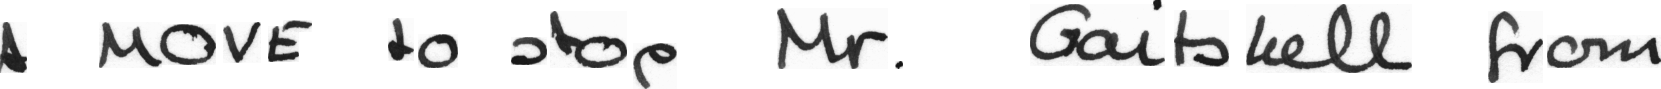

In [ ]:
line_image = Image.open(dataset[0][0])
line_image

In [ ]:
dataset[0][1]

'A MOVE to stop Mr. Gaitskell from'

In [ ]:
from keras.applications import Xception
from keras import layers
from keras.models import Model

def train_model(input_dim, output_dim, activation="leaky_relu", dropout=0.2):

  #loading pre-trained Xception model excluding the top dense layers
  base_model = Xception(weights='imagenet',include_top=False,input_shape=input_dim)

  #freeze the convolution layers of the Xception model
  for layer in base_model.layers:
    layer.trainable = False

  #using the output of the last convolution layer in Xception as input
  x1 = base_model.output

  #adding additional layers or residual blocks
  x1 = layers.Conv2D(32, (3,3), activation=activation, padding='same')(x1)
  x1 = layers.BatchNormalization()(x1)
  x1 = layers.Activation(activation)(x1)
  x1 = layers.MaxPooling2D((2,2))(x1)

  x1 = layers.Reshape((x1.shape[-3] * x1.shape[-2], x1.shape[-1]))(x1)

  blstm = layers.Bidirectional(layers.LSTM(256, return_sequences = True))(x1)
  blstm = layers.Dropout(dropout)(blstm)

  blstm = layers.Bidirectional(layers.LSTM(64, return_sequences = True))(blstm)
  blstm = layers.Dropout(dropout)(blstm)

  output = layers.Dense(output_dim+1, activation="softmax", name="output")(blstm)

  model = Model(inputs=base_model.input, outputs=output)
  return model



In [ ]:
from mltu.tensorflow.dataProvider import DataProvider
from mltu.preprocessors import ImageReader
from mltu.annotations.images import CVImage
from mltu.preprocessors import ImageReader
from mltu.transformers import ImageResizer, LabelIndexer, LabelPadding, ImageShowCV2
from mltu.augmentors import RandomBrightness, RandomRotate, RandomErodeDilate, RandomSharpen

In [ ]:
# Create a data provider for the dataset
data_provider = DataProvider(
    dataset=dataset,
    skip_validation=True,
    batch_size=configs.batch_size,
    data_preprocessors=[ImageReader(CVImage)],
    transformers=[
        ImageResizer(configs.width, configs.height, keep_aspect_ratio=True),
        LabelIndexer(configs.vocab),
        LabelPadding(max_word_length=configs.max_text_length, padding_value=len(configs.vocab)),
        ],
)


INFO:DataProvider:Skipping Dataset validation...


In [ ]:
# Split the dataset into training and validation sets
train_data_provider, val_data_provider = data_provider.split(split = 0.9)

In [ ]:
# Augment training data with random brightness, rotation and erode/dilate
train_data_provider.augmentors = [
    RandomBrightness(),
    RandomErodeDilate(),
    RandomSharpen(),
    ]

In [ ]:
#create model
model = train_model(
    output_dim = len(configs.vocab),
    input_dim = (configs.height, configs.width, 3),
)

83683744/83683744 [==============================] - 0s 0us/step


In [ ]:
from mltu.tensorflow.losses import CTCloss
from mltu.tensorflow.callbacks import Model2onnx, TrainLogger
from mltu.tensorflow.metrics import CERMetric, WERMetric

In [ ]:
model.compile(optimizer = 'adam', loss = CTCloss(), metrics = [CERMetric(vocabulary=configs.vocab),WERMetric(vocabulary=configs.vocab)], run_eagerly=False)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 96, 1408, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 47, 703, 32)          864       ['input_1[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 47, 703, 32)          128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 47, 703, 32)          0         ['block1_conv1_bn[0][0]'] 

In [ ]:
pip install tf2onnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.8/455.8 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 22.3 MB/s eta 0:00:00


In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from mltu.tensorflow.callbacks import Model2onnx, TrainLogger

In [ ]:
# Define callbacks
earlystopper = EarlyStopping(monitor="val_CER", patience=20, verbose=1, mode="min")
checkpoint = ModelCheckpoint(f"{configs.model_path}/model.h5", monitor="val_CER", verbose=1, save_best_only=True, mode="min")
trainLogger = TrainLogger(configs.model_path)
tb_callback = TensorBoard(f"{configs.model_path}/logs", update_freq=1)
reduceLROnPlat = ReduceLROnPlateau(monitor="val_CER", factor=0.9, min_delta=1e-10, patience=5, verbose=1, mode="auto")
model2onnx = Model2onnx(f"{configs.model_path}/model.h5")


In [ ]:
#training the model now
model.fit(
    train_data_provider,
    validation_data = val_data_provider,
    epochs = configs.train_epochs,
    callbacks = [earlystopper, checkpoint, trainLogger, reduceLROnPlat, tb_callback,model2onnx],
    workers = configs.train_workers
)